#Purpose
The purpose of this notebook is to validate whether it is possible to build a model for bitcoin price prediction that is at least mildly accurate.

We will begin assessing results with a Recurrent Neural Neutwork on a single dataset containing daily bitcoin prive movement from Jan 2012 - March 2018.

Further improvements might be made by including google search trend data
and perhaps even twitter (sentiment) analysis.

In [3]:
%%bash
kaggle datasets download -d mczielinski/bitcoin-historical-data -p .

bash: line 1: kaggle: command not found


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_seed = 7
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2018-03-27.csv")
%matplotlib inline

First model is based upon this notebook:  
https://www.kaggle.com/microtang/predicting-btc-price-using-rnn

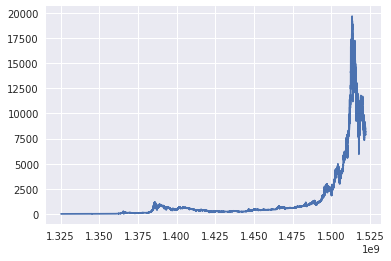

In [11]:
# Import the dataset and encode the date
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

#Visualize dataset
sns.set(style = "darkgrid")
plt.plot(df.loc[:, 'Timestamp'], df.loc[:, "Weighted_Price"])

In [85]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [86]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

/home/rick/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100


   5/2215 [..............................] - ETA: 3:30 - loss: 0.1091

 175/2215 [=>............................] - ETA: 6s - loss: 0.1133  

 340/2215 [===>..........................] - ETA: 3s - loss: 0.1001

 515/2215 [=====>........................] - ETA: 2s - loss: 0.0823

 695/2215 [========>.....................] - ETA: 1s - loss: 0.0672

 840/2215 [==========>...................] - ETA: 1s - loss: 0.0599

 975/2215 [============>.................] - ETA: 0s - loss: 0.0546

1110/2215 [==============>...............] - ETA: 0s - loss: 0.0525

1245/2215 [===============>..............] - ETA: 0s - loss: 0.0493

1375/2215 [=================>............] - ETA: 0s - loss: 0.0473

1525/2215 [===================>..........] - ETA: 0s - loss: 0.0445

1680/2215 [=====================>........] - ETA: 0s - loss: 0.0416

1840/2215 [=======================>......] - ETA: 0s - loss: 0.0391

2000/2215 [==========================>...] - ETA: 0s - loss: 0.0374

2160/2215 [============================>.] - ETA: 0s - loss: 0.0361

2215/2215 [==============================] - 1s 548us/step - loss: 0.0354


Epoch 2/100
   5/2215 [..............................] - ETA: 1s - loss: 0.0019

  90/2215 [>.............................] - ETA: 1s - loss: 0.0124

 210/2215 [=>............................] - ETA: 0s - loss: 0.0120

 350/2215 [===>..........................] - ETA: 0s - loss: 0.0136

 490/2215 [=====>........................] - ETA: 0s - loss: 0.0136

 640/2215 [=======>......................] - ETA: 0s - loss: 0.0145

 790/2215 [=========>....................] - ETA: 0s - loss: 0.0152

 945/2215 [===========>..................] - ETA: 0s - loss: 0.0146

1105/2215 [=============>................] - ETA: 0s - loss: 0.0135

1270/2215 [================>.............] - ETA: 0s - loss: 0.0149

1425/2215 [==================>...........] - ETA: 0s - loss: 0.0149

1585/2215 [====================>.........] - ETA: 0s - loss: 0.0148

1735/2215 [======================>.......] - ETA: 0s - loss: 0.0149

1905/2215 [========================>.....] - ETA: 0s - loss: 0.0156

2065/2215 [==========================>...] - ETA: 0s - loss: 0.0159

2215/2215 [==============================] - 1s 346us/step - loss: 0.0154


Epoch 3/100
   5/2215 [..............................] - ETA: 1s - loss: 0.0060

 130/2215 [>.............................] - ETA: 0s - loss: 0.0175

 240/2215 [==>...........................] - ETA: 0s - loss: 0.0195

 375/2215 [====>.........................] - ETA: 0s - loss: 0.0192

 525/2215 [======>.......................] - ETA: 0s - loss: 0.0169

 690/2215 [========>.....................] - ETA: 0s - loss: 0.0155

 860/2215 [==========>...................] - ETA: 0s - loss: 0.0146

1015/2215 [============>.................] - ETA: 0s - loss: 0.0142

1155/2215 [==============>...............] - ETA: 0s - loss: 0.0138

1300/2215 [================>.............] - ETA: 0s - loss: 0.0133

1455/2215 [==================>...........] - ETA: 0s - loss: 0.0139

1615/2215 [====================>.........] - ETA: 0s - loss: 0.0138

1775/2215 [=======================>......] - ETA: 0s - loss: 0.0143

1935/2215 [=========================>....] - ETA: 0s - loss: 0.0143

2080/2215 [===========================>..] - ETA: 0s - loss: 0.0143

2215/2215 [==============================] - 1s 342us/step - loss: 0.0139


Epoch 4/100
   5/2215 [..............................] - ETA: 0s - loss: 0.0105

 140/2215 [>.............................] - ETA: 0s - loss: 0.0183

 295/2215 [==>...........................] - ETA: 0s - loss: 0.0148

 450/2215 [=====>........................] - ETA: 0s - loss: 0.0136

 600/2215 [=======>......................] - ETA: 0s - loss: 0.0131

 735/2215 [========>.....................] - ETA: 0s - loss: 0.0138

 890/2215 [===========>..................] - ETA: 0s - loss: 0.0140

1035/2215 [=============>................] - ETA: 0s - loss: 0.0144

1190/2215 [===============>..............] - ETA: 0s - loss: 0.0131

1345/2215 [=================>............] - ETA: 0s - loss: 0.0127

1495/2215 [===================>..........] - ETA: 0s - loss: 0.0122

1650/2215 [=====================>........] - ETA: 0s - loss: 0.0128

1800/2215 [=======================>......] - ETA: 0s - loss: 0.0126

1960/2215 [=========================>....] - ETA: 0s - loss: 0.0118

2115/2215 [===========================>..] - ETA: 0s - loss: 0.0124

2215/2215 [==============================] - 1s 337us/step - loss: 0.0123


Epoch 5/100
   5/2215 [..............................] - ETA: 1s - loss: 0.0011

 140/2215 [>.............................] - ETA: 0s - loss: 0.0091

 285/2215 [==>...........................] - ETA: 0s - loss: 0.0060

 405/2215 [====>.........................] - ETA: 0s - loss: 0.0070

 520/2215 [======>.......................] - ETA: 0s - loss: 0.0092

 665/2215 [========>.....................] - ETA: 0s - loss: 0.0076

 800/2215 [=========>....................] - ETA: 0s - loss: 0.0084

 955/2215 [===========>..................] - ETA: 0s - loss: 0.0078

1105/2215 [=============>................] - ETA: 0s - loss: 0.0086

1260/2215 [================>.............] - ETA: 0s - loss: 0.0085

1410/2215 [==================>...........] - ETA: 0s - loss: 0.0089

1570/2215 [====================>.........] - ETA: 0s - loss: 0.0087

1720/2215 [======================>.......] - ETA: 0s - loss: 0.0089

1880/2215 [========================>.....] - ETA: 0s - loss: 0.0098

2035/2215 [==========================>...] - ETA: 0s - loss: 0.0100

2190/2215 [============================>.] - ETA: 0s - loss: 0.0103

2215/2215 [==============================] - 1s 350us/step - loss: 0.0105


Epoch 6/100
   5/2215 [..............................] - ETA: 0s - loss: 0.0044

 130/2215 [>.............................] - ETA: 0s - loss: 0.0069

 280/2215 [==>...........................] - ETA: 0s - loss: 0.0094

 425/2215 [====>.........................] - ETA: 0s - loss: 0.0083

 585/2215 [======>.......................] - ETA: 0s - loss: 0.0085

 730/2215 [========>.....................] - ETA: 0s - loss: 0.0102

 855/2215 [==========>...................] - ETA: 0s - loss: 0.0106

 985/2215 [============>.................] - ETA: 0s - loss: 0.0099

1130/2215 [==============>...............] - ETA: 0s - loss: 0.0090

1270/2215 [================>.............] - ETA: 0s - loss: 0.0086

1425/2215 [==================>...........] - ETA: 0s - loss: 0.0082

1585/2215 [====================>.........] - ETA: 0s - loss: 0.0085

1745/2215 [======================>.......] - ETA: 0s - loss: 0.0086

1905/2215 [========================>.....] - ETA: 0s - loss: 0.0083

2045/2215 [==========================>...] - ETA: 0s - loss: 0.0083

2180/2215 [============================>.] - ETA: 0s - loss: 0.0085

2215/2215 [==============================] - 1s 353us/step - loss: 0.0085


Epoch 7/100
   5/2215 [..............................] - ETA: 1s - loss: 6.1872e-04

 140/2215 [>.............................] - ETA: 0s - loss: 0.0053    

 275/2215 [==>...........................] - ETA: 0s - loss: 0.0045

 425/2215 [====>.........................] - ETA: 0s - loss: 0.0065

 560/2215 [======>.......................] - ETA: 0s - loss: 0.0068

 660/2215 [=======>......................] - ETA: 0s - loss: 0.0076

 785/2215 [=========>....................] - ETA: 0s - loss: 0.0080

 895/2215 [===========>..................] - ETA: 0s - loss: 0.0079

1030/2215 [============>.................] - ETA: 0s - loss: 0.0078

1165/2215 [==============>...............] - ETA: 0s - loss: 0.0075

1315/2215 [================>.............] - ETA: 0s - loss: 0.0075

1485/2215 [===================>..........] - ETA: 0s - loss: 0.0070

1650/2215 [=====================>........] - ETA: 0s - loss: 0.0068

1815/2215 [=======================>......] - ETA: 0s - loss: 0.0069

1985/2215 [=========================>....] - ETA: 0s - loss: 0.0070

2155/2215 [============================>.] - ETA: 0s - loss: 0.0066

2215/2215 [==============================] - 1s 354us/step - loss: 0.0065


Epoch 8/100
   5/2215 [..............................] - ETA: 1s - loss: 2.3400e-04

 155/2215 [=>............................] - ETA: 0s - loss: 0.0046    

 300/2215 [===>..........................] - ETA: 0s - loss: 0.0041

 455/2215 [=====>........................] - ETA: 0s - loss: 0.0036

 610/2215 [=======>......................] - ETA: 0s - loss: 0.0049

 765/2215 [=========>....................] - ETA: 0s - loss: 0.0054

 920/2215 [===========>..................] - ETA: 0s - loss: 0.0059

1055/2215 [=============>................] - ETA: 0s - loss: 0.0055

1210/2215 [===============>..............] - ETA: 0s - loss: 0.0053

1365/2215 [=================>............] - ETA: 0s - loss: 0.0052

1525/2215 [===================>..........] - ETA: 0s - loss: 0.0051

1685/2215 [=====================>........] - ETA: 0s - loss: 0.0053

1845/2215 [=======================>......] - ETA: 0s - loss: 0.0051

2000/2215 [==========================>...] - ETA: 0s - loss: 0.0048

2150/2215 [============================>.] - ETA: 0s - loss: 0.0046

2215/2215 [==============================] - 1s 331us/step - loss: 0.0045


Epoch 9/100
   5/2215 [..............................] - ETA: 0s - loss: 1.8624e-04

 135/2215 [>.............................] - ETA: 0s - loss: 0.0023    

 260/2215 [==>...........................] - ETA: 0s - loss: 0.0033

 410/2215 [====>.........................] - ETA: 0s - loss: 0.0027

 560/2215 [======>.......................] - ETA: 0s - loss: 0.0025

 720/2215 [========>.....................] - ETA: 0s - loss: 0.0028

 875/2215 [==========>...................] - ETA: 0s - loss: 0.0029

1040/2215 [=============>................] - ETA: 0s - loss: 0.0029

1190/2215 [===============>..............] - ETA: 0s - loss: 0.0030

1350/2215 [=================>............] - ETA: 0s - loss: 0.0032

1505/2215 [===================>..........] - ETA: 0s - loss: 0.0031

1660/2215 [=====================>........] - ETA: 0s - loss: 0.0030

1825/2215 [=======================>......] - ETA: 0s - loss: 0.0029

1980/2215 [=========================>....] - ETA: 0s - loss: 0.0029

2130/2215 [===========================>..] - ETA: 0s - loss: 0.0028

2215/2215 [==============================] - 1s 338us/step - loss: 0.0028


Epoch 10/100
   5/2215 [..............................] - ETA: 0s - loss: 2.8319e-04

 140/2215 [>.............................] - ETA: 0s - loss: 0.0032    

 300/2215 [===>..........................] - ETA: 0s - loss: 0.0027

 460/2215 [=====>........................] - ETA: 0s - loss: 0.0022

 595/2215 [=======>......................] - ETA: 0s - loss: 0.0021

 750/2215 [=========>....................] - ETA: 0s - loss: 0.0020

 900/2215 [===========>..................] - ETA: 0s - loss: 0.0019

1050/2215 [=============>................] - ETA: 0s - loss: 0.0019

1195/2215 [===============>..............] - ETA: 0s - loss: 0.0018

1355/2215 [=================>............] - ETA: 0s - loss: 0.0017

1515/2215 [===================>..........] - ETA: 0s - loss: 0.0017

1675/2215 [=====================>........] - ETA: 0s - loss: 0.0016

1830/2215 [=======================>......] - ETA: 0s - loss: 0.0016

1965/2215 [=========================>....] - ETA: 0s - loss: 0.0015

2115/2215 [===========================>..] - ETA: 0s - loss: 0.0015

2215/2215 [==============================] - 1s 339us/step - loss: 0.0015


Epoch 11/100
   5/2215 [..............................] - ETA: 0s - loss: 8.2813e-05

 120/2215 [>.............................] - ETA: 0s - loss: 0.0018    

 260/2215 [==>...........................] - ETA: 0s - loss: 0.0013

 390/2215 [====>.........................] - ETA: 0s - loss: 0.0012

 555/2215 [======>.......................] - ETA: 0s - loss: 9.6751e-04

 725/2215 [========>.....................] - ETA: 0s - loss: 8.5552e-04

 895/2215 [===========>..................] - ETA: 0s - loss: 8.2094e-04

1060/2215 [=============>................] - ETA: 0s - loss: 8.5625e-04

1220/2215 [===============>..............] - ETA: 0s - loss: 8.3714e-04

1375/2215 [=================>............] - ETA: 0s - loss: 7.6291e-04

1535/2215 [===================>..........] - ETA: 0s - loss: 7.4446e-04

1690/2215 [=====================>........] - ETA: 0s - loss: 7.3479e-04

1835/2215 [=======================>......] - ETA: 0s - loss: 7.3617e-04

2005/2215 [==========================>...] - ETA: 0s - loss: 7.0117e-04

2175/2215 [============================>.] - ETA: 0s - loss: 6.6171e-04

2215/2215 [==============================] - 1s 329us/step - loss: 6.5106e-04


Epoch 12/100
   5/2215 [..............................] - ETA: 1s - loss: 8.1752e-04

 160/2215 [=>............................] - ETA: 0s - loss: 1.4342e-04

 295/2215 [==>...........................] - ETA: 0s - loss: 1.1645e-04

 445/2215 [=====>........................] - ETA: 0s - loss: 1.2644e-04

 605/2215 [=======>......................] - ETA: 0s - loss: 1.9778e-04

 765/2215 [=========>....................] - ETA: 0s - loss: 2.8491e-04

 920/2215 [===========>..................] - ETA: 0s - loss: 3.2750e-04

1085/2215 [=============>................] - ETA: 0s - loss: 2.9711e-04

1240/2215 [===============>..............] - ETA: 0s - loss: 2.7735e-04

1400/2215 [=================>............] - ETA: 0s - loss: 2.8294e-04

1560/2215 [====================>.........] - ETA: 0s - loss: 2.8386e-04

1715/2215 [======================>.......] - ETA: 0s - loss: 2.8003e-04

1880/2215 [========================>.....] - ETA: 0s - loss: 2.8142e-04

2045/2215 [==========================>...] - ETA: 0s - loss: 2.6344e-04

2205/2215 [============================>.] - ETA: 0s - loss: 2.4888e-04

2215/2215 [==============================] - 1s 327us/step - loss: 2.4788e-04


Epoch 13/100
   5/2215 [..............................] - ETA: 0s - loss: 1.0963e-05

 150/2215 [=>............................] - ETA: 0s - loss: 1.9320e-04

 295/2215 [==>...........................] - ETA: 0s - loss: 1.7432e-04

 450/2215 [=====>........................] - ETA: 0s - loss: 1.5080e-04

 600/2215 [=======>......................] - ETA: 0s - loss: 1.5779e-04

 760/2215 [=========>....................] - ETA: 0s - loss: 1.3019e-04

 890/2215 [===========>..................] - ETA: 0s - loss: 1.1845e-04

1035/2215 [=============>................] - ETA: 0s - loss: 1.1381e-04

1180/2215 [==============>...............] - ETA: 0s - loss: 1.0676e-04

1330/2215 [=================>............] - ETA: 0s - loss: 9.8044e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 9.2717e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 1.1126e-04

1750/2215 [======================>.......] - ETA: 0s - loss: 1.1697e-04

1895/2215 [========================>.....] - ETA: 0s - loss: 1.1050e-04

2050/2215 [==========================>...] - ETA: 0s - loss: 1.1006e-04

2215/2215 [==============================] - 1s 344us/step - loss: 1.0358e-04


Epoch 14/100
   5/2215 [..............................] - ETA: 0s - loss: 3.4676e-06

 140/2215 [>.............................] - ETA: 0s - loss: 3.5822e-05

 305/2215 [===>..........................] - ETA: 0s - loss: 7.4060e-05

 460/2215 [=====>........................] - ETA: 0s - loss: 9.7722e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 9.2826e-05

 775/2215 [=========>....................] - ETA: 0s - loss: 7.8126e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 6.6616e-05

1090/2215 [=============>................] - ETA: 0s - loss: 7.6759e-05

1245/2215 [===============>..............] - ETA: 0s - loss: 8.0605e-05

1410/2215 [==================>...........] - ETA: 0s - loss: 7.5138e-05

1565/2215 [====================>.........] - ETA: 0s - loss: 6.9584e-05

1730/2215 [======================>.......] - ETA: 0s - loss: 7.5561e-05

1890/2215 [========================>.....] - ETA: 0s - loss: 7.0463e-05

2055/2215 [==========================>...] - ETA: 0s - loss: 7.0843e-05

2215/2215 [==============================] - 1s 323us/step - loss: 7.1508e-05


Epoch 15/100
   5/2215 [..............................] - ETA: 0s - loss: 3.3409e-05

 150/2215 [=>............................] - ETA: 0s - loss: 3.9429e-05

 305/2215 [===>..........................] - ETA: 0s - loss: 3.6739e-05

 465/2215 [=====>........................] - ETA: 0s - loss: 3.9073e-05

 605/2215 [=======>......................] - ETA: 0s - loss: 3.8077e-05

 765/2215 [=========>....................] - ETA: 0s - loss: 3.5531e-05

 925/2215 [===========>..................] - ETA: 0s - loss: 5.3018e-05

1080/2215 [=============>................] - ETA: 0s - loss: 4.6526e-05

1240/2215 [===============>..............] - ETA: 0s - loss: 4.5487e-05

1400/2215 [=================>............] - ETA: 0s - loss: 5.7008e-05

1555/2215 [====================>.........] - ETA: 0s - loss: 6.0897e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 5.9916e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 5.8380e-05

2015/2215 [==========================>...] - ETA: 0s - loss: 6.9258e-05

2160/2215 [============================>.] - ETA: 0s - loss: 6.5352e-05

2215/2215 [==============================] - 1s 331us/step - loss: 6.5071e-05


Epoch 16/100
   5/2215 [..............................] - ETA: 0s - loss: 8.6296e-06

 135/2215 [>.............................] - ETA: 0s - loss: 4.7467e-05

 285/2215 [==>...........................] - ETA: 0s - loss: 5.4597e-05

 445/2215 [=====>........................] - ETA: 0s - loss: 8.1257e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 7.1781e-05

 750/2215 [=========>....................] - ETA: 0s - loss: 6.4394e-05

 910/2215 [===========>..................] - ETA: 0s - loss: 6.1564e-05

1060/2215 [=============>................] - ETA: 0s - loss: 6.1061e-05

1220/2215 [===============>..............] - ETA: 0s - loss: 6.5734e-05

1380/2215 [=================>............] - ETA: 0s - loss: 7.3746e-05

1535/2215 [===================>..........] - ETA: 0s - loss: 7.1347e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 6.7379e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 6.3926e-05

2010/2215 [==========================>...] - ETA: 0s - loss: 6.2766e-05

2165/2215 [============================>.] - ETA: 0s - loss: 5.9493e-05

2215/2215 [==============================] - 1s 330us/step - loss: 6.5704e-05


Epoch 17/100
   5/2215 [..............................] - ETA: 0s - loss: 1.8504e-05

 140/2215 [>.............................] - ETA: 0s - loss: 1.7383e-05

 280/2215 [==>...........................] - ETA: 0s - loss: 7.5865e-05

 425/2215 [====>.........................] - ETA: 0s - loss: 1.0143e-04

 600/2215 [=======>......................] - ETA: 0s - loss: 8.5114e-05

 740/2215 [=========>....................] - ETA: 0s - loss: 1.0385e-04

 905/2215 [===========>..................] - ETA: 0s - loss: 9.4415e-05

1065/2215 [=============>................] - ETA: 0s - loss: 8.4863e-05

1220/2215 [===============>..............] - ETA: 0s - loss: 8.2917e-05

1385/2215 [=================>............] - ETA: 0s - loss: 8.0321e-05

1550/2215 [===================>..........] - ETA: 0s - loss: 7.5083e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 7.1562e-05

1865/2215 [========================>.....] - ETA: 0s - loss: 6.6084e-05

2030/2215 [==========================>...] - ETA: 0s - loss: 6.7624e-05

2175/2215 [============================>.] - ETA: 0s - loss: 6.8324e-05

2215/2215 [==============================] - 1s 329us/step - loss: 6.7232e-05


Epoch 18/100
   5/2215 [..............................] - ETA: 1s - loss: 1.2991e-05

  70/2215 [..............................] - ETA: 1s - loss: 2.2869e-05

 170/2215 [=>............................] - ETA: 1s - loss: 3.7199e-05

 285/2215 [==>...........................] - ETA: 1s - loss: 3.6986e-05

 425/2215 [====>.........................] - ETA: 0s - loss: 4.1104e-05

 580/2215 [======>.......................] - ETA: 0s - loss: 7.0784e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 8.3682e-05

 890/2215 [===========>..................] - ETA: 0s - loss: 7.4993e-05

1035/2215 [=============>................] - ETA: 0s - loss: 7.1162e-05

1190/2215 [===============>..............] - ETA: 0s - loss: 6.3273e-05

1320/2215 [================>.............] - ETA: 0s - loss: 5.8318e-05

1450/2215 [==================>...........] - ETA: 0s - loss: 5.8265e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 5.7877e-05

1685/2215 [=====================>........] - ETA: 0s - loss: 5.4545e-05

1790/2215 [=======================>......] - ETA: 0s - loss: 5.6508e-05

1900/2215 [========================>.....] - ETA: 0s - loss: 5.8146e-05

2050/2215 [==========================>...] - ETA: 0s - loss: 6.0327e-05

2205/2215 [============================>.] - ETA: 0s - loss: 5.9847e-05

2215/2215 [==============================] - 1s 395us/step - loss: 6.7774e-05


Epoch 19/100
   5/2215 [..............................] - ETA: 1s - loss: 7.8545e-05

 145/2215 [>.............................] - ETA: 0s - loss: 2.7711e-05

 265/2215 [==>...........................] - ETA: 0s - loss: 3.6538e-05

 380/2215 [====>.........................] - ETA: 0s - loss: 5.7176e-05

 505/2215 [=====>........................] - ETA: 0s - loss: 5.5765e-05

 655/2215 [=======>......................] - ETA: 0s - loss: 4.7905e-05

 805/2215 [=========>....................] - ETA: 0s - loss: 4.0482e-05

 955/2215 [===========>..................] - ETA: 0s - loss: 3.5239e-05

1090/2215 [=============>................] - ETA: 0s - loss: 5.1939e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 6.9049e-05

1360/2215 [=================>............] - ETA: 0s - loss: 6.6943e-05

1505/2215 [===================>..........] - ETA: 0s - loss: 6.7939e-05

1665/2215 [=====================>........] - ETA: 0s - loss: 7.1377e-05

1815/2215 [=======================>......] - ETA: 0s - loss: 7.2998e-05

1965/2215 [=========================>....] - ETA: 0s - loss: 7.0510e-05

2105/2215 [===========================>..] - ETA: 0s - loss: 6.9524e-05

2215/2215 [==============================] - 1s 362us/step - loss: 6.7781e-05


Epoch 20/100
   5/2215 [..............................] - ETA: 0s - loss: 1.5572e-06

 145/2215 [>.............................] - ETA: 0s - loss: 9.3572e-06

 285/2215 [==>...........................] - ETA: 0s - loss: 3.5145e-05

 395/2215 [====>.........................] - ETA: 0s - loss: 7.6110e-05

 505/2215 [=====>........................] - ETA: 0s - loss: 6.7134e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 6.0323e-05

 655/2215 [=======>......................] - ETA: 0s - loss: 5.5315e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 6.2416e-05

 795/2215 [=========>....................] - ETA: 0s - loss: 5.9308e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 5.4077e-05

 950/2215 [===========>..................] - ETA: 0s - loss: 5.1346e-05

1010/2215 [============>.................] - ETA: 0s - loss: 5.3120e-05

1065/2215 [=============>................] - ETA: 0s - loss: 5.1035e-05

1100/2215 [=============>................] - ETA: 0s - loss: 4.9794e-05

1140/2215 [==============>...............] - ETA: 0s - loss: 5.0329e-05

1195/2215 [===============>..............] - ETA: 0s - loss: 4.8922e-05

1285/2215 [================>.............] - ETA: 0s - loss: 4.8039e-05

1370/2215 [=================>............] - ETA: 0s - loss: 4.7995e-05

1440/2215 [==================>...........] - ETA: 0s - loss: 5.1607e-05

1505/2215 [===================>..........] - ETA: 0s - loss: 4.9718e-05

1565/2215 [====================>.........] - ETA: 0s - loss: 5.7110e-05

1650/2215 [=====================>........] - ETA: 0s - loss: 5.8564e-05

1725/2215 [======================>.......] - ETA: 0s - loss: 5.9549e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 5.7274e-05

1990/2215 [=========================>....] - ETA: 0s - loss: 5.4239e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 5.3043e-05

2215/2215 [==============================] - 1s 603us/step - loss: 6.7447e-05


Epoch 21/100
   5/2215 [..............................] - ETA: 0s - loss: 1.8653e-06

 135/2215 [>.............................] - ETA: 0s - loss: 8.3516e-05

 285/2215 [==>...........................] - ETA: 0s - loss: 5.5345e-05

 450/2215 [=====>........................] - ETA: 0s - loss: 4.3795e-05

 595/2215 [=======>......................] - ETA: 0s - loss: 4.8963e-05

 755/2215 [=========>....................] - ETA: 0s - loss: 4.5243e-05

 920/2215 [===========>..................] - ETA: 0s - loss: 3.8409e-05

1075/2215 [=============>................] - ETA: 0s - loss: 4.8317e-05

1225/2215 [===============>..............] - ETA: 0s - loss: 4.7562e-05

1385/2215 [=================>............] - ETA: 0s - loss: 6.9749e-05

1545/2215 [===================>..........] - ETA: 0s - loss: 7.0410e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 7.3512e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 6.9013e-05

2020/2215 [==========================>...] - ETA: 0s - loss: 6.7949e-05

2175/2215 [============================>.] - ETA: 0s - loss: 6.9964e-05

2215/2215 [==============================] - 1s 329us/step - loss: 6.9086e-05


Epoch 22/100
   5/2215 [..............................] - ETA: 0s - loss: 1.5035e-06

 145/2215 [>.............................] - ETA: 0s - loss: 6.1346e-05

 310/2215 [===>..........................] - ETA: 0s - loss: 9.7408e-05

 455/2215 [=====>........................] - ETA: 0s - loss: 1.2884e-04

 620/2215 [=======>......................] - ETA: 0s - loss: 1.1121e-04

 780/2215 [=========>....................] - ETA: 0s - loss: 9.0673e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 8.3849e-05

1100/2215 [=============>................] - ETA: 0s - loss: 7.9072e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 7.5053e-05

1395/2215 [=================>............] - ETA: 0s - loss: 7.0007e-05

1550/2215 [===================>..........] - ETA: 0s - loss: 6.3510e-05

1710/2215 [======================>.......] - ETA: 0s - loss: 5.9197e-05

1875/2215 [========================>.....] - ETA: 0s - loss: 6.0524e-05

2035/2215 [==========================>...] - ETA: 0s - loss: 6.8350e-05

2195/2215 [============================>.] - ETA: 0s - loss: 6.8065e-05

2215/2215 [==============================] - 1s 326us/step - loss: 6.7668e-05


Epoch 23/100
   5/2215 [..............................] - ETA: 0s - loss: 1.0223e-04

 145/2215 [>.............................] - ETA: 0s - loss: 7.7311e-05

 305/2215 [===>..........................] - ETA: 0s - loss: 8.1748e-05

 450/2215 [=====>........................] - ETA: 0s - loss: 7.7501e-05

 560/2215 [======>.......................] - ETA: 0s - loss: 9.9210e-05

 680/2215 [========>.....................] - ETA: 0s - loss: 8.5797e-05

 805/2215 [=========>....................] - ETA: 0s - loss: 9.2111e-05

 930/2215 [===========>..................] - ETA: 0s - loss: 9.4065e-05

1050/2215 [=============>................] - ETA: 0s - loss: 9.1935e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 9.9228e-05

1305/2215 [================>.............] - ETA: 0s - loss: 9.5152e-05

1430/2215 [==================>...........] - ETA: 0s - loss: 8.7753e-05

1555/2215 [====================>.........] - ETA: 0s - loss: 8.1893e-05

1675/2215 [=====================>........] - ETA: 0s - loss: 8.0575e-05

1825/2215 [=======================>......] - ETA: 0s - loss: 7.7024e-05

1980/2215 [=========================>....] - ETA: 0s - loss: 7.2504e-05

2135/2215 [===========================>..] - ETA: 0s - loss: 7.0399e-05

2215/2215 [==============================] - 1s 383us/step - loss: 6.9227e-05


Epoch 24/100
   5/2215 [..............................] - ETA: 0s - loss: 3.2387e-06

 155/2215 [=>............................] - ETA: 0s - loss: 4.8072e-05

 290/2215 [==>...........................] - ETA: 0s - loss: 2.9599e-05

 425/2215 [====>.........................] - ETA: 0s - loss: 3.7712e-05

 585/2215 [======>.......................] - ETA: 0s - loss: 3.1712e-05

 740/2215 [=========>....................] - ETA: 0s - loss: 2.8022e-05

 895/2215 [===========>..................] - ETA: 0s - loss: 2.9732e-05

1055/2215 [=============>................] - ETA: 0s - loss: 6.3076e-05

1215/2215 [===============>..............] - ETA: 0s - loss: 6.1521e-05

1365/2215 [=================>............] - ETA: 0s - loss: 6.2709e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 6.4958e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 6.3084e-05

1815/2215 [=======================>......] - ETA: 0s - loss: 6.0672e-05

1970/2215 [=========================>....] - ETA: 0s - loss: 6.6176e-05

2110/2215 [===========================>..] - ETA: 0s - loss: 6.9723e-05

2215/2215 [==============================] - 1s 336us/step - loss: 6.6982e-05


Epoch 25/100
   5/2215 [..............................] - ETA: 0s - loss: 2.0999e-05

 130/2215 [>.............................] - ETA: 0s - loss: 1.4173e-04

 275/2215 [==>...........................] - ETA: 0s - loss: 1.1759e-04

 425/2215 [====>.........................] - ETA: 0s - loss: 1.0226e-04

 580/2215 [======>.......................] - ETA: 0s - loss: 8.8273e-05

 745/2215 [=========>....................] - ETA: 0s - loss: 8.1061e-05

 890/2215 [===========>..................] - ETA: 0s - loss: 7.1495e-05

1010/2215 [============>.................] - ETA: 0s - loss: 7.4242e-05

1120/2215 [==============>...............] - ETA: 0s - loss: 7.5313e-05

1240/2215 [===============>..............] - ETA: 0s - loss: 7.1318e-05

1360/2215 [=================>............] - ETA: 0s - loss: 7.2947e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 6.9586e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 6.4571e-05

1750/2215 [======================>.......] - ETA: 0s - loss: 6.3380e-05

1875/2215 [========================>.....] - ETA: 0s - loss: 6.7751e-05

2005/2215 [==========================>...] - ETA: 0s - loss: 6.5988e-05

2140/2215 [===========================>..] - ETA: 0s - loss: 6.2799e-05

2215/2215 [==============================] - 1s 380us/step - loss: 6.3788e-05


Epoch 26/100
   5/2215 [..............................] - ETA: 0s - loss: 6.8606e-07

 110/2215 [>.............................] - ETA: 1s - loss: 1.4573e-05

 240/2215 [==>...........................] - ETA: 0s - loss: 4.3161e-05

 375/2215 [====>.........................] - ETA: 0s - loss: 5.3262e-05

 525/2215 [======>.......................] - ETA: 0s - loss: 6.1569e-05

 690/2215 [========>.....................] - ETA: 0s - loss: 6.0874e-05

 840/2215 [==========>...................] - ETA: 0s - loss: 7.4662e-05

 985/2215 [============>.................] - ETA: 0s - loss: 6.4571e-05

1135/2215 [==============>...............] - ETA: 0s - loss: 6.2807e-05

1285/2215 [================>.............] - ETA: 0s - loss: 7.4848e-05

1415/2215 [==================>...........] - ETA: 0s - loss: 7.3447e-05

1555/2215 [====================>.........] - ETA: 0s - loss: 7.1171e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 7.3007e-05

1805/2215 [=======================>......] - ETA: 0s - loss: 7.0986e-05

1935/2215 [=========================>....] - ETA: 0s - loss: 6.8320e-05

2045/2215 [==========================>...] - ETA: 0s - loss: 6.7296e-05

2165/2215 [============================>.] - ETA: 0s - loss: 7.0562e-05

2215/2215 [==============================] - 1s 378us/step - loss: 6.9128e-05


Epoch 27/100
   5/2215 [..............................] - ETA: 0s - loss: 9.2581e-06

  95/2215 [>.............................] - ETA: 1s - loss: 4.8580e-05

 220/2215 [=>............................] - ETA: 0s - loss: 3.9274e-05

 370/2215 [====>.........................] - ETA: 0s - loss: 2.9795e-05

 530/2215 [======>.......................] - ETA: 0s - loss: 4.3400e-05

 680/2215 [========>.....................] - ETA: 0s - loss: 4.1394e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 3.6895e-05

 975/2215 [============>.................] - ETA: 0s - loss: 3.9403e-05

1130/2215 [==============>...............] - ETA: 0s - loss: 4.8884e-05

1290/2215 [================>.............] - ETA: 0s - loss: 5.9554e-05

1450/2215 [==================>...........] - ETA: 0s - loss: 5.9861e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 5.6878e-05

1725/2215 [======================>.......] - ETA: 0s - loss: 5.9780e-05

1880/2215 [========================>.....] - ETA: 0s - loss: 6.3803e-05

2035/2215 [==========================>...] - ETA: 0s - loss: 6.3658e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.2171e-05

2215/2215 [==============================] - 1s 355us/step - loss: 6.7365e-05


Epoch 28/100
   5/2215 [..............................] - ETA: 1s - loss: 4.3192e-05

 130/2215 [>.............................] - ETA: 0s - loss: 2.0202e-05

 260/2215 [==>...........................] - ETA: 0s - loss: 6.9385e-05

 405/2215 [====>.........................] - ETA: 0s - loss: 5.2270e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 6.6757e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 5.4620e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 7.0888e-05

1020/2215 [============>.................] - ETA: 0s - loss: 8.0742e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 8.3324e-05

1320/2215 [================>.............] - ETA: 0s - loss: 7.8745e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 7.5990e-05

1640/2215 [=====================>........] - ETA: 0s - loss: 7.3543e-05

1765/2215 [======================>.......] - ETA: 0s - loss: 6.9385e-05

1915/2215 [========================>.....] - ETA: 0s - loss: 6.9874e-05

2075/2215 [===========================>..] - ETA: 0s - loss: 6.7694e-05

2215/2215 [==============================] - 1s 344us/step - loss: 6.9396e-05


Epoch 29/100
   5/2215 [..............................] - ETA: 0s - loss: 9.2482e-08

 150/2215 [=>............................] - ETA: 0s - loss: 6.0409e-05

 295/2215 [==>...........................] - ETA: 0s - loss: 1.3543e-04

 450/2215 [=====>........................] - ETA: 0s - loss: 1.2967e-04

 610/2215 [=======>......................] - ETA: 0s - loss: 1.0854e-04

 770/2215 [=========>....................] - ETA: 0s - loss: 8.9436e-05

 915/2215 [===========>..................] - ETA: 0s - loss: 7.9709e-05

1065/2215 [=============>................] - ETA: 0s - loss: 7.0825e-05

1170/2215 [==============>...............] - ETA: 0s - loss: 7.6042e-05

1315/2215 [================>.............] - ETA: 0s - loss: 8.3025e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 8.2783e-05

1610/2215 [====================>.........] - ETA: 0s - loss: 8.2159e-05

1765/2215 [======================>.......] - ETA: 0s - loss: 7.8889e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 7.4036e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 7.1104e-05

2215/2215 [==============================] - 1s 340us/step - loss: 6.9755e-05


Epoch 30/100
   5/2215 [..............................] - ETA: 0s - loss: 2.5586e-04

 115/2215 [>.............................] - ETA: 0s - loss: 7.1354e-05

 250/2215 [==>...........................] - ETA: 0s - loss: 7.0276e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 6.8241e-05

 580/2215 [======>.......................] - ETA: 0s - loss: 5.3631e-05

 760/2215 [=========>....................] - ETA: 0s - loss: 5.2301e-05

 915/2215 [===========>..................] - ETA: 0s - loss: 6.7358e-05

1085/2215 [=============>................] - ETA: 0s - loss: 6.4583e-05

1260/2215 [================>.............] - ETA: 0s - loss: 6.0309e-05

1400/2215 [=================>............] - ETA: 0s - loss: 5.8477e-05

1530/2215 [===================>..........] - ETA: 0s - loss: 5.5166e-05

1655/2215 [=====================>........] - ETA: 0s - loss: 5.8124e-05

1780/2215 [=======================>......] - ETA: 0s - loss: 5.5440e-05

1895/2215 [========================>.....] - ETA: 0s - loss: 5.4132e-05

2015/2215 [==========================>...] - ETA: 0s - loss: 5.2846e-05

2125/2215 [===========================>..] - ETA: 0s - loss: 5.3184e-05

2215/2215 [==============================] - 1s 364us/step - loss: 6.7126e-05


Epoch 31/100
   5/2215 [..............................] - ETA: 1s - loss: 1.4624e-04

 115/2215 [>.............................] - ETA: 0s - loss: 6.8858e-05

 240/2215 [==>...........................] - ETA: 0s - loss: 1.0784e-04

 365/2215 [===>..........................] - ETA: 0s - loss: 1.0841e-04

 485/2215 [=====>........................] - ETA: 0s - loss: 8.3010e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 6.9826e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 5.9935e-05

 845/2215 [==========>...................] - ETA: 0s - loss: 5.2846e-05

 960/2215 [============>.................] - ETA: 0s - loss: 5.4374e-05

1080/2215 [=============>................] - ETA: 0s - loss: 5.4600e-05

1225/2215 [===============>..............] - ETA: 0s - loss: 6.7390e-05

1385/2215 [=================>............] - ETA: 0s - loss: 6.1824e-05

1545/2215 [===================>..........] - ETA: 0s - loss: 6.0551e-05

1695/2215 [=====================>........] - ETA: 0s - loss: 5.8149e-05

1855/2215 [========================>.....] - ETA: 0s - loss: 5.8817e-05

2010/2215 [==========================>...] - ETA: 0s - loss: 6.6252e-05

2170/2215 [============================>.] - ETA: 0s - loss: 6.4680e-05

2215/2215 [==============================] - 1s 376us/step - loss: 6.8977e-05


Epoch 32/100
   5/2215 [..............................] - ETA: 0s - loss: 1.0476e-05

 150/2215 [=>............................] - ETA: 0s - loss: 7.3047e-05

 285/2215 [==>...........................] - ETA: 0s - loss: 6.4132e-05

 440/2215 [====>.........................] - ETA: 0s - loss: 8.2924e-05

 595/2215 [=======>......................] - ETA: 0s - loss: 6.6565e-05

 760/2215 [=========>....................] - ETA: 0s - loss: 7.1304e-05

 920/2215 [===========>..................] - ETA: 0s - loss: 6.1637e-05

1065/2215 [=============>................] - ETA: 0s - loss: 7.0915e-05

1220/2215 [===============>..............] - ETA: 0s - loss: 6.6581e-05

1375/2215 [=================>............] - ETA: 0s - loss: 7.0409e-05

1535/2215 [===================>..........] - ETA: 0s - loss: 6.8503e-05

1695/2215 [=====================>........] - ETA: 0s - loss: 6.3548e-05

1855/2215 [========================>.....] - ETA: 0s - loss: 6.0854e-05

2010/2215 [==========================>...] - ETA: 0s - loss: 6.8471e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 6.6430e-05

2215/2215 [==============================] - 1s 334us/step - loss: 6.7217e-05


Epoch 33/100
   5/2215 [..............................] - ETA: 1s - loss: 1.2815e-05

 140/2215 [>.............................] - ETA: 0s - loss: 2.8372e-05

 275/2215 [==>...........................] - ETA: 0s - loss: 2.6037e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 4.6272e-05

 565/2215 [======>.......................] - ETA: 0s - loss: 4.4820e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 3.7310e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 6.1474e-05

1040/2215 [=============>................] - ETA: 0s - loss: 7.4168e-05

1200/2215 [===============>..............] - ETA: 0s - loss: 7.1007e-05

1355/2215 [=================>............] - ETA: 0s - loss: 6.7747e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 7.0330e-05

1675/2215 [=====================>........] - ETA: 0s - loss: 7.8419e-05

1835/2215 [=======================>......] - ETA: 0s - loss: 7.2632e-05

1995/2215 [==========================>...] - ETA: 0s - loss: 6.9874e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.7139e-05

2215/2215 [==============================] - 1s 332us/step - loss: 6.7067e-05


Epoch 34/100
   5/2215 [..............................] - ETA: 0s - loss: 2.2485e-06

 135/2215 [>.............................] - ETA: 0s - loss: 1.1182e-05

 290/2215 [==>...........................] - ETA: 0s - loss: 7.1205e-05

 445/2215 [=====>........................] - ETA: 0s - loss: 5.6633e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 4.4812e-05

 750/2215 [=========>....................] - ETA: 0s - loss: 5.6179e-05

 910/2215 [===========>..................] - ETA: 0s - loss: 5.0489e-05

1050/2215 [=============>................] - ETA: 0s - loss: 4.7764e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 5.8828e-05

1350/2215 [=================>............] - ETA: 0s - loss: 5.7692e-05

1510/2215 [===================>..........] - ETA: 0s - loss: 5.5148e-05

1670/2215 [=====================>........] - ETA: 0s - loss: 6.9017e-05

1815/2215 [=======================>......] - ETA: 0s - loss: 6.7599e-05

1970/2215 [=========================>....] - ETA: 0s - loss: 6.7009e-05

2120/2215 [===========================>..] - ETA: 0s - loss: 6.3161e-05

2215/2215 [==============================] - 1s 337us/step - loss: 6.7312e-05


Epoch 35/100
   5/2215 [..............................] - ETA: 0s - loss: 9.1225e-06

 125/2215 [>.............................] - ETA: 0s - loss: 3.6802e-05

 275/2215 [==>...........................] - ETA: 0s - loss: 9.0564e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 8.1658e-05

 580/2215 [======>.......................] - ETA: 0s - loss: 1.0742e-04

 700/2215 [========>.....................] - ETA: 0s - loss: 9.4368e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 8.2267e-05

 950/2215 [===========>..................] - ETA: 0s - loss: 7.1727e-05

1095/2215 [=============>................] - ETA: 0s - loss: 7.0969e-05

1245/2215 [===============>..............] - ETA: 0s - loss: 7.6690e-05

1375/2215 [=================>............] - ETA: 0s - loss: 6.9997e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 6.8400e-05

1560/2215 [====================>.........] - ETA: 0s - loss: 7.5515e-05

1645/2215 [=====================>........] - ETA: 0s - loss: 7.2275e-05

1735/2215 [======================>.......] - ETA: 0s - loss: 7.3078e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 7.0230e-05

1910/2215 [========================>.....] - ETA: 0s - loss: 6.7831e-05

2000/2215 [==========================>...] - ETA: 0s - loss: 6.6733e-05

2105/2215 [===========================>..] - ETA: 0s - loss: 6.8367e-05

2215/2215 [==============================] - 1s 440us/step - loss: 6.8063e-05


Epoch 36/100
   5/2215 [..............................] - ETA: 1s - loss: 2.2887e-06

  90/2215 [>.............................] - ETA: 1s - loss: 6.0231e-05

 185/2215 [=>............................] - ETA: 1s - loss: 4.1952e-05

 290/2215 [==>...........................] - ETA: 1s - loss: 3.9592e-05

 365/2215 [===>..........................] - ETA: 1s - loss: 7.8479e-05

 475/2215 [=====>........................] - ETA: 0s - loss: 6.2838e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 5.3141e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 6.4458e-05

 850/2215 [==========>...................] - ETA: 0s - loss: 7.2302e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 6.9782e-05

1045/2215 [=============>................] - ETA: 0s - loss: 6.5164e-05

1155/2215 [==============>...............] - ETA: 0s - loss: 6.4680e-05

1245/2215 [===============>..............] - ETA: 0s - loss: 6.4342e-05

1350/2215 [=================>............] - ETA: 0s - loss: 7.3355e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 6.9311e-05

1580/2215 [====================>.........] - ETA: 0s - loss: 6.5527e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 6.9693e-05

1820/2215 [=======================>......] - ETA: 0s - loss: 7.4620e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 7.3104e-05

2060/2215 [==========================>...] - ETA: 0s - loss: 6.9318e-05

2170/2215 [============================>.] - ETA: 0s - loss: 6.6698e-05

2215/2215 [==============================] - 1s 471us/step - loss: 6.7812e-05


Epoch 37/100
   5/2215 [..............................] - ETA: 0s - loss: 3.5537e-07

 110/2215 [>.............................] - ETA: 1s - loss: 1.9054e-05

 205/2215 [=>............................] - ETA: 1s - loss: 1.1152e-05

 315/2215 [===>..........................] - ETA: 0s - loss: 2.1882e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 2.9888e-05

 545/2215 [======>.......................] - ETA: 0s - loss: 2.7890e-05

 660/2215 [=======>......................] - ETA: 0s - loss: 2.9005e-05

 770/2215 [=========>....................] - ETA: 0s - loss: 2.7419e-05

 885/2215 [==========>...................] - ETA: 0s - loss: 3.8929e-05

 995/2215 [============>.................] - ETA: 0s - loss: 5.1382e-05

1110/2215 [==============>...............] - ETA: 0s - loss: 6.9309e-05

1215/2215 [===============>..............] - ETA: 0s - loss: 6.7752e-05

1325/2215 [================>.............] - ETA: 0s - loss: 7.5430e-05

1440/2215 [==================>...........] - ETA: 0s - loss: 7.5385e-05

1540/2215 [===================>..........] - ETA: 0s - loss: 7.2531e-05

1655/2215 [=====================>........] - ETA: 0s - loss: 7.0160e-05

1775/2215 [=======================>......] - ETA: 0s - loss: 6.9433e-05

1885/2215 [========================>.....] - ETA: 0s - loss: 6.6432e-05

2015/2215 [==========================>...] - ETA: 0s - loss: 6.3469e-05

2140/2215 [===========================>..] - ETA: 0s - loss: 6.3655e-05

2215/2215 [==============================] - 1s 458us/step - loss: 6.7472e-05


Epoch 38/100
   5/2215 [..............................] - ETA: 1s - loss: 9.4450e-06

  85/2215 [>.............................] - ETA: 1s - loss: 3.9324e-05

 165/2215 [=>............................] - ETA: 1s - loss: 2.7348e-05

 250/2215 [==>...........................] - ETA: 1s - loss: 5.0290e-05

 345/2215 [===>..........................] - ETA: 1s - loss: 6.0591e-05

 405/2215 [====>.........................] - ETA: 1s - loss: 5.7680e-05

 500/2215 [=====>........................] - ETA: 1s - loss: 7.9941e-05

 605/2215 [=======>......................] - ETA: 0s - loss: 7.6476e-05

 705/2215 [========>.....................] - ETA: 0s - loss: 6.7514e-05

 800/2215 [=========>....................] - ETA: 0s - loss: 7.0516e-05

 905/2215 [===========>..................] - ETA: 0s - loss: 6.8686e-05

1000/2215 [============>.................] - ETA: 0s - loss: 7.4763e-05

1090/2215 [=============>................] - ETA: 0s - loss: 7.1903e-05

1190/2215 [===============>..............] - ETA: 0s - loss: 6.8824e-05

1310/2215 [================>.............] - ETA: 0s - loss: 6.9444e-05

1420/2215 [==================>...........] - ETA: 0s - loss: 6.5649e-05

1500/2215 [===================>..........] - ETA: 0s - loss: 6.2663e-05

1575/2215 [====================>.........] - ETA: 0s - loss: 6.0148e-05

1695/2215 [=====================>........] - ETA: 0s - loss: 5.6936e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 5.8295e-05

1900/2215 [========================>.....] - ETA: 0s - loss: 5.6443e-05

2050/2215 [==========================>...] - ETA: 0s - loss: 5.6430e-05

2205/2215 [============================>.] - ETA: 0s - loss: 6.7395e-05

2215/2215 [==============================] - 1s 513us/step - loss: 6.7159e-05


Epoch 39/100
   5/2215 [..............................] - ETA: 0s - loss: 3.6142e-06

 150/2215 [=>............................] - ETA: 0s - loss: 6.1374e-05

 265/2215 [==>...........................] - ETA: 0s - loss: 4.0126e-05

 420/2215 [====>.........................] - ETA: 0s - loss: 3.6831e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 6.7147e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 5.8871e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 6.1465e-05

1025/2215 [============>.................] - ETA: 0s - loss: 6.0558e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 5.5859e-05

1300/2215 [================>.............] - ETA: 0s - loss: 5.3341e-05

1400/2215 [=================>............] - ETA: 0s - loss: 6.5571e-05

1535/2215 [===================>..........] - ETA: 0s - loss: 6.3631e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 5.8708e-05

1810/2215 [=======================>......] - ETA: 0s - loss: 6.4017e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 7.2403e-05

2065/2215 [==========================>...] - ETA: 0s - loss: 7.3648e-05

2205/2215 [============================>.] - ETA: 0s - loss: 6.9829e-05

2215/2215 [==============================] - 1s 373us/step - loss: 6.9539e-05


Epoch 40/100
   5/2215 [..............................] - ETA: 1s - loss: 2.0400e-06

 130/2215 [>.............................] - ETA: 0s - loss: 5.1041e-05

 250/2215 [==>...........................] - ETA: 0s - loss: 4.4269e-05

 380/2215 [====>.........................] - ETA: 0s - loss: 5.0442e-05

 510/2215 [=====>........................] - ETA: 0s - loss: 1.0574e-04

 640/2215 [=======>......................] - ETA: 0s - loss: 1.0531e-04

 725/2215 [========>.....................] - ETA: 0s - loss: 9.4863e-05

 775/2215 [=========>....................] - ETA: 0s - loss: 9.0151e-05

 845/2215 [==========>...................] - ETA: 0s - loss: 9.1413e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 9.0086e-05

1030/2215 [============>.................] - ETA: 0s - loss: 8.3937e-05

1130/2215 [==============>...............] - ETA: 0s - loss: 7.8723e-05

1240/2215 [===============>..............] - ETA: 0s - loss: 7.3684e-05

1345/2215 [=================>............] - ETA: 0s - loss: 7.3256e-05

1455/2215 [==================>...........] - ETA: 0s - loss: 7.9355e-05

1590/2215 [====================>.........] - ETA: 0s - loss: 7.3630e-05

1690/2215 [=====================>........] - ETA: 0s - loss: 7.0059e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 6.6460e-05

1910/2215 [========================>.....] - ETA: 0s - loss: 6.9379e-05

1980/2215 [=========================>....] - ETA: 0s - loss: 6.9173e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 6.6686e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.6454e-05

2215/2215 [==============================] - 1s 503us/step - loss: 6.6937e-05


Epoch 41/100
   5/2215 [..............................] - ETA: 1s - loss: 5.7356e-06

 105/2215 [>.............................] - ETA: 1s - loss: 7.9347e-05

 135/2215 [>.............................] - ETA: 1s - loss: 6.2401e-05

 215/2215 [=>............................] - ETA: 1s - loss: 6.6553e-05

 325/2215 [===>..........................] - ETA: 1s - loss: 4.9762e-05

 440/2215 [====>.........................] - ETA: 1s - loss: 4.0286e-05

 550/2215 [======>.......................] - ETA: 0s - loss: 4.1321e-05

 635/2215 [=======>......................] - ETA: 0s - loss: 3.7591e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 5.7636e-05

 845/2215 [==========>...................] - ETA: 0s - loss: 5.8323e-05

 900/2215 [===========>..................] - ETA: 0s - loss: 6.9537e-05

 975/2215 [============>.................] - ETA: 0s - loss: 8.2419e-05

1050/2215 [=============>................] - ETA: 0s - loss: 7.9029e-05

1105/2215 [=============>................] - ETA: 0s - loss: 7.7908e-05

1145/2215 [==============>...............] - ETA: 0s - loss: 7.5712e-05

1200/2215 [===============>..............] - ETA: 0s - loss: 7.4226e-05

1260/2215 [================>.............] - ETA: 0s - loss: 7.4701e-05

1340/2215 [=================>............] - ETA: 0s - loss: 7.0737e-05

1415/2215 [==================>...........] - ETA: 0s - loss: 6.7225e-05

1500/2215 [===================>..........] - ETA: 0s - loss: 6.7089e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 6.4080e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 6.5784e-05

1750/2215 [======================>.......] - ETA: 0s - loss: 7.0722e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 6.9541e-05

1930/2215 [=========================>....] - ETA: 0s - loss: 6.7349e-05

2000/2215 [==========================>...] - ETA: 0s - loss: 6.6420e-05

2070/2215 [===========================>..] - ETA: 0s - loss: 6.5263e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.4737e-05

2215/2215 [==============================] - 1s 652us/step - loss: 6.7867e-05


Epoch 42/100
   5/2215 [..............................] - ETA: 2s - loss: 4.0675e-06

  80/2215 [>.............................] - ETA: 1s - loss: 2.5027e-05

 145/2215 [>.............................] - ETA: 1s - loss: 9.9674e-05

 240/2215 [==>...........................] - ETA: 1s - loss: 6.9553e-05

 285/2215 [==>...........................] - ETA: 1s - loss: 6.0656e-05

 340/2215 [===>..........................] - ETA: 1s - loss: 6.0542e-05

 410/2215 [====>.........................] - ETA: 1s - loss: 5.1735e-05

 465/2215 [=====>........................] - ETA: 1s - loss: 4.5892e-05

 540/2215 [======>.......................] - ETA: 1s - loss: 4.5946e-05

 605/2215 [=======>......................] - ETA: 1s - loss: 5.7074e-05

 675/2215 [========>.....................] - ETA: 1s - loss: 7.5516e-05

 745/2215 [=========>....................] - ETA: 1s - loss: 7.0216e-05

 815/2215 [==========>...................] - ETA: 1s - loss: 6.7737e-05

 900/2215 [===========>..................] - ETA: 1s - loss: 6.4488e-05

 975/2215 [============>.................] - ETA: 0s - loss: 6.2856e-05

1065/2215 [=============>................] - ETA: 0s - loss: 5.8766e-05

1105/2215 [=============>................] - ETA: 0s - loss: 5.6834e-05

1165/2215 [==============>...............] - ETA: 0s - loss: 5.5238e-05

1225/2215 [===============>..............] - ETA: 0s - loss: 5.3072e-05

1270/2215 [================>.............] - ETA: 0s - loss: 5.1602e-05

1330/2215 [=================>............] - ETA: 0s - loss: 5.0077e-05

1410/2215 [==================>...........] - ETA: 0s - loss: 5.9946e-05

1520/2215 [===================>..........] - ETA: 0s - loss: 6.0488e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 5.8582e-05

1695/2215 [=====================>........] - ETA: 0s - loss: 6.3046e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 6.0711e-05

1890/2215 [========================>.....] - ETA: 0s - loss: 6.3693e-05

1985/2215 [=========================>....] - ETA: 0s - loss: 6.8079e-05

2090/2215 [===========================>..] - ETA: 0s - loss: 6.5137e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.6021e-05

2215/2215 [==============================] - 2s 688us/step - loss: 6.5595e-05


Epoch 43/100
   5/2215 [..............................] - ETA: 1s - loss: 2.6917e-06

  85/2215 [>.............................] - ETA: 1s - loss: 6.9371e-05

 165/2215 [=>............................] - ETA: 1s - loss: 6.9195e-05

 260/2215 [==>...........................] - ETA: 1s - loss: 5.4424e-05

 345/2215 [===>..........................] - ETA: 1s - loss: 4.2443e-05

 450/2215 [=====>........................] - ETA: 1s - loss: 3.4269e-05

 555/2215 [======>.......................] - ETA: 0s - loss: 3.0113e-05

 670/2215 [========>.....................] - ETA: 0s - loss: 3.0662e-05

 780/2215 [=========>....................] - ETA: 0s - loss: 5.5973e-05

 900/2215 [===========>..................] - ETA: 0s - loss: 6.2625e-05

1015/2215 [============>.................] - ETA: 0s - loss: 7.9136e-05

1100/2215 [=============>................] - ETA: 0s - loss: 9.9367e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 9.8974e-05

1315/2215 [================>.............] - ETA: 0s - loss: 9.5158e-05

1425/2215 [==================>...........] - ETA: 0s - loss: 9.3042e-05

1510/2215 [===================>..........] - ETA: 0s - loss: 8.9053e-05

1600/2215 [====================>.........] - ETA: 0s - loss: 8.5083e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 8.2553e-05

1810/2215 [=======================>......] - ETA: 0s - loss: 7.8900e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 7.7147e-05

2035/2215 [==========================>...] - ETA: 0s - loss: 7.3852e-05

2155/2215 [============================>.] - ETA: 0s - loss: 7.0837e-05

2215/2215 [==============================] - 1s 500us/step - loss: 6.9555e-05


Epoch 44/100
   5/2215 [..............................] - ETA: 0s - loss: 6.2239e-06

 100/2215 [>.............................] - ETA: 1s - loss: 2.1459e-05

 205/2215 [=>............................] - ETA: 1s - loss: 2.6987e-05

 315/2215 [===>..........................] - ETA: 0s - loss: 5.9401e-05

 405/2215 [====>.........................] - ETA: 0s - loss: 5.9394e-05

 510/2215 [=====>........................] - ETA: 0s - loss: 6.5434e-05

 625/2215 [=======>......................] - ETA: 0s - loss: 5.8356e-05

 740/2215 [=========>....................] - ETA: 0s - loss: 5.5758e-05

 850/2215 [==========>...................] - ETA: 0s - loss: 8.8952e-05

 960/2215 [============>.................] - ETA: 0s - loss: 9.2157e-05

1060/2215 [=============>................] - ETA: 0s - loss: 8.8835e-05

1170/2215 [==============>...............] - ETA: 0s - loss: 8.1006e-05

1280/2215 [================>.............] - ETA: 0s - loss: 7.6306e-05

1370/2215 [=================>............] - ETA: 0s - loss: 7.1777e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 7.1359e-05

1590/2215 [====================>.........] - ETA: 0s - loss: 7.0609e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 6.8428e-05

1810/2215 [=======================>......] - ETA: 0s - loss: 6.7211e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 6.7543e-05

2045/2215 [==========================>...] - ETA: 0s - loss: 6.4312e-05

2150/2215 [============================>.] - ETA: 0s - loss: 6.8209e-05

2215/2215 [==============================] - 1s 483us/step - loss: 6.6296e-05


Epoch 45/100


   5/2215 [..............................] - ETA: 1s - loss: 1.6520e-06

 105/2215 [>.............................] - ETA: 1s - loss: 1.4215e-05

 190/2215 [=>............................] - ETA: 1s - loss: 1.0368e-05

 300/2215 [===>..........................] - ETA: 1s - loss: 2.4240e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 3.3316e-05

 490/2215 [=====>........................] - ETA: 0s - loss: 3.0725e-05

 565/2215 [======>.......................] - ETA: 0s - loss: 3.0148e-05

 675/2215 [========>.....................] - ETA: 0s - loss: 3.4588e-05

 775/2215 [=========>....................] - ETA: 0s - loss: 3.1613e-05

 890/2215 [===========>..................] - ETA: 0s - loss: 4.0145e-05

1005/2215 [============>.................] - ETA: 0s - loss: 3.7200e-05

1095/2215 [=============>................] - ETA: 0s - loss: 4.1902e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 4.3788e-05

1350/2215 [=================>............] - ETA: 0s - loss: 4.3943e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 4.4096e-05

1620/2215 [====================>.........] - ETA: 0s - loss: 4.3741e-05

1755/2215 [======================>.......] - ETA: 0s - loss: 5.0025e-05

1900/2215 [========================>.....] - ETA: 0s - loss: 5.8093e-05

2030/2215 [==========================>...] - ETA: 0s - loss: 6.6201e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.5462e-05

2215/2215 [==============================] - 1s 457us/step - loss: 6.7476e-05


Epoch 46/100
   5/2215 [..............................] - ETA: 1s - loss: 3.1863e-06

  75/2215 [>.............................] - ETA: 1s - loss: 7.2340e-05

 180/2215 [=>............................] - ETA: 1s - loss: 3.8985e-05

 295/2215 [==>...........................] - ETA: 1s - loss: 4.3925e-05

 405/2215 [====>.........................] - ETA: 0s - loss: 3.7192e-05

 525/2215 [======>.......................] - ETA: 0s - loss: 5.1375e-05

 630/2215 [=======>......................] - ETA: 0s - loss: 6.3435e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 5.4756e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 5.1180e-05

 950/2215 [===========>..................] - ETA: 0s - loss: 5.2446e-05

1075/2215 [=============>................] - ETA: 0s - loss: 6.2646e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 5.9508e-05

1285/2215 [================>.............] - ETA: 0s - loss: 5.8153e-05

1405/2215 [==================>...........] - ETA: 0s - loss: 5.4094e-05

1505/2215 [===================>..........] - ETA: 0s - loss: 5.5842e-05

1600/2215 [====================>.........] - ETA: 0s - loss: 5.8477e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 5.8652e-05

1835/2215 [=======================>......] - ETA: 0s - loss: 5.8488e-05

1935/2215 [=========================>....] - ETA: 0s - loss: 6.4756e-05

2025/2215 [==========================>...] - ETA: 0s - loss: 6.2733e-05

2145/2215 [============================>.] - ETA: 0s - loss: 6.3499e-05

2215/2215 [==============================] - 1s 482us/step - loss: 6.9079e-05


Epoch 47/100
   5/2215 [..............................] - ETA: 1s - loss: 1.2498e-06

  75/2215 [>.............................] - ETA: 1s - loss: 9.4204e-05

 155/2215 [=>............................] - ETA: 1s - loss: 5.5020e-05

 245/2215 [==>...........................] - ETA: 1s - loss: 7.5538e-05

 350/2215 [===>..........................] - ETA: 1s - loss: 5.5796e-05

 465/2215 [=====>........................] - ETA: 0s - loss: 5.4806e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 7.8744e-05

 695/2215 [========>.....................] - ETA: 0s - loss: 6.9145e-05

 775/2215 [=========>....................] - ETA: 0s - loss: 6.6998e-05

 820/2215 [==========>...................] - ETA: 0s - loss: 6.7416e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 6.4404e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 6.5458e-05

1025/2215 [============>.................] - ETA: 0s - loss: 6.0970e-05

1120/2215 [==============>...............] - ETA: 0s - loss: 5.6090e-05

1230/2215 [===============>..............] - ETA: 0s - loss: 5.2321e-05

1355/2215 [=================>............] - ETA: 0s - loss: 5.7532e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 5.9294e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 6.8383e-05

1670/2215 [=====================>........] - ETA: 0s - loss: 6.5298e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 6.3710e-05

1885/2215 [========================>.....] - ETA: 0s - loss: 6.6280e-05

1975/2215 [=========================>....] - ETA: 0s - loss: 6.8857e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 6.6633e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.5926e-05

2215/2215 [==============================] - 1s 536us/step - loss: 6.7276e-05


Epoch 48/100
   5/2215 [..............................] - ETA: 1s - loss: 3.4074e-06

 110/2215 [>.............................] - ETA: 1s - loss: 4.8279e-06

 215/2215 [=>............................] - ETA: 1s - loss: 6.6297e-06

 340/2215 [===>..........................] - ETA: 0s - loss: 7.0121e-05

 435/2215 [====>.........................] - ETA: 0s - loss: 8.2460e-05

 530/2215 [======>.......................] - ETA: 0s - loss: 7.2539e-05

 640/2215 [=======>......................] - ETA: 0s - loss: 6.2923e-05

 750/2215 [=========>....................] - ETA: 0s - loss: 7.0584e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 6.7457e-05

 980/2215 [============>.................] - ETA: 0s - loss: 6.2298e-05

1090/2215 [=============>................] - ETA: 0s - loss: 5.7753e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 7.2905e-05

1285/2215 [================>.............] - ETA: 0s - loss: 7.3101e-05

1395/2215 [=================>............] - ETA: 0s - loss: 7.6261e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 7.4454e-05

1565/2215 [====================>.........] - ETA: 0s - loss: 8.0804e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 7.9502e-05

1790/2215 [=======================>......] - ETA: 0s - loss: 7.6777e-05

1905/2215 [========================>.....] - ETA: 0s - loss: 7.2598e-05

2020/2215 [==========================>...] - ETA: 0s - loss: 6.8885e-05

2135/2215 [===========================>..] - ETA: 0s - loss: 6.6011e-05

2215/2215 [==============================] - 1s 486us/step - loss: 6.9835e-05


Epoch 49/100
   5/2215 [..............................] - ETA: 1s - loss: 3.0331e-06

 110/2215 [>.............................] - ETA: 1s - loss: 3.7930e-05

 200/2215 [=>............................] - ETA: 1s - loss: 7.1876e-05

 325/2215 [===>..........................] - ETA: 0s - loss: 6.1847e-05

 485/2215 [=====>........................] - ETA: 0s - loss: 7.8841e-05

 635/2215 [=======>......................] - ETA: 0s - loss: 6.9391e-05

 765/2215 [=========>....................] - ETA: 0s - loss: 7.1719e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 6.5371e-05

 970/2215 [============>.................] - ETA: 0s - loss: 6.0133e-05

1095/2215 [=============>................] - ETA: 0s - loss: 6.0476e-05

1225/2215 [===============>..............] - ETA: 0s - loss: 7.3101e-05

1375/2215 [=================>............] - ETA: 0s - loss: 6.6745e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 6.5335e-05

1665/2215 [=====================>........] - ETA: 0s - loss: 6.3083e-05

1815/2215 [=======================>......] - ETA: 0s - loss: 6.6813e-05

1975/2215 [=========================>....] - ETA: 0s - loss: 7.2292e-05

2120/2215 [===========================>..] - ETA: 0s - loss: 7.1212e-05

2215/2215 [==============================] - 1s 383us/step - loss: 6.8576e-05


Epoch 50/100
   5/2215 [..............................] - ETA: 0s - loss: 9.3864e-05

 140/2215 [>.............................] - ETA: 0s - loss: 6.1101e-05

 290/2215 [==>...........................] - ETA: 0s - loss: 5.1109e-05

 450/2215 [=====>........................] - ETA: 0s - loss: 4.4702e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 4.1940e-05

 765/2215 [=========>....................] - ETA: 0s - loss: 5.3107e-05

 910/2215 [===========>..................] - ETA: 0s - loss: 4.9412e-05

1055/2215 [=============>................] - ETA: 0s - loss: 5.3285e-05

1210/2215 [===============>..............] - ETA: 0s - loss: 4.8796e-05

1360/2215 [=================>............] - ETA: 0s - loss: 5.0683e-05

1510/2215 [===================>..........] - ETA: 0s - loss: 4.9312e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 5.4093e-05

1810/2215 [=======================>......] - ETA: 0s - loss: 5.7815e-05

1960/2215 [=========================>....] - ETA: 0s - loss: 6.0291e-05

2125/2215 [===========================>..] - ETA: 0s - loss: 6.1159e-05

2215/2215 [==============================] - 1s 342us/step - loss: 6.6332e-05


Epoch 51/100
   5/2215 [..............................] - ETA: 1s - loss: 5.1498e-04

  65/2215 [..............................] - ETA: 1s - loss: 5.2839e-05

 115/2215 [>.............................] - ETA: 2s - loss: 3.1340e-05

 185/2215 [=>............................] - ETA: 1s - loss: 2.9874e-05

 250/2215 [==>...........................] - ETA: 1s - loss: 4.8023e-05

 375/2215 [====>.........................] - ETA: 1s - loss: 5.8504e-05

 530/2215 [======>.......................] - ETA: 0s - loss: 6.2668e-05

 670/2215 [========>.....................] - ETA: 0s - loss: 6.1946e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 7.2845e-05

 970/2215 [============>.................] - ETA: 0s - loss: 8.0664e-05

1115/2215 [==============>...............] - ETA: 0s - loss: 8.4890e-05

1270/2215 [================>.............] - ETA: 0s - loss: 9.0371e-05

1395/2215 [=================>............] - ETA: 0s - loss: 8.3728e-05

1545/2215 [===================>..........] - ETA: 0s - loss: 8.0559e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 7.7529e-05

1845/2215 [=======================>......] - ETA: 0s - loss: 7.5390e-05

2000/2215 [==========================>...] - ETA: 0s - loss: 7.0396e-05

2155/2215 [============================>.] - ETA: 0s - loss: 6.8209e-05

2215/2215 [==============================] - 1s 402us/step - loss: 6.6785e-05


Epoch 52/100
   5/2215 [..............................] - ETA: 0s - loss: 3.8443e-06

 140/2215 [>.............................] - ETA: 0s - loss: 4.5205e-06

 280/2215 [==>...........................] - ETA: 0s - loss: 3.5618e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 6.5641e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 5.1993e-05

 725/2215 [========>.....................] - ETA: 0s - loss: 5.0563e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 4.9277e-05

1010/2215 [============>.................] - ETA: 0s - loss: 5.5399e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 6.4731e-05

1310/2215 [================>.............] - ETA: 0s - loss: 7.1618e-05

1460/2215 [==================>...........] - ETA: 0s - loss: 6.5971e-05

1615/2215 [====================>.........] - ETA: 0s - loss: 7.2487e-05

1765/2215 [======================>.......] - ETA: 0s - loss: 6.9033e-05

1905/2215 [========================>.....] - ETA: 0s - loss: 7.5137e-05

2060/2215 [==========================>...] - ETA: 0s - loss: 7.3661e-05

2215/2215 [==============================] - 1s 345us/step - loss: 6.9923e-05


Epoch 53/100
   5/2215 [..............................] - ETA: 1s - loss: 9.2049e-07

 140/2215 [>.............................] - ETA: 0s - loss: 7.7580e-05

 280/2215 [==>...........................] - ETA: 0s - loss: 6.5320e-05

 420/2215 [====>.........................] - ETA: 0s - loss: 5.4483e-05

 560/2215 [======>.......................] - ETA: 0s - loss: 5.5330e-05

 715/2215 [========>.....................] - ETA: 0s - loss: 7.5666e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 8.4753e-05

1020/2215 [============>.................] - ETA: 0s - loss: 7.4208e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 8.1889e-05

1325/2215 [================>.............] - ETA: 0s - loss: 7.5172e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 7.4887e-05

1625/2215 [=====================>........] - ETA: 0s - loss: 7.0204e-05

1765/2215 [======================>.......] - ETA: 0s - loss: 6.6517e-05

1920/2215 [=========================>....] - ETA: 0s - loss: 6.8721e-05

2075/2215 [===========================>..] - ETA: 0s - loss: 6.9781e-05

2215/2215 [==============================] - 1s 344us/step - loss: 6.7884e-05


Epoch 54/100
   5/2215 [..............................] - ETA: 0s - loss: 4.7864e-07

 140/2215 [>.............................] - ETA: 0s - loss: 1.9668e-04

 275/2215 [==>...........................] - ETA: 0s - loss: 1.2421e-04

 430/2215 [====>.........................] - ETA: 0s - loss: 9.9951e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 7.8020e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 7.3312e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 7.1502e-05

1035/2215 [=============>................] - ETA: 0s - loss: 6.3932e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 6.0805e-05

1325/2215 [================>.............] - ETA: 0s - loss: 6.2218e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 6.6824e-05

1630/2215 [=====================>........] - ETA: 0s - loss: 6.1684e-05

1705/2215 [======================>.......] - ETA: 0s - loss: 6.3429e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 6.3811e-05

1945/2215 [=========================>....] - ETA: 0s - loss: 6.7620e-05

2005/2215 [==========================>...] - ETA: 0s - loss: 6.7348e-05

2110/2215 [===========================>..] - ETA: 0s - loss: 6.4565e-05

2215/2215 [==============================] - 1s 386us/step - loss: 6.6856e-05


Epoch 55/100
   5/2215 [..............................] - ETA: 0s - loss: 3.5199e-05

 135/2215 [>.............................] - ETA: 0s - loss: 3.2405e-05

 265/2215 [==>...........................] - ETA: 0s - loss: 2.9478e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 5.0791e-05

 570/2215 [======>.......................] - ETA: 0s - loss: 4.2474e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 4.0498e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 3.9772e-05

1030/2215 [============>.................] - ETA: 0s - loss: 3.7325e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 5.0981e-05

1335/2215 [=================>............] - ETA: 0s - loss: 4.6029e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 5.3401e-05

1630/2215 [=====================>........] - ETA: 0s - loss: 5.4129e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 5.5029e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 5.9836e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 6.7297e-05

2215/2215 [==============================] - 1s 343us/step - loss: 6.6466e-05


Epoch 56/100
   5/2215 [..............................] - ETA: 0s - loss: 1.7183e-05

 150/2215 [=>............................] - ETA: 0s - loss: 3.7494e-05

 280/2215 [==>...........................] - ETA: 0s - loss: 3.8283e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 4.1890e-05

 585/2215 [======>.......................] - ETA: 0s - loss: 3.9561e-05

 740/2215 [=========>....................] - ETA: 0s - loss: 6.2286e-05

 895/2215 [===========>..................] - ETA: 0s - loss: 5.9006e-05

1045/2215 [=============>................] - ETA: 0s - loss: 8.2234e-05

1200/2215 [===============>..............] - ETA: 0s - loss: 7.2646e-05

1345/2215 [=================>............] - ETA: 0s - loss: 7.6583e-05

1495/2215 [===================>..........] - ETA: 0s - loss: 7.1651e-05

1650/2215 [=====================>........] - ETA: 0s - loss: 6.7144e-05

1805/2215 [=======================>......] - ETA: 0s - loss: 6.8137e-05

1960/2215 [=========================>....] - ETA: 0s - loss: 6.9918e-05

2115/2215 [===========================>..] - ETA: 0s - loss: 6.9670e-05

2215/2215 [==============================] - 1s 339us/step - loss: 6.8116e-05


Epoch 57/100
   5/2215 [..............................] - ETA: 0s - loss: 2.0153e-05

 135/2215 [>.............................] - ETA: 0s - loss: 1.0605e-04

 275/2215 [==>...........................] - ETA: 0s - loss: 1.1287e-04

 430/2215 [====>.........................] - ETA: 0s - loss: 1.1305e-04

 575/2215 [======>.......................] - ETA: 0s - loss: 8.6941e-05

 725/2215 [========>.....................] - ETA: 0s - loss: 7.6678e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 7.2174e-05

1035/2215 [=============>................] - ETA: 0s - loss: 7.6048e-05

1185/2215 [===============>..............] - ETA: 0s - loss: 8.8638e-05

1340/2215 [=================>............] - ETA: 0s - loss: 8.9278e-05

1480/2215 [===================>..........] - ETA: 0s - loss: 8.2502e-05

1630/2215 [=====================>........] - ETA: 0s - loss: 7.7912e-05

1780/2215 [=======================>......] - ETA: 0s - loss: 8.0603e-05

1935/2215 [=========================>....] - ETA: 0s - loss: 7.5052e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 7.2814e-05

2215/2215 [==============================] - 1s 343us/step - loss: 6.8982e-05


Epoch 58/100


   5/2215 [..............................] - ETA: 0s - loss: 1.0504e-07

 145/2215 [>.............................] - ETA: 0s - loss: 1.2050e-05

 275/2215 [==>...........................] - ETA: 0s - loss: 2.7586e-05

 425/2215 [====>.........................] - ETA: 0s - loss: 4.4138e-05

 580/2215 [======>.......................] - ETA: 0s - loss: 4.6040e-05

 725/2215 [========>.....................] - ETA: 0s - loss: 6.2206e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 5.9127e-05

1025/2215 [============>.................] - ETA: 0s - loss: 5.2425e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 5.1123e-05

1325/2215 [================>.............] - ETA: 0s - loss: 6.0125e-05

1475/2215 [==================>...........] - ETA: 0s - loss: 5.7055e-05

1630/2215 [=====================>........] - ETA: 0s - loss: 6.0199e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 5.9752e-05

1935/2215 [=========================>....] - ETA: 0s - loss: 7.0259e-05

2090/2215 [===========================>..] - ETA: 0s - loss: 7.0445e-05

2215/2215 [==============================] - 1s 340us/step - loss: 6.8005e-05


Epoch 59/100
   5/2215 [..............................] - ETA: 0s - loss: 1.0221e-07

 155/2215 [=>............................] - ETA: 0s - loss: 1.4718e-05

 275/2215 [==>...........................] - ETA: 0s - loss: 5.9924e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 6.8797e-05

 570/2215 [======>.......................] - ETA: 0s - loss: 8.4894e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 8.0687e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 7.1437e-05

1030/2215 [============>.................] - ETA: 0s - loss: 7.5935e-05

1185/2215 [===============>..............] - ETA: 0s - loss: 7.5139e-05

1340/2215 [=================>............] - ETA: 0s - loss: 6.7426e-05

1490/2215 [===================>..........] - ETA: 0s - loss: 7.3983e-05

1635/2215 [=====================>........] - ETA: 0s - loss: 7.4595e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 7.5337e-05

1935/2215 [=========================>....] - ETA: 0s - loss: 7.1779e-05

2090/2215 [===========================>..] - ETA: 0s - loss: 6.8730e-05

2215/2215 [==============================] - 1s 342us/step - loss: 6.8079e-05


Epoch 60/100
   5/2215 [..............................] - ETA: 0s - loss: 5.4261e-06

 150/2215 [=>............................] - ETA: 0s - loss: 3.8596e-05

 275/2215 [==>...........................] - ETA: 0s - loss: 2.8913e-05

 425/2215 [====>.........................] - ETA: 0s - loss: 2.3745e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 4.8686e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 5.1558e-05

 885/2215 [==========>...................] - ETA: 0s - loss: 5.3615e-05

1035/2215 [=============>................] - ETA: 0s - loss: 4.9806e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 6.5968e-05

1310/2215 [================>.............] - ETA: 0s - loss: 6.1466e-05

1450/2215 [==================>...........] - ETA: 0s - loss: 5.9330e-05

1575/2215 [====================>.........] - ETA: 0s - loss: 7.7891e-05

1730/2215 [======================>.......] - ETA: 0s - loss: 7.3851e-05

1895/2215 [========================>.....] - ETA: 0s - loss: 7.3546e-05

2060/2215 [==========================>...] - ETA: 0s - loss: 6.8714e-05

2215/2215 [==============================] - 1s 344us/step - loss: 6.7278e-05


Epoch 61/100
   5/2215 [..............................] - ETA: 1s - loss: 2.3557e-06

 155/2215 [=>............................] - ETA: 0s - loss: 7.0517e-05

 295/2215 [==>...........................] - ETA: 0s - loss: 6.2872e-05

 450/2215 [=====>........................] - ETA: 0s - loss: 5.6429e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 5.6168e-05

 765/2215 [=========>....................] - ETA: 0s - loss: 6.1777e-05

 925/2215 [===========>..................] - ETA: 0s - loss: 5.4684e-05

1075/2215 [=============>................] - ETA: 0s - loss: 5.4089e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 5.4538e-05

1390/2215 [=================>............] - ETA: 0s - loss: 6.3007e-05

1550/2215 [===================>..........] - ETA: 0s - loss: 6.3020e-05

1705/2215 [======================>.......] - ETA: 0s - loss: 7.3533e-05

1865/2215 [========================>.....] - ETA: 0s - loss: 7.1588e-05

2015/2215 [==========================>...] - ETA: 0s - loss: 7.0703e-05

2165/2215 [============================>.] - ETA: 0s - loss: 6.8888e-05

2215/2215 [==============================] - 1s 330us/step - loss: 6.7429e-05


Epoch 62/100
   5/2215 [..............................] - ETA: 1s - loss: 1.9799e-06

 150/2215 [=>............................] - ETA: 0s - loss: 3.2361e-05

 295/2215 [==>...........................] - ETA: 0s - loss: 6.7734e-05

 450/2215 [=====>........................] - ETA: 0s - loss: 8.2451e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 7.4581e-05

 755/2215 [=========>....................] - ETA: 0s - loss: 6.6598e-05

 905/2215 [===========>..................] - ETA: 0s - loss: 6.3173e-05

1065/2215 [=============>................] - ETA: 0s - loss: 7.0521e-05

1225/2215 [===============>..............] - ETA: 0s - loss: 6.2302e-05

1375/2215 [=================>............] - ETA: 0s - loss: 7.3463e-05

1520/2215 [===================>..........] - ETA: 0s - loss: 6.7001e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 6.9279e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 6.8051e-05

1985/2215 [=========================>....] - ETA: 0s - loss: 6.4024e-05

2150/2215 [============================>.] - ETA: 0s - loss: 6.2717e-05

2215/2215 [==============================] - 1s 335us/step - loss: 6.7694e-05


Epoch 63/100
   5/2215 [..............................] - ETA: 0s - loss: 1.6151e-05

 155/2215 [=>............................] - ETA: 0s - loss: 9.3253e-05

 300/2215 [===>..........................] - ETA: 0s - loss: 6.6363e-05

 445/2215 [=====>........................] - ETA: 0s - loss: 6.3521e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 5.5898e-05

 755/2215 [=========>....................] - ETA: 0s - loss: 4.7301e-05

 915/2215 [===========>..................] - ETA: 0s - loss: 4.6294e-05

1075/2215 [=============>................] - ETA: 0s - loss: 6.0013e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 5.4524e-05

1395/2215 [=================>............] - ETA: 0s - loss: 5.3535e-05

1540/2215 [===================>..........] - ETA: 0s - loss: 5.0732e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 5.1219e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 5.5492e-05

2025/2215 [==========================>...] - ETA: 0s - loss: 5.4378e-05

2180/2215 [============================>.] - ETA: 0s - loss: 6.7070e-05

2215/2215 [==============================] - 1s 328us/step - loss: 6.6584e-05


Epoch 64/100
   5/2215 [..............................] - ETA: 0s - loss: 1.4641e-06

 140/2215 [>.............................] - ETA: 0s - loss: 4.4167e-05

 280/2215 [==>...........................] - ETA: 0s - loss: 4.5871e-05

 440/2215 [====>.........................] - ETA: 0s - loss: 5.9109e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 5.1948e-05

 760/2215 [=========>....................] - ETA: 0s - loss: 5.8019e-05

 920/2215 [===========>..................] - ETA: 0s - loss: 6.9364e-05

1050/2215 [=============>................] - ETA: 0s - loss: 6.2244e-05

1210/2215 [===============>..............] - ETA: 0s - loss: 5.7485e-05

1365/2215 [=================>............] - ETA: 0s - loss: 5.3642e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 5.6041e-05

1675/2215 [=====================>........] - ETA: 0s - loss: 5.2605e-05

1835/2215 [=======================>......] - ETA: 0s - loss: 6.5718e-05

1995/2215 [==========================>...] - ETA: 0s - loss: 6.7059e-05

2150/2215 [============================>.] - ETA: 0s - loss: 6.2630e-05

2215/2215 [==============================] - 1s 332us/step - loss: 6.7394e-05


Epoch 65/100
   5/2215 [..............................] - ETA: 0s - loss: 1.5635e-06

 155/2215 [=>............................] - ETA: 0s - loss: 3.0032e-05

 300/2215 [===>..........................] - ETA: 0s - loss: 2.7865e-05

 455/2215 [=====>........................] - ETA: 0s - loss: 2.3435e-05

 615/2215 [=======>......................] - ETA: 0s - loss: 4.2096e-05

 760/2215 [=========>....................] - ETA: 0s - loss: 4.0802e-05

 920/2215 [===========>..................] - ETA: 0s - loss: 6.1593e-05

1075/2215 [=============>................] - ETA: 0s - loss: 6.4833e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 5.9606e-05

1390/2215 [=================>............] - ETA: 0s - loss: 7.0635e-05

1555/2215 [====================>.........] - ETA: 0s - loss: 7.3508e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 6.9388e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 7.2253e-05

2020/2215 [==========================>...] - ETA: 0s - loss: 7.0219e-05

2175/2215 [============================>.] - ETA: 0s - loss: 6.7912e-05

2215/2215 [==============================] - 1s 330us/step - loss: 6.8444e-05


Epoch 66/100
   5/2215 [..............................] - ETA: 0s - loss: 1.0830e-05

 135/2215 [>.............................] - ETA: 0s - loss: 1.3538e-04

 270/2215 [==>...........................] - ETA: 0s - loss: 1.4203e-04

 430/2215 [====>.........................] - ETA: 0s - loss: 1.0463e-04

 585/2215 [======>.......................] - ETA: 0s - loss: 1.0275e-04

 745/2215 [=========>....................] - ETA: 0s - loss: 1.0948e-04

 900/2215 [===========>..................] - ETA: 0s - loss: 9.3156e-05

1050/2215 [=============>................] - ETA: 0s - loss: 8.4727e-05

1195/2215 [===============>..............] - ETA: 0s - loss: 8.1603e-05

1360/2215 [=================>............] - ETA: 0s - loss: 7.9140e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 7.8820e-05

1545/2215 [===================>..........] - ETA: 0s - loss: 7.6292e-05

1655/2215 [=====================>........] - ETA: 0s - loss: 7.2618e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 6.9555e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 6.5057e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 6.1644e-05

2215/2215 [==============================] - 1s 364us/step - loss: 6.7625e-05


Epoch 67/100
   5/2215 [..............................] - ETA: 0s - loss: 2.2558e-05

 140/2215 [>.............................] - ETA: 0s - loss: 9.2373e-05

 250/2215 [==>...........................] - ETA: 0s - loss: 8.1275e-05

 340/2215 [===>..........................] - ETA: 0s - loss: 6.2311e-05

 420/2215 [====>.........................] - ETA: 0s - loss: 6.3497e-05

 500/2215 [=====>........................] - ETA: 0s - loss: 6.2800e-05

 585/2215 [======>.......................] - ETA: 0s - loss: 5.9277e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 5.6919e-05

 890/2215 [===========>..................] - ETA: 0s - loss: 4.9485e-05

1040/2215 [=============>................] - ETA: 0s - loss: 5.1718e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 5.2329e-05

1330/2215 [=================>............] - ETA: 0s - loss: 5.4165e-05

1485/2215 [===================>..........] - ETA: 0s - loss: 5.1012e-05

1630/2215 [=====================>........] - ETA: 0s - loss: 5.5077e-05

1775/2215 [=======================>......] - ETA: 0s - loss: 5.1121e-05

1930/2215 [=========================>....] - ETA: 0s - loss: 5.5304e-05

2080/2215 [===========================>..] - ETA: 0s - loss: 5.4255e-05

2215/2215 [==============================] - 1s 391us/step - loss: 6.8781e-05


Epoch 68/100
   5/2215 [..............................] - ETA: 0s - loss: 1.7459e-05

 135/2215 [>.............................] - ETA: 0s - loss: 5.4054e-05

 205/2215 [=>............................] - ETA: 1s - loss: 4.8586e-05

 290/2215 [==>...........................] - ETA: 1s - loss: 7.7916e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 7.3113e-05

 550/2215 [======>.......................] - ETA: 0s - loss: 6.9062e-05

 670/2215 [========>.....................] - ETA: 0s - loss: 6.9730e-05

 810/2215 [=========>....................] - ETA: 0s - loss: 7.0571e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 6.9678e-05

1050/2215 [=============>................] - ETA: 0s - loss: 6.2991e-05

1195/2215 [===============>..............] - ETA: 0s - loss: 6.1517e-05

1330/2215 [=================>............] - ETA: 0s - loss: 6.1836e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 5.8121e-05

1620/2215 [====================>.........] - ETA: 0s - loss: 5.6577e-05

1760/2215 [======================>.......] - ETA: 0s - loss: 6.5891e-05

1910/2215 [========================>.....] - ETA: 0s - loss: 6.9680e-05

2050/2215 [==========================>...] - ETA: 0s - loss: 6.8322e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.8914e-05

2215/2215 [==============================] - 1s 396us/step - loss: 6.8553e-05


Epoch 69/100
   5/2215 [..............................] - ETA: 0s - loss: 6.3079e-06

 150/2215 [=>............................] - ETA: 0s - loss: 6.0619e-05

 265/2215 [==>...........................] - ETA: 0s - loss: 5.3279e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 3.7899e-05

 565/2215 [======>.......................] - ETA: 0s - loss: 3.5118e-05

 700/2215 [========>.....................] - ETA: 0s - loss: 4.4273e-05

 845/2215 [==========>...................] - ETA: 0s - loss: 5.8215e-05

 965/2215 [============>.................] - ETA: 0s - loss: 5.6217e-05

1060/2215 [=============>................] - ETA: 0s - loss: 5.4656e-05

1145/2215 [==============>...............] - ETA: 0s - loss: 5.1102e-05

1240/2215 [===============>..............] - ETA: 0s - loss: 4.8432e-05

1330/2215 [=================>............] - ETA: 0s - loss: 4.5553e-05

1425/2215 [==================>...........] - ETA: 0s - loss: 4.5949e-05

1565/2215 [====================>.........] - ETA: 0s - loss: 4.5889e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 4.7721e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 4.8876e-05

1990/2215 [=========================>....] - ETA: 0s - loss: 5.6450e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 6.1889e-05

2215/2215 [==============================] - 1s 408us/step - loss: 6.7175e-05


Epoch 70/100
   5/2215 [..............................] - ETA: 1s - loss: 9.0827e-04

 125/2215 [>.............................] - ETA: 0s - loss: 1.0200e-04

 260/2215 [==>...........................] - ETA: 0s - loss: 5.3481e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 1.0306e-04

 560/2215 [======>.......................] - ETA: 0s - loss: 8.4891e-05

 705/2215 [========>.....................] - ETA: 0s - loss: 7.6954e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 7.0286e-05

1015/2215 [============>.................] - ETA: 0s - loss: 6.2351e-05

1165/2215 [==============>...............] - ETA: 0s - loss: 6.0806e-05

1310/2215 [================>.............] - ETA: 0s - loss: 5.5505e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 5.8951e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 7.2657e-05

1755/2215 [======================>.......] - ETA: 0s - loss: 6.8982e-05

1895/2215 [========================>.....] - ETA: 0s - loss: 7.0574e-05

2045/2215 [==========================>...] - ETA: 0s - loss: 6.6394e-05

2195/2215 [============================>.] - ETA: 0s - loss: 6.5064e-05

2215/2215 [==============================] - 1s 349us/step - loss: 6.7313e-05


Epoch 71/100
   5/2215 [..............................] - ETA: 0s - loss: 1.1378e-06

 155/2215 [=>............................] - ETA: 0s - loss: 1.0223e-04

 280/2215 [==>...........................] - ETA: 0s - loss: 7.1581e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 7.0570e-05

 585/2215 [======>.......................] - ETA: 0s - loss: 6.5018e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 6.0525e-05

 885/2215 [==========>...................] - ETA: 0s - loss: 6.1104e-05

1040/2215 [=============>................] - ETA: 0s - loss: 5.8748e-05

1185/2215 [===============>..............] - ETA: 0s - loss: 5.3105e-05

1340/2215 [=================>............] - ETA: 0s - loss: 7.0086e-05

1495/2215 [===================>..........] - ETA: 0s - loss: 6.5315e-05

1650/2215 [=====================>........] - ETA: 0s - loss: 7.1013e-05

1790/2215 [=======================>......] - ETA: 0s - loss: 6.6561e-05

1945/2215 [=========================>....] - ETA: 0s - loss: 6.5547e-05

2100/2215 [===========================>..] - ETA: 0s - loss: 6.5528e-05

2215/2215 [==============================] - 1s 341us/step - loss: 6.8810e-05


Epoch 72/100
   5/2215 [..............................] - ETA: 1s - loss: 5.6126e-06

 145/2215 [>.............................] - ETA: 0s - loss: 8.4982e-05

 265/2215 [==>...........................] - ETA: 0s - loss: 5.3631e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 5.2970e-05

 570/2215 [======>.......................] - ETA: 0s - loss: 5.1160e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 5.9779e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 5.2527e-05

 990/2215 [============>.................] - ETA: 0s - loss: 5.8137e-05

1135/2215 [==============>...............] - ETA: 0s - loss: 5.4603e-05

1290/2215 [================>.............] - ETA: 0s - loss: 6.7653e-05

1435/2215 [==================>...........] - ETA: 0s - loss: 6.7960e-05

1575/2215 [====================>.........] - ETA: 0s - loss: 6.3378e-05

1730/2215 [======================>.......] - ETA: 0s - loss: 6.2599e-05

1880/2215 [========================>.....] - ETA: 0s - loss: 6.3530e-05

2015/2215 [==========================>...] - ETA: 0s - loss: 6.3248e-05

2165/2215 [============================>.] - ETA: 0s - loss: 6.8282e-05

2215/2215 [==============================] - 1s 354us/step - loss: 6.8507e-05


Epoch 73/100
   5/2215 [..............................] - ETA: 0s - loss: 1.1541e-05

 150/2215 [=>............................] - ETA: 0s - loss: 4.4476e-05

 290/2215 [==>...........................] - ETA: 0s - loss: 2.8566e-05

 435/2215 [====>.........................] - ETA: 0s - loss: 7.0250e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 5.9976e-05

 725/2215 [========>.....................] - ETA: 0s - loss: 5.0973e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 4.3729e-05

1030/2215 [============>.................] - ETA: 0s - loss: 6.1115e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 5.7451e-05

1310/2215 [================>.............] - ETA: 0s - loss: 5.7530e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 6.2143e-05

1615/2215 [====================>.........] - ETA: 0s - loss: 6.0170e-05

1770/2215 [======================>.......] - ETA: 0s - loss: 5.6842e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 6.1866e-05

2075/2215 [===========================>..] - ETA: 0s - loss: 6.0136e-05

2215/2215 [==============================] - 1s 344us/step - loss: 6.7028e-05


Epoch 74/100
   5/2215 [..............................] - ETA: 0s - loss: 1.1545e-06

 145/2215 [>.............................] - ETA: 0s - loss: 7.4474e-05

 280/2215 [==>...........................] - ETA: 0s - loss: 6.0714e-05

 430/2215 [====>.........................] - ETA: 0s - loss: 4.4401e-05

 575/2215 [======>.......................] - ETA: 0s - loss: 4.8820e-05

 730/2215 [========>.....................] - ETA: 0s - loss: 4.5981e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 6.7173e-05

1035/2215 [=============>................] - ETA: 0s - loss: 6.6361e-05

1185/2215 [===============>..............] - ETA: 0s - loss: 6.3685e-05

1335/2215 [=================>............] - ETA: 0s - loss: 6.5366e-05

1405/2215 [==================>...........] - ETA: 0s - loss: 7.5515e-05

1525/2215 [===================>..........] - ETA: 0s - loss: 7.3017e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 7.9588e-05

1835/2215 [=======================>......] - ETA: 0s - loss: 7.6563e-05

1990/2215 [=========================>....] - ETA: 0s - loss: 7.1241e-05

2145/2215 [============================>.] - ETA: 0s - loss: 6.8705e-05

2215/2215 [==============================] - 1s 360us/step - loss: 6.8533e-05


Epoch 75/100
   5/2215 [..............................] - ETA: 0s - loss: 3.4898e-06

 130/2215 [>.............................] - ETA: 0s - loss: 4.6018e-05

 230/2215 [==>...........................] - ETA: 0s - loss: 6.7348e-05

 315/2215 [===>..........................] - ETA: 0s - loss: 4.9826e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 7.7578e-05

 505/2215 [=====>........................] - ETA: 0s - loss: 6.6540e-05

 605/2215 [=======>......................] - ETA: 0s - loss: 5.6634e-05

 715/2215 [========>.....................] - ETA: 0s - loss: 4.9462e-05

 815/2215 [==========>...................] - ETA: 0s - loss: 4.9623e-05

 960/2215 [============>.................] - ETA: 0s - loss: 6.0559e-05

1115/2215 [==============>...............] - ETA: 0s - loss: 5.5623e-05

1265/2215 [================>.............] - ETA: 0s - loss: 5.6701e-05

1420/2215 [==================>...........] - ETA: 0s - loss: 6.4600e-05

1575/2215 [====================>.........] - ETA: 0s - loss: 7.0345e-05

1730/2215 [======================>.......] - ETA: 0s - loss: 7.4990e-05

1890/2215 [========================>.....] - ETA: 0s - loss: 7.6926e-05

2040/2215 [==========================>...] - ETA: 0s - loss: 7.1879e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.7727e-05

2215/2215 [==============================] - 1s 398us/step - loss: 6.7651e-05


Epoch 76/100
   5/2215 [..............................] - ETA: 0s - loss: 1.4188e-07

 160/2215 [=>............................] - ETA: 0s - loss: 5.9849e-05

 290/2215 [==>...........................] - ETA: 0s - loss: 3.9398e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 4.4678e-05

 525/2215 [======>.......................] - ETA: 0s - loss: 4.6602e-05

 650/2215 [=======>......................] - ETA: 0s - loss: 7.0000e-05

 790/2215 [=========>....................] - ETA: 0s - loss: 8.1810e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 7.9702e-05

1080/2215 [=============>................] - ETA: 0s - loss: 7.3024e-05

1210/2215 [===============>..............] - ETA: 0s - loss: 7.0681e-05

1355/2215 [=================>............] - ETA: 0s - loss: 7.3699e-05

1505/2215 [===================>..........] - ETA: 0s - loss: 7.7709e-05

1650/2215 [=====================>........] - ETA: 0s - loss: 7.7188e-05

1805/2215 [=======================>......] - ETA: 0s - loss: 7.1561e-05

1945/2215 [=========================>....] - ETA: 0s - loss: 7.6904e-05

2075/2215 [===========================>..] - ETA: 0s - loss: 7.3171e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.9271e-05

2215/2215 [==============================] - 1s 370us/step - loss: 6.8806e-05


Epoch 77/100
   5/2215 [..............................] - ETA: 0s - loss: 1.4911e-05

 150/2215 [=>............................] - ETA: 0s - loss: 5.4928e-05

 260/2215 [==>...........................] - ETA: 0s - loss: 4.3415e-05

 405/2215 [====>.........................] - ETA: 0s - loss: 5.0850e-05

 535/2215 [======>.......................] - ETA: 0s - loss: 6.5745e-05

 655/2215 [=======>......................] - ETA: 0s - loss: 7.2962e-05

 770/2215 [=========>....................] - ETA: 0s - loss: 8.5482e-05

 890/2215 [===========>..................] - ETA: 0s - loss: 8.9732e-05

1005/2215 [============>.................] - ETA: 0s - loss: 8.1215e-05

1110/2215 [==============>...............] - ETA: 0s - loss: 7.4290e-05

1220/2215 [===============>..............] - ETA: 0s - loss: 7.2450e-05

1315/2215 [================>.............] - ETA: 0s - loss: 7.0120e-05

1425/2215 [==================>...........] - ETA: 0s - loss: 7.2091e-05

1525/2215 [===================>..........] - ETA: 0s - loss: 6.9516e-05

1625/2215 [=====================>........] - ETA: 0s - loss: 7.7897e-05

1695/2215 [=====================>........] - ETA: 0s - loss: 7.7215e-05

1780/2215 [=======================>......] - ETA: 0s - loss: 7.6629e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 7.5124e-05

1930/2215 [=========================>....] - ETA: 0s - loss: 7.2248e-05

2030/2215 [==========================>...] - ETA: 0s - loss: 7.0483e-05

2140/2215 [===========================>..] - ETA: 0s - loss: 7.0372e-05

2215/2215 [==============================] - 1s 483us/step - loss: 6.8737e-05


Epoch 78/100
   5/2215 [..............................] - ETA: 0s - loss: 1.3287e-06

  95/2215 [>.............................] - ETA: 1s - loss: 1.2208e-04

 205/2215 [=>............................] - ETA: 1s - loss: 6.9483e-05

 305/2215 [===>..........................] - ETA: 0s - loss: 5.3705e-05

 390/2215 [====>.........................] - ETA: 0s - loss: 6.9083e-05

 490/2215 [=====>........................] - ETA: 0s - loss: 7.5164e-05

 595/2215 [=======>......................] - ETA: 0s - loss: 8.0896e-05

 680/2215 [========>.....................] - ETA: 0s - loss: 7.5791e-05

 755/2215 [=========>....................] - ETA: 0s - loss: 6.8733e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 6.1925e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 5.8238e-05

 990/2215 [============>.................] - ETA: 0s - loss: 5.6103e-05

1055/2215 [=============>................] - ETA: 0s - loss: 7.1690e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 8.1056e-05

1285/2215 [================>.............] - ETA: 0s - loss: 7.4640e-05

1400/2215 [=================>............] - ETA: 0s - loss: 7.6376e-05

1510/2215 [===================>..........] - ETA: 0s - loss: 7.1588e-05

1615/2215 [====================>.........] - ETA: 0s - loss: 6.8943e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 7.0445e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 6.9375e-05

1865/2215 [========================>.....] - ETA: 0s - loss: 6.9157e-05

1960/2215 [=========================>....] - ETA: 0s - loss: 7.3207e-05

2020/2215 [==========================>...] - ETA: 0s - loss: 7.1390e-05

2080/2215 [===========================>..] - ETA: 0s - loss: 7.0924e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 6.9375e-05

2170/2215 [============================>.] - ETA: 0s - loss: 6.8121e-05

2215/2215 [==============================] - 1s 598us/step - loss: 6.6799e-05


Epoch 79/100
   5/2215 [..............................] - ETA: 1s - loss: 2.8979e-05

  75/2215 [>.............................] - ETA: 1s - loss: 6.5861e-06

 145/2215 [>.............................] - ETA: 1s - loss: 1.4251e-05

 190/2215 [=>............................] - ETA: 1s - loss: 3.1226e-05

 275/2215 [==>...........................] - ETA: 1s - loss: 6.2164e-05

 365/2215 [===>..........................] - ETA: 1s - loss: 4.8299e-05

 465/2215 [=====>........................] - ETA: 1s - loss: 4.4039e-05

 535/2215 [======>.......................] - ETA: 1s - loss: 5.0073e-05

 630/2215 [=======>......................] - ETA: 1s - loss: 4.3721e-05

 725/2215 [========>.....................] - ETA: 0s - loss: 4.0249e-05

 815/2215 [==========>...................] - ETA: 0s - loss: 3.6908e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 5.2535e-05

 970/2215 [============>.................] - ETA: 0s - loss: 5.5416e-05

1050/2215 [=============>................] - ETA: 0s - loss: 5.8448e-05

1135/2215 [==============>...............] - ETA: 0s - loss: 6.0103e-05

1215/2215 [===============>..............] - ETA: 0s - loss: 5.9815e-05

1270/2215 [================>.............] - ETA: 0s - loss: 5.7902e-05

1335/2215 [=================>............] - ETA: 0s - loss: 6.1570e-05

1400/2215 [=================>............] - ETA: 0s - loss: 6.8310e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 6.8175e-05

1540/2215 [===================>..........] - ETA: 0s - loss: 7.2949e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 7.0561e-05

1670/2215 [=====================>........] - ETA: 0s - loss: 7.0525e-05

1750/2215 [======================>.......] - ETA: 0s - loss: 6.8605e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 7.2188e-05

1915/2215 [========================>.....] - ETA: 0s - loss: 6.9647e-05

1980/2215 [=========================>....] - ETA: 0s - loss: 6.8035e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 7.1162e-05

2195/2215 [============================>.] - ETA: 0s - loss: 6.8356e-05

2215/2215 [==============================] - 1s 654us/step - loss: 6.7773e-05


Epoch 80/100
   5/2215 [..............................] - ETA: 1s - loss: 6.9105e-06

 120/2215 [>.............................] - ETA: 0s - loss: 2.3848e-05

 200/2215 [=>............................] - ETA: 1s - loss: 5.3326e-05

 305/2215 [===>..........................] - ETA: 1s - loss: 4.5476e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 5.7239e-05

 510/2215 [=====>........................] - ETA: 0s - loss: 8.7994e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 8.5191e-05

 715/2215 [========>.....................] - ETA: 0s - loss: 7.8725e-05

 830/2215 [==========>...................] - ETA: 0s - loss: 6.9069e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 1.0364e-04

1055/2215 [=============>................] - ETA: 0s - loss: 9.4449e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 9.0997e-05

1270/2215 [================>.............] - ETA: 0s - loss: 9.1841e-05

1390/2215 [=================>............] - ETA: 0s - loss: 8.5416e-05

1500/2215 [===================>..........] - ETA: 0s - loss: 8.0335e-05

1600/2215 [====================>.........] - ETA: 0s - loss: 7.9601e-05

1705/2215 [======================>.......] - ETA: 0s - loss: 8.0635e-05

1810/2215 [=======================>......] - ETA: 0s - loss: 7.7385e-05

1925/2215 [=========================>....] - ETA: 0s - loss: 7.4021e-05

2030/2215 [==========================>...] - ETA: 0s - loss: 7.2017e-05

2145/2215 [============================>.] - ETA: 0s - loss: 7.0025e-05

2215/2215 [==============================] - 1s 478us/step - loss: 6.8241e-05


Epoch 81/100
   5/2215 [..............................] - ETA: 1s - loss: 5.1296e-06

 105/2215 [>.............................] - ETA: 1s - loss: 7.6768e-05

 190/2215 [=>............................] - ETA: 1s - loss: 9.4009e-05

 295/2215 [==>...........................] - ETA: 1s - loss: 6.3404e-05

 400/2215 [====>.........................] - ETA: 0s - loss: 1.0309e-04

 510/2215 [=====>........................] - ETA: 0s - loss: 8.3512e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 7.3303e-05

 735/2215 [========>.....................] - ETA: 0s - loss: 6.8629e-05

 850/2215 [==========>...................] - ETA: 0s - loss: 6.5332e-05

 965/2215 [============>.................] - ETA: 0s - loss: 8.0574e-05

1075/2215 [=============>................] - ETA: 0s - loss: 7.3724e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 7.2214e-05

1285/2215 [================>.............] - ETA: 0s - loss: 6.7399e-05

1390/2215 [=================>............] - ETA: 0s - loss: 6.2702e-05

1495/2215 [===================>..........] - ETA: 0s - loss: 6.0207e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 5.6702e-05

1705/2215 [======================>.......] - ETA: 0s - loss: 5.8942e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 6.4060e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 6.6680e-05

2055/2215 [==========================>...] - ETA: 0s - loss: 6.6559e-05

2165/2215 [============================>.] - ETA: 0s - loss: 6.6234e-05

2215/2215 [==============================] - 1s 473us/step - loss: 6.6756e-05


Epoch 82/100
   5/2215 [..............................] - ETA: 1s - loss: 1.0223e-06

  95/2215 [>.............................] - ETA: 1s - loss: 7.4164e-06

 185/2215 [=>............................] - ETA: 1s - loss: 2.1552e-05

 295/2215 [==>...........................] - ETA: 1s - loss: 3.0666e-05

 405/2215 [====>.........................] - ETA: 0s - loss: 3.5979e-05

 505/2215 [=====>........................] - ETA: 0s - loss: 3.8911e-05

 625/2215 [=======>......................] - ETA: 0s - loss: 4.1024e-05

 740/2215 [=========>....................] - ETA: 0s - loss: 5.5769e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 5.6878e-05

 985/2215 [============>.................] - ETA: 0s - loss: 7.0865e-05

1095/2215 [=============>................] - ETA: 0s - loss: 7.2382e-05

1195/2215 [===============>..............] - ETA: 0s - loss: 6.7305e-05

1315/2215 [================>.............] - ETA: 0s - loss: 6.2112e-05

1430/2215 [==================>...........] - ETA: 0s - loss: 6.1401e-05

1535/2215 [===================>..........] - ETA: 0s - loss: 6.6460e-05

1655/2215 [=====================>........] - ETA: 0s - loss: 7.2123e-05

1755/2215 [======================>.......] - ETA: 0s - loss: 6.9170e-05

1865/2215 [========================>.....] - ETA: 0s - loss: 6.6297e-05

1980/2215 [=========================>....] - ETA: 0s - loss: 6.6920e-05

2090/2215 [===========================>..] - ETA: 0s - loss: 6.5555e-05

2195/2215 [============================>.] - ETA: 0s - loss: 6.8567e-05

2215/2215 [==============================] - 1s 468us/step - loss: 6.8145e-05


Epoch 83/100
   5/2215 [..............................] - ETA: 1s - loss: 1.6070e-05

 110/2215 [>.............................] - ETA: 1s - loss: 7.8968e-05

 190/2215 [=>............................] - ETA: 1s - loss: 5.7560e-05

 300/2215 [===>..........................] - ETA: 1s - loss: 5.8047e-05

 385/2215 [====>.........................] - ETA: 0s - loss: 4.6392e-05

 500/2215 [=====>........................] - ETA: 0s - loss: 4.6062e-05

 595/2215 [=======>......................] - ETA: 0s - loss: 6.9798e-05

 710/2215 [========>.....................] - ETA: 0s - loss: 8.0908e-05

 830/2215 [==========>...................] - ETA: 0s - loss: 8.4990e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 7.6529e-05

1040/2215 [=============>................] - ETA: 0s - loss: 6.9385e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 6.7409e-05

1270/2215 [================>.............] - ETA: 0s - loss: 6.9871e-05

1390/2215 [=================>............] - ETA: 0s - loss: 6.6339e-05

1490/2215 [===================>..........] - ETA: 0s - loss: 6.3534e-05

1600/2215 [====================>.........] - ETA: 0s - loss: 6.8017e-05

1710/2215 [======================>.......] - ETA: 0s - loss: 6.4790e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 6.4076e-05

1930/2215 [=========================>....] - ETA: 0s - loss: 6.5098e-05

2010/2215 [==========================>...] - ETA: 0s - loss: 6.2805e-05

2095/2215 [===========================>..] - ETA: 0s - loss: 6.2811e-05

2175/2215 [============================>.] - ETA: 0s - loss: 6.4290e-05

2215/2215 [==============================] - 1s 505us/step - loss: 6.7573e-05


Epoch 84/100
   5/2215 [..............................] - ETA: 1s - loss: 5.2884e-06

  90/2215 [>.............................] - ETA: 1s - loss: 1.6899e-04

 180/2215 [=>............................] - ETA: 1s - loss: 9.8990e-05

 290/2215 [==>...........................] - ETA: 1s - loss: 1.1563e-04

 405/2215 [====>.........................] - ETA: 0s - loss: 1.2661e-04

 520/2215 [======>.......................] - ETA: 0s - loss: 1.1349e-04

 640/2215 [=======>......................] - ETA: 0s - loss: 9.7619e-05

 750/2215 [=========>....................] - ETA: 0s - loss: 9.0614e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 8.5343e-05

 970/2215 [============>.................] - ETA: 0s - loss: 8.8400e-05

1075/2215 [=============>................] - ETA: 0s - loss: 9.1577e-05

1170/2215 [==============>...............] - ETA: 0s - loss: 9.5490e-05

1265/2215 [================>.............] - ETA: 0s - loss: 9.0483e-05

1380/2215 [=================>............] - ETA: 0s - loss: 8.4950e-05

1495/2215 [===================>..........] - ETA: 0s - loss: 8.0870e-05

1615/2215 [====================>.........] - ETA: 0s - loss: 8.4873e-05

1735/2215 [======================>.......] - ETA: 0s - loss: 7.9953e-05

1845/2215 [=======================>......] - ETA: 0s - loss: 7.5751e-05

1950/2215 [=========================>....] - ETA: 0s - loss: 7.6073e-05

2060/2215 [==========================>...] - ETA: 0s - loss: 7.2817e-05

2135/2215 [===========================>..] - ETA: 0s - loss: 7.0566e-05

2215/2215 [==============================] - 1s 488us/step - loss: 6.9244e-05


Epoch 85/100
   5/2215 [..............................] - ETA: 0s - loss: 1.7342e-05

  70/2215 [..............................] - ETA: 1s - loss: 5.2688e-06

 160/2215 [=>............................] - ETA: 1s - loss: 1.1960e-05

 265/2215 [==>...........................] - ETA: 1s - loss: 4.3061e-05

 370/2215 [====>.........................] - ETA: 1s - loss: 3.4935e-05

 470/2215 [=====>........................] - ETA: 0s - loss: 5.2962e-05

 560/2215 [======>.......................] - ETA: 0s - loss: 5.0706e-05

 615/2215 [=======>......................] - ETA: 0s - loss: 4.7152e-05

 700/2215 [========>.....................] - ETA: 0s - loss: 4.6689e-05

 770/2215 [=========>....................] - ETA: 0s - loss: 4.4379e-05

 865/2215 [==========>...................] - ETA: 0s - loss: 4.5525e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 4.8085e-05

1015/2215 [============>.................] - ETA: 0s - loss: 4.5755e-05

1115/2215 [==============>...............] - ETA: 0s - loss: 6.5869e-05

1210/2215 [===============>..............] - ETA: 0s - loss: 7.3602e-05

1315/2215 [================>.............] - ETA: 0s - loss: 7.3858e-05

1410/2215 [==================>...........] - ETA: 0s - loss: 6.9911e-05

1495/2215 [===================>..........] - ETA: 0s - loss: 6.7044e-05

1580/2215 [====================>.........] - ETA: 0s - loss: 7.1133e-05

1670/2215 [=====================>........] - ETA: 0s - loss: 7.5460e-05

1770/2215 [======================>.......] - ETA: 0s - loss: 7.2347e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 7.0091e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 6.7710e-05

2020/2215 [==========================>...] - ETA: 0s - loss: 6.6470e-05

2105/2215 [===========================>..] - ETA: 0s - loss: 6.5437e-05

2180/2215 [============================>.] - ETA: 0s - loss: 6.7112e-05

2215/2215 [==============================] - 1s 600us/step - loss: 6.9326e-05


Epoch 86/100
   5/2215 [..............................] - ETA: 3s - loss: 5.6625e-05

  50/2215 [..............................] - ETA: 2s - loss: 9.0696e-05

  95/2215 [>.............................] - ETA: 2s - loss: 8.5215e-05

 150/2215 [=>............................] - ETA: 2s - loss: 9.2732e-05

 210/2215 [=>............................] - ETA: 2s - loss: 6.7645e-05

 270/2215 [==>...........................] - ETA: 1s - loss: 6.3413e-05

 335/2215 [===>..........................] - ETA: 1s - loss: 5.2350e-05

 430/2215 [====>.........................] - ETA: 1s - loss: 4.4904e-05

 510/2215 [=====>........................] - ETA: 1s - loss: 4.5153e-05

 565/2215 [======>.......................] - ETA: 1s - loss: 4.1147e-05

 625/2215 [=======>......................] - ETA: 1s - loss: 4.3942e-05

 675/2215 [========>.....................] - ETA: 1s - loss: 6.1197e-05

 735/2215 [========>.....................] - ETA: 1s - loss: 6.2529e-05

 780/2215 [=========>....................] - ETA: 1s - loss: 6.2285e-05

 840/2215 [==========>...................] - ETA: 1s - loss: 6.1483e-05

 920/2215 [===========>..................] - ETA: 1s - loss: 5.9832e-05

 975/2215 [============>.................] - ETA: 1s - loss: 6.0827e-05

1050/2215 [=============>................] - ETA: 0s - loss: 5.7423e-05

1115/2215 [==============>...............] - ETA: 0s - loss: 5.6278e-05

1160/2215 [==============>...............] - ETA: 0s - loss: 5.5979e-05

1215/2215 [===============>..............] - ETA: 0s - loss: 6.7937e-05

1280/2215 [================>.............] - ETA: 0s - loss: 6.5774e-05

1350/2215 [=================>............] - ETA: 0s - loss: 6.3760e-05

1425/2215 [==================>...........] - ETA: 0s - loss: 6.3632e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 6.3184e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 6.6187e-05

1685/2215 [=====================>........] - ETA: 0s - loss: 7.5911e-05

1770/2215 [======================>.......] - ETA: 0s - loss: 7.3972e-05

1840/2215 [=======================>......] - ETA: 0s - loss: 7.1765e-05

1900/2215 [========================>.....] - ETA: 0s - loss: 7.0615e-05

1965/2215 [=========================>....] - ETA: 0s - loss: 6.9476e-05

2040/2215 [==========================>...] - ETA: 0s - loss: 6.7106e-05

2085/2215 [===========================>..] - ETA: 0s - loss: 6.5820e-05

2150/2215 [============================>.] - ETA: 0s - loss: 6.9798e-05

2200/2215 [============================>.] - ETA: 0s - loss: 6.8383e-05

2215/2215 [==============================] - 2s 810us/step - loss: 6.7928e-05


Epoch 87/100
   5/2215 [..............................] - ETA: 2s - loss: 5.0950e-06

 110/2215 [>.............................] - ETA: 1s - loss: 4.5843e-05

 210/2215 [=>............................] - ETA: 1s - loss: 5.3894e-05

 325/2215 [===>..........................] - ETA: 0s - loss: 8.2373e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 9.6670e-05

 525/2215 [======>.......................] - ETA: 0s - loss: 9.7985e-05

 600/2215 [=======>......................] - ETA: 0s - loss: 1.1527e-04

 665/2215 [========>.....................] - ETA: 0s - loss: 1.0763e-04

 780/2215 [=========>....................] - ETA: 0s - loss: 1.0552e-04

 880/2215 [==========>...................] - ETA: 0s - loss: 9.9576e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 9.6093e-05

1015/2215 [============>.................] - ETA: 0s - loss: 8.9294e-05

1065/2215 [=============>................] - ETA: 0s - loss: 8.5500e-05

1130/2215 [==============>...............] - ETA: 0s - loss: 8.0950e-05

1215/2215 [===============>..............] - ETA: 0s - loss: 7.5762e-05

1300/2215 [================>.............] - ETA: 0s - loss: 8.0397e-05

1400/2215 [=================>............] - ETA: 0s - loss: 7.4983e-05

1475/2215 [==================>...........] - ETA: 0s - loss: 7.3740e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 7.0724e-05

1640/2215 [=====================>........] - ETA: 0s - loss: 6.9728e-05

1725/2215 [======================>.......] - ETA: 0s - loss: 7.1920e-05

1800/2215 [=======================>......] - ETA: 0s - loss: 6.9951e-05

1885/2215 [========================>.....] - ETA: 0s - loss: 7.4254e-05

1970/2215 [=========================>....] - ETA: 0s - loss: 7.2726e-05

2050/2215 [==========================>...] - ETA: 0s - loss: 7.1252e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 7.0962e-05

2215/2215 [==============================] - 1s 597us/step - loss: 6.8723e-05


Epoch 88/100
   5/2215 [..............................] - ETA: 1s - loss: 1.5411e-05

  85/2215 [>.............................] - ETA: 1s - loss: 6.1008e-05

 155/2215 [=>............................] - ETA: 1s - loss: 4.7551e-05

 250/2215 [==>...........................] - ETA: 1s - loss: 6.6677e-05

 355/2215 [===>..........................] - ETA: 1s - loss: 8.9392e-05

 440/2215 [====>.........................] - ETA: 1s - loss: 1.1989e-04

 535/2215 [======>.......................] - ETA: 0s - loss: 1.0087e-04

 615/2215 [=======>......................] - ETA: 0s - loss: 9.0116e-05

 700/2215 [========>.....................] - ETA: 0s - loss: 8.3088e-05

 780/2215 [=========>....................] - ETA: 0s - loss: 7.5716e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 7.0242e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 7.1514e-05

 980/2215 [============>.................] - ETA: 0s - loss: 7.2374e-05

1025/2215 [============>.................] - ETA: 0s - loss: 6.9487e-05

1075/2215 [=============>................] - ETA: 0s - loss: 7.5684e-05

1115/2215 [==============>...............] - ETA: 0s - loss: 7.3408e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 6.9576e-05

1255/2215 [===============>..............] - ETA: 0s - loss: 6.7487e-05

1320/2215 [================>.............] - ETA: 0s - loss: 6.5084e-05

1390/2215 [=================>............] - ETA: 0s - loss: 6.2178e-05

1460/2215 [==================>...........] - ETA: 0s - loss: 5.9481e-05

1530/2215 [===================>..........] - ETA: 0s - loss: 5.7733e-05

1610/2215 [====================>.........] - ETA: 0s - loss: 5.5211e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 5.3603e-05

1730/2215 [======================>.......] - ETA: 0s - loss: 5.3554e-05

1795/2215 [=======================>......] - ETA: 0s - loss: 5.3021e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 5.1592e-05

1920/2215 [=========================>....] - ETA: 0s - loss: 5.9805e-05

1990/2215 [=========================>....] - ETA: 0s - loss: 5.8752e-05

2060/2215 [==========================>...] - ETA: 0s - loss: 6.5956e-05

2130/2215 [===========================>..] - ETA: 0s - loss: 6.6021e-05

2210/2215 [============================>.] - ETA: 0s - loss: 6.6565e-05

2215/2215 [==============================] - 2s 738us/step - loss: 6.6458e-05


Epoch 89/100
   5/2215 [..............................] - ETA: 3s - loss: 7.3918e-06

  45/2215 [..............................] - ETA: 3s - loss: 1.5051e-04

 100/2215 [>.............................] - ETA: 2s - loss: 8.1389e-05

 135/2215 [>.............................] - ETA: 2s - loss: 6.1404e-05

 210/2215 [=>............................] - ETA: 2s - loss: 6.7575e-05

 280/2215 [==>...........................] - ETA: 1s - loss: 1.0528e-04

 355/2215 [===>..........................] - ETA: 1s - loss: 1.0329e-04

 435/2215 [====>.........................] - ETA: 1s - loss: 8.5669e-05

 530/2215 [======>.......................] - ETA: 1s - loss: 7.2731e-05

 615/2215 [=======>......................] - ETA: 1s - loss: 6.5543e-05

 710/2215 [========>.....................] - ETA: 1s - loss: 6.0121e-05

 800/2215 [=========>....................] - ETA: 1s - loss: 5.4605e-05

 875/2215 [==========>...................] - ETA: 0s - loss: 5.1374e-05

 945/2215 [===========>..................] - ETA: 0s - loss: 5.2852e-05

 980/2215 [============>.................] - ETA: 0s - loss: 5.1338e-05

1045/2215 [=============>................] - ETA: 0s - loss: 5.1235e-05

1090/2215 [=============>................] - ETA: 0s - loss: 4.9390e-05

1130/2215 [==============>...............] - ETA: 0s - loss: 4.8080e-05

1180/2215 [==============>...............] - ETA: 0s - loss: 6.2038e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 6.5283e-05

1330/2215 [=================>............] - ETA: 0s - loss: 6.8380e-05

1420/2215 [==================>...........] - ETA: 0s - loss: 6.6727e-05

1515/2215 [===================>..........] - ETA: 0s - loss: 6.5583e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 6.5869e-05

1655/2215 [=====================>........] - ETA: 0s - loss: 6.3327e-05

1735/2215 [======================>.......] - ETA: 0s - loss: 6.3673e-05

1800/2215 [=======================>......] - ETA: 0s - loss: 6.1818e-05

1875/2215 [========================>.....] - ETA: 0s - loss: 6.1329e-05

1955/2215 [=========================>....] - ETA: 0s - loss: 6.2160e-05

2040/2215 [==========================>...] - ETA: 0s - loss: 6.2878e-05

2125/2215 [===========================>..] - ETA: 0s - loss: 6.2630e-05

2210/2215 [============================>.] - ETA: 0s - loss: 6.8107e-05

2215/2215 [==============================] - 2s 738us/step - loss: 6.8089e-05


Epoch 90/100
   5/2215 [..............................] - ETA: 1s - loss: 1.0094e-04

  60/2215 [..............................] - ETA: 1s - loss: 2.8133e-05

 125/2215 [>.............................] - ETA: 1s - loss: 2.1004e-05

 210/2215 [=>............................] - ETA: 1s - loss: 3.4125e-05

 290/2215 [==>...........................] - ETA: 1s - loss: 4.9114e-05

 390/2215 [====>.........................] - ETA: 1s - loss: 4.3213e-05

 505/2215 [=====>........................] - ETA: 1s - loss: 3.4603e-05

 590/2215 [======>.......................] - ETA: 1s - loss: 3.2481e-05

 685/2215 [========>.....................] - ETA: 0s - loss: 3.0821e-05

 775/2215 [=========>....................] - ETA: 0s - loss: 3.0730e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 2.8003e-05

 950/2215 [===========>..................] - ETA: 0s - loss: 3.3182e-05

 990/2215 [============>.................] - ETA: 0s - loss: 3.1949e-05

1040/2215 [=============>................] - ETA: 0s - loss: 3.0871e-05

1085/2215 [=============>................] - ETA: 0s - loss: 3.1643e-05

1150/2215 [==============>...............] - ETA: 0s - loss: 3.0326e-05

1235/2215 [===============>..............] - ETA: 0s - loss: 5.0651e-05

1310/2215 [================>.............] - ETA: 0s - loss: 5.9730e-05

1385/2215 [=================>............] - ETA: 0s - loss: 6.3085e-05

1450/2215 [==================>...........] - ETA: 0s - loss: 6.0778e-05

1520/2215 [===================>..........] - ETA: 0s - loss: 6.0383e-05

1580/2215 [====================>.........] - ETA: 0s - loss: 5.9712e-05

1640/2215 [=====================>........] - ETA: 0s - loss: 5.7787e-05

1720/2215 [======================>.......] - ETA: 0s - loss: 5.7542e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 6.3039e-05

1865/2215 [========================>.....] - ETA: 0s - loss: 6.3776e-05

1920/2215 [=========================>....] - ETA: 0s - loss: 6.4788e-05

1985/2215 [=========================>....] - ETA: 0s - loss: 7.3203e-05

2065/2215 [==========================>...] - ETA: 0s - loss: 7.2345e-05

2150/2215 [============================>.] - ETA: 0s - loss: 6.9939e-05

2215/2215 [==============================] - 2s 704us/step - loss: 6.8061e-05


Epoch 91/100
   5/2215 [..............................] - ETA: 2s - loss: 2.2947e-07

  65/2215 [..............................] - ETA: 1s - loss: 1.4462e-04

 125/2215 [>.............................] - ETA: 1s - loss: 9.8907e-05

 185/2215 [=>............................] - ETA: 1s - loss: 8.9873e-05

 250/2215 [==>...........................] - ETA: 1s - loss: 1.1055e-04

 320/2215 [===>..........................] - ETA: 1s - loss: 8.9894e-05

 390/2215 [====>.........................] - ETA: 1s - loss: 7.6087e-05

 455/2215 [=====>........................] - ETA: 1s - loss: 9.1597e-05

 520/2215 [======>.......................] - ETA: 1s - loss: 8.1141e-05

 585/2215 [======>.......................] - ETA: 1s - loss: 9.2056e-05

 655/2215 [=======>......................] - ETA: 1s - loss: 8.6218e-05

 705/2215 [========>.....................] - ETA: 1s - loss: 8.5619e-05

 760/2215 [=========>....................] - ETA: 1s - loss: 8.5928e-05

 850/2215 [==========>...................] - ETA: 1s - loss: 8.7517e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 8.0454e-05

1010/2215 [============>.................] - ETA: 0s - loss: 7.4799e-05

1095/2215 [=============>................] - ETA: 0s - loss: 7.2825e-05

1200/2215 [===============>..............] - ETA: 0s - loss: 6.9493e-05

1325/2215 [================>.............] - ETA: 0s - loss: 6.8096e-05

1440/2215 [==================>...........] - ETA: 0s - loss: 6.6533e-05

1555/2215 [====================>.........] - ETA: 0s - loss: 6.3774e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 6.3516e-05

1700/2215 [======================>.......] - ETA: 0s - loss: 6.4840e-05

1805/2215 [=======================>......] - ETA: 0s - loss: 6.2353e-05

1905/2215 [========================>.....] - ETA: 0s - loss: 6.0226e-05

2000/2215 [==========================>...] - ETA: 0s - loss: 6.1526e-05

2095/2215 [===========================>..] - ETA: 0s - loss: 6.8952e-05

2210/2215 [============================>.] - ETA: 0s - loss: 6.7139e-05

2215/2215 [==============================] - 1s 631us/step - loss: 6.6990e-05


Epoch 92/100
   5/2215 [..............................] - ETA: 1s - loss: 2.7100e-07

 120/2215 [>.............................] - ETA: 0s - loss: 4.4334e-05

 200/2215 [=>............................] - ETA: 1s - loss: 3.3839e-05

 300/2215 [===>..........................] - ETA: 0s - loss: 4.1140e-05

 415/2215 [====>.........................] - ETA: 0s - loss: 3.1031e-05

 520/2215 [======>.......................] - ETA: 0s - loss: 3.5057e-05

 630/2215 [=======>......................] - ETA: 0s - loss: 6.7855e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 6.1647e-05

 830/2215 [==========>...................] - ETA: 0s - loss: 5.5899e-05

 945/2215 [===========>..................] - ETA: 0s - loss: 5.2312e-05

1055/2215 [=============>................] - ETA: 0s - loss: 4.9931e-05

1170/2215 [==============>...............] - ETA: 0s - loss: 7.0109e-05

1275/2215 [================>.............] - ETA: 0s - loss: 7.0340e-05

1385/2215 [=================>............] - ETA: 0s - loss: 7.2048e-05

1490/2215 [===================>..........] - ETA: 0s - loss: 7.0243e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 6.8328e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 6.5907e-05

1830/2215 [=======================>......] - ETA: 0s - loss: 6.3854e-05

1950/2215 [=========================>....] - ETA: 0s - loss: 6.3449e-05

2065/2215 [==========================>...] - ETA: 0s - loss: 6.5293e-05

2185/2215 [============================>.] - ETA: 0s - loss: 6.8257e-05

2215/2215 [==============================] - 1s 468us/step - loss: 6.7560e-05


Epoch 93/100
   5/2215 [..............................] - ETA: 2s - loss: 2.7985e-05

 110/2215 [>.............................] - ETA: 1s - loss: 2.3814e-05

 195/2215 [=>............................] - ETA: 1s - loss: 1.9350e-05

 305/2215 [===>..........................] - ETA: 0s - loss: 7.2113e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 6.8238e-05

 520/2215 [======>.......................] - ETA: 0s - loss: 6.2508e-05

 630/2215 [=======>......................] - ETA: 0s - loss: 5.3418e-05

 745/2215 [=========>....................] - ETA: 0s - loss: 5.2299e-05

 860/2215 [==========>...................] - ETA: 0s - loss: 5.1719e-05

 970/2215 [============>.................] - ETA: 0s - loss: 6.1591e-05

1085/2215 [=============>................] - ETA: 0s - loss: 6.0976e-05

1190/2215 [===============>..............] - ETA: 0s - loss: 7.2888e-05

1295/2215 [================>.............] - ETA: 0s - loss: 7.6260e-05

1395/2215 [=================>............] - ETA: 0s - loss: 7.3936e-05

1500/2215 [===================>..........] - ETA: 0s - loss: 7.0247e-05

1605/2215 [====================>.........] - ETA: 0s - loss: 6.9358e-05

1715/2215 [======================>.......] - ETA: 0s - loss: 6.6204e-05

1835/2215 [=======================>......] - ETA: 0s - loss: 6.2090e-05

1940/2215 [=========================>....] - ETA: 0s - loss: 5.9634e-05

2050/2215 [==========================>...] - ETA: 0s - loss: 6.0921e-05

2165/2215 [============================>.] - ETA: 0s - loss: 6.5151e-05

2215/2215 [==============================] - 1s 476us/step - loss: 6.7239e-05


Epoch 94/100
   5/2215 [..............................] - ETA: 1s - loss: 4.4632e-06

  95/2215 [>.............................] - ETA: 1s - loss: 1.1498e-04

 175/2215 [=>............................] - ETA: 1s - loss: 1.5073e-04

 280/2215 [==>...........................] - ETA: 1s - loss: 1.0539e-04

 385/2215 [====>.........................] - ETA: 0s - loss: 8.3542e-05

 495/2215 [=====>........................] - ETA: 0s - loss: 9.0505e-05

 605/2215 [=======>......................] - ETA: 0s - loss: 1.0295e-04

 715/2215 [========>.....................] - ETA: 0s - loss: 9.7799e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 9.0645e-05

 940/2215 [===========>..................] - ETA: 0s - loss: 8.1518e-05

1045/2215 [=============>................] - ETA: 0s - loss: 7.4328e-05

1155/2215 [==============>...............] - ETA: 0s - loss: 6.9263e-05

1265/2215 [================>.............] - ETA: 0s - loss: 7.0990e-05

1375/2215 [=================>............] - ETA: 0s - loss: 7.5074e-05

1475/2215 [==================>...........] - ETA: 0s - loss: 7.7091e-05

1560/2215 [====================>.........] - ETA: 0s - loss: 7.8020e-05

1665/2215 [=====================>........] - ETA: 0s - loss: 7.8136e-05

1780/2215 [=======================>......] - ETA: 0s - loss: 7.8468e-05

1890/2215 [========================>.....] - ETA: 0s - loss: 7.6462e-05

2005/2215 [==========================>...] - ETA: 0s - loss: 7.2679e-05

2115/2215 [===========================>..] - ETA: 0s - loss: 7.0400e-05

2215/2215 [==============================] - 1s 485us/step - loss: 6.7965e-05


Epoch 95/100
   5/2215 [..............................] - ETA: 1s - loss: 2.2672e-06

 105/2215 [>.............................] - ETA: 1s - loss: 6.3212e-05

 185/2215 [=>............................] - ETA: 1s - loss: 1.3856e-04

 280/2215 [==>...........................] - ETA: 1s - loss: 1.0014e-04

 395/2215 [====>.........................] - ETA: 0s - loss: 7.3043e-05

 505/2215 [=====>........................] - ETA: 0s - loss: 8.5817e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 8.6487e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 8.4084e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 7.7754e-05

 935/2215 [===========>..................] - ETA: 0s - loss: 7.0173e-05

1040/2215 [=============>................] - ETA: 0s - loss: 6.4911e-05

1145/2215 [==============>...............] - ETA: 0s - loss: 7.1788e-05

1245/2215 [===============>..............] - ETA: 0s - loss: 6.8825e-05

1355/2215 [=================>............] - ETA: 0s - loss: 7.0803e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 7.4545e-05

1580/2215 [====================>.........] - ETA: 0s - loss: 7.4086e-05

1680/2215 [=====================>........] - ETA: 0s - loss: 7.2643e-05

1785/2215 [=======================>......] - ETA: 0s - loss: 6.9338e-05

1895/2215 [========================>.....] - ETA: 0s - loss: 6.6888e-05

2005/2215 [==========================>...] - ETA: 0s - loss: 6.3680e-05

2100/2215 [===========================>..] - ETA: 0s - loss: 6.2726e-05

2205/2215 [============================>.] - ETA: 0s - loss: 6.6464e-05

2215/2215 [==============================] - 1s 489us/step - loss: 6.6173e-05


Epoch 96/100
   5/2215 [..............................] - ETA: 0s - loss: 5.7941e-07

 115/2215 [>.............................] - ETA: 0s - loss: 1.1484e-04

 205/2215 [=>............................] - ETA: 1s - loss: 7.0965e-05

 320/2215 [===>..........................] - ETA: 0s - loss: 5.4034e-05

 445/2215 [=====>........................] - ETA: 0s - loss: 4.1666e-05

 545/2215 [======>.......................] - ETA: 0s - loss: 5.9357e-05

 650/2215 [=======>......................] - ETA: 0s - loss: 5.8182e-05

 770/2215 [=========>....................] - ETA: 0s - loss: 7.8398e-05

 880/2215 [==========>...................] - ETA: 0s - loss: 7.0887e-05

 995/2215 [============>.................] - ETA: 0s - loss: 6.6030e-05

1120/2215 [==============>...............] - ETA: 0s - loss: 6.5890e-05

1240/2215 [===============>..............] - ETA: 0s - loss: 6.8629e-05

1355/2215 [=================>............] - ETA: 0s - loss: 6.8365e-05

1470/2215 [==================>...........] - ETA: 0s - loss: 6.3461e-05

1575/2215 [====================>.........] - ETA: 0s - loss: 6.6279e-05

1685/2215 [=====================>........] - ETA: 0s - loss: 6.3488e-05

1805/2215 [=======================>......] - ETA: 0s - loss: 6.3074e-05

1910/2215 [========================>.....] - ETA: 0s - loss: 6.9610e-05

1955/2215 [=========================>....] - ETA: 0s - loss: 6.9170e-05

2025/2215 [==========================>...] - ETA: 0s - loss: 6.7747e-05

2105/2215 [===========================>..] - ETA: 0s - loss: 6.5548e-05

2190/2215 [============================>.] - ETA: 0s - loss: 6.5234e-05

2215/2215 [==============================] - 1s 496us/step - loss: 6.7423e-05


Epoch 97/100
   5/2215 [..............................] - ETA: 1s - loss: 1.6584e-05

  95/2215 [>.............................] - ETA: 1s - loss: 1.3872e-05

 175/2215 [=>............................] - ETA: 1s - loss: 3.8775e-05

 295/2215 [==>...........................] - ETA: 1s - loss: 3.6522e-05

 410/2215 [====>.........................] - ETA: 0s - loss: 2.9832e-05

 515/2215 [=====>........................] - ETA: 0s - loss: 3.3965e-05

 610/2215 [=======>......................] - ETA: 0s - loss: 3.0446e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 3.5169e-05

 825/2215 [==========>...................] - ETA: 0s - loss: 3.6373e-05

 905/2215 [===========>..................] - ETA: 0s - loss: 4.2031e-05

 965/2215 [============>.................] - ETA: 0s - loss: 4.4678e-05

1055/2215 [=============>................] - ETA: 0s - loss: 4.3897e-05

1175/2215 [==============>...............] - ETA: 0s - loss: 4.7170e-05

1290/2215 [================>.............] - ETA: 0s - loss: 4.7011e-05

1405/2215 [==================>...........] - ETA: 0s - loss: 4.7300e-05

1510/2215 [===================>..........] - ETA: 0s - loss: 4.5048e-05

1620/2215 [====================>.........] - ETA: 0s - loss: 5.5131e-05

1735/2215 [======================>.......] - ETA: 0s - loss: 6.8198e-05

1850/2215 [========================>.....] - ETA: 0s - loss: 6.7390e-05

1965/2215 [=========================>....] - ETA: 0s - loss: 6.3971e-05

2080/2215 [===========================>..] - ETA: 0s - loss: 6.9125e-05

2195/2215 [============================>.] - ETA: 0s - loss: 6.7373e-05

2215/2215 [==============================] - 1s 495us/step - loss: 6.7417e-05


Epoch 98/100
   5/2215 [..............................] - ETA: 1s - loss: 1.4854e-05

 110/2215 [>.............................] - ETA: 1s - loss: 3.8964e-05

 165/2215 [=>............................] - ETA: 1s - loss: 3.6052e-05

 270/2215 [==>...........................] - ETA: 1s - loss: 2.3346e-05

 375/2215 [====>.........................] - ETA: 1s - loss: 5.4845e-05

 485/2215 [=====>........................] - ETA: 0s - loss: 4.8949e-05

 590/2215 [======>.......................] - ETA: 0s - loss: 5.9559e-05

 700/2215 [========>.....................] - ETA: 0s - loss: 7.1027e-05

 815/2215 [==========>...................] - ETA: 0s - loss: 7.1277e-05

 925/2215 [===========>..................] - ETA: 0s - loss: 7.0753e-05

1030/2215 [============>.................] - ETA: 0s - loss: 8.6087e-05

1135/2215 [==============>...............] - ETA: 0s - loss: 8.1082e-05

1250/2215 [===============>..............] - ETA: 0s - loss: 7.4662e-05

1350/2215 [=================>............] - ETA: 0s - loss: 8.1823e-05

1450/2215 [==================>...........] - ETA: 0s - loss: 7.7469e-05

1560/2215 [====================>.........] - ETA: 0s - loss: 7.4153e-05

1660/2215 [=====================>........] - ETA: 0s - loss: 7.0273e-05

1765/2215 [======================>.......] - ETA: 0s - loss: 6.7876e-05

1875/2215 [========================>.....] - ETA: 0s - loss: 7.2904e-05

1985/2215 [=========================>....] - ETA: 0s - loss: 7.1865e-05

2100/2215 [===========================>..] - ETA: 0s - loss: 6.9107e-05

2215/2215 [==============================] - 1s 486us/step - loss: 6.8227e-05


Epoch 99/100
   5/2215 [..............................] - ETA: 1s - loss: 7.6008e-06

 110/2215 [>.............................] - ETA: 1s - loss: 2.8737e-04

 205/2215 [=>............................] - ETA: 1s - loss: 2.2786e-04

 320/2215 [===>..........................] - ETA: 0s - loss: 1.6224e-04

 425/2215 [====>.........................] - ETA: 0s - loss: 1.3693e-04

 540/2215 [======>.......................] - ETA: 0s - loss: 1.0933e-04

 645/2215 [=======>......................] - ETA: 0s - loss: 9.7881e-05

 760/2215 [=========>....................] - ETA: 0s - loss: 8.5286e-05

 870/2215 [==========>...................] - ETA: 0s - loss: 7.8884e-05

 985/2215 [============>.................] - ETA: 0s - loss: 7.1281e-05

1090/2215 [=============>................] - ETA: 0s - loss: 6.5198e-05

1205/2215 [===============>..............] - ETA: 0s - loss: 6.3972e-05

1325/2215 [================>.............] - ETA: 0s - loss: 6.1049e-05

1430/2215 [==================>...........] - ETA: 0s - loss: 6.5434e-05

1540/2215 [===================>..........] - ETA: 0s - loss: 6.1809e-05

1635/2215 [=====================>........] - ETA: 0s - loss: 6.3230e-05

1745/2215 [======================>.......] - ETA: 0s - loss: 7.0899e-05

1860/2215 [========================>.....] - ETA: 0s - loss: 7.0141e-05

1970/2215 [=========================>....] - ETA: 0s - loss: 6.9774e-05

2065/2215 [==========================>...] - ETA: 0s - loss: 6.7186e-05

2175/2215 [============================>.] - ETA: 0s - loss: 6.9324e-05

2215/2215 [==============================] - 1s 470us/step - loss: 6.8219e-05


Epoch 100/100
   5/2215 [..............................] - ETA: 1s - loss: 2.0597e-04

 105/2215 [>.............................] - ETA: 1s - loss: 9.2124e-05

 175/2215 [=>............................] - ETA: 1s - loss: 7.6474e-05

 280/2215 [==>...........................] - ETA: 1s - loss: 6.4996e-05

 385/2215 [====>.........................] - ETA: 0s - loss: 5.0856e-05

 495/2215 [=====>........................] - ETA: 0s - loss: 4.3873e-05

 605/2215 [=======>......................] - ETA: 0s - loss: 4.5994e-05

 720/2215 [========>.....................] - ETA: 0s - loss: 4.3476e-05

 835/2215 [==========>...................] - ETA: 0s - loss: 5.7406e-05

 945/2215 [===========>..................] - ETA: 0s - loss: 5.6434e-05

1045/2215 [=============>................] - ETA: 0s - loss: 5.2071e-05

1155/2215 [==============>...............] - ETA: 0s - loss: 4.8623e-05

1255/2215 [===============>..............] - ETA: 0s - loss: 7.7745e-05

1355/2215 [=================>............] - ETA: 0s - loss: 9.0806e-05

1465/2215 [==================>...........] - ETA: 0s - loss: 8.7783e-05

1570/2215 [====================>.........] - ETA: 0s - loss: 8.4545e-05

1690/2215 [=====================>........] - ETA: 0s - loss: 8.0122e-05

1800/2215 [=======================>......] - ETA: 0s - loss: 7.5731e-05

1915/2215 [========================>.....] - ETA: 0s - loss: 7.2677e-05

2025/2215 [==========================>...] - ETA: 0s - loss: 7.1152e-05

2125/2215 [===========================>..] - ETA: 0s - loss: 6.8520e-05

2215/2215 [==============================] - 1s 482us/step - loss: 6.6557e-05


In [87]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

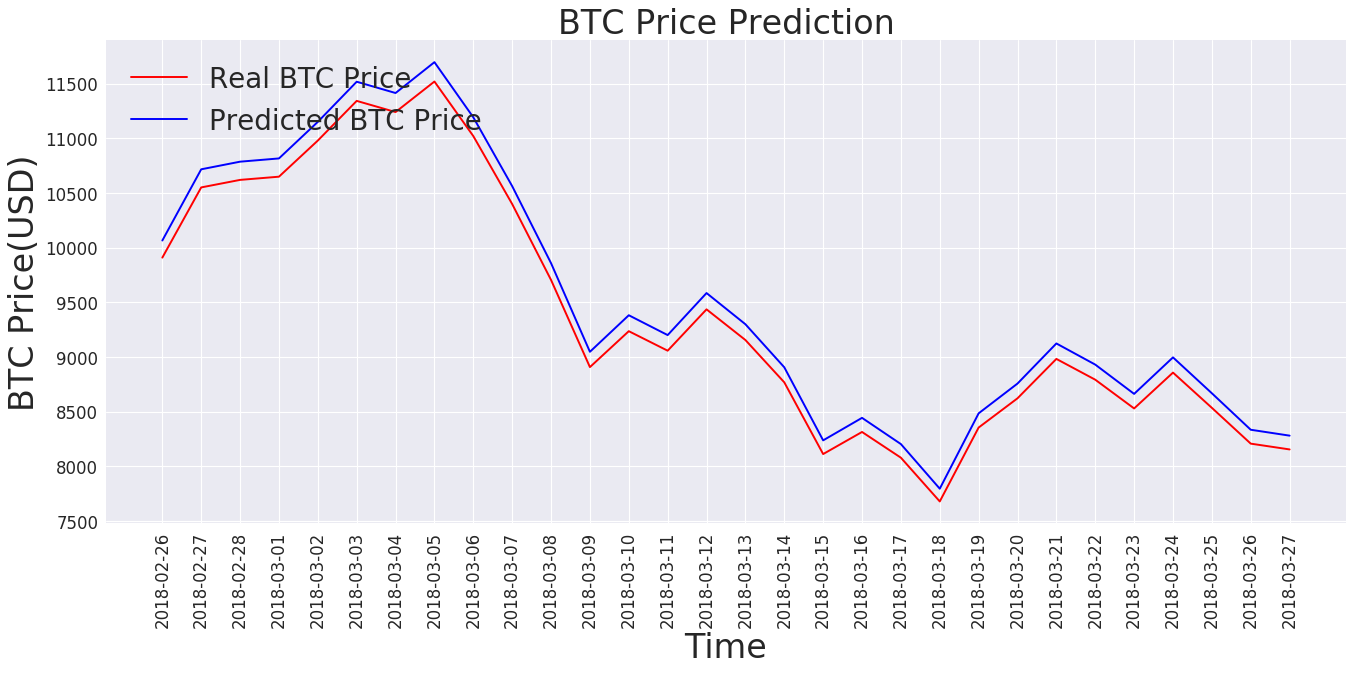

In [89]:
# Visualising the results
plt.figure(figsize=(20,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot()
plt.plot(test_set, color ='red', label= 'Real BTC Price')
plt.plot(predicted_BTC_price, color='blue', label ='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=30)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
plt.xlabel('Time', fontsize=30)
plt.ylabel('BTC Price(USD)', fontsize=30)
plt.legend(loc=2, prop={'size': 25})
plt.show()

Now everything done untill now has been forked. These results seem too god too be true, and after some examination I found out that they were.  
It seems that the predictions have not been shifted 1 day to the right, as they are supposed to.   
If we adjust that we should see the real results. 

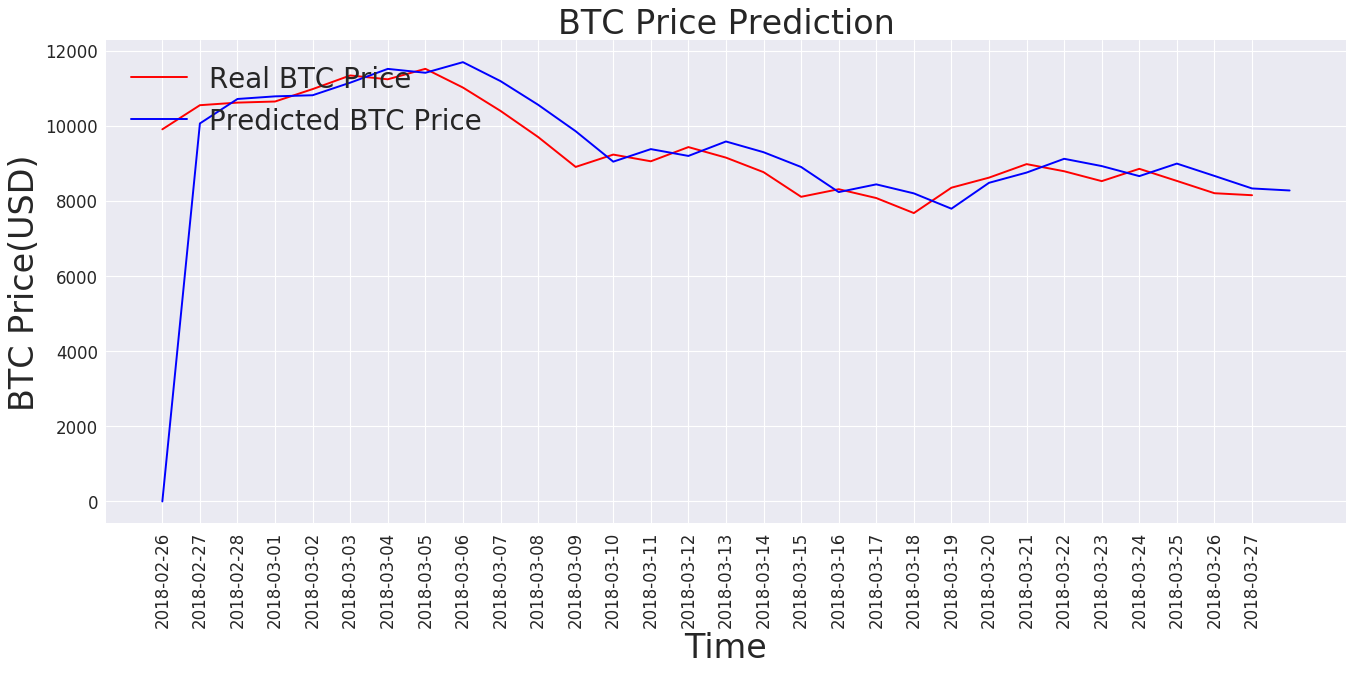

In [95]:
#Remake predictions
df_test= Real_Price[len(Real_Price)-prediction_days:]
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Roll predictions to the right
predicted_BTC_price = np.reshape(predicted_BTC_price, len(predicted_BTC_price))
predicted_BTC_price = np.append(predicted_BTC_price, 0) #Add filler value for roll because otherwise our last prediction will be shifted to index 0. (See np.roll)
predicted_BTC_price = np.roll(predicted_BTC_price, 1) 


#Plot results
# Visualising the results
plt.figure(figsize=(20,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot()
plt.plot(test_set, color ='red', label= 'Real BTC Price')
plt.plot(predicted_BTC_price, color='blue', label ='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=30)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
plt.xlabel('Time', fontsize=30)
plt.ylabel('BTC Price(USD)', fontsize=30)
plt.legend(loc=2, prop={'size': 25})
plt.show()

Looks a bit messy because of the first date but otherwise it serves its purpose.  
From this picture I conclude that our network's predictions are almost the same as the inputs, it seems that this was the way of the least error.  
It could be that we need more data or better pre-processing, or perhaps we can get more meaningful results if we tweak the network.

In [222]:
# Initialising the RNN
regressor_v1 = Sequential()

# Adding the input layer and the LSTM layer
regressor_v1.add(LSTM(units = 6, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor_v1.add(Dense(units = 1))

# Compiling the RNN
regressor_v1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor_v1.fit(X_train, y_train, batch_size = 5, epochs = 200)

Epoch 1/200


   5/2245 [..............................] - ETA: 9:46 - loss: 0.0047

 125/2245 [>.............................] - ETA: 23s - loss: 0.0327 

 270/2245 [==>...........................] - ETA: 10s - loss: 0.0325

 425/2245 [====>.........................] - ETA: 6s - loss: 0.0243 

 585/2245 [======>.......................] - ETA: 4s - loss: 0.0222

 745/2245 [========>.....................] - ETA: 3s - loss: 0.0202

 905/2245 [===========>..................] - ETA: 2s - loss: 0.0201

1065/2245 [=============>................] - ETA: 1s - loss: 0.0201

1205/2245 [===============>..............] - ETA: 1s - loss: 0.0181

1365/2245 [=================>............] - ETA: 1s - loss: 0.0185

1515/2245 [===================>..........] - ETA: 0s - loss: 0.0186

1660/2245 [=====================>........] - ETA: 0s - loss: 0.0180

1805/2245 [=======================>......] - ETA: 0s - loss: 0.0183

1945/2245 [========================>.....] - ETA: 0s - loss: 0.0182

2075/2245 [==========================>...] - ETA: 0s - loss: 0.0182

2215/2245 [============================>.] - ETA: 0s - loss: 0.0179

2245/2245 [==============================] - 2s 928us/step - loss: 0.0181


Epoch 2/200
   5/2245 [..............................] - ETA: 0s - loss: 0.0748

 135/2245 [>.............................] - ETA: 0s - loss: 0.0223

 280/2245 [==>...........................] - ETA: 0s - loss: 0.0175

 425/2245 [====>.........................] - ETA: 0s - loss: 0.0191

 570/2245 [======>.......................] - ETA: 0s - loss: 0.0165

 710/2245 [========>.....................] - ETA: 0s - loss: 0.0164

 855/2245 [==========>...................] - ETA: 0s - loss: 0.0157

 995/2245 [============>.................] - ETA: 0s - loss: 0.0144

1135/2245 [==============>...............] - ETA: 0s - loss: 0.0139

1280/2245 [================>.............] - ETA: 0s - loss: 0.0145

1425/2245 [==================>...........] - ETA: 0s - loss: 0.0151

1560/2245 [===================>..........] - ETA: 0s - loss: 0.0154

1700/2245 [=====================>........] - ETA: 0s - loss: 0.0162

1845/2245 [=======================>......] - ETA: 0s - loss: 0.0159

1990/2245 [=========================>....] - ETA: 0s - loss: 0.0154

2125/2245 [===========================>..] - ETA: 0s - loss: 0.0159

2245/2245 [==============================] - 1s 362us/step - loss: 0.0156


Epoch 3/200


   5/2245 [..............................] - ETA: 0s - loss: 0.0019

 120/2245 [>.............................] - ETA: 0s - loss: 0.0115

 250/2245 [==>...........................] - ETA: 0s - loss: 0.0111

 385/2245 [====>.........................] - ETA: 0s - loss: 0.0103

 530/2245 [======>.......................] - ETA: 0s - loss: 0.0131

 675/2245 [========>.....................] - ETA: 0s - loss: 0.0154

 820/2245 [=========>....................] - ETA: 0s - loss: 0.0149

 965/2245 [===========>..................] - ETA: 0s - loss: 0.0135

1110/2245 [=============>................] - ETA: 0s - loss: 0.0125

1245/2245 [===============>..............] - ETA: 0s - loss: 0.0125

1390/2245 [=================>............] - ETA: 0s - loss: 0.0133

1530/2245 [===================>..........] - ETA: 0s - loss: 0.0125

1670/2245 [=====================>........] - ETA: 0s - loss: 0.0128

1820/2245 [=======================>......] - ETA: 0s - loss: 0.0125

1965/2245 [=========================>....] - ETA: 0s - loss: 0.0130

2100/2245 [===========================>..] - ETA: 0s - loss: 0.0130

2240/2245 [============================>.] - ETA: 0s - loss: 0.0130

2245/2245 [==============================] - 1s 364us/step - loss: 0.0130


Epoch 4/200
   5/2245 [..............................] - ETA: 1s - loss: 0.0016

 135/2245 [>.............................] - ETA: 0s - loss: 0.0078

 245/2245 [==>...........................] - ETA: 0s - loss: 0.0117

 380/2245 [====>.........................] - ETA: 0s - loss: 0.0123

 530/2245 [======>.......................] - ETA: 0s - loss: 0.0113

 675/2245 [========>.....................] - ETA: 0s - loss: 0.0117

 805/2245 [=========>....................] - ETA: 0s - loss: 0.0118

 940/2245 [===========>..................] - ETA: 0s - loss: 0.0123

1080/2245 [=============>................] - ETA: 0s - loss: 0.0124

1220/2245 [===============>..............] - ETA: 0s - loss: 0.0115

1365/2245 [=================>............] - ETA: 0s - loss: 0.0112

1515/2245 [===================>..........] - ETA: 0s - loss: 0.0107

1655/2245 [=====================>........] - ETA: 0s - loss: 0.0106

1795/2245 [======================>.......] - ETA: 0s - loss: 0.0105

1935/2245 [========================>.....] - ETA: 0s - loss: 0.0104

2075/2245 [==========================>...] - ETA: 0s - loss: 0.0102

2220/2245 [============================>.] - ETA: 0s - loss: 0.0103

2245/2245 [==============================] - 1s 369us/step - loss: 0.0102


Epoch 5/200
   5/2245 [..............................] - ETA: 0s - loss: 0.0134

 140/2245 [>.............................] - ETA: 0s - loss: 0.0096

 280/2245 [==>...........................] - ETA: 0s - loss: 0.0089

 415/2245 [====>.........................] - ETA: 0s - loss: 0.0097

 560/2245 [======>.......................] - ETA: 0s - loss: 0.0089

 700/2245 [========>.....................] - ETA: 0s - loss: 0.0080

 825/2245 [==========>...................] - ETA: 0s - loss: 0.0076

 960/2245 [===========>..................] - ETA: 0s - loss: 0.0076

1080/2245 [=============>................] - ETA: 0s - loss: 0.0080

1195/2245 [==============>...............] - ETA: 0s - loss: 0.0080

1320/2245 [================>.............] - ETA: 0s - loss: 0.0078

1460/2245 [==================>...........] - ETA: 0s - loss: 0.0078

1585/2245 [====================>.........] - ETA: 0s - loss: 0.0076

1715/2245 [=====================>........] - ETA: 0s - loss: 0.0075

1855/2245 [=======================>......] - ETA: 0s - loss: 0.0075

1995/2245 [=========================>....] - ETA: 0s - loss: 0.0074

2115/2245 [===========================>..] - ETA: 0s - loss: 0.0074

2245/2245 [==============================] - 1s 386us/step - loss: 0.0072


Epoch 6/200
   5/2245 [..............................] - ETA: 1s - loss: 5.8192e-04

 115/2245 [>.............................] - ETA: 1s - loss: 0.0056    

 240/2245 [==>...........................] - ETA: 0s - loss: 0.0049

 375/2245 [====>.........................] - ETA: 0s - loss: 0.0060

 515/2245 [=====>........................] - ETA: 0s - loss: 0.0051

 650/2245 [=======>......................] - ETA: 0s - loss: 0.0045

 785/2245 [=========>....................] - ETA: 0s - loss: 0.0046

 920/2245 [===========>..................] - ETA: 0s - loss: 0.0045

1020/2245 [============>.................] - ETA: 0s - loss: 0.0045

1130/2245 [==============>...............] - ETA: 0s - loss: 0.0047

1265/2245 [===============>..............] - ETA: 0s - loss: 0.0049

1405/2245 [=================>............] - ETA: 0s - loss: 0.0048

1540/2245 [===================>..........] - ETA: 0s - loss: 0.0050

1680/2245 [=====================>........] - ETA: 0s - loss: 0.0049

1810/2245 [=======================>......] - ETA: 0s - loss: 0.0048

1935/2245 [========================>.....] - ETA: 0s - loss: 0.0046

2055/2245 [==========================>...] - ETA: 0s - loss: 0.0046

2185/2245 [============================>.] - ETA: 0s - loss: 0.0046

2245/2245 [==============================] - 1s 407us/step - loss: 0.0045


Epoch 7/200
   5/2245 [..............................] - ETA: 0s - loss: 1.0195e-04

 110/2245 [>.............................] - ETA: 1s - loss: 0.0012    

 195/2245 [=>............................] - ETA: 1s - loss: 0.0023

 290/2245 [==>...........................] - ETA: 1s - loss: 0.0029

 415/2245 [====>.........................] - ETA: 0s - loss: 0.0034

 560/2245 [======>.......................] - ETA: 0s - loss: 0.0030

 695/2245 [========>.....................] - ETA: 0s - loss: 0.0032

 810/2245 [=========>....................] - ETA: 0s - loss: 0.0030

 925/2245 [===========>..................] - ETA: 0s - loss: 0.0030

1055/2245 [=============>................] - ETA: 0s - loss: 0.0029

1170/2245 [==============>...............] - ETA: 0s - loss: 0.0028

1310/2245 [================>.............] - ETA: 0s - loss: 0.0029

1410/2245 [=================>............] - ETA: 0s - loss: 0.0028

1535/2245 [===================>..........] - ETA: 0s - loss: 0.0027

1670/2245 [=====================>........] - ETA: 0s - loss: 0.0027

1790/2245 [======================>.......] - ETA: 0s - loss: 0.0026

1900/2245 [========================>.....] - ETA: 0s - loss: 0.0025

2005/2245 [=========================>....] - ETA: 0s - loss: 0.0025

2105/2245 [===========================>..] - ETA: 0s - loss: 0.0024

2185/2245 [============================>.] - ETA: 0s - loss: 0.0024

2245/2245 [==============================] - 1s 447us/step - loss: 0.0023


Epoch 8/200
   5/2245 [..............................] - ETA: 1s - loss: 4.7739e-06

 105/2245 [>.............................] - ETA: 1s - loss: 0.0017    

 210/2245 [=>............................] - ETA: 1s - loss: 0.0017

 320/2245 [===>..........................] - ETA: 0s - loss: 0.0014

 430/2245 [====>.........................] - ETA: 0s - loss: 0.0016

 535/2245 [======>.......................] - ETA: 0s - loss: 0.0014

 635/2245 [=======>......................] - ETA: 0s - loss: 0.0013

 730/2245 [========>.....................] - ETA: 0s - loss: 0.0013

 835/2245 [==========>...................] - ETA: 0s - loss: 0.0012

 940/2245 [===========>..................] - ETA: 0s - loss: 0.0013

1035/2245 [============>.................] - ETA: 0s - loss: 0.0013

1135/2245 [==============>...............] - ETA: 0s - loss: 0.0013

1230/2245 [===============>..............] - ETA: 0s - loss: 0.0012

1325/2245 [================>.............] - ETA: 0s - loss: 0.0012

1430/2245 [==================>...........] - ETA: 0s - loss: 0.0012

1535/2245 [===================>..........] - ETA: 0s - loss: 0.0012

1645/2245 [====================>.........] - ETA: 0s - loss: 0.0011

1780/2245 [======================>.......] - ETA: 0s - loss: 0.0011

1925/2245 [========================>.....] - ETA: 0s - loss: 0.0010

2055/2245 [==========================>...] - ETA: 0s - loss: 9.8718e-04

2190/2245 [============================>.] - ETA: 0s - loss: 9.7086e-04

2245/2245 [==============================] - 1s 468us/step - loss: 9.5089e-04


Epoch 9/200
   5/2245 [..............................] - ETA: 0s - loss: 9.6700e-05

 130/2245 [>.............................] - ETA: 0s - loss: 2.6652e-04

 270/2245 [==>...........................] - ETA: 0s - loss: 2.5366e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 3.6630e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 4.2111e-04

 680/2245 [========>.....................] - ETA: 0s - loss: 3.7164e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 3.5694e-04

 955/2245 [===========>..................] - ETA: 0s - loss: 3.6029e-04

1100/2245 [=============>................] - ETA: 0s - loss: 4.0017e-04

1225/2245 [===============>..............] - ETA: 0s - loss: 4.0342e-04

1365/2245 [=================>............] - ETA: 0s - loss: 3.7717e-04

1510/2245 [===================>..........] - ETA: 0s - loss: 3.4807e-04

1645/2245 [====================>.........] - ETA: 0s - loss: 3.3499e-04

1770/2245 [======================>.......] - ETA: 0s - loss: 3.2065e-04

1910/2245 [========================>.....] - ETA: 0s - loss: 3.2147e-04

2050/2245 [==========================>...] - ETA: 0s - loss: 3.1662e-04

2195/2245 [============================>.] - ETA: 0s - loss: 3.0500e-04

2245/2245 [==============================] - 1s 372us/step - loss: 3.0769e-04


Epoch 10/200
   5/2245 [..............................] - ETA: 0s - loss: 1.9279e-05

 130/2245 [>.............................] - ETA: 0s - loss: 8.6481e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 2.0488e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.7178e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.8096e-04

 680/2245 [========>.....................] - ETA: 0s - loss: 1.6608e-04

 825/2245 [==========>...................] - ETA: 0s - loss: 1.4797e-04

 965/2245 [===========>..................] - ETA: 0s - loss: 1.6129e-04

1110/2245 [=============>................] - ETA: 0s - loss: 1.5157e-04

1240/2245 [===============>..............] - ETA: 0s - loss: 1.4180e-04

1380/2245 [=================>............] - ETA: 0s - loss: 1.3754e-04

1525/2245 [===================>..........] - ETA: 0s - loss: 1.3690e-04

1655/2245 [=====================>........] - ETA: 0s - loss: 1.3305e-04

1795/2245 [======================>.......] - ETA: 0s - loss: 1.2890e-04

1940/2245 [========================>.....] - ETA: 0s - loss: 1.2314e-04

2075/2245 [==========================>...] - ETA: 0s - loss: 1.2203e-04

2210/2245 [============================>.] - ETA: 0s - loss: 1.1527e-04

2245/2245 [==============================] - 1s 369us/step - loss: 1.1359e-04


Epoch 11/200
   5/2245 [..............................] - ETA: 0s - loss: 8.4713e-08

 130/2245 [>.............................] - ETA: 0s - loss: 7.2842e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 1.7096e-04

 410/2245 [====>.........................] - ETA: 0s - loss: 1.6288e-04

 515/2245 [=====>........................] - ETA: 0s - loss: 1.3565e-04

 605/2245 [=======>......................] - ETA: 0s - loss: 1.2621e-04

 700/2245 [========>.....................] - ETA: 0s - loss: 1.1670e-04

 800/2245 [=========>....................] - ETA: 0s - loss: 1.1239e-04

 890/2245 [==========>...................] - ETA: 0s - loss: 1.0358e-04

 985/2245 [============>.................] - ETA: 0s - loss: 1.0160e-04

1090/2245 [=============>................] - ETA: 0s - loss: 9.3917e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 1.0239e-04

1295/2245 [================>.............] - ETA: 0s - loss: 1.0353e-04

1405/2245 [=================>............] - ETA: 0s - loss: 9.7958e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 9.2499e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 9.0008e-05

1720/2245 [=====================>........] - ETA: 0s - loss: 8.8775e-05

1820/2245 [=======================>......] - ETA: 0s - loss: 8.4612e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.6907e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 8.4968e-05

2105/2245 [===========================>..] - ETA: 0s - loss: 8.1577e-05

2215/2245 [============================>.] - ETA: 0s - loss: 8.0648e-05

2245/2245 [==============================] - 1s 482us/step - loss: 7.9833e-05


Epoch 12/200
   5/2245 [..............................] - ETA: 1s - loss: 4.7341e-06

 130/2245 [>.............................] - ETA: 0s - loss: 4.0716e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 3.9596e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 3.8772e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 4.4472e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 6.8423e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 9.2304e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 1.0079e-04

1075/2245 [=============>................] - ETA: 0s - loss: 9.3184e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.3395e-05

1335/2245 [================>.............] - ETA: 0s - loss: 8.2954e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 8.0845e-05

1545/2245 [===================>..........] - ETA: 0s - loss: 7.6629e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 7.3820e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 7.6267e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 7.2936e-05

1950/2245 [=========================>....] - ETA: 0s - loss: 7.0702e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 7.1213e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 7.6253e-05

2245/2245 [==============================] - 1s 431us/step - loss: 7.5509e-05


Epoch 13/200


   5/2245 [..............................] - ETA: 1s - loss: 1.2371e-05

 125/2245 [>.............................] - ETA: 0s - loss: 9.4045e-05

 230/2245 [==>...........................] - ETA: 0s - loss: 7.7706e-05

 340/2245 [===>..........................] - ETA: 0s - loss: 6.4332e-05

 440/2245 [====>.........................] - ETA: 0s - loss: 5.8282e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.2939e-05

 625/2245 [=======>......................] - ETA: 0s - loss: 5.0899e-05

 730/2245 [========>.....................] - ETA: 0s - loss: 4.4462e-05

 835/2245 [==========>...................] - ETA: 0s - loss: 4.0697e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 4.1195e-05

1055/2245 [=============>................] - ETA: 0s - loss: 4.4641e-05

1155/2245 [==============>...............] - ETA: 0s - loss: 5.7864e-05

1265/2245 [===============>..............] - ETA: 0s - loss: 6.4037e-05

1370/2245 [=================>............] - ETA: 0s - loss: 6.2588e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.0817e-05

1565/2245 [===================>..........] - ETA: 0s - loss: 7.0998e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 7.1807e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 7.1718e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 6.9296e-05

1970/2245 [=========================>....] - ETA: 0s - loss: 6.7451e-05

2075/2245 [==========================>...] - ETA: 0s - loss: 7.4791e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.8428e-05

2245/2245 [==============================] - 1s 491us/step - loss: 7.6996e-05


Epoch 14/200
   5/2245 [..............................] - ETA: 2s - loss: 3.7975e-06

 105/2245 [>.............................] - ETA: 1s - loss: 8.7333e-05

 200/2245 [=>............................] - ETA: 1s - loss: 8.0550e-05

 305/2245 [===>..........................] - ETA: 1s - loss: 6.0071e-05

 380/2245 [====>.........................] - ETA: 1s - loss: 6.7137e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 7.4732e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 9.3434e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 7.9857e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 8.8821e-05

1025/2245 [============>.................] - ETA: 0s - loss: 1.0214e-04

1130/2245 [==============>...............] - ETA: 0s - loss: 9.3771e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 9.3760e-05

1345/2245 [================>.............] - ETA: 0s - loss: 9.3862e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 9.0204e-05

1535/2245 [===================>..........] - ETA: 0s - loss: 8.8916e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.4646e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 8.0038e-05

1830/2245 [=======================>......] - ETA: 0s - loss: 7.7583e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 7.7613e-05

2075/2245 [==========================>...] - ETA: 0s - loss: 8.2453e-05

2220/2245 [============================>.] - ETA: 0s - loss: 7.9198e-05

2245/2245 [==============================] - 1s 461us/step - loss: 7.8359e-05


Epoch 15/200
   5/2245 [..............................] - ETA: 0s - loss: 9.9697e-07

 130/2245 [>.............................] - ETA: 0s - loss: 1.2682e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 7.6109e-06

 385/2245 [====>.........................] - ETA: 0s - loss: 3.7117e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 4.5152e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 6.0107e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 5.8417e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 5.8598e-05

1075/2245 [=============>................] - ETA: 0s - loss: 6.0850e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.3332e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.7241e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 7.5748e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.4388e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.1833e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 6.8998e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 6.9491e-05

2180/2245 [============================>.] - ETA: 0s - loss: 7.3909e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.7509e-05


Epoch 16/200
   5/2245 [..............................] - ETA: 0s - loss: 2.0374e-06

 120/2245 [>.............................] - ETA: 0s - loss: 7.1587e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 4.7977e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 6.0099e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 4.8344e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 5.1348e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 4.8008e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 4.2045e-05

1090/2245 [=============>................] - ETA: 0s - loss: 3.8235e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 4.8868e-05

1345/2245 [================>.............] - ETA: 0s - loss: 5.8642e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 6.3519e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 6.2998e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 7.5682e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.2235e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.3605e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 7.2025e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.8060e-05


Epoch 17/200
   5/2245 [..............................] - ETA: 0s - loss: 2.2470e-05

 115/2245 [>.............................] - ETA: 0s - loss: 2.7446e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 3.7286e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 3.9100e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 4.1010e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 5.0281e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 5.9305e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 5.9349e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.8165e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.9812e-05

1360/2245 [=================>............] - ETA: 0s - loss: 9.8722e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 9.6316e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 9.0846e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.5863e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 8.1572e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 7.7834e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.8293e-05

2245/2245 [==============================] - 1s 371us/step - loss: 7.7477e-05


Epoch 18/200
   5/2245 [..............................] - ETA: 1s - loss: 3.5930e-06

 125/2245 [>.............................] - ETA: 0s - loss: 1.1425e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 8.4016e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 7.4103e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 6.0831e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 5.6902e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 5.6218e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 5.4600e-05

1095/2245 [=============>................] - ETA: 0s - loss: 5.5394e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 5.1360e-05

1375/2245 [=================>............] - ETA: 0s - loss: 5.9948e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 7.0796e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 6.9218e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 7.0168e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 8.4327e-05

2075/2245 [==========================>...] - ETA: 0s - loss: 7.9536e-05

2220/2245 [============================>.] - ETA: 0s - loss: 7.8939e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.9107e-05


Epoch 19/200
   5/2245 [..............................] - ETA: 0s - loss: 1.2228e-05

 115/2245 [>.............................] - ETA: 0s - loss: 1.9131e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.3776e-04

 390/2245 [====>.........................] - ETA: 0s - loss: 1.1577e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 9.3727e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 7.7080e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 7.3845e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 7.0247e-05

1070/2245 [=============>................] - ETA: 0s - loss: 7.0475e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 6.5318e-05

1350/2245 [=================>............] - ETA: 0s - loss: 7.0892e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.5896e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.3246e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.3321e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.4997e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 7.2871e-05

2190/2245 [============================>.] - ETA: 0s - loss: 7.8064e-05

2245/2245 [==============================] - 1s 373us/step - loss: 7.8483e-05


Epoch 20/200
   5/2245 [..............................] - ETA: 1s - loss: 9.4877e-06

 120/2245 [>.............................] - ETA: 0s - loss: 7.3235e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 6.9699e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 6.8920e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.2829e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 9.9671e-05

 780/2245 [=========>....................] - ETA: 0s - loss: 1.0028e-04

 915/2245 [===========>..................] - ETA: 0s - loss: 9.6002e-05

1000/2245 [============>.................] - ETA: 0s - loss: 9.3009e-05

1105/2245 [=============>................] - ETA: 0s - loss: 9.8739e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 9.2383e-05

1305/2245 [================>.............] - ETA: 0s - loss: 8.9637e-05

1400/2245 [=================>............] - ETA: 0s - loss: 8.4562e-05

1460/2245 [==================>...........] - ETA: 0s - loss: 8.1729e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 7.9923e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 8.7302e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 8.6096e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 8.5029e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.5041e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 8.5880e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 8.5180e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.1967e-05

2245/2245 [==============================] - 1s 499us/step - loss: 8.1281e-05


Epoch 21/200
   5/2245 [..............................] - ETA: 1s - loss: 0.0014

  85/2245 [>.............................] - ETA: 1s - loss: 1.0457e-04

 170/2245 [=>............................] - ETA: 1s - loss: 1.0355e-04

 265/2245 [==>...........................] - ETA: 1s - loss: 1.5044e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.1570e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 9.4374e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 8.1491e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 6.9994e-05

 895/2245 [==========>...................] - ETA: 0s - loss: 8.0147e-05

1030/2245 [============>.................] - ETA: 0s - loss: 7.8602e-05

1125/2245 [==============>...............] - ETA: 0s - loss: 7.3059e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 7.0866e-05

1310/2245 [================>.............] - ETA: 0s - loss: 7.0341e-05

1410/2245 [=================>............] - ETA: 0s - loss: 7.4385e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 7.7499e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.5023e-05

1730/2245 [======================>.......] - ETA: 0s - loss: 8.5486e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 8.7022e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 8.7822e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.5804e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.3418e-05

2105/2245 [===========================>..] - ETA: 0s - loss: 8.2344e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.1467e-05

2245/2245 [==============================] - 1s 516us/step - loss: 8.1610e-05


Epoch 22/200
   5/2245 [..............................] - ETA: 1s - loss: 1.8976e-04

 100/2245 [>.............................] - ETA: 1s - loss: 5.3642e-05

 185/2245 [=>............................] - ETA: 1s - loss: 5.0595e-05

 280/2245 [==>...........................] - ETA: 1s - loss: 4.6591e-05

 370/2245 [===>..........................] - ETA: 1s - loss: 5.1048e-05

 460/2245 [=====>........................] - ETA: 1s - loss: 4.4273e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 4.4485e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 5.9311e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 6.1422e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 6.7199e-05

1100/2245 [=============>................] - ETA: 0s - loss: 6.7522e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 6.2214e-05

1355/2245 [=================>............] - ETA: 0s - loss: 6.4651e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 6.4074e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.3959e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 7.3777e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 7.0593e-05

2010/2245 [=========================>....] - ETA: 0s - loss: 8.2351e-05

2130/2245 [===========================>..] - ETA: 0s - loss: 7.9347e-05

2245/2245 [==============================] - 1s 432us/step - loss: 8.1309e-05


Epoch 23/200
   5/2245 [..............................] - ETA: 1s - loss: 2.0868e-04

 130/2245 [>.............................] - ETA: 0s - loss: 3.8456e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 1.4730e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.1810e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 1.3072e-04

 660/2245 [=======>......................] - ETA: 0s - loss: 1.1014e-04

 795/2245 [=========>....................] - ETA: 0s - loss: 1.0063e-04

 920/2245 [===========>..................] - ETA: 0s - loss: 1.0715e-04

1040/2245 [============>.................] - ETA: 0s - loss: 1.0817e-04

1175/2245 [==============>...............] - ETA: 0s - loss: 1.0707e-04

1315/2245 [================>.............] - ETA: 0s - loss: 1.0687e-04

1455/2245 [==================>...........] - ETA: 0s - loss: 1.0370e-04

1585/2245 [====================>.........] - ETA: 0s - loss: 9.7245e-05

1720/2245 [=====================>........] - ETA: 0s - loss: 9.2846e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 9.1040e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 8.5318e-05

2140/2245 [===========================>..] - ETA: 0s - loss: 8.1988e-05

2245/2245 [==============================] - 1s 383us/step - loss: 7.8590e-05


Epoch 24/200
   5/2245 [..............................] - ETA: 0s - loss: 1.1539e-06

 115/2245 [>.............................] - ETA: 0s - loss: 8.3134e-05

 230/2245 [==>...........................] - ETA: 0s - loss: 6.5519e-05

 365/2245 [===>..........................] - ETA: 0s - loss: 5.1847e-05

 500/2245 [=====>........................] - ETA: 0s - loss: 4.6180e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 7.4581e-05

 760/2245 [=========>....................] - ETA: 0s - loss: 7.1875e-05

 905/2245 [===========>..................] - ETA: 0s - loss: 7.5523e-05

1020/2245 [============>.................] - ETA: 0s - loss: 7.0218e-05

1160/2245 [==============>...............] - ETA: 0s - loss: 6.4341e-05

1300/2245 [================>.............] - ETA: 0s - loss: 6.6649e-05

1440/2245 [==================>...........] - ETA: 0s - loss: 6.4331e-05

1565/2245 [===================>..........] - ETA: 0s - loss: 6.6897e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 7.1493e-05

1830/2245 [=======================>......] - ETA: 0s - loss: 8.0899e-05

1965/2245 [=========================>....] - ETA: 0s - loss: 7.7537e-05

2100/2245 [===========================>..] - ETA: 0s - loss: 7.8610e-05

2240/2245 [============================>.] - ETA: 0s - loss: 7.9921e-05

2245/2245 [==============================] - 1s 389us/step - loss: 7.9757e-05


Epoch 25/200
   5/2245 [..............................] - ETA: 1s - loss: 9.6504e-06

 110/2245 [>.............................] - ETA: 1s - loss: 3.5687e-05

 180/2245 [=>............................] - ETA: 1s - loss: 2.7110e-05

 270/2245 [==>...........................] - ETA: 1s - loss: 2.8580e-05

 355/2245 [===>..........................] - ETA: 1s - loss: 3.6580e-05

 445/2245 [====>.........................] - ETA: 1s - loss: 5.0056e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 4.7406e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 4.7369e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 4.5108e-05

 885/2245 [==========>...................] - ETA: 0s - loss: 4.5701e-05

1015/2245 [============>.................] - ETA: 0s - loss: 4.8899e-05

1150/2245 [==============>...............] - ETA: 0s - loss: 6.1237e-05

1290/2245 [================>.............] - ETA: 0s - loss: 5.6406e-05

1430/2245 [==================>...........] - ETA: 0s - loss: 5.2054e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 5.0619e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 4.8951e-05

1850/2245 [=======================>......] - ETA: 0s - loss: 5.3637e-05

1970/2245 [=========================>....] - ETA: 0s - loss: 5.8680e-05

2110/2245 [===========================>..] - ETA: 0s - loss: 7.6631e-05

2245/2245 [==============================] - 1s 433us/step - loss: 8.1807e-05


Epoch 26/200
   5/2245 [..............................] - ETA: 0s - loss: 1.0802e-04

 125/2245 [>.............................] - ETA: 0s - loss: 7.7022e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 7.4733e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 6.3158e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 6.7701e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 9.9508e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 9.2373e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 8.9111e-05

1070/2245 [=============>................] - ETA: 0s - loss: 7.9128e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.9096e-05

1330/2245 [================>.............] - ETA: 0s - loss: 8.2226e-05

1455/2245 [==================>...........] - ETA: 0s - loss: 7.9022e-05

1545/2245 [===================>..........] - ETA: 0s - loss: 7.5227e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.4851e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 7.3548e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 7.2095e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.0463e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 7.1223e-05

2110/2245 [===========================>..] - ETA: 0s - loss: 7.1965e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.0950e-05

2245/2245 [==============================] - 1s 448us/step - loss: 7.8153e-05


Epoch 27/200
   5/2245 [..............................] - ETA: 1s - loss: 1.1842e-04

  80/2245 [>.............................] - ETA: 1s - loss: 2.2167e-04

 170/2245 [=>............................] - ETA: 1s - loss: 1.2730e-04

 270/2245 [==>...........................] - ETA: 1s - loss: 1.0948e-04

 385/2245 [====>.........................] - ETA: 1s - loss: 8.3868e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 7.4302e-05

 580/2245 [======>.......................] - ETA: 0s - loss: 9.4442e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 1.0046e-04

 765/2245 [=========>....................] - ETA: 0s - loss: 8.8759e-05

 845/2245 [==========>...................] - ETA: 0s - loss: 8.1980e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 7.8078e-05

1075/2245 [=============>................] - ETA: 0s - loss: 7.2072e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 7.4863e-05

1330/2245 [================>.............] - ETA: 0s - loss: 7.4871e-05

1410/2245 [=================>............] - ETA: 0s - loss: 7.9626e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.4019e-05

1600/2245 [====================>.........] - ETA: 0s - loss: 8.3854e-05

1685/2245 [=====================>........] - ETA: 0s - loss: 8.4073e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 8.1930e-05

1945/2245 [========================>.....] - ETA: 0s - loss: 8.0516e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 8.1735e-05

2220/2245 [============================>.] - ETA: 0s - loss: 7.9865e-05

2245/2245 [==============================] - 1s 483us/step - loss: 7.8991e-05


Epoch 28/200
   5/2245 [..............................] - ETA: 1s - loss: 7.9927e-06

 125/2245 [>.............................] - ETA: 0s - loss: 1.3741e-04

 245/2245 [==>...........................] - ETA: 0s - loss: 9.6764e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 1.0033e-04

 520/2245 [=====>........................] - ETA: 0s - loss: 1.2225e-04

 660/2245 [=======>......................] - ETA: 0s - loss: 1.0212e-04

 790/2245 [=========>....................] - ETA: 0s - loss: 9.6477e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 8.7262e-05

1040/2245 [============>.................] - ETA: 0s - loss: 9.9533e-05

1165/2245 [==============>...............] - ETA: 0s - loss: 9.7174e-05

1300/2245 [================>.............] - ETA: 0s - loss: 9.2822e-05

1440/2245 [==================>...........] - ETA: 0s - loss: 9.0465e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 8.7928e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 8.6956e-05

1855/2245 [=======================>......] - ETA: 0s - loss: 8.7552e-05

1985/2245 [=========================>....] - ETA: 0s - loss: 8.2322e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.2014e-05

2245/2245 [==============================] - 1s 385us/step - loss: 8.0352e-05


Epoch 29/200
   5/2245 [..............................] - ETA: 0s - loss: 5.9008e-06

 135/2245 [>.............................] - ETA: 0s - loss: 5.0834e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.5847e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 4.9642e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 4.9078e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 5.5472e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 6.9118e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 7.0193e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.2388e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 8.2165e-05

1340/2245 [================>.............] - ETA: 0s - loss: 9.0735e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 8.7772e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 8.8751e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 8.5074e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 8.3504e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 8.1110e-05

2135/2245 [===========================>..] - ETA: 0s - loss: 7.8462e-05

2245/2245 [==============================] - 1s 381us/step - loss: 7.8044e-05


Epoch 30/200
   5/2245 [..............................] - ETA: 0s - loss: 1.2648e-05

 110/2245 [>.............................] - ETA: 1s - loss: 1.8739e-04

 230/2245 [==>...........................] - ETA: 0s - loss: 1.3254e-04

 365/2245 [===>..........................] - ETA: 0s - loss: 9.5278e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 7.4461e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 6.7808e-05

 780/2245 [=========>....................] - ETA: 0s - loss: 6.7566e-05

 920/2245 [===========>..................] - ETA: 0s - loss: 7.1879e-05

1050/2245 [=============>................] - ETA: 0s - loss: 6.7837e-05

1175/2245 [==============>...............] - ETA: 0s - loss: 6.9823e-05

1270/2245 [===============>..............] - ETA: 0s - loss: 8.4688e-05

1370/2245 [=================>............] - ETA: 0s - loss: 8.2436e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 8.2862e-05

1560/2245 [===================>..........] - ETA: 0s - loss: 8.5855e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 9.6400e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 9.7323e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 9.3547e-05

1955/2245 [=========================>....] - ETA: 0s - loss: 8.8324e-05

2095/2245 [==========================>...] - ETA: 0s - loss: 8.3250e-05

2235/2245 [============================>.] - ETA: 0s - loss: 8.0608e-05

2245/2245 [==============================] - 1s 437us/step - loss: 8.0259e-05


Epoch 31/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5564e-06

 135/2245 [>.............................] - ETA: 0s - loss: 1.3123e-04

 245/2245 [==>...........................] - ETA: 0s - loss: 7.5989e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 6.2834e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 6.6020e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 7.3872e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 7.3688e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 7.0576e-05

1065/2245 [=============>................] - ETA: 0s - loss: 6.3582e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 7.0197e-05

1345/2245 [================>.............] - ETA: 0s - loss: 8.1504e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 7.7733e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.7100e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 8.4396e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 8.0241e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 7.9514e-05

2130/2245 [===========================>..] - ETA: 0s - loss: 7.6406e-05

2245/2245 [==============================] - 1s 384us/step - loss: 8.0224e-05


Epoch 32/200
   5/2245 [..............................] - ETA: 1s - loss: 4.6745e-06

 130/2245 [>.............................] - ETA: 0s - loss: 1.5889e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 1.9930e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 1.7868e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 2.0628e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 1.9740e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 4.0894e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 4.4989e-05

1065/2245 [=============>................] - ETA: 0s - loss: 7.1884e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 7.0652e-05

1330/2245 [================>.............] - ETA: 0s - loss: 8.1012e-05

1460/2245 [==================>...........] - ETA: 0s - loss: 8.0854e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 7.5399e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 7.7732e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 7.6731e-05

2005/2245 [=========================>....] - ETA: 0s - loss: 8.4093e-05

2125/2245 [===========================>..] - ETA: 0s - loss: 8.2295e-05

2245/2245 [==============================] - 1s 385us/step - loss: 7.9671e-05


Epoch 33/200
   5/2245 [..............................] - ETA: 1s - loss: 2.7204e-05

 130/2245 [>.............................] - ETA: 0s - loss: 6.9287e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 1.2259e-04

 370/2245 [===>..........................] - ETA: 0s - loss: 9.1907e-05

 500/2245 [=====>........................] - ETA: 0s - loss: 7.9533e-05

 630/2245 [=======>......................] - ETA: 0s - loss: 7.5195e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 6.6654e-05

 900/2245 [===========>..................] - ETA: 0s - loss: 7.8764e-05

1025/2245 [============>.................] - ETA: 0s - loss: 9.1359e-05

1155/2245 [==============>...............] - ETA: 0s - loss: 1.0269e-04

1245/2245 [===============>..............] - ETA: 0s - loss: 9.7070e-05

1320/2245 [================>.............] - ETA: 0s - loss: 9.8252e-05

1390/2245 [=================>............] - ETA: 0s - loss: 9.8243e-05

1465/2245 [==================>...........] - ETA: 0s - loss: 9.3545e-05

1565/2245 [===================>..........] - ETA: 0s - loss: 9.3903e-05

1655/2245 [=====================>........] - ETA: 0s - loss: 8.9132e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.8786e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.4378e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.1078e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.7133e-05

2245/2245 [==============================] - 1s 446us/step - loss: 7.9350e-05


Epoch 34/200
   5/2245 [..............................] - ETA: 1s - loss: 1.1874e-05

 125/2245 [>.............................] - ETA: 0s - loss: 2.5529e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 2.7061e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 4.2968e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 6.1861e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.0032e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 7.9105e-05

 895/2245 [==========>...................] - ETA: 0s - loss: 7.3013e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 6.8579e-05

1040/2245 [============>.................] - ETA: 0s - loss: 6.4396e-05

1125/2245 [==============>...............] - ETA: 0s - loss: 6.0689e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 7.2405e-05

1290/2245 [================>.............] - ETA: 0s - loss: 6.9422e-05

1380/2245 [=================>............] - ETA: 0s - loss: 6.7139e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.3768e-05

1585/2245 [====================>.........] - ETA: 0s - loss: 6.3638e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 6.2753e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 7.0168e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 6.6809e-05

2105/2245 [===========================>..] - ETA: 0s - loss: 7.3653e-05

2230/2245 [============================>.] - ETA: 0s - loss: 8.0180e-05

2245/2245 [==============================] - 1s 461us/step - loss: 7.9689e-05


Epoch 35/200
   5/2245 [..............................] - ETA: 2s - loss: 1.5581e-05

 130/2245 [>.............................] - ETA: 0s - loss: 2.9962e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.5655e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 3.7283e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.6511e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 7.3532e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 7.0001e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 6.8736e-05

1060/2245 [=============>................] - ETA: 0s - loss: 7.9077e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 7.8870e-05

1320/2245 [================>.............] - ETA: 0s - loss: 8.0749e-05

1450/2245 [==================>...........] - ETA: 0s - loss: 8.7848e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 8.4809e-05

1705/2245 [=====================>........] - ETA: 0s - loss: 8.2154e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 9.0044e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.6958e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 8.8139e-05

2075/2245 [==========================>...] - ETA: 0s - loss: 8.4705e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.3626e-05

2245/2245 [==============================] - 1s 427us/step - loss: 8.1957e-05


Epoch 36/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5137e-04

 120/2245 [>.............................] - ETA: 0s - loss: 4.1071e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 5.4540e-05

 355/2245 [===>..........................] - ETA: 0s - loss: 9.2543e-05

 440/2245 [====>.........................] - ETA: 0s - loss: 8.6241e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 7.8962e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 7.7396e-05

 715/2245 [========>.....................] - ETA: 0s - loss: 7.7635e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 8.5345e-05

 900/2245 [===========>..................] - ETA: 0s - loss: 7.8445e-05

 995/2245 [============>.................] - ETA: 0s - loss: 7.8270e-05

1090/2245 [=============>................] - ETA: 0s - loss: 7.2451e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 8.3317e-05

1270/2245 [===============>..............] - ETA: 0s - loss: 7.9008e-05

1370/2245 [=================>............] - ETA: 0s - loss: 7.4417e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 7.0968e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 7.1930e-05

1670/2245 [=====================>........] - ETA: 0s - loss: 7.0954e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 7.3206e-05

1840/2245 [=======================>......] - ETA: 0s - loss: 7.0713e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 7.0219e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 7.4448e-05

2110/2245 [===========================>..] - ETA: 0s - loss: 7.5472e-05

2210/2245 [============================>.] - ETA: 0s - loss: 8.1846e-05

2245/2245 [==============================] - 1s 534us/step - loss: 8.1026e-05


Epoch 37/200
   5/2245 [..............................] - ETA: 1s - loss: 1.7538e-06

 105/2245 [>.............................] - ETA: 1s - loss: 1.6501e-04

 230/2245 [==>...........................] - ETA: 0s - loss: 1.1832e-04

 355/2245 [===>..........................] - ETA: 0s - loss: 9.1098e-05

 490/2245 [=====>........................] - ETA: 0s - loss: 7.2228e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 8.9917e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 8.5395e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 7.9307e-05

1050/2245 [=============>................] - ETA: 0s - loss: 8.2572e-05

1125/2245 [==============>...............] - ETA: 0s - loss: 7.7750e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 7.6833e-05

1300/2245 [================>.............] - ETA: 0s - loss: 8.8053e-05

1395/2245 [=================>............] - ETA: 0s - loss: 8.3046e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 8.1839e-05

1580/2245 [====================>.........] - ETA: 0s - loss: 7.8987e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.7944e-05

1795/2245 [======================>.......] - ETA: 0s - loss: 7.5647e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 7.8681e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.2736e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.9335e-05

2245/2245 [==============================] - 1s 443us/step - loss: 7.9638e-05


Epoch 38/200
   5/2245 [..............................] - ETA: 0s - loss: 1.9373e-06

 125/2245 [>.............................] - ETA: 0s - loss: 4.0809e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 6.6234e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 7.8683e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 7.2074e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 6.6043e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 6.6612e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 6.0264e-05

1050/2245 [=============>................] - ETA: 0s - loss: 5.8547e-05

1175/2245 [==============>...............] - ETA: 0s - loss: 6.0086e-05

1315/2245 [================>.............] - ETA: 0s - loss: 6.1471e-05

1450/2245 [==================>...........] - ETA: 0s - loss: 5.9128e-05

1590/2245 [====================>.........] - ETA: 0s - loss: 6.9480e-05

1730/2245 [======================>.......] - ETA: 0s - loss: 6.5573e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 6.8499e-05

1980/2245 [=========================>....] - ETA: 0s - loss: 7.6138e-05

2110/2245 [===========================>..] - ETA: 0s - loss: 8.3046e-05

2245/2245 [==============================] - 1s 386us/step - loss: 7.9764e-05


Epoch 39/200
   5/2245 [..............................] - ETA: 2s - loss: 3.7518e-05

 135/2245 [>.............................] - ETA: 0s - loss: 6.2936e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 3.9006e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 4.0734e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.7321e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 6.1237e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 5.5319e-05

 920/2245 [===========>..................] - ETA: 0s - loss: 7.5374e-05

1060/2245 [=============>................] - ETA: 0s - loss: 7.2670e-05

1160/2245 [==============>...............] - ETA: 0s - loss: 8.3446e-05

1245/2245 [===============>..............] - ETA: 0s - loss: 8.1731e-05

1340/2245 [================>.............] - ETA: 0s - loss: 7.8150e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 7.8168e-05

1535/2245 [===================>..........] - ETA: 0s - loss: 7.4247e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.5040e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 8.1942e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 8.3024e-05

1945/2245 [========================>.....] - ETA: 0s - loss: 8.2333e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.1781e-05

2180/2245 [============================>.] - ETA: 0s - loss: 7.8243e-05

2245/2245 [==============================] - 1s 447us/step - loss: 7.8325e-05


Epoch 40/200
   5/2245 [..............................] - ETA: 1s - loss: 2.0590e-05

 125/2245 [>.............................] - ETA: 0s - loss: 1.1802e-04

 245/2245 [==>...........................] - ETA: 0s - loss: 9.3186e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 7.1382e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 6.0303e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 6.5594e-05

 760/2245 [=========>....................] - ETA: 0s - loss: 6.7483e-05

 900/2245 [===========>..................] - ETA: 0s - loss: 6.0480e-05

1040/2245 [============>.................] - ETA: 0s - loss: 5.6823e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 5.7221e-05

1320/2245 [================>.............] - ETA: 0s - loss: 6.0684e-05

1445/2245 [==================>...........] - ETA: 0s - loss: 5.8694e-05

1580/2245 [====================>.........] - ETA: 0s - loss: 6.6046e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 6.2880e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 6.4160e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 7.2869e-05

2140/2245 [===========================>..] - ETA: 0s - loss: 7.8359e-05

2245/2245 [==============================] - 1s 383us/step - loss: 7.8914e-05


Epoch 41/200
   5/2245 [..............................] - ETA: 0s - loss: 5.9607e-07

  85/2245 [>.............................] - ETA: 1s - loss: 1.0145e-04

 210/2245 [=>............................] - ETA: 1s - loss: 7.9261e-05

 350/2245 [===>..........................] - ETA: 0s - loss: 6.5435e-05

 490/2245 [=====>........................] - ETA: 0s - loss: 6.5633e-05

 630/2245 [=======>......................] - ETA: 0s - loss: 6.1446e-05

 765/2245 [=========>....................] - ETA: 0s - loss: 5.6559e-05

 895/2245 [==========>...................] - ETA: 0s - loss: 5.7369e-05

1030/2245 [============>.................] - ETA: 0s - loss: 5.6459e-05

1175/2245 [==============>...............] - ETA: 0s - loss: 6.0198e-05

1310/2245 [================>.............] - ETA: 0s - loss: 5.9863e-05

1455/2245 [==================>...........] - ETA: 0s - loss: 5.7675e-05

1580/2245 [====================>.........] - ETA: 0s - loss: 6.4039e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 6.9483e-05

1840/2245 [=======================>......] - ETA: 0s - loss: 6.8182e-05

1980/2245 [=========================>....] - ETA: 0s - loss: 6.7020e-05

2120/2245 [===========================>..] - ETA: 0s - loss: 7.5500e-05

2245/2245 [==============================] - 1s 384us/step - loss: 8.1634e-05


Epoch 42/200


   5/2245 [..............................] - ETA: 1s - loss: 7.1368e-06

 135/2245 [>.............................] - ETA: 0s - loss: 3.6453e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 3.3611e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 4.0363e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 4.8879e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 4.5915e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 5.0030e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 5.5136e-05

1055/2245 [=============>................] - ETA: 0s - loss: 5.3858e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 6.3771e-05

1315/2245 [================>.............] - ETA: 0s - loss: 7.3888e-05

1445/2245 [==================>...........] - ETA: 0s - loss: 7.5441e-05

1585/2245 [====================>.........] - ETA: 0s - loss: 6.9394e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 6.8642e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 7.5393e-05

2005/2245 [=========================>....] - ETA: 0s - loss: 7.6150e-05

2140/2245 [===========================>..] - ETA: 0s - loss: 8.1311e-05

2245/2245 [==============================] - 1s 386us/step - loss: 7.9778e-05


Epoch 43/200


   5/2245 [..............................] - ETA: 0s - loss: 6.5572e-06

 140/2245 [>.............................] - ETA: 0s - loss: 6.8272e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 4.5458e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 5.1563e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 4.1915e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 4.3705e-05

 780/2245 [=========>....................] - ETA: 0s - loss: 6.1687e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 6.1073e-05

1065/2245 [=============>................] - ETA: 0s - loss: 5.9053e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 5.9893e-05

1340/2245 [================>.............] - ETA: 0s - loss: 7.0215e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 7.3505e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 7.4904e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 7.1011e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 7.0118e-05

2005/2245 [=========================>....] - ETA: 0s - loss: 7.1408e-05

2130/2245 [===========================>..] - ETA: 0s - loss: 7.9407e-05

2245/2245 [==============================] - 1s 384us/step - loss: 8.0951e-05


Epoch 44/200
   5/2245 [..............................] - ETA: 0s - loss: 3.1524e-05

 135/2245 [>.............................] - ETA: 0s - loss: 1.0698e-04

 240/2245 [==>...........................] - ETA: 0s - loss: 7.4440e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 5.5126e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 5.5587e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 5.8486e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 5.3787e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 6.0690e-05

1070/2245 [=============>................] - ETA: 0s - loss: 6.7617e-05

1180/2245 [==============>...............] - ETA: 0s - loss: 6.8410e-05

1320/2245 [================>.............] - ETA: 0s - loss: 6.2901e-05

1460/2245 [==================>...........] - ETA: 0s - loss: 7.1683e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 7.4408e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 8.7160e-05

1880/2245 [========================>.....] - ETA: 0s - loss: 8.1941e-05

2005/2245 [=========================>....] - ETA: 0s - loss: 7.9282e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 7.6544e-05

2245/2245 [==============================] - 1s 381us/step - loss: 7.9566e-05


Epoch 45/200
   5/2245 [..............................] - ETA: 1s - loss: 1.7132e-05

 125/2245 [>.............................] - ETA: 0s - loss: 6.5936e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 1.5956e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.1141e-04

 525/2245 [======>.......................] - ETA: 0s - loss: 1.0244e-04

 645/2245 [=======>......................] - ETA: 0s - loss: 8.7848e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 8.1233e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 8.3634e-05

1060/2245 [=============>................] - ETA: 0s - loss: 7.8472e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 8.6261e-05

1335/2245 [================>.............] - ETA: 0s - loss: 8.8659e-05

1450/2245 [==================>...........] - ETA: 0s - loss: 8.7155e-05

1585/2245 [====================>.........] - ETA: 0s - loss: 8.3609e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 8.9950e-05

1865/2245 [=======================>......] - ETA: 0s - loss: 8.9112e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 8.6367e-05

2120/2245 [===========================>..] - ETA: 0s - loss: 8.4624e-05

2245/2245 [==============================] - 1s 384us/step - loss: 8.0628e-05


Epoch 46/200
   5/2245 [..............................] - ETA: 0s - loss: 4.1193e-07

 120/2245 [>.............................] - ETA: 0s - loss: 5.5195e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 6.1811e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 5.5828e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.2731e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 6.7452e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 7.0331e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 6.7990e-05

1045/2245 [============>.................] - ETA: 0s - loss: 6.5164e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 6.4989e-05

1310/2245 [================>.............] - ETA: 0s - loss: 6.4814e-05

1445/2245 [==================>...........] - ETA: 0s - loss: 7.0134e-05

1545/2245 [===================>..........] - ETA: 0s - loss: 6.9516e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 6.8479e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 6.8269e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 6.9199e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.1447e-05

1995/2245 [=========================>....] - ETA: 0s - loss: 8.0086e-05

2090/2245 [==========================>...] - ETA: 0s - loss: 7.7147e-05

2190/2245 [============================>.] - ETA: 0s - loss: 8.0896e-05

2245/2245 [==============================] - 1s 446us/step - loss: 7.9835e-05


Epoch 47/200
   5/2245 [..............................] - ETA: 0s - loss: 5.5527e-06

  85/2245 [>.............................] - ETA: 1s - loss: 4.3638e-05

 165/2245 [=>............................] - ETA: 1s - loss: 1.1638e-04

 300/2245 [===>..........................] - ETA: 1s - loss: 9.2927e-05

 430/2245 [====>.........................] - ETA: 0s - loss: 1.0539e-04

 565/2245 [======>.......................] - ETA: 0s - loss: 1.0088e-04

 700/2245 [========>.....................] - ETA: 0s - loss: 8.7970e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 7.5782e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 7.1572e-05

1080/2245 [=============>................] - ETA: 0s - loss: 6.6930e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 7.6624e-05

1355/2245 [=================>............] - ETA: 0s - loss: 7.5260e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 8.3115e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 8.6656e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 8.5428e-05

1855/2245 [=======================>......] - ETA: 0s - loss: 8.3659e-05

1980/2245 [=========================>....] - ETA: 0s - loss: 8.0657e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.1976e-05

2245/2245 [==============================] - 1s 411us/step - loss: 7.8295e-05


Epoch 48/200
   5/2245 [..............................] - ETA: 0s - loss: 9.1773e-06

 130/2245 [>.............................] - ETA: 0s - loss: 6.6689e-05

 240/2245 [==>...........................] - ETA: 0s - loss: 4.0987e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 4.2218e-05

 495/2245 [=====>........................] - ETA: 0s - loss: 5.8223e-05

 615/2245 [=======>......................] - ETA: 0s - loss: 5.2052e-05

 745/2245 [========>.....................] - ETA: 0s - loss: 7.0811e-05

 880/2245 [==========>...................] - ETA: 0s - loss: 7.0301e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 7.4221e-05

1040/2245 [============>.................] - ETA: 0s - loss: 7.2862e-05

1130/2245 [==============>...............] - ETA: 0s - loss: 8.4622e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 7.9404e-05

1380/2245 [=================>............] - ETA: 0s - loss: 8.9872e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 8.4885e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 8.0779e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 8.0495e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 8.4057e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.2320e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 8.3419e-05

2245/2245 [==============================] - 1s 425us/step - loss: 8.0786e-05


Epoch 49/200
   5/2245 [..............................] - ETA: 0s - loss: 8.9264e-06

 100/2245 [>.............................] - ETA: 1s - loss: 2.8375e-05

 235/2245 [==>...........................] - ETA: 0s - loss: 3.8821e-05

 350/2245 [===>..........................] - ETA: 0s - loss: 6.8968e-05

 445/2245 [====>.........................] - ETA: 0s - loss: 8.2683e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 8.9952e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 7.9168e-05

 755/2245 [=========>....................] - ETA: 0s - loss: 7.4617e-05

 900/2245 [===========>..................] - ETA: 0s - loss: 7.1108e-05

1025/2245 [============>.................] - ETA: 0s - loss: 7.3405e-05

1145/2245 [==============>...............] - ETA: 0s - loss: 7.1638e-05

1275/2245 [================>.............] - ETA: 0s - loss: 7.0777e-05

1380/2245 [=================>............] - ETA: 0s - loss: 7.4872e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 7.4707e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 7.6159e-05

1680/2245 [=====================>........] - ETA: 0s - loss: 7.3268e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 7.0529e-05

1840/2245 [=======================>......] - ETA: 0s - loss: 6.9834e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 6.6981e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 6.4867e-05

2125/2245 [===========================>..] - ETA: 0s - loss: 6.9194e-05

2225/2245 [============================>.] - ETA: 0s - loss: 8.2719e-05

2245/2245 [==============================] - 1s 486us/step - loss: 8.2174e-05


Epoch 50/200
   5/2245 [..............................] - ETA: 0s - loss: 1.0043e-05

 130/2245 [>.............................] - ETA: 0s - loss: 1.6162e-05

 180/2245 [=>............................] - ETA: 1s - loss: 1.4727e-05

 255/2245 [==>...........................] - ETA: 1s - loss: 4.9179e-05

 330/2245 [===>..........................] - ETA: 1s - loss: 4.0936e-05

 410/2245 [====>.........................] - ETA: 1s - loss: 3.8688e-05

 500/2245 [=====>........................] - ETA: 1s - loss: 3.9552e-05

 565/2245 [======>.......................] - ETA: 1s - loss: 3.7076e-05

 635/2245 [=======>......................] - ETA: 1s - loss: 3.9941e-05

 710/2245 [========>.....................] - ETA: 1s - loss: 4.4186e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 4.4856e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 6.3493e-05

1030/2245 [============>.................] - ETA: 0s - loss: 6.4906e-05

1120/2245 [=============>................] - ETA: 0s - loss: 6.3828e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 6.5324e-05

1290/2245 [================>.............] - ETA: 0s - loss: 7.7460e-05

1415/2245 [=================>............] - ETA: 0s - loss: 8.1521e-05

1540/2245 [===================>..........] - ETA: 0s - loss: 8.4761e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 9.6638e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 9.1759e-05

1880/2245 [========================>.....] - ETA: 0s - loss: 9.0473e-05

1965/2245 [=========================>....] - ETA: 0s - loss: 8.8539e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.6607e-05

2105/2245 [===========================>..] - ETA: 0s - loss: 8.4965e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.2196e-05

2245/2245 [==============================] - 1s 565us/step - loss: 8.0560e-05


Epoch 51/200
   5/2245 [..............................] - ETA: 1s - loss: 3.1912e-06

  95/2245 [>.............................] - ETA: 1s - loss: 2.7762e-05

 185/2245 [=>............................] - ETA: 1s - loss: 1.7200e-05

 280/2245 [==>...........................] - ETA: 1s - loss: 2.9141e-05

 385/2245 [====>.........................] - ETA: 1s - loss: 3.9366e-05

 490/2245 [=====>........................] - ETA: 0s - loss: 4.6668e-05

 595/2245 [======>.......................] - ETA: 0s - loss: 4.0774e-05

 710/2245 [========>.....................] - ETA: 0s - loss: 6.6187e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 6.2622e-05

 905/2245 [===========>..................] - ETA: 0s - loss: 5.8757e-05

 995/2245 [============>.................] - ETA: 0s - loss: 5.7929e-05

1085/2245 [=============>................] - ETA: 0s - loss: 6.2143e-05

1180/2245 [==============>...............] - ETA: 0s - loss: 6.2380e-05

1280/2245 [================>.............] - ETA: 0s - loss: 6.4389e-05

1385/2245 [=================>............] - ETA: 0s - loss: 6.3548e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.6756e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 6.6453e-05

1675/2245 [=====================>........] - ETA: 0s - loss: 7.0882e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.1474e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 7.4208e-05

1945/2245 [========================>.....] - ETA: 0s - loss: 8.0594e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 7.9535e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 8.2545e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 7.9803e-05

2245/2245 [==============================] - 1s 543us/step - loss: 7.8399e-05


Epoch 52/200
   5/2245 [..............................] - ETA: 1s - loss: 9.2007e-06

  95/2245 [>.............................] - ETA: 1s - loss: 7.6876e-05

 205/2245 [=>............................] - ETA: 1s - loss: 4.7708e-05

 305/2245 [===>..........................] - ETA: 0s - loss: 3.6842e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 8.7469e-05

 475/2245 [=====>........................] - ETA: 0s - loss: 7.9410e-05

 580/2245 [======>.......................] - ETA: 0s - loss: 7.9115e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.9520e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 7.3831e-05

 850/2245 [==========>...................] - ETA: 0s - loss: 8.6590e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.2104e-05

1020/2245 [============>.................] - ETA: 0s - loss: 8.0177e-05

1100/2245 [=============>................] - ETA: 0s - loss: 7.5030e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 7.7032e-05

1255/2245 [===============>..............] - ETA: 0s - loss: 7.6368e-05

1310/2245 [================>.............] - ETA: 0s - loss: 7.6734e-05

1410/2245 [=================>............] - ETA: 0s - loss: 7.9376e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 7.5843e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 7.9868e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 7.8098e-05

1675/2245 [=====================>........] - ETA: 0s - loss: 7.9808e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.7769e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 7.7596e-05

1985/2245 [=========================>....] - ETA: 0s - loss: 7.8153e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 7.5902e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.1800e-05

2245/2245 [==============================] - 1s 587us/step - loss: 7.9971e-05


Epoch 53/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5218e-06

 110/2245 [>.............................] - ETA: 1s - loss: 9.8654e-05

 225/2245 [==>...........................] - ETA: 0s - loss: 6.7851e-05

 355/2245 [===>..........................] - ETA: 0s - loss: 5.6026e-05

 475/2245 [=====>........................] - ETA: 0s - loss: 1.1100e-04

 595/2245 [======>.......................] - ETA: 0s - loss: 9.3380e-05

 710/2245 [========>.....................] - ETA: 0s - loss: 8.9423e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 9.2216e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.3010e-05

1070/2245 [=============>................] - ETA: 0s - loss: 8.3177e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.9481e-05

1295/2245 [================>.............] - ETA: 0s - loss: 7.7560e-05

1410/2245 [=================>............] - ETA: 0s - loss: 8.6740e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 8.2142e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 8.1562e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 8.3559e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.5704e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 8.3117e-05

2130/2245 [===========================>..] - ETA: 0s - loss: 8.2016e-05

2245/2245 [==============================] - 1s 432us/step - loss: 7.9846e-05


Epoch 54/200
   5/2245 [..............................] - ETA: 1s - loss: 7.3946e-06

 115/2245 [>.............................] - ETA: 1s - loss: 8.4266e-05

 225/2245 [==>...........................] - ETA: 0s - loss: 1.2791e-04

 325/2245 [===>..........................] - ETA: 0s - loss: 1.0131e-04

 415/2245 [====>.........................] - ETA: 0s - loss: 1.2586e-04

 525/2245 [======>.......................] - ETA: 0s - loss: 1.0707e-04

 660/2245 [=======>......................] - ETA: 0s - loss: 8.6018e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 8.5586e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 9.8039e-05

1075/2245 [=============>................] - ETA: 0s - loss: 9.0329e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 9.7919e-05

1335/2245 [================>.............] - ETA: 0s - loss: 9.7580e-05

1445/2245 [==================>...........] - ETA: 0s - loss: 9.4210e-05

1580/2245 [====================>.........] - ETA: 0s - loss: 8.8394e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 8.7776e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 8.5761e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 8.1878e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 8.1302e-05

2245/2245 [==============================] - 1s 404us/step - loss: 8.0330e-05


Epoch 55/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5143e-05

 115/2245 [>.............................] - ETA: 0s - loss: 2.4748e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 8.5212e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 6.1437e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 5.4703e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 5.3348e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 5.3054e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 5.0207e-05

1065/2245 [=============>................] - ETA: 0s - loss: 6.2137e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 6.1028e-05

1355/2245 [=================>............] - ETA: 0s - loss: 6.4616e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 6.4964e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 7.6314e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.2855e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.3730e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.1275e-05

2210/2245 [============================>.] - ETA: 0s - loss: 8.0253e-05

2245/2245 [==============================] - 1s 370us/step - loss: 8.0799e-05


Epoch 56/200
   5/2245 [..............................] - ETA: 0s - loss: 2.3291e-05

 130/2245 [>.............................] - ETA: 0s - loss: 3.3291e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 4.6272e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 6.5052e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 5.4517e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 4.9246e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 6.9924e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 7.4836e-05

1075/2245 [=============>................] - ETA: 0s - loss: 7.1969e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 8.0190e-05

1315/2245 [================>.............] - ETA: 0s - loss: 7.8413e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 7.5943e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 7.1902e-05

1720/2245 [=====================>........] - ETA: 0s - loss: 7.4409e-05

1855/2245 [=======================>......] - ETA: 0s - loss: 7.4462e-05

1985/2245 [=========================>....] - ETA: 0s - loss: 7.5267e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.3132e-05

2240/2245 [============================>.] - ETA: 0s - loss: 8.2793e-05

2245/2245 [==============================] - 1s 389us/step - loss: 8.2620e-05


Epoch 57/200
   5/2245 [..............................] - ETA: 1s - loss: 6.1921e-06

 150/2245 [=>............................] - ETA: 0s - loss: 3.5688e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 6.0734e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 4.9030e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 9.4525e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 8.2715e-05

 745/2245 [========>.....................] - ETA: 0s - loss: 7.3257e-05

 875/2245 [==========>...................] - ETA: 0s - loss: 7.0326e-05

1015/2245 [============>.................] - ETA: 0s - loss: 7.0478e-05

1160/2245 [==============>...............] - ETA: 0s - loss: 8.1906e-05

1305/2245 [================>.............] - ETA: 0s - loss: 7.4104e-05

1445/2245 [==================>...........] - ETA: 0s - loss: 7.3249e-05

1580/2245 [====================>.........] - ETA: 0s - loss: 7.0712e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 6.6413e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 7.7429e-05

2005/2245 [=========================>....] - ETA: 0s - loss: 7.7610e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 7.7973e-05

2245/2245 [==============================] - 1s 380us/step - loss: 7.8965e-05


Epoch 58/200
   5/2245 [..............................] - ETA: 1s - loss: 1.0004e-04

 130/2245 [>.............................] - ETA: 0s - loss: 1.1434e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 7.1951e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 1.1813e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.2664e-04

 690/2245 [========>.....................] - ETA: 0s - loss: 1.1768e-04

 830/2245 [==========>...................] - ETA: 0s - loss: 1.1277e-04

 975/2245 [============>.................] - ETA: 0s - loss: 1.0688e-04

1120/2245 [=============>................] - ETA: 0s - loss: 9.4957e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 9.7327e-05

1385/2245 [=================>............] - ETA: 0s - loss: 9.9401e-05

1530/2245 [===================>..........] - ETA: 0s - loss: 9.4171e-05

1675/2245 [=====================>........] - ETA: 0s - loss: 9.0824e-05

1820/2245 [=======================>......] - ETA: 0s - loss: 8.4906e-05

1965/2245 [=========================>....] - ETA: 0s - loss: 8.3734e-05

2100/2245 [===========================>..] - ETA: 0s - loss: 8.1082e-05

2235/2245 [============================>.] - ETA: 0s - loss: 8.0652e-05

2245/2245 [==============================] - 1s 367us/step - loss: 8.0410e-05


Epoch 59/200
   5/2245 [..............................] - ETA: 1s - loss: 1.3398e-05

 150/2245 [=>............................] - ETA: 0s - loss: 6.5672e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 6.0839e-05

 420/2245 [====>.........................] - ETA: 0s - loss: 5.3383e-05

 565/2245 [======>.......................] - ETA: 0s - loss: 6.3889e-05

 710/2245 [========>.....................] - ETA: 0s - loss: 7.5605e-05

 845/2245 [==========>...................] - ETA: 0s - loss: 6.7099e-05

 990/2245 [============>.................] - ETA: 0s - loss: 6.4067e-05

1140/2245 [==============>...............] - ETA: 0s - loss: 6.4144e-05

1280/2245 [================>.............] - ETA: 0s - loss: 6.3380e-05

1415/2245 [=================>............] - ETA: 0s - loss: 6.8148e-05

1540/2245 [===================>..........] - ETA: 0s - loss: 8.0055e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 7.6510e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.6819e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.0560e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 8.2271e-05

2135/2245 [===========================>..] - ETA: 0s - loss: 7.9623e-05

2245/2245 [==============================] - 1s 383us/step - loss: 7.9267e-05


Epoch 60/200
   5/2245 [..............................] - ETA: 0s - loss: 1.0915e-05

 135/2245 [>.............................] - ETA: 0s - loss: 8.3648e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 7.2317e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 6.2467e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 7.9894e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 7.9398e-05

 765/2245 [=========>....................] - ETA: 0s - loss: 7.0679e-05

 880/2245 [==========>...................] - ETA: 0s - loss: 7.4834e-05

 990/2245 [============>.................] - ETA: 0s - loss: 9.1514e-05

1125/2245 [==============>...............] - ETA: 0s - loss: 8.6758e-05

1265/2245 [===============>..............] - ETA: 0s - loss: 8.0031e-05

1410/2245 [=================>............] - ETA: 0s - loss: 8.7357e-05

1550/2245 [===================>..........] - ETA: 0s - loss: 8.5582e-05

1700/2245 [=====================>........] - ETA: 0s - loss: 9.1023e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 8.8670e-05

1970/2245 [=========================>....] - ETA: 0s - loss: 8.5382e-05

2100/2245 [===========================>..] - ETA: 0s - loss: 8.2749e-05

2240/2245 [============================>.] - ETA: 0s - loss: 8.0613e-05

2245/2245 [==============================] - 1s 387us/step - loss: 8.0438e-05


Epoch 61/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5154e-04

 145/2245 [>.............................] - ETA: 0s - loss: 1.1766e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.3404e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.0135e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 9.4571e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 9.7989e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 8.5484e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 8.0989e-05

1100/2245 [=============>................] - ETA: 0s - loss: 7.7799e-05

1245/2245 [===============>..............] - ETA: 0s - loss: 7.7387e-05

1385/2245 [=================>............] - ETA: 0s - loss: 7.3862e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 7.2161e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.0800e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 6.9558e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.2516e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.7665e-05

2180/2245 [============================>.] - ETA: 0s - loss: 7.9877e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.8169e-05


Epoch 62/200
   5/2245 [..............................] - ETA: 1s - loss: 8.5394e-05

  90/2245 [>.............................] - ETA: 1s - loss: 5.7115e-05

 130/2245 [>.............................] - ETA: 1s - loss: 6.5134e-05

 195/2245 [=>............................] - ETA: 1s - loss: 6.8609e-05

 285/2245 [==>...........................] - ETA: 1s - loss: 5.1295e-05

 360/2245 [===>..........................] - ETA: 1s - loss: 4.2740e-05

 460/2245 [=====>........................] - ETA: 1s - loss: 6.1675e-05

 550/2245 [======>.......................] - ETA: 1s - loss: 5.7201e-05

 635/2245 [=======>......................] - ETA: 1s - loss: 5.3728e-05

 705/2245 [========>.....................] - ETA: 1s - loss: 5.3715e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 4.9694e-05

 885/2245 [==========>...................] - ETA: 0s - loss: 5.5845e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 5.4765e-05

1055/2245 [=============>................] - ETA: 0s - loss: 8.4581e-05

1120/2245 [=============>................] - ETA: 0s - loss: 8.0405e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 8.0063e-05

1265/2245 [===============>..............] - ETA: 0s - loss: 8.0473e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.7293e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 8.5733e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 8.7537e-05

1675/2245 [=====================>........] - ETA: 0s - loss: 9.1662e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 8.7754e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 8.5861e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 8.3362e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 7.8316e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.8209e-05

2245/2245 [==============================] - 1s 584us/step - loss: 8.0277e-05


Epoch 63/200
   5/2245 [..............................] - ETA: 1s - loss: 8.5037e-06

 125/2245 [>.............................] - ETA: 0s - loss: 1.8824e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 1.6862e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 2.1356e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 6.5894e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 8.1802e-05

 725/2245 [========>.....................] - ETA: 0s - loss: 7.5149e-05

 845/2245 [==========>...................] - ETA: 0s - loss: 7.4073e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 7.4138e-05

1050/2245 [=============>................] - ETA: 0s - loss: 7.5952e-05

1150/2245 [==============>...............] - ETA: 0s - loss: 7.6957e-05

1270/2245 [===============>..............] - ETA: 0s - loss: 7.7799e-05

1410/2245 [=================>............] - ETA: 0s - loss: 8.9914e-05

1560/2245 [===================>..........] - ETA: 0s - loss: 8.6877e-05

1690/2245 [=====================>........] - ETA: 0s - loss: 8.2046e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 8.0778e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 8.4067e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 8.1169e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.9340e-05

2245/2245 [==============================] - 1s 416us/step - loss: 7.8792e-05


Epoch 64/200
   5/2245 [..............................] - ETA: 1s - loss: 1.0057e-05

 135/2245 [>.............................] - ETA: 0s - loss: 8.6628e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 5.2263e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 6.6282e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.5023e-05

 690/2245 [========>.....................] - ETA: 0s - loss: 5.6728e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 8.8470e-05

 975/2245 [============>.................] - ETA: 0s - loss: 9.2698e-05

1100/2245 [=============>................] - ETA: 0s - loss: 8.3563e-05

1245/2245 [===============>..............] - ETA: 0s - loss: 7.5221e-05

1390/2245 [=================>............] - ETA: 0s - loss: 8.5928e-05

1535/2245 [===================>..........] - ETA: 0s - loss: 8.3347e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.8696e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 7.4874e-05

1945/2245 [========================>.....] - ETA: 0s - loss: 7.1136e-05

2090/2245 [==========================>...] - ETA: 0s - loss: 7.8819e-05

2215/2245 [============================>.] - ETA: 0s - loss: 8.1266e-05

2245/2245 [==============================] - 1s 369us/step - loss: 8.1901e-05


Epoch 65/200
   5/2245 [..............................] - ETA: 1s - loss: 1.1708e-06

 140/2245 [>.............................] - ETA: 0s - loss: 6.0431e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 5.3061e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 9.2929e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 8.0430e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 6.8893e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 6.2673e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 6.0894e-05

1095/2245 [=============>................] - ETA: 0s - loss: 6.2042e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 8.7461e-05

1380/2245 [=================>............] - ETA: 0s - loss: 8.3231e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 7.9138e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 9.1314e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 9.0702e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.5505e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.2210e-05

2215/2245 [============================>.] - ETA: 0s - loss: 8.2840e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.2196e-05


Epoch 66/200
   5/2245 [..............................] - ETA: 1s - loss: 1.8310e-05

 145/2245 [>.............................] - ETA: 0s - loss: 1.3706e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 9.2811e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 8.1113e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 1.0629e-04

 670/2245 [=======>......................] - ETA: 0s - loss: 8.7563e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 1.0148e-04

 955/2245 [===========>..................] - ETA: 0s - loss: 9.2255e-05

1095/2245 [=============>................] - ETA: 0s - loss: 9.0154e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 9.5655e-05

1370/2245 [=================>............] - ETA: 0s - loss: 8.6344e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 8.2508e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 8.0116e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 7.6688e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 7.9790e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 7.9963e-05

2225/2245 [============================>.] - ETA: 0s - loss: 7.8575e-05

2245/2245 [==============================] - 1s 368us/step - loss: 7.8440e-05


Epoch 67/200
   5/2245 [..............................] - ETA: 1s - loss: 1.9420e-04

 130/2245 [>.............................] - ETA: 0s - loss: 7.4503e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 8.0097e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 6.6667e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.8601e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.1161e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 6.9823e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.2994e-05

1090/2245 [=============>................] - ETA: 0s - loss: 7.3483e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.2141e-05

1365/2245 [=================>............] - ETA: 0s - loss: 6.6746e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 7.3053e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 7.7525e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.6367e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.5046e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 8.4131e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.0991e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.0348e-05


Epoch 68/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6507e-04

 130/2245 [>.............................] - ETA: 0s - loss: 2.3319e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 1.2835e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.1453e-04

 525/2245 [======>.......................] - ETA: 0s - loss: 9.9738e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 9.0983e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 8.7656e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 7.9669e-05

1065/2245 [=============>................] - ETA: 0s - loss: 8.3412e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 8.2148e-05

1295/2245 [================>.............] - ETA: 0s - loss: 8.2210e-05

1440/2245 [==================>...........] - ETA: 0s - loss: 7.9510e-05

1585/2245 [====================>.........] - ETA: 0s - loss: 7.5129e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 7.8263e-05

1850/2245 [=======================>......] - ETA: 0s - loss: 8.6029e-05

1995/2245 [=========================>....] - ETA: 0s - loss: 8.5459e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.2273e-05

2245/2245 [==============================] - 1s 387us/step - loss: 7.9414e-05


Epoch 69/200
   5/2245 [..............................] - ETA: 1s - loss: 7.5325e-05

 120/2245 [>.............................] - ETA: 0s - loss: 5.0258e-05

 235/2245 [==>...........................] - ETA: 0s - loss: 3.5290e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 4.3280e-05

 495/2245 [=====>........................] - ETA: 0s - loss: 7.3572e-05

 625/2245 [=======>......................] - ETA: 0s - loss: 9.4028e-05

 760/2245 [=========>....................] - ETA: 0s - loss: 7.8956e-05

 895/2245 [==========>...................] - ETA: 0s - loss: 8.5340e-05

1035/2245 [============>.................] - ETA: 0s - loss: 7.7367e-05

1165/2245 [==============>...............] - ETA: 0s - loss: 7.5308e-05

1305/2245 [================>.............] - ETA: 0s - loss: 7.3221e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 7.3461e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 7.8435e-05

1680/2245 [=====================>........] - ETA: 0s - loss: 7.8743e-05

1820/2245 [=======================>......] - ETA: 0s - loss: 7.5534e-05

1955/2245 [=========================>....] - ETA: 0s - loss: 7.7381e-05

2095/2245 [==========================>...] - ETA: 0s - loss: 8.0636e-05

2225/2245 [============================>.] - ETA: 0s - loss: 8.0546e-05

2245/2245 [==============================] - 1s 391us/step - loss: 7.9892e-05


Epoch 70/200
   5/2245 [..............................] - ETA: 1s - loss: 1.0395e-06

 140/2245 [>.............................] - ETA: 0s - loss: 2.1106e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 4.9857e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 6.4444e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 5.4998e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 7.7938e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 6.9959e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 6.1775e-05

1105/2245 [=============>................] - ETA: 0s - loss: 7.7515e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 7.4694e-05

1395/2245 [=================>............] - ETA: 0s - loss: 6.8104e-05

1535/2245 [===================>..........] - ETA: 0s - loss: 7.3213e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 6.9097e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 7.4925e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 7.2751e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.0631e-05

2190/2245 [============================>.] - ETA: 0s - loss: 8.0379e-05

2245/2245 [==============================] - 1s 374us/step - loss: 8.0395e-05


Epoch 71/200
   5/2245 [..............................] - ETA: 1s - loss: 5.3704e-04

 140/2245 [>.............................] - ETA: 0s - loss: 6.6778e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 4.4629e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 6.2830e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 8.6962e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 8.6699e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 7.8158e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 7.1720e-05

1100/2245 [=============>................] - ETA: 0s - loss: 7.9501e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 7.8868e-05

1390/2245 [=================>............] - ETA: 0s - loss: 8.4691e-05

1535/2245 [===================>..........] - ETA: 0s - loss: 7.9979e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 7.4891e-05

1810/2245 [=======================>......] - ETA: 0s - loss: 6.9860e-05

1955/2245 [=========================>....] - ETA: 0s - loss: 7.9760e-05

2095/2245 [==========================>...] - ETA: 0s - loss: 8.0941e-05

2230/2245 [============================>.] - ETA: 0s - loss: 7.8313e-05

2245/2245 [==============================] - 1s 368us/step - loss: 7.8740e-05


Epoch 72/200
   5/2245 [..............................] - ETA: 1s - loss: 1.7699e-06

 140/2245 [>.............................] - ETA: 0s - loss: 2.6122e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 1.6824e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.5141e-04

 515/2245 [=====>........................] - ETA: 0s - loss: 1.2385e-04

 640/2245 [=======>......................] - ETA: 0s - loss: 1.3383e-04

 755/2245 [=========>....................] - ETA: 0s - loss: 1.3022e-04

 890/2245 [==========>...................] - ETA: 0s - loss: 1.1866e-04

1025/2245 [============>.................] - ETA: 0s - loss: 1.1383e-04

1155/2245 [==============>...............] - ETA: 0s - loss: 1.0696e-04

1300/2245 [================>.............] - ETA: 0s - loss: 1.0730e-04

1440/2245 [==================>...........] - ETA: 0s - loss: 1.0072e-04

1570/2245 [===================>..........] - ETA: 0s - loss: 9.4442e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 9.1057e-05

1855/2245 [=======================>......] - ETA: 0s - loss: 8.5259e-05

2000/2245 [=========================>....] - ETA: 0s - loss: 8.3784e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 8.2617e-05

2245/2245 [==============================] - 1s 383us/step - loss: 8.1238e-05


Epoch 73/200
   5/2245 [..............................] - ETA: 0s - loss: 4.1448e-06

 135/2245 [>.............................] - ETA: 0s - loss: 4.6167e-05

 230/2245 [==>...........................] - ETA: 0s - loss: 5.1823e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 5.2324e-05

 500/2245 [=====>........................] - ETA: 0s - loss: 4.3623e-05

 625/2245 [=======>......................] - ETA: 0s - loss: 4.4091e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 6.8646e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 6.7823e-05

1050/2245 [=============>................] - ETA: 0s - loss: 6.4581e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.9955e-05

1335/2245 [================>.............] - ETA: 0s - loss: 7.8099e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 8.0360e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 7.6971e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 7.6317e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 7.6135e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.1649e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 8.0939e-05

2245/2245 [==============================] - 1s 381us/step - loss: 8.0442e-05


Epoch 74/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6725e-04

 125/2245 [>.............................] - ETA: 0s - loss: 6.5418e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 3.7334e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 6.6664e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 5.8835e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 7.4186e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 7.1492e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 8.4939e-05

1075/2245 [=============>................] - ETA: 0s - loss: 9.2162e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 1.0103e-04

1360/2245 [=================>............] - ETA: 0s - loss: 1.0262e-04

1500/2245 [===================>..........] - ETA: 0s - loss: 9.4723e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 9.2487e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 8.8630e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 8.6503e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 8.3030e-05

2190/2245 [============================>.] - ETA: 0s - loss: 7.9885e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.0007e-05


Epoch 75/200
   5/2245 [..............................] - ETA: 0s - loss: 1.8155e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.6094e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 4.4855e-05

 420/2245 [====>.........................] - ETA: 0s - loss: 3.9758e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 4.1285e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 4.8801e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 6.2866e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 6.1305e-05

1105/2245 [=============>................] - ETA: 0s - loss: 7.0195e-05

1245/2245 [===============>..............] - ETA: 0s - loss: 7.8296e-05

1390/2245 [=================>............] - ETA: 0s - loss: 7.3227e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 6.9417e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 8.0663e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.4767e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.3526e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.3690e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.1535e-05

2245/2245 [==============================] - 1s 373us/step - loss: 7.9950e-05


Epoch 76/200
   5/2245 [..............................] - ETA: 1s - loss: 4.0725e-06

 130/2245 [>.............................] - ETA: 0s - loss: 4.6647e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 5.3000e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 9.2983e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 7.6113e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 8.7354e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 1.0456e-04

 945/2245 [===========>..................] - ETA: 0s - loss: 9.6543e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.8302e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.1842e-05

1360/2245 [=================>............] - ETA: 0s - loss: 8.5619e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.4849e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 8.0190e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.7945e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 7.8265e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 7.7121e-05

2175/2245 [============================>.] - ETA: 0s - loss: 7.7487e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.8956e-05


Epoch 77/200
   5/2245 [..............................] - ETA: 0s - loss: 3.8609e-05

 125/2245 [>.............................] - ETA: 0s - loss: 7.7617e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 5.1415e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 4.8451e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 3.9038e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 4.0233e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 4.4960e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 4.0276e-05

1080/2245 [=============>................] - ETA: 0s - loss: 4.4658e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 6.0735e-05

1365/2245 [=================>............] - ETA: 0s - loss: 6.0024e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 6.7341e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 6.5312e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 6.8086e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 7.9606e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.0517e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.6930e-05

2245/2245 [==============================] - 1s 369us/step - loss: 8.1334e-05


Epoch 78/200
   5/2245 [..............................] - ETA: 1s - loss: 4.9539e-05

 120/2245 [>.............................] - ETA: 0s - loss: 7.4523e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 6.8993e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 4.7742e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 8.5434e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 7.7174e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 6.6100e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.2691e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.3863e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.1214e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.7025e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 7.7604e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.6949e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 7.2702e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 7.8955e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.0164e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.8905e-05

2245/2245 [==============================] - 1s 371us/step - loss: 7.8984e-05


Epoch 79/200
   5/2245 [..............................] - ETA: 1s - loss: 1.4777e-05

 140/2245 [>.............................] - ETA: 0s - loss: 3.0871e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 1.9722e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 3.4866e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 4.8567e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 4.8665e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 5.7609e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 6.6094e-05

1095/2245 [=============>................] - ETA: 0s - loss: 6.3983e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 7.1337e-05

1375/2245 [=================>............] - ETA: 0s - loss: 6.9496e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 6.7853e-05

1655/2245 [=====================>........] - ETA: 0s - loss: 7.3062e-05

1795/2245 [======================>.......] - ETA: 0s - loss: 7.6394e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 7.6341e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 7.2886e-05

2230/2245 [============================>.] - ETA: 0s - loss: 7.5846e-05

2245/2245 [==============================] - 1s 368us/step - loss: 7.7901e-05


Epoch 80/200
   5/2245 [..............................] - ETA: 1s - loss: 2.0486e-05

 125/2245 [>.............................] - ETA: 0s - loss: 2.0153e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 1.3403e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 2.1637e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 2.5396e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 3.3752e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 4.1817e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 4.2280e-05

1090/2245 [=============>................] - ETA: 0s - loss: 4.2942e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 5.9435e-05

1360/2245 [=================>............] - ETA: 0s - loss: 6.7822e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 7.3007e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 6.9246e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 7.5547e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 7.9912e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 7.8711e-05

2210/2245 [============================>.] - ETA: 0s - loss: 8.1179e-05

2245/2245 [==============================] - 1s 370us/step - loss: 8.0543e-05


Epoch 81/200
   5/2245 [..............................] - ETA: 0s - loss: 2.9923e-05

 120/2245 [>.............................] - ETA: 0s - loss: 5.5873e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 1.1927e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 9.1264e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.4661e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 7.3429e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 7.0741e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 6.3850e-05

1090/2245 [=============>................] - ETA: 0s - loss: 6.5290e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 6.9319e-05

1365/2245 [=================>............] - ETA: 0s - loss: 6.7789e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.2877e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.3528e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.8608e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.8646e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 7.7245e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.5946e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.0093e-05


Epoch 82/200
   5/2245 [..............................] - ETA: 0s - loss: 1.4705e-05

 130/2245 [>.............................] - ETA: 0s - loss: 3.0309e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 4.1567e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 5.1688e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 8.4072e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 8.1293e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 7.8083e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 7.9653e-05

1110/2245 [=============>................] - ETA: 0s - loss: 8.3656e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 8.2006e-05

1380/2245 [=================>............] - ETA: 0s - loss: 8.8056e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 8.4172e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 8.1363e-05

1795/2245 [======================>.......] - ETA: 0s - loss: 7.7948e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.0764e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.4677e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.3131e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.1676e-05


Epoch 83/200
   5/2245 [..............................] - ETA: 1s - loss: 4.7920e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.5917e-04

 270/2245 [==>...........................] - ETA: 0s - loss: 1.0338e-04

 415/2245 [====>.........................] - ETA: 0s - loss: 9.0116e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 8.3208e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 6.8782e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 6.6839e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 6.2456e-05

1110/2245 [=============>................] - ETA: 0s - loss: 6.6254e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 6.5372e-05

1385/2245 [=================>............] - ETA: 0s - loss: 6.4426e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 6.0688e-05

1670/2245 [=====================>........] - ETA: 0s - loss: 7.1966e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 6.8531e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 7.0408e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 7.8238e-05

2215/2245 [============================>.] - ETA: 0s - loss: 8.0566e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.0461e-05


Epoch 84/200
   5/2245 [..............................] - ETA: 1s - loss: 7.8106e-06

 115/2245 [>.............................] - ETA: 1s - loss: 1.6850e-04

 235/2245 [==>...........................] - ETA: 0s - loss: 1.2863e-04

 375/2245 [====>.........................] - ETA: 0s - loss: 1.0259e-04

 520/2245 [=====>........................] - ETA: 0s - loss: 8.7562e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 9.8163e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 9.2791e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 9.1036e-05

1070/2245 [=============>................] - ETA: 0s - loss: 8.7312e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 8.2007e-05

1340/2245 [================>.............] - ETA: 0s - loss: 7.7671e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 8.4704e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.4342e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.7469e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.2904e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 7.8409e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.6450e-05

2245/2245 [==============================] - 1s 374us/step - loss: 8.1096e-05


Epoch 85/200
   5/2245 [..............................] - ETA: 1s - loss: 1.1772e-05

 130/2245 [>.............................] - ETA: 0s - loss: 1.5482e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.8438e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.3320e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.1032e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 1.0299e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 9.3843e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.3883e-05

1090/2245 [=============>................] - ETA: 0s - loss: 7.7905e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.1400e-05

1360/2245 [=================>............] - ETA: 0s - loss: 9.6225e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 9.6092e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 9.0601e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 9.1709e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.6657e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.4380e-05

2190/2245 [============================>.] - ETA: 0s - loss: 8.0319e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.9707e-05


Epoch 86/200
   5/2245 [..............................] - ETA: 1s - loss: 2.3933e-06

 135/2245 [>.............................] - ETA: 0s - loss: 8.3855e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 8.1166e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 6.3655e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.3467e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 8.8490e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 7.7392e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 7.4568e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.0568e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 7.7377e-05

1355/2245 [=================>............] - ETA: 0s - loss: 8.6077e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 8.0859e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.9858e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 7.8429e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.9594e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.0379e-05

2200/2245 [============================>.] - ETA: 0s - loss: 7.8559e-05

2245/2245 [==============================] - 1s 371us/step - loss: 7.9204e-05


Epoch 87/200
   5/2245 [..............................] - ETA: 1s - loss: 1.2596e-06

 125/2245 [>.............................] - ETA: 0s - loss: 1.1969e-05

 235/2245 [==>...........................] - ETA: 0s - loss: 6.8483e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 7.2875e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.4167e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 9.0388e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 7.9312e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 8.0133e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.3775e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.1556e-05

1350/2245 [=================>............] - ETA: 0s - loss: 7.8268e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 9.0655e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 8.7249e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.5683e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.2807e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.1188e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.7091e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.7644e-05


Epoch 88/200
   5/2245 [..............................] - ETA: 1s - loss: 3.7953e-07

 145/2245 [>.............................] - ETA: 0s - loss: 1.9567e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.8686e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.6510e-04

 545/2245 [======>.......................] - ETA: 0s - loss: 1.4388e-04

 685/2245 [========>.....................] - ETA: 0s - loss: 1.3534e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 1.2489e-04

 960/2245 [===========>..................] - ETA: 0s - loss: 1.1210e-04

1105/2245 [=============>................] - ETA: 0s - loss: 1.0433e-04

1245/2245 [===============>..............] - ETA: 0s - loss: 9.8529e-05

1375/2245 [=================>............] - ETA: 0s - loss: 1.0286e-04

1520/2245 [===================>..........] - ETA: 0s - loss: 9.7949e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 9.1094e-05

1795/2245 [======================>.......] - ETA: 0s - loss: 8.8664e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.4673e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.3123e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.1383e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.1299e-05


Epoch 89/200
   5/2245 [..............................] - ETA: 1s - loss: 4.8395e-04

 125/2245 [>.............................] - ETA: 0s - loss: 1.7614e-04

 240/2245 [==>...........................] - ETA: 0s - loss: 1.1766e-04

 385/2245 [====>.........................] - ETA: 0s - loss: 1.0766e-04

 525/2245 [======>.......................] - ETA: 0s - loss: 9.0515e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 7.9141e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 9.4597e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 9.9133e-05

1090/2245 [=============>................] - ETA: 0s - loss: 9.3268e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 9.6531e-05

1360/2245 [=================>............] - ETA: 0s - loss: 1.0491e-04

1500/2245 [===================>..........] - ETA: 0s - loss: 9.8007e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 9.4209e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 9.5705e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 9.1052e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.7629e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.5788e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.4243e-05


Epoch 90/200
   5/2245 [..............................] - ETA: 1s - loss: 2.6231e-07

 140/2245 [>.............................] - ETA: 0s - loss: 1.3933e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.2294e-04

 390/2245 [====>.........................] - ETA: 0s - loss: 9.0746e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 8.7821e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.5313e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 9.7006e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 9.1018e-05

1090/2245 [=============>................] - ETA: 0s - loss: 1.0477e-04

1235/2245 [===============>..............] - ETA: 0s - loss: 1.0185e-04

1360/2245 [=================>............] - ETA: 0s - loss: 9.7254e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 9.1547e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 9.0476e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.6087e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.3949e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 8.3895e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.0597e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.9210e-05


Epoch 91/200
   5/2245 [..............................] - ETA: 1s - loss: 1.0599e-06

 140/2245 [>.............................] - ETA: 0s - loss: 6.0765e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 6.1614e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 8.1472e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 7.1133e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 6.3441e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 5.7206e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 5.4075e-05

1095/2245 [=============>................] - ETA: 0s - loss: 6.2017e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 6.2308e-05

1370/2245 [=================>............] - ETA: 0s - loss: 7.3182e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 7.4910e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 6.9616e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.4531e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.0567e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 7.9074e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.8283e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.0053e-05


Epoch 92/200
   5/2245 [..............................] - ETA: 1s - loss: 6.7820e-06

 145/2245 [>.............................] - ETA: 0s - loss: 5.3326e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 7.8837e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 6.0316e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 5.7682e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 6.8720e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 6.8184e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 8.1957e-05

1085/2245 [=============>................] - ETA: 0s - loss: 9.8321e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 9.9943e-05

1370/2245 [=================>............] - ETA: 0s - loss: 9.0654e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.7094e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 8.7494e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 8.5943e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 8.4355e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.5004e-05

2210/2245 [============================>.] - ETA: 0s - loss: 8.3668e-05

2245/2245 [==============================] - 1s 370us/step - loss: 8.2398e-05


Epoch 93/200
   5/2245 [..............................] - ETA: 1s - loss: 1.9622e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.5844e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 1.1565e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 9.0245e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 7.2685e-05

 690/2245 [========>.....................] - ETA: 0s - loss: 6.6308e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 5.7274e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 5.0880e-05

1100/2245 [=============>................] - ETA: 0s - loss: 6.1497e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 6.9102e-05

1345/2245 [================>.............] - ETA: 0s - loss: 6.5302e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.5172e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 6.3804e-05

1740/2245 [======================>.......] - ETA: 0s - loss: 7.3902e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 7.0626e-05

1955/2245 [=========================>....] - ETA: 0s - loss: 7.3566e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 7.7027e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 7.7605e-05

2245/2245 [==============================] - 1s 405us/step - loss: 8.0600e-05


Epoch 94/200
   5/2245 [..............................] - ETA: 0s - loss: 3.7434e-06

 105/2245 [>.............................] - ETA: 1s - loss: 2.3271e-05

 220/2245 [=>............................] - ETA: 0s - loss: 8.6798e-05

 355/2245 [===>..........................] - ETA: 0s - loss: 1.2235e-04

 495/2245 [=====>........................] - ETA: 0s - loss: 1.0918e-04

 625/2245 [=======>......................] - ETA: 0s - loss: 9.0425e-05

 760/2245 [=========>....................] - ETA: 0s - loss: 1.0206e-04

 905/2245 [===========>..................] - ETA: 0s - loss: 1.1354e-04

1055/2245 [=============>................] - ETA: 0s - loss: 1.1405e-04

1195/2245 [==============>...............] - ETA: 0s - loss: 1.1003e-04

1330/2245 [================>.............] - ETA: 0s - loss: 1.0224e-04

1475/2245 [==================>...........] - ETA: 0s - loss: 9.8243e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 9.5126e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 9.5138e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 9.0054e-05

2010/2245 [=========================>....] - ETA: 0s - loss: 8.7237e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 8.2969e-05

2245/2245 [==============================] - 1s 382us/step - loss: 8.0467e-05


Epoch 95/200
   5/2245 [..............................] - ETA: 0s - loss: 6.1681e-07

 115/2245 [>.............................] - ETA: 0s - loss: 2.0810e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 1.0579e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.1984e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 9.9474e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 9.4794e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 9.5025e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 1.0139e-04

1095/2245 [=============>................] - ETA: 0s - loss: 9.3884e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 9.1992e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.7092e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 8.9368e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 9.1975e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.8541e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.3577e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.8991e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.8410e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.7238e-05


Epoch 96/200
   5/2245 [..............................] - ETA: 0s - loss: 7.5697e-05

 135/2245 [>.............................] - ETA: 0s - loss: 1.8217e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.5570e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 3.4019e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 7.9636e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 7.8740e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 6.9514e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 6.7530e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.8975e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 8.4374e-05

1345/2245 [================>.............] - ETA: 0s - loss: 8.6922e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 8.1050e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.5897e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.0165e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.9165e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 7.6712e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.2360e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.1643e-05


Epoch 97/200
   5/2245 [..............................] - ETA: 1s - loss: 1.8459e-06

 135/2245 [>.............................] - ETA: 0s - loss: 7.8087e-05

 240/2245 [==>...........................] - ETA: 0s - loss: 6.6538e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 5.9569e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 5.8812e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 6.7151e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 6.1311e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 7.4117e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.4317e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.7197e-05

1350/2245 [=================>............] - ETA: 0s - loss: 7.4050e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 7.2040e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 7.4138e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 7.0628e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.7432e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.3217e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.9750e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.9237e-05


Epoch 98/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5213e-05

 140/2245 [>.............................] - ETA: 0s - loss: 5.4626e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 9.0362e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 9.2049e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 8.4995e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.5455e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 6.5054e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 8.4551e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.3420e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.3252e-05

1355/2245 [=================>............] - ETA: 0s - loss: 7.7978e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 8.1263e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 8.7716e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.4395e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 8.0898e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.2151e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.8791e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.7302e-05


Epoch 99/200
   5/2245 [..............................] - ETA: 1s - loss: 5.8078e-05

 140/2245 [>.............................] - ETA: 0s - loss: 9.8974e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 1.1117e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 9.0781e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 1.0647e-04

 690/2245 [========>.....................] - ETA: 0s - loss: 1.2294e-04

 815/2245 [=========>....................] - ETA: 0s - loss: 1.0812e-04

 960/2245 [===========>..................] - ETA: 0s - loss: 9.6481e-05

1090/2245 [=============>................] - ETA: 0s - loss: 9.6646e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 9.2465e-05

1345/2245 [================>.............] - ETA: 0s - loss: 8.8483e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 8.2416e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 8.5262e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 8.1666e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.7689e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 7.9652e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.1226e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.9129e-05


Epoch 100/200
   5/2245 [..............................] - ETA: 0s - loss: 1.4141e-05

 140/2245 [>.............................] - ETA: 0s - loss: 2.3219e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 4.1094e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 5.8462e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 8.2274e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 8.5287e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 9.6363e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 1.0291e-04

1090/2245 [=============>................] - ETA: 0s - loss: 9.9395e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 9.7457e-05

1370/2245 [=================>............] - ETA: 0s - loss: 9.3556e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 9.3023e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 8.6001e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.4820e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.1554e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.4546e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.0915e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.9983e-05


Epoch 101/200
   5/2245 [..............................] - ETA: 0s - loss: 7.7125e-08

 145/2245 [>.............................] - ETA: 0s - loss: 5.1495e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 3.5876e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 6.0887e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 5.9719e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 5.6496e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 5.4214e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 5.4875e-05

1095/2245 [=============>................] - ETA: 0s - loss: 5.4273e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 5.6334e-05

1370/2245 [=================>............] - ETA: 0s - loss: 5.8765e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 6.8774e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.0903e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 7.7926e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 7.4247e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.4081e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.1544e-05

2245/2245 [==============================] - 1s 372us/step - loss: 8.0389e-05


Epoch 102/200
   5/2245 [..............................] - ETA: 1s - loss: 3.4200e-06

 140/2245 [>.............................] - ETA: 0s - loss: 4.6110e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 6.5483e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 9.5576e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 8.8574e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 8.3967e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 1.0220e-04

 945/2245 [===========>..................] - ETA: 0s - loss: 9.1129e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.5549e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 8.8024e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.3062e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.3314e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 8.7024e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 8.2695e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.0109e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 7.9355e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.7684e-05

2245/2245 [==============================] - 1s 368us/step - loss: 7.9511e-05


Epoch 103/200
   5/2245 [..............................] - ETA: 1s - loss: 3.2778e-06

 125/2245 [>.............................] - ETA: 0s - loss: 3.4929e-05

 235/2245 [==>...........................] - ETA: 0s - loss: 6.2563e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 4.8329e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 6.3797e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 7.1009e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 7.6092e-05

 910/2245 [===========>..................] - ETA: 0s - loss: 6.6090e-05

1050/2245 [=============>................] - ETA: 0s - loss: 6.4255e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 6.4829e-05

1335/2245 [================>.............] - ETA: 0s - loss: 6.6695e-05

1465/2245 [==================>...........] - ETA: 0s - loss: 7.3271e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 7.2397e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 7.7111e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 7.7332e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 7.5958e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 7.9749e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.0132e-05


Epoch 104/200
   5/2245 [..............................] - ETA: 1s - loss: 7.8638e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.7500e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 1.0090e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 9.0203e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 8.3055e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.5686e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 6.4423e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 8.0021e-05

1080/2245 [=============>................] - ETA: 0s - loss: 7.2733e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 6.8915e-05

1355/2245 [=================>............] - ETA: 0s - loss: 6.6387e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 6.7167e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 6.7958e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.5115e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.7609e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.7566e-05

2190/2245 [============================>.] - ETA: 0s - loss: 7.9914e-05

2245/2245 [==============================] - 1s 375us/step - loss: 8.1392e-05


Epoch 105/200
   5/2245 [..............................] - ETA: 0s - loss: 2.8706e-05

 140/2245 [>.............................] - ETA: 0s - loss: 9.3774e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 6.9146e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 5.0020e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 4.7991e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 5.1167e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 5.4443e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 5.5202e-05

1080/2245 [=============>................] - ETA: 0s - loss: 7.4004e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.5023e-05

1355/2245 [=================>............] - ETA: 0s - loss: 7.5434e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 7.2761e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 7.7312e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 7.6390e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 8.4639e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.3071e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.9350e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.7433e-05


Epoch 106/200
   5/2245 [..............................] - ETA: 1s - loss: 3.4240e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.8305e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 1.5945e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.2258e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.1958e-04

 685/2245 [========>.....................] - ETA: 0s - loss: 1.0451e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 9.4571e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 8.6896e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.1131e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 7.8968e-05

1365/2245 [=================>............] - ETA: 0s - loss: 7.3029e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 8.0806e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 7.7080e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 8.2143e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 7.6767e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 8.5103e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.0689e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.9821e-05


Epoch 107/200
   5/2245 [..............................] - ETA: 0s - loss: 3.9299e-06

 140/2245 [>.............................] - ETA: 0s - loss: 3.8645e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 3.4315e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 4.8715e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 4.6822e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 3.9457e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 3.9105e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 3.6725e-05

1085/2245 [=============>................] - ETA: 0s - loss: 6.6815e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 6.3568e-05

1370/2245 [=================>............] - ETA: 0s - loss: 6.0900e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 6.2982e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 7.3040e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 7.0156e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.9205e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.1080e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.8303e-05

2245/2245 [==============================] - 1s 373us/step - loss: 7.9207e-05


Epoch 108/200
   5/2245 [..............................] - ETA: 1s - loss: 8.8923e-06

 140/2245 [>.............................] - ETA: 0s - loss: 8.9816e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 7.1946e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 1.0062e-04

 550/2245 [======>.......................] - ETA: 0s - loss: 8.2763e-05

 695/2245 [========>.....................] - ETA: 0s - loss: 8.0020e-05

 835/2245 [==========>...................] - ETA: 0s - loss: 9.3864e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 1.0957e-04

1110/2245 [=============>................] - ETA: 0s - loss: 1.0176e-04

1245/2245 [===============>..............] - ETA: 0s - loss: 9.8803e-05

1385/2245 [=================>............] - ETA: 0s - loss: 9.3976e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 8.9211e-05

1665/2245 [=====================>........] - ETA: 0s - loss: 8.7554e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 8.8765e-05

1950/2245 [=========================>....] - ETA: 0s - loss: 8.8667e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 8.3696e-05

2225/2245 [============================>.] - ETA: 0s - loss: 7.9859e-05

2245/2245 [==============================] - 1s 369us/step - loss: 7.9243e-05


Epoch 109/200
   5/2245 [..............................] - ETA: 0s - loss: 1.0787e-04

 130/2245 [>.............................] - ETA: 0s - loss: 1.6330e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 9.1141e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 6.7152e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 6.3937e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 6.5793e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 5.8823e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 7.4485e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.3562e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.7709e-05

1350/2245 [=================>............] - ETA: 0s - loss: 8.1830e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 7.9815e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.6356e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.4595e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.6584e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 7.7648e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.1331e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.0424e-05


Epoch 110/200
   5/2245 [..............................] - ETA: 0s - loss: 1.1926e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.2486e-04

 275/2245 [==>...........................] - ETA: 0s - loss: 7.9090e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 6.0481e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 5.3560e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 6.5254e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 7.1223e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 6.6627e-05

1080/2245 [=============>................] - ETA: 0s - loss: 6.6767e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 7.4976e-05

1370/2245 [=================>............] - ETA: 0s - loss: 7.3230e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.1518e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.3872e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.9443e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.8277e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.0006e-05

2190/2245 [============================>.] - ETA: 0s - loss: 7.7988e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.9021e-05


Epoch 111/200
   5/2245 [..............................] - ETA: 2s - loss: 1.8076e-04

 140/2245 [>.............................] - ETA: 0s - loss: 1.5567e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 5.3171e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 5.3775e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 7.3597e-05

 695/2245 [========>.....................] - ETA: 0s - loss: 6.7858e-05

 835/2245 [==========>...................] - ETA: 0s - loss: 6.4967e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 6.8223e-05

1100/2245 [=============>................] - ETA: 0s - loss: 6.8973e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 8.5559e-05

1375/2245 [=================>............] - ETA: 0s - loss: 8.4645e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 8.4433e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.9095e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.1369e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 7.9729e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 7.5263e-05

2215/2245 [============================>.] - ETA: 0s - loss: 7.2892e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.8322e-05


Epoch 112/200
   5/2245 [..............................] - ETA: 1s - loss: 3.5084e-06

 145/2245 [>.............................] - ETA: 0s - loss: 1.1148e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 7.9139e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 7.3472e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 7.2482e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 6.9033e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 9.4811e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.6552e-05

1095/2245 [=============>................] - ETA: 0s - loss: 8.5760e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 9.7140e-05

1365/2245 [=================>............] - ETA: 0s - loss: 9.6051e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 9.1634e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 8.9194e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.6197e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 8.0542e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.6800e-05

2180/2245 [============================>.] - ETA: 0s - loss: 7.4327e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.9373e-05


Epoch 113/200
   5/2245 [..............................] - ETA: 1s - loss: 2.1212e-05

 140/2245 [>.............................] - ETA: 0s - loss: 4.8161e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 1.2377e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.0583e-04

 510/2245 [=====>........................] - ETA: 0s - loss: 9.7277e-05

 625/2245 [=======>......................] - ETA: 0s - loss: 8.1015e-05

 725/2245 [========>.....................] - ETA: 0s - loss: 7.2886e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 6.9868e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 6.6901e-05

1075/2245 [=============>................] - ETA: 0s - loss: 6.5168e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.3349e-05

1330/2245 [================>.............] - ETA: 0s - loss: 7.2842e-05

1460/2245 [==================>...........] - ETA: 0s - loss: 7.6883e-05

1590/2245 [====================>.........] - ETA: 0s - loss: 7.9927e-05

1725/2245 [======================>.......] - ETA: 0s - loss: 8.0637e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 8.2131e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 7.8282e-05

2130/2245 [===========================>..] - ETA: 0s - loss: 7.6698e-05

2245/2245 [==============================] - 1s 405us/step - loss: 8.0273e-05


Epoch 114/200
   5/2245 [..............................] - ETA: 1s - loss: 2.1708e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.1625e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.0278e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 6.9114e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 6.9452e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 7.3677e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 7.1660e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 7.4676e-05

1095/2245 [=============>................] - ETA: 0s - loss: 9.2224e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 9.1040e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.8584e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.2965e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 8.0074e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 8.8157e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 8.8585e-05

1980/2245 [=========================>....] - ETA: 0s - loss: 8.4290e-05

2105/2245 [===========================>..] - ETA: 0s - loss: 8.1365e-05

2245/2245 [==============================] - 1s 387us/step - loss: 7.9701e-05


Epoch 115/200
   5/2245 [..............................] - ETA: 0s - loss: 3.9011e-07

 130/2245 [>.............................] - ETA: 0s - loss: 9.9922e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 8.2973e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 6.6530e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 8.1223e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 6.7071e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 6.5426e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 6.8372e-05

1075/2245 [=============>................] - ETA: 0s - loss: 6.1248e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 5.9227e-05

1340/2245 [================>.............] - ETA: 0s - loss: 5.8328e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 6.2318e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 6.8051e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 7.0565e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 7.7847e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 7.4270e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 7.5950e-05

2245/2245 [==============================] - 1s 379us/step - loss: 8.0562e-05


Epoch 116/200
   5/2245 [..............................] - ETA: 1s - loss: 8.4292e-04

 105/2245 [>.............................] - ETA: 1s - loss: 1.3004e-04

 240/2245 [==>...........................] - ETA: 0s - loss: 7.3738e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 5.1414e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 6.4161e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 5.9226e-05

 780/2245 [=========>....................] - ETA: 0s - loss: 5.8486e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 7.0893e-05

1030/2245 [============>.................] - ETA: 0s - loss: 6.6441e-05

1165/2245 [==============>...............] - ETA: 0s - loss: 6.2130e-05

1290/2245 [================>.............] - ETA: 0s - loss: 6.8519e-05

1420/2245 [=================>............] - ETA: 0s - loss: 6.8507e-05

1545/2245 [===================>..........] - ETA: 0s - loss: 6.6413e-05

1670/2245 [=====================>........] - ETA: 0s - loss: 6.4181e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 6.9331e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 7.2208e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 7.9988e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.0573e-05

2245/2245 [==============================] - 1s 398us/step - loss: 8.1447e-05


Epoch 117/200
   5/2245 [..............................] - ETA: 2s - loss: 7.9103e-06

 140/2245 [>.............................] - ETA: 0s - loss: 6.2405e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 4.5426e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 3.5704e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 2.9909e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 6.7486e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 6.0181e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 6.6714e-05

1080/2245 [=============>................] - ETA: 0s - loss: 6.6056e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.1507e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.4670e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 7.6060e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 7.4736e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 7.9300e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.6875e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 8.4064e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.1501e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.0861e-05


Epoch 118/200
   5/2245 [..............................] - ETA: 1s - loss: 8.6856e-06

 145/2245 [>.............................] - ETA: 0s - loss: 2.1734e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 1.4997e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 2.8813e-05

 555/2245 [======>.......................] - ETA: 0s - loss: 4.6965e-05

 690/2245 [========>.....................] - ETA: 0s - loss: 4.7616e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 5.8782e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 7.0987e-05

1100/2245 [=============>................] - ETA: 0s - loss: 7.8533e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 7.3839e-05

1365/2245 [=================>............] - ETA: 0s - loss: 9.2334e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 8.8983e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 8.8021e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.4678e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 8.4223e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.1735e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.9150e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.9902e-05


Epoch 119/200
   5/2245 [..............................] - ETA: 0s - loss: 3.2238e-06

 130/2245 [>.............................] - ETA: 0s - loss: 1.3003e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.1324e-04

 390/2245 [====>.........................] - ETA: 0s - loss: 8.0989e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 1.0490e-04

 660/2245 [=======>......................] - ETA: 0s - loss: 1.1507e-04

 795/2245 [=========>....................] - ETA: 0s - loss: 1.0687e-04

 935/2245 [===========>..................] - ETA: 0s - loss: 1.1023e-04

1085/2245 [=============>................] - ETA: 0s - loss: 9.9855e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 9.4285e-05

1335/2245 [================>.............] - ETA: 0s - loss: 8.6362e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 8.5340e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 8.2040e-05

1730/2245 [======================>.......] - ETA: 0s - loss: 9.0463e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 8.7213e-05

2010/2245 [=========================>....] - ETA: 0s - loss: 8.4840e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 8.3245e-05

2245/2245 [==============================] - 1s 378us/step - loss: 8.0940e-05


Epoch 120/200
   5/2245 [..............................] - ETA: 0s - loss: 4.3095e-06

 140/2245 [>.............................] - ETA: 0s - loss: 8.0138e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 7.1058e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 6.7159e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.5393e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 4.7951e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 4.7237e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 5.8776e-05

1110/2245 [=============>................] - ETA: 0s - loss: 5.8489e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 7.3177e-05

1380/2245 [=================>............] - ETA: 0s - loss: 7.1042e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 8.1439e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.2352e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.1473e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 8.3577e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.1144e-05

2195/2245 [============================>.] - ETA: 0s - loss: 7.8520e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.9061e-05


Epoch 121/200
   5/2245 [..............................] - ETA: 1s - loss: 3.9107e-07

 125/2245 [>.............................] - ETA: 0s - loss: 1.4574e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.5947e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.1650e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.4931e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 1.3133e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 1.1548e-04

 955/2245 [===========>..................] - ETA: 0s - loss: 1.0585e-04

1100/2245 [=============>................] - ETA: 0s - loss: 9.9117e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 9.1252e-05

1370/2245 [=================>............] - ETA: 0s - loss: 9.8146e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 9.4249e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 9.3417e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.7679e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.2831e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.6782e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.3210e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.2145e-05


Epoch 122/200
   5/2245 [..............................] - ETA: 1s - loss: 5.2265e-07

 135/2245 [>.............................] - ETA: 0s - loss: 5.3800e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 1.0573e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 7.3423e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 8.4204e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 8.0112e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 7.6561e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 9.3347e-05

1095/2245 [=============>................] - ETA: 0s - loss: 8.5539e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.0890e-05

1360/2245 [=================>............] - ETA: 0s - loss: 8.0725e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 8.0540e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.4921e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 8.4604e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.6660e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.2366e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.9645e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.7720e-05


Epoch 123/200
   5/2245 [..............................] - ETA: 0s - loss: 3.3746e-06

 135/2245 [>.............................] - ETA: 0s - loss: 4.2420e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 3.5143e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 8.8854e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 7.0039e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 6.5380e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 7.5290e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 8.1806e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.3313e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 8.0955e-05

1340/2245 [================>.............] - ETA: 0s - loss: 8.4933e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 9.0513e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 9.0114e-05

1740/2245 [======================>.......] - ETA: 0s - loss: 8.5387e-05

1880/2245 [========================>.....] - ETA: 0s - loss: 8.4909e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 8.3535e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 8.2111e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.0444e-05


Epoch 124/200
   5/2245 [..............................] - ETA: 1s - loss: 2.0974e-06

 130/2245 [>.............................] - ETA: 0s - loss: 5.0929e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 9.0048e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 7.6645e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.3092e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 6.8016e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 8.8549e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 8.1134e-05

1080/2245 [=============>................] - ETA: 0s - loss: 7.4459e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 7.9698e-05

1340/2245 [================>.............] - ETA: 0s - loss: 7.4052e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 7.6268e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 7.3493e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 7.8260e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.4429e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 6.9693e-05

2175/2245 [============================>.] - ETA: 0s - loss: 6.9755e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.8695e-05


Epoch 125/200
   5/2245 [..............................] - ETA: 0s - loss: 9.3248e-06

 120/2245 [>.............................] - ETA: 0s - loss: 6.1805e-05

 240/2245 [==>...........................] - ETA: 0s - loss: 5.1644e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 1.2399e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 1.0047e-04

 670/2245 [=======>......................] - ETA: 0s - loss: 8.7159e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 7.9758e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 7.8856e-05

1085/2245 [=============>................] - ETA: 0s - loss: 7.2622e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 6.7769e-05

1350/2245 [=================>............] - ETA: 0s - loss: 6.8140e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 6.3338e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.6473e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 7.4066e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 6.9979e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 7.4407e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.3885e-05

2245/2245 [==============================] - 1s 375us/step - loss: 8.0158e-05


Epoch 126/200
   5/2245 [..............................] - ETA: 1s - loss: 1.9878e-05

 130/2245 [>.............................] - ETA: 0s - loss: 2.9025e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 4.8261e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 4.7436e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 6.6182e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 6.4531e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 7.6103e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 7.7928e-05

1100/2245 [=============>................] - ETA: 0s - loss: 7.1822e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 7.0404e-05

1375/2245 [=================>............] - ETA: 0s - loss: 8.2402e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 7.9023e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.5004e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.6680e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.3995e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 7.3986e-05

2190/2245 [============================>.] - ETA: 0s - loss: 7.1572e-05

2245/2245 [==============================] - 1s 372us/step - loss: 8.0642e-05


Epoch 127/200
   5/2245 [..............................] - ETA: 1s - loss: 8.4814e-04

 125/2245 [>.............................] - ETA: 0s - loss: 7.9798e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 4.7343e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 4.7515e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.0293e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 6.6115e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 6.2028e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 6.2195e-05

1075/2245 [=============>................] - ETA: 0s - loss: 6.9937e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 6.9414e-05

1345/2245 [================>.............] - ETA: 0s - loss: 6.6443e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 6.7956e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.6304e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 7.1790e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.5797e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.0105e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.2254e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.1215e-05


Epoch 128/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5661e-04

 130/2245 [>.............................] - ETA: 0s - loss: 1.2854e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.0143e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 8.0075e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 8.1533e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 8.4857e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 9.7776e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 9.4802e-05

1080/2245 [=============>................] - ETA: 0s - loss: 9.0927e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 8.6043e-05

1355/2245 [=================>............] - ETA: 0s - loss: 8.1097e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.7042e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 7.6406e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 7.7233e-05

1850/2245 [=======================>......] - ETA: 0s - loss: 7.4328e-05

1995/2245 [=========================>....] - ETA: 0s - loss: 8.6662e-05

2140/2245 [===========================>..] - ETA: 0s - loss: 8.1675e-05

2245/2245 [==============================] - 1s 383us/step - loss: 8.1330e-05


Epoch 129/200
   5/2245 [..............................] - ETA: 1s - loss: 1.1470e-06

 115/2245 [>.............................] - ETA: 0s - loss: 9.4264e-05

 240/2245 [==>...........................] - ETA: 0s - loss: 5.9760e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 6.5810e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.9498e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 8.9400e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 8.6889e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 9.5133e-05

1075/2245 [=============>................] - ETA: 0s - loss: 9.2975e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 9.8022e-05

1355/2245 [=================>............] - ETA: 0s - loss: 1.0511e-04

1495/2245 [==================>...........] - ETA: 0s - loss: 1.0126e-04

1640/2245 [====================>.........] - ETA: 0s - loss: 9.3941e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.8130e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.4936e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.0288e-05

2190/2245 [============================>.] - ETA: 0s - loss: 8.1139e-05

2245/2245 [==============================] - 1s 373us/step - loss: 7.9713e-05


Epoch 130/200
   5/2245 [..............................] - ETA: 0s - loss: 5.8505e-06

 125/2245 [>.............................] - ETA: 0s - loss: 1.5306e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 8.5485e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 7.8704e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.5825e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 7.2881e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 6.0639e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 5.9299e-05

1060/2245 [=============>................] - ETA: 0s - loss: 5.6476e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 6.2146e-05

1335/2245 [================>.............] - ETA: 0s - loss: 6.7199e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 7.7599e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 7.2878e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 7.5131e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 7.5962e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 7.6402e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 7.9902e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.8939e-05


Epoch 131/200
   5/2245 [..............................] - ETA: 1s - loss: 0.0015

 125/2245 [>.............................] - ETA: 0s - loss: 1.0277e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 8.2344e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 5.6299e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 6.4589e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 6.7999e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 7.3733e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 6.7402e-05

1065/2245 [=============>................] - ETA: 0s - loss: 7.3503e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.3789e-05

1330/2245 [================>.............] - ETA: 0s - loss: 7.1596e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.9275e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 6.8169e-05

1740/2245 [======================>.......] - ETA: 0s - loss: 8.3260e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 8.3657e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 8.3246e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.0934e-05

2220/2245 [============================>.] - ETA: 0s - loss: 8.1475e-05

2245/2245 [==============================] - 1s 394us/step - loss: 8.0648e-05


Epoch 132/200
   5/2245 [..............................] - ETA: 1s - loss: 2.6728e-06

 150/2245 [=>............................] - ETA: 0s - loss: 1.1950e-04

 275/2245 [==>...........................] - ETA: 0s - loss: 8.1194e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 6.4909e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 6.8242e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 7.2745e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 8.5407e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 7.9482e-05

1095/2245 [=============>................] - ETA: 0s - loss: 8.6117e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.4500e-05

1360/2245 [=================>............] - ETA: 0s - loss: 8.9098e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 8.5766e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.2668e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.7136e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.7638e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.3105e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.0066e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.0165e-05


Epoch 133/200
   5/2245 [..............................] - ETA: 0s - loss: 2.0640e-06

 145/2245 [>.............................] - ETA: 0s - loss: 2.2668e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.3863e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.0518e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 1.0261e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 9.3875e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 8.0100e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.3186e-05

1075/2245 [=============>................] - ETA: 0s - loss: 7.5563e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 8.6119e-05

1345/2245 [================>.............] - ETA: 0s - loss: 8.5341e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 7.9251e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 8.4122e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 7.9705e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.8210e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.2180e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 8.0518e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.0543e-05


Epoch 134/200
   5/2245 [..............................] - ETA: 0s - loss: 4.6562e-07

 140/2245 [>.............................] - ETA: 0s - loss: 1.1612e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 8.2855e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 9.4116e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 1.1757e-04

 670/2245 [=======>......................] - ETA: 0s - loss: 1.0396e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 9.2339e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 9.3511e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.7035e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 8.5537e-05

1360/2245 [=================>............] - ETA: 0s - loss: 8.2120e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 7.9479e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.0136e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.4876e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.3047e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.1659e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.9342e-05

2245/2245 [==============================] - 1s 374us/step - loss: 7.8835e-05


Epoch 135/200
   5/2245 [..............................] - ETA: 1s - loss: 3.4320e-04

 145/2245 [>.............................] - ETA: 0s - loss: 9.0219e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 7.1520e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 5.2180e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 4.3574e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 5.9631e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 8.8710e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 1.0120e-04

1085/2245 [=============>................] - ETA: 0s - loss: 9.6656e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 9.3517e-05

1370/2245 [=================>............] - ETA: 0s - loss: 9.0489e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 8.6645e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.1938e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.9717e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.7586e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 8.6639e-05

2205/2245 [============================>.] - ETA: 0s - loss: 8.3269e-05

2245/2245 [==============================] - 1s 371us/step - loss: 8.2162e-05


Epoch 136/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5544e-05

 145/2245 [>.............................] - ETA: 0s - loss: 4.7080e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.7312e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 5.7295e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 4.8895e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 7.4813e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 8.0730e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 7.9099e-05

1050/2245 [=============>................] - ETA: 0s - loss: 8.6486e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 9.3961e-05

1335/2245 [================>.............] - ETA: 0s - loss: 8.8094e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 8.7001e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 8.8247e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 8.8889e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 8.5861e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.2935e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 8.3406e-05

2245/2245 [==============================] - 1s 378us/step - loss: 8.1430e-05


Epoch 137/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6236e-05

 135/2245 [>.............................] - ETA: 0s - loss: 8.1415e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 6.4415e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 1.1470e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.0208e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 8.5133e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 9.5734e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 9.2710e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.9718e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 9.6077e-05

1360/2245 [=================>............] - ETA: 0s - loss: 8.8758e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 8.3242e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 8.0770e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.9745e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 7.5960e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 7.5936e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.0697e-05

2245/2245 [==============================] - 1s 374us/step - loss: 8.1010e-05


Epoch 138/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5336e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.6112e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 1.0744e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 9.0690e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 1.4192e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 1.1852e-04

 815/2245 [=========>....................] - ETA: 0s - loss: 1.0862e-04

 955/2245 [===========>..................] - ETA: 0s - loss: 1.0708e-04

1080/2245 [=============>................] - ETA: 0s - loss: 9.7034e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 9.1338e-05

1355/2245 [=================>............] - ETA: 0s - loss: 9.2009e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 8.5060e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.3588e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 8.2386e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.4231e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.1165e-05

2175/2245 [============================>.] - ETA: 0s - loss: 7.7221e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.9452e-05


Epoch 139/200
   5/2245 [..............................] - ETA: 1s - loss: 4.2942e-07

 130/2245 [>.............................] - ETA: 0s - loss: 9.9715e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 1.2761e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.0997e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 8.4306e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 8.9574e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 7.8672e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 7.8232e-05

1090/2245 [=============>................] - ETA: 0s - loss: 7.2906e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 7.0721e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.7618e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 7.2888e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.0565e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 7.7869e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 7.7852e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 7.8294e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.2501e-05

2245/2245 [==============================] - 1s 379us/step - loss: 8.0859e-05


Epoch 140/200
   5/2245 [..............................] - ETA: 0s - loss: 4.7260e-05

 145/2245 [>.............................] - ETA: 0s - loss: 1.4809e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 1.8004e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 2.5470e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 2.6701e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 4.9045e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 8.9789e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 9.0099e-05

1085/2245 [=============>................] - ETA: 0s - loss: 8.5400e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 8.4246e-05

1375/2245 [=================>............] - ETA: 0s - loss: 7.8661e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 7.3113e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.3587e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 7.7511e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.8064e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.7963e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.0704e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.9805e-05


Epoch 141/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6305e-05

 145/2245 [>.............................] - ETA: 0s - loss: 3.2689e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 7.3961e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 1.0376e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 9.7136e-05

 675/2245 [========>.....................] - ETA: 0s - loss: 1.0085e-04

 810/2245 [=========>....................] - ETA: 0s - loss: 9.8535e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 9.5324e-05

1080/2245 [=============>................] - ETA: 0s - loss: 1.0407e-04

1225/2245 [===============>..............] - ETA: 0s - loss: 9.5002e-05

1370/2245 [=================>............] - ETA: 0s - loss: 9.0631e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 9.0426e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 9.1271e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.6618e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.9708e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.5544e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.4018e-05

2245/2245 [==============================] - 1s 373us/step - loss: 8.4178e-05


Epoch 142/200
   5/2245 [..............................] - ETA: 0s - loss: 2.7366e-05

 130/2245 [>.............................] - ETA: 0s - loss: 8.1534e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 7.5914e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 9.8539e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 9.7673e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 8.1742e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 9.1956e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 9.0604e-05

1075/2245 [=============>................] - ETA: 0s - loss: 9.8681e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 1.0055e-04

1360/2245 [=================>............] - ETA: 0s - loss: 9.4987e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 9.1034e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 8.7253e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 8.3958e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 8.5449e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.2119e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.1761e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.1750e-05


Epoch 143/200
   5/2245 [..............................] - ETA: 1s - loss: 7.4388e-08

 145/2245 [>.............................] - ETA: 0s - loss: 3.1249e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 4.0762e-05

 420/2245 [====>.........................] - ETA: 0s - loss: 3.4841e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 4.5138e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 5.7594e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 5.1938e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 4.7476e-05

1085/2245 [=============>................] - ETA: 0s - loss: 6.3036e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 5.9974e-05

1370/2245 [=================>............] - ETA: 0s - loss: 6.2018e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 7.9066e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 7.7465e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.4077e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 7.0738e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 7.6024e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.1311e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.9366e-05


Epoch 144/200
   5/2245 [..............................] - ETA: 1s - loss: 4.4805e-06

 145/2245 [>.............................] - ETA: 0s - loss: 1.3488e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.0928e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.2677e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.0302e-04

 670/2245 [=======>......................] - ETA: 0s - loss: 9.6147e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 9.5478e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 8.6381e-05

1070/2245 [=============>................] - ETA: 0s - loss: 1.0554e-04

1190/2245 [==============>...............] - ETA: 0s - loss: 1.0502e-04

1335/2245 [================>.............] - ETA: 0s - loss: 9.6118e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 8.8141e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 8.7356e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 8.2962e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 8.2069e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.8589e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 7.6089e-05

2245/2245 [==============================] - 1s 379us/step - loss: 7.7964e-05


Epoch 145/200
   5/2245 [..............................] - ETA: 0s - loss: 1.4881e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.7607e-04

 265/2245 [==>...........................] - ETA: 0s - loss: 1.2917e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.0690e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 9.8878e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 1.3219e-04

 805/2245 [=========>....................] - ETA: 0s - loss: 1.1401e-04

 945/2245 [===========>..................] - ETA: 0s - loss: 1.2526e-04

1075/2245 [=============>................] - ETA: 0s - loss: 1.2574e-04

1220/2245 [===============>..............] - ETA: 0s - loss: 1.1574e-04

1340/2245 [================>.............] - ETA: 0s - loss: 1.0868e-04

1485/2245 [==================>...........] - ETA: 0s - loss: 1.0414e-04

1620/2245 [====================>.........] - ETA: 0s - loss: 1.0217e-04

1755/2245 [======================>.......] - ETA: 0s - loss: 9.5235e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 9.0368e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.4723e-05

2175/2245 [============================>.] - ETA: 0s - loss: 8.2604e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.1053e-05


Epoch 146/200
   5/2245 [..............................] - ETA: 1s - loss: 9.6485e-07

 145/2245 [>.............................] - ETA: 0s - loss: 7.5928e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 1.0385e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.2055e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 1.0691e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 1.0586e-04

 815/2245 [=========>....................] - ETA: 0s - loss: 9.4425e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 8.6191e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.0588e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 8.2539e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.9538e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 8.7260e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.3483e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.9214e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 8.3267e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.1722e-05

2175/2245 [============================>.] - ETA: 0s - loss: 7.9023e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.9818e-05


Epoch 147/200
   5/2245 [..............................] - ETA: 1s - loss: 2.6446e-06

 145/2245 [>.............................] - ETA: 0s - loss: 2.7714e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 4.7123e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 1.3881e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 1.2388e-04

 680/2245 [========>.....................] - ETA: 0s - loss: 1.0978e-04

 820/2245 [=========>....................] - ETA: 0s - loss: 1.1369e-04

 955/2245 [===========>..................] - ETA: 0s - loss: 1.0397e-04

1085/2245 [=============>................] - ETA: 0s - loss: 9.9062e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 9.1973e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.6160e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 8.5475e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.2886e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 8.1435e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.8549e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.2038e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.3120e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.0501e-05


Epoch 148/200
   5/2245 [..............................] - ETA: 1s - loss: 6.0579e-08

 145/2245 [>.............................] - ETA: 0s - loss: 4.4733e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 4.8618e-05

 410/2245 [====>.........................] - ETA: 0s - loss: 8.1420e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 9.0118e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 8.6810e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 7.9276e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 6.9915e-05

1095/2245 [=============>................] - ETA: 0s - loss: 6.3495e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 6.3101e-05

1365/2245 [=================>............] - ETA: 0s - loss: 7.1857e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 7.1320e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.9443e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.7872e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.5947e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.2836e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.0707e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.9052e-05


Epoch 149/200
   5/2245 [..............................] - ETA: 1s - loss: 2.3863e-07

 140/2245 [>.............................] - ETA: 0s - loss: 2.7224e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 4.7443e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 7.9884e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.5004e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 8.9145e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 9.7183e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 1.0018e-04

1065/2245 [=============>................] - ETA: 0s - loss: 9.2333e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 9.8187e-05

1340/2245 [================>.............] - ETA: 0s - loss: 9.9388e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 9.5530e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 9.4655e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 9.2467e-05

1885/2245 [========================>.....] - ETA: 0s - loss: 8.8325e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.4474e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 8.1903e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.0005e-05


Epoch 150/200
   5/2245 [..............................] - ETA: 1s - loss: 9.7513e-06

 130/2245 [>.............................] - ETA: 0s - loss: 2.0955e-04

 255/2245 [==>...........................] - ETA: 0s - loss: 1.7954e-04

 395/2245 [====>.........................] - ETA: 0s - loss: 1.2484e-04

 525/2245 [======>.......................] - ETA: 0s - loss: 1.1760e-04

 660/2245 [=======>......................] - ETA: 0s - loss: 9.6145e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 1.1146e-04

 930/2245 [===========>..................] - ETA: 0s - loss: 9.7777e-05

1060/2245 [=============>................] - ETA: 0s - loss: 9.5428e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 8.8913e-05

1340/2245 [================>.............] - ETA: 0s - loss: 8.5495e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 8.3562e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 8.2182e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 8.5745e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.1181e-05

2020/2245 [=========================>....] - ETA: 0s - loss: 8.0435e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 7.7488e-05

2245/2245 [==============================] - 1s 380us/step - loss: 7.8090e-05


Epoch 151/200
   5/2245 [..............................] - ETA: 0s - loss: 3.7964e-06

 125/2245 [>.............................] - ETA: 0s - loss: 5.8634e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 5.9575e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 4.8093e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.0823e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 5.1068e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 8.7976e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.8994e-05

1065/2245 [=============>................] - ETA: 0s - loss: 7.3119e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 7.6984e-05

1335/2245 [================>.............] - ETA: 0s - loss: 8.0869e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 9.4695e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 9.0990e-05

1730/2245 [======================>.......] - ETA: 0s - loss: 9.0509e-05

1870/2245 [=======================>......] - ETA: 0s - loss: 8.5116e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.4132e-05

2145/2245 [===========================>..] - ETA: 0s - loss: 8.0833e-05

2245/2245 [==============================] - 1s 380us/step - loss: 8.0191e-05


Epoch 152/200
   5/2245 [..............................] - ETA: 0s - loss: 1.7202e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.7592e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 1.1059e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 9.1626e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.2983e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 6.7127e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 7.1964e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 7.1246e-05

1085/2245 [=============>................] - ETA: 0s - loss: 7.6446e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 7.6768e-05

1365/2245 [=================>............] - ETA: 0s - loss: 7.5392e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.2997e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 7.1516e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.9675e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.0894e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.7413e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 7.4331e-05

2245/2245 [==============================] - 1s 380us/step - loss: 7.9399e-05


Epoch 153/200
   5/2245 [..............................] - ETA: 0s - loss: 4.6580e-06

 145/2245 [>.............................] - ETA: 0s - loss: 2.4429e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 2.1470e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 6.5089e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 7.7420e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 7.7411e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 9.7822e-05

 940/2245 [===========>..................] - ETA: 0s - loss: 8.9301e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.1820e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.2910e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.2880e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 7.6530e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 7.4591e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.4014e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 8.1561e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 7.9706e-05

2175/2245 [============================>.] - ETA: 0s - loss: 8.0310e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.0335e-05


Epoch 154/200
   5/2245 [..............................] - ETA: 1s - loss: 8.2107e-05

 140/2245 [>.............................] - ETA: 0s - loss: 6.9109e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 1.0328e-04

 405/2245 [====>.........................] - ETA: 0s - loss: 1.0542e-04

 550/2245 [======>.......................] - ETA: 0s - loss: 1.1769e-04

 700/2245 [========>.....................] - ETA: 0s - loss: 1.1018e-04

 850/2245 [==========>...................] - ETA: 0s - loss: 1.0645e-04

 995/2245 [============>.................] - ETA: 0s - loss: 9.3834e-05

1130/2245 [==============>...............] - ETA: 0s - loss: 8.4617e-05

1270/2245 [===============>..............] - ETA: 0s - loss: 7.8482e-05

1410/2245 [=================>............] - ETA: 0s - loss: 7.9345e-05

1540/2245 [===================>..........] - ETA: 0s - loss: 8.2936e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.8046e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 8.6768e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 8.6495e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 8.3087e-05

2215/2245 [============================>.] - ETA: 0s - loss: 8.1721e-05

2245/2245 [==============================] - 1s 370us/step - loss: 8.0652e-05


Epoch 155/200
   5/2245 [..............................] - ETA: 0s - loss: 3.9619e-05

 130/2245 [>.............................] - ETA: 0s - loss: 1.2086e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.0086e-04

 380/2245 [====>.........................] - ETA: 0s - loss: 8.2198e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 8.4194e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 7.4734e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 6.5467e-05

 925/2245 [===========>..................] - ETA: 0s - loss: 6.3796e-05

1060/2245 [=============>................] - ETA: 0s - loss: 7.7266e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 7.0700e-05

1345/2245 [================>.............] - ETA: 0s - loss: 1.0172e-04

1485/2245 [==================>...........] - ETA: 0s - loss: 1.0121e-04

1610/2245 [====================>.........] - ETA: 0s - loss: 9.6739e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 9.2075e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.6463e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.3027e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 8.0099e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.2011e-05


Epoch 156/200
   5/2245 [..............................] - ETA: 1s - loss: 1.9670e-05

 145/2245 [>.............................] - ETA: 0s - loss: 6.4539e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 6.9174e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 9.3238e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 7.5271e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 6.7198e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 5.8931e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 5.8457e-05

1050/2245 [=============>................] - ETA: 0s - loss: 6.0010e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 5.8712e-05

1330/2245 [================>.............] - ETA: 0s - loss: 6.8484e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.8123e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 8.1225e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 7.9168e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 7.7370e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 7.5628e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 7.5546e-05

2245/2245 [==============================] - 1s 380us/step - loss: 8.1511e-05


Epoch 157/200
   5/2245 [..............................] - ETA: 1s - loss: 4.6568e-05

 135/2245 [>.............................] - ETA: 0s - loss: 8.3300e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 1.7856e-04

 390/2245 [====>.........................] - ETA: 0s - loss: 1.3936e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 1.0978e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 9.3259e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 8.4428e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 7.8811e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.8543e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 8.1514e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.4920e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.6352e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.5273e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.2867e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.4256e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.3611e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.2462e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.1597e-05


Epoch 158/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5806e-05

 125/2245 [>.............................] - ETA: 0s - loss: 5.3516e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 8.0438e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 8.5703e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 7.2676e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 7.0008e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 6.5048e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 6.5202e-05

1095/2245 [=============>................] - ETA: 0s - loss: 5.9432e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 6.0619e-05

1365/2245 [=================>............] - ETA: 0s - loss: 6.5334e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 6.3108e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 6.0676e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 5.8500e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.8649e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.3729e-05

2175/2245 [============================>.] - ETA: 0s - loss: 8.1682e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.2091e-05


Epoch 159/200
   5/2245 [..............................] - ETA: 0s - loss: 3.0131e-06

 145/2245 [>.............................] - ETA: 0s - loss: 9.0031e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 1.1624e-04

 390/2245 [====>.........................] - ETA: 0s - loss: 1.0062e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 8.3299e-05

 670/2245 [=======>......................] - ETA: 0s - loss: 9.5432e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 8.2724e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.5777e-05

1085/2245 [=============>................] - ETA: 0s - loss: 7.0041e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 6.4601e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.0876e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 8.0292e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 8.3324e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 8.0728e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.4925e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.3523e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 8.3563e-05

2245/2245 [==============================] - 1s 379us/step - loss: 8.0569e-05


Epoch 160/200
   5/2245 [..............................] - ETA: 0s - loss: 8.8149e-07

 125/2245 [>.............................] - ETA: 0s - loss: 3.4259e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 6.9498e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 1.0156e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 1.3113e-04

 685/2245 [========>.....................] - ETA: 0s - loss: 1.0594e-04

 835/2245 [==========>...................] - ETA: 0s - loss: 9.9829e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 9.4896e-05

1110/2245 [=============>................] - ETA: 0s - loss: 8.9254e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 8.7515e-05

1390/2245 [=================>............] - ETA: 0s - loss: 8.2939e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 8.9919e-05

1655/2245 [=====================>........] - ETA: 0s - loss: 8.4771e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 8.2832e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 8.0828e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 7.6545e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.1120e-05

2245/2245 [==============================] - 1s 372us/step - loss: 8.0524e-05


Epoch 161/200
   5/2245 [..............................] - ETA: 0s - loss: 2.6765e-05

 145/2245 [>.............................] - ETA: 0s - loss: 2.5121e-04

 280/2245 [==>...........................] - ETA: 0s - loss: 1.4850e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.1734e-04

 540/2245 [======>.......................] - ETA: 0s - loss: 1.1993e-04

 680/2245 [========>.....................] - ETA: 0s - loss: 1.0051e-04

 800/2245 [=========>....................] - ETA: 0s - loss: 8.7090e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 8.0593e-05

1070/2245 [=============>................] - ETA: 0s - loss: 8.3482e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 8.1885e-05

1350/2245 [=================>............] - ETA: 0s - loss: 8.0731e-05

1485/2245 [==================>...........] - ETA: 0s - loss: 7.8614e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.4924e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 8.7084e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 8.5794e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.7467e-05

2180/2245 [============================>.] - ETA: 0s - loss: 8.4279e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.1977e-05


Epoch 162/200
   5/2245 [..............................] - ETA: 1s - loss: 2.1956e-05

 135/2245 [>.............................] - ETA: 0s - loss: 1.2497e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 7.9062e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 1.3459e-04

 510/2245 [=====>........................] - ETA: 0s - loss: 1.0699e-04

 655/2245 [=======>......................] - ETA: 0s - loss: 1.0513e-04

 795/2245 [=========>....................] - ETA: 0s - loss: 9.7243e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 9.0008e-05

1070/2245 [=============>................] - ETA: 0s - loss: 9.1981e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 8.5020e-05

1350/2245 [=================>............] - ETA: 0s - loss: 7.8934e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 8.4343e-05

1620/2245 [====================>.........] - ETA: 0s - loss: 8.0233e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 7.7943e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.4519e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 8.4489e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 8.2163e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.9642e-05


Epoch 163/200
   5/2245 [..............................] - ETA: 1s - loss: 1.0364e-06

 145/2245 [>.............................] - ETA: 0s - loss: 2.3119e-04

 275/2245 [==>...........................] - ETA: 0s - loss: 1.7484e-04

 400/2245 [====>.........................] - ETA: 0s - loss: 1.2793e-04

 535/2245 [======>.......................] - ETA: 0s - loss: 1.2557e-04

 665/2245 [=======>......................] - ETA: 0s - loss: 1.0505e-04

 800/2245 [=========>....................] - ETA: 0s - loss: 9.9704e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 9.5601e-05

1075/2245 [=============>................] - ETA: 0s - loss: 8.9691e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 8.6979e-05

1340/2245 [================>.............] - ETA: 0s - loss: 8.0092e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 7.6999e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 8.6246e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 8.4793e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.3735e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.2201e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 8.3199e-05

2245/2245 [==============================] - 1s 378us/step - loss: 8.1019e-05


Epoch 164/200
   5/2245 [..............................] - ETA: 0s - loss: 6.3630e-07

 140/2245 [>.............................] - ETA: 0s - loss: 2.7820e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 4.2012e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 5.1189e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 4.5489e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 4.6177e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 7.1704e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 6.9928e-05

1080/2245 [=============>................] - ETA: 0s - loss: 7.4295e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 7.2520e-05

1360/2245 [=================>............] - ETA: 0s - loss: 7.9938e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.9127e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.5404e-05

1770/2245 [======================>.......] - ETA: 0s - loss: 7.4450e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 7.5854e-05

2045/2245 [==========================>...] - ETA: 0s - loss: 8.0588e-05

2185/2245 [============================>.] - ETA: 0s - loss: 7.9961e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.8163e-05


Epoch 165/200
   5/2245 [..............................] - ETA: 0s - loss: 3.7928e-07

 135/2245 [>.............................] - ETA: 0s - loss: 4.9009e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 6.8624e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 5.4945e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 1.1143e-04

 695/2245 [========>.....................] - ETA: 0s - loss: 9.9105e-05

 845/2245 [==========>...................] - ETA: 0s - loss: 9.3535e-05

 980/2245 [============>.................] - ETA: 0s - loss: 8.7036e-05

1120/2245 [=============>................] - ETA: 0s - loss: 8.8402e-05

1260/2245 [===============>..............] - ETA: 0s - loss: 9.4664e-05

1400/2245 [=================>............] - ETA: 0s - loss: 9.0277e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 9.4214e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 9.5361e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 9.4301e-05

1930/2245 [========================>.....] - ETA: 0s - loss: 9.0327e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.5595e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.0742e-05

2245/2245 [==============================] - 1s 371us/step - loss: 7.8999e-05


Epoch 166/200
   5/2245 [..............................] - ETA: 1s - loss: 1.4542e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.3634e-04

 280/2245 [==>...........................] - ETA: 0s - loss: 8.1652e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 1.2622e-04

 545/2245 [======>.......................] - ETA: 0s - loss: 1.0560e-04

 690/2245 [========>.....................] - ETA: 0s - loss: 9.1309e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 9.1511e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 9.0443e-05

1105/2245 [=============>................] - ETA: 0s - loss: 8.3373e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 9.7413e-05

1400/2245 [=================>............] - ETA: 0s - loss: 9.9712e-05

1540/2245 [===================>..........] - ETA: 0s - loss: 9.4816e-05

1680/2245 [=====================>........] - ETA: 0s - loss: 9.2849e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 8.8662e-05

1955/2245 [=========================>....] - ETA: 0s - loss: 8.3350e-05

2075/2245 [==========================>...] - ETA: 0s - loss: 8.1568e-05

2210/2245 [============================>.] - ETA: 0s - loss: 7.9873e-05

2245/2245 [==============================] - 1s 370us/step - loss: 7.9421e-05


Epoch 167/200
   5/2245 [..............................] - ETA: 1s - loss: 1.2253e-06

 135/2245 [>.............................] - ETA: 0s - loss: 1.1096e-04

 250/2245 [==>...........................] - ETA: 0s - loss: 1.2368e-04

 375/2245 [====>.........................] - ETA: 0s - loss: 1.0786e-04

 510/2245 [=====>........................] - ETA: 0s - loss: 8.8311e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 8.3160e-05

 810/2245 [=========>....................] - ETA: 0s - loss: 8.0952e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.5091e-05

1080/2245 [=============>................] - ETA: 0s - loss: 6.8643e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 6.8523e-05

1355/2245 [=================>............] - ETA: 0s - loss: 6.3386e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 6.6208e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 7.7254e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 8.0803e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.8683e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.5796e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.2520e-05

2245/2245 [==============================] - 1s 375us/step - loss: 8.0590e-05


Epoch 168/200
   5/2245 [..............................] - ETA: 1s - loss: 2.6046e-05

 140/2245 [>.............................] - ETA: 0s - loss: 5.5414e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 3.7067e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 9.2981e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 9.4025e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 1.2086e-04

 835/2245 [==========>...................] - ETA: 0s - loss: 1.0863e-04

 975/2245 [============>.................] - ETA: 0s - loss: 1.0682e-04

1100/2245 [=============>................] - ETA: 0s - loss: 9.9383e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 9.5008e-05

1375/2245 [=================>............] - ETA: 0s - loss: 8.6712e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 8.2907e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 9.3146e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 8.9420e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 8.9820e-05

2070/2245 [==========================>...] - ETA: 0s - loss: 8.4900e-05

2200/2245 [============================>.] - ETA: 0s - loss: 8.2353e-05

2245/2245 [==============================] - 1s 375us/step - loss: 8.1860e-05


Epoch 169/200
   5/2245 [..............................] - ETA: 0s - loss: 1.2681e-07

 145/2245 [>.............................] - ETA: 0s - loss: 6.8761e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 6.7683e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 6.9619e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 8.9438e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 7.9028e-05

 805/2245 [=========>....................] - ETA: 0s - loss: 7.2653e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.2452e-05

1065/2245 [=============>................] - ETA: 0s - loss: 7.4192e-05

1210/2245 [===============>..............] - ETA: 0s - loss: 7.2119e-05

1350/2245 [=================>............] - ETA: 0s - loss: 9.8206e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 9.1645e-05

1625/2245 [====================>.........] - ETA: 0s - loss: 8.8162e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 8.6989e-05

1910/2245 [========================>.....] - ETA: 0s - loss: 8.3917e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 8.4701e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 8.1704e-05

2245/2245 [==============================] - 1s 377us/step - loss: 8.1096e-05


Epoch 170/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6638e-06

 140/2245 [>.............................] - ETA: 0s - loss: 1.5346e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 2.8223e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 5.2865e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 4.3744e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 6.4197e-05

 835/2245 [==========>...................] - ETA: 0s - loss: 6.3830e-05

 980/2245 [============>.................] - ETA: 0s - loss: 5.8195e-05

1100/2245 [=============>................] - ETA: 0s - loss: 6.5547e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 7.3853e-05

1385/2245 [=================>............] - ETA: 0s - loss: 7.2171e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 7.3324e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 7.0331e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 7.0919e-05

1920/2245 [========================>.....] - ETA: 0s - loss: 7.4582e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.3126e-05

2175/2245 [============================>.] - ETA: 0s - loss: 8.2094e-05

2245/2245 [==============================] - 1s 374us/step - loss: 8.0038e-05


Epoch 171/200
   5/2245 [..............................] - ETA: 1s - loss: 1.2484e-06

 135/2245 [>.............................] - ETA: 0s - loss: 8.8032e-05

 270/2245 [==>...........................] - ETA: 0s - loss: 5.9971e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 6.2987e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 6.2221e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 8.8471e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 8.2265e-05

 935/2245 [===========>..................] - ETA: 0s - loss: 9.0128e-05

1065/2245 [=============>................] - ETA: 0s - loss: 8.0730e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 7.5812e-05

1345/2245 [================>.............] - ETA: 0s - loss: 7.3089e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.8568e-05

1600/2245 [====================>.........] - ETA: 0s - loss: 6.4645e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 6.6664e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 6.9315e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.4419e-05

2135/2245 [===========================>..] - ETA: 0s - loss: 8.2636e-05

2245/2245 [==============================] - 1s 382us/step - loss: 7.9229e-05


Epoch 172/200
   5/2245 [..............................] - ETA: 0s - loss: 1.7214e-04

 140/2245 [>.............................] - ETA: 0s - loss: 1.0032e-04

 275/2245 [==>...........................] - ETA: 0s - loss: 6.8358e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 7.8514e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 6.8936e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 8.9554e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 8.8461e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 1.0203e-04

1095/2245 [=============>................] - ETA: 0s - loss: 9.4666e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 9.1536e-05

1365/2245 [=================>............] - ETA: 0s - loss: 8.7234e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 9.8891e-05

1630/2245 [====================>.........] - ETA: 0s - loss: 9.3850e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 8.9042e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 8.6323e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 8.2293e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 7.9852e-05

2245/2245 [==============================] - 1s 378us/step - loss: 8.0292e-05


Epoch 173/200
   5/2245 [..............................] - ETA: 1s - loss: 3.9215e-05

 140/2245 [>.............................] - ETA: 0s - loss: 5.7960e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 9.6323e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 1.1716e-04

 530/2245 [======>.......................] - ETA: 0s - loss: 1.2670e-04

 680/2245 [========>.....................] - ETA: 0s - loss: 1.1294e-04

 825/2245 [==========>...................] - ETA: 0s - loss: 1.0387e-04

 960/2245 [===========>..................] - ETA: 0s - loss: 1.0646e-04

1100/2245 [=============>................] - ETA: 0s - loss: 1.0486e-04

1240/2245 [===============>..............] - ETA: 0s - loss: 1.0081e-04

1380/2245 [=================>............] - ETA: 0s - loss: 1.0418e-04

1515/2245 [===================>..........] - ETA: 0s - loss: 9.8189e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 9.4577e-05

1810/2245 [=======================>......] - ETA: 0s - loss: 8.9404e-05

1950/2245 [=========================>....] - ETA: 0s - loss: 8.5166e-05

2090/2245 [==========================>...] - ETA: 0s - loss: 8.1376e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.8772e-05

2245/2245 [==============================] - 1s 372us/step - loss: 7.7401e-05


Epoch 174/200
   5/2245 [..............................] - ETA: 1s - loss: 2.0389e-05

 130/2245 [>.............................] - ETA: 0s - loss: 1.7484e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 9.6957e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 8.5971e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 9.4854e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 9.3869e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 1.0919e-04

 915/2245 [===========>..................] - ETA: 0s - loss: 1.0090e-04

1055/2245 [=============>................] - ETA: 0s - loss: 9.2368e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 8.7526e-05

1335/2245 [================>.............] - ETA: 0s - loss: 9.0697e-05

1460/2245 [==================>...........] - ETA: 0s - loss: 8.9507e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 9.3481e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 9.5068e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 8.9493e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.3905e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 8.1609e-05

2245/2245 [==============================] - 1s 379us/step - loss: 8.0296e-05


Epoch 175/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5047e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.1058e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 1.2274e-04

 380/2245 [====>.........................] - ETA: 0s - loss: 1.2840e-04

 515/2245 [=====>........................] - ETA: 0s - loss: 1.1484e-04

 650/2245 [=======>......................] - ETA: 0s - loss: 9.9640e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 8.7486e-05

 920/2245 [===========>..................] - ETA: 0s - loss: 8.6162e-05

1055/2245 [=============>................] - ETA: 0s - loss: 8.1727e-05

1200/2245 [===============>..............] - ETA: 0s - loss: 9.8479e-05

1330/2245 [================>.............] - ETA: 0s - loss: 9.0179e-05

1465/2245 [==================>...........] - ETA: 0s - loss: 8.3775e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 9.3106e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 8.8122e-05

1880/2245 [========================>.....] - ETA: 0s - loss: 8.8593e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 8.7517e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 8.3090e-05

2245/2245 [==============================] - 1s 380us/step - loss: 8.0307e-05


Epoch 176/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6966e-06

 140/2245 [>.............................] - ETA: 0s - loss: 9.3638e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 9.0903e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 7.4284e-05

 550/2245 [======>.......................] - ETA: 0s - loss: 7.2263e-05

 705/2245 [========>.....................] - ETA: 0s - loss: 8.3331e-05

 835/2245 [==========>...................] - ETA: 0s - loss: 7.8300e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 9.4457e-05

1105/2245 [=============>................] - ETA: 0s - loss: 8.7804e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 8.4790e-05

1380/2245 [=================>............] - ETA: 0s - loss: 8.7995e-05

1500/2245 [===================>..........] - ETA: 0s - loss: 9.3184e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 8.9232e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 8.4889e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 8.9276e-05

2050/2245 [==========================>...] - ETA: 0s - loss: 8.7077e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.2550e-05

2245/2245 [==============================] - 1s 375us/step - loss: 8.0965e-05


Epoch 177/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5886e-06

 145/2245 [>.............................] - ETA: 0s - loss: 5.5761e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 9.9697e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 1.2133e-04

 545/2245 [======>.......................] - ETA: 0s - loss: 1.0572e-04

 675/2245 [========>.....................] - ETA: 0s - loss: 1.1616e-04

 815/2245 [=========>....................] - ETA: 0s - loss: 9.9632e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 9.6239e-05

1090/2245 [=============>................] - ETA: 0s - loss: 9.3328e-05

1215/2245 [===============>..............] - ETA: 0s - loss: 1.0406e-04

1360/2245 [=================>............] - ETA: 0s - loss: 9.7598e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 9.2950e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.6986e-05

1780/2245 [======================>.......] - ETA: 0s - loss: 8.2152e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.7456e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 7.4665e-05

2175/2245 [============================>.] - ETA: 0s - loss: 7.3638e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.8231e-05


Epoch 178/200
   5/2245 [..............................] - ETA: 0s - loss: 3.9845e-07

 135/2245 [>.............................] - ETA: 0s - loss: 1.1830e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 3.7472e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 3.7867e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 3.5938e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 3.9039e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 4.5673e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 5.7141e-05

1085/2245 [=============>................] - ETA: 0s - loss: 5.9587e-05

1230/2245 [===============>..............] - ETA: 0s - loss: 5.7893e-05

1360/2245 [=================>............] - ETA: 0s - loss: 5.9837e-05

1490/2245 [==================>...........] - ETA: 0s - loss: 6.0352e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 6.3700e-05

1755/2245 [======================>.......] - ETA: 0s - loss: 6.7082e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 7.8474e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.5238e-05

2160/2245 [===========================>..] - ETA: 0s - loss: 7.9523e-05

2245/2245 [==============================] - 1s 379us/step - loss: 8.0114e-05


Epoch 179/200
   5/2245 [..............................] - ETA: 1s - loss: 1.2073e-04

 140/2245 [>.............................] - ETA: 0s - loss: 6.6583e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 8.0084e-05

 405/2245 [====>.........................] - ETA: 0s - loss: 8.1287e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.2087e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 6.5102e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 6.1730e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 5.8157e-05

1095/2245 [=============>................] - ETA: 0s - loss: 5.3773e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 5.8603e-05

1375/2245 [=================>............] - ETA: 0s - loss: 5.4098e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 5.4537e-05

1645/2245 [====================>.........] - ETA: 0s - loss: 5.2887e-05

1795/2245 [======================>.......] - ETA: 0s - loss: 6.2275e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 6.5378e-05

2060/2245 [==========================>...] - ETA: 0s - loss: 6.9461e-05

2185/2245 [============================>.] - ETA: 0s - loss: 8.0468e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.9598e-05


Epoch 180/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5112e-05

 145/2245 [>.............................] - ETA: 0s - loss: 4.3648e-05

 275/2245 [==>...........................] - ETA: 0s - loss: 6.2916e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 8.1100e-05

 530/2245 [======>.......................] - ETA: 0s - loss: 1.0175e-04

 650/2245 [=======>......................] - ETA: 0s - loss: 9.8135e-05

 780/2245 [=========>....................] - ETA: 0s - loss: 1.1432e-04

 905/2245 [===========>..................] - ETA: 0s - loss: 1.0551e-04

1045/2245 [============>.................] - ETA: 0s - loss: 1.0139e-04

1165/2245 [==============>...............] - ETA: 0s - loss: 9.7991e-05

1305/2245 [================>.............] - ETA: 0s - loss: 9.0547e-05

1435/2245 [==================>...........] - ETA: 0s - loss: 8.7936e-05

1585/2245 [====================>.........] - ETA: 0s - loss: 8.3360e-05

1730/2245 [======================>.......] - ETA: 0s - loss: 8.2133e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 8.2540e-05

2010/2245 [=========================>....] - ETA: 0s - loss: 8.0066e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 8.4223e-05

2245/2245 [==============================] - 1s 383us/step - loss: 8.1261e-05


Epoch 181/200
   5/2245 [..............................] - ETA: 1s - loss: 3.2359e-06

 125/2245 [>.............................] - ETA: 0s - loss: 6.2127e-05

 240/2245 [==>...........................] - ETA: 0s - loss: 8.4225e-05

 355/2245 [===>..........................] - ETA: 0s - loss: 6.0317e-05

 500/2245 [=====>........................] - ETA: 0s - loss: 9.8661e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 8.1967e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 7.3614e-05

 910/2245 [===========>..................] - ETA: 0s - loss: 8.5885e-05

1050/2245 [=============>................] - ETA: 0s - loss: 7.8522e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 7.4868e-05

1330/2245 [================>.............] - ETA: 0s - loss: 7.2842e-05

1455/2245 [==================>...........] - ETA: 0s - loss: 6.9697e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 6.7225e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 6.8255e-05

1875/2245 [========================>.....] - ETA: 0s - loss: 7.5979e-05

1995/2245 [=========================>....] - ETA: 0s - loss: 7.5623e-05

2140/2245 [===========================>..] - ETA: 0s - loss: 7.2422e-05

2245/2245 [==============================] - 1s 381us/step - loss: 7.6977e-05


Epoch 182/200
   5/2245 [..............................] - ETA: 0s - loss: 2.2922e-06

 135/2245 [>.............................] - ETA: 0s - loss: 2.7656e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 3.1282e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 7.8263e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 7.0533e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 7.0950e-05

 790/2245 [=========>....................] - ETA: 0s - loss: 9.1348e-05

 920/2245 [===========>..................] - ETA: 0s - loss: 8.9008e-05

1045/2245 [============>.................] - ETA: 0s - loss: 9.1868e-05

1185/2245 [==============>...............] - ETA: 0s - loss: 9.2216e-05

1325/2245 [================>.............] - ETA: 0s - loss: 9.0794e-05

1455/2245 [==================>...........] - ETA: 0s - loss: 8.4706e-05

1590/2245 [====================>.........] - ETA: 0s - loss: 8.2041e-05

1745/2245 [======================>.......] - ETA: 0s - loss: 8.0047e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.6292e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.3680e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 7.6987e-05

2245/2245 [==============================] - 1s 375us/step - loss: 7.8935e-05


Epoch 183/200
   5/2245 [..............................] - ETA: 0s - loss: 2.7374e-06

 135/2245 [>.............................] - ETA: 0s - loss: 3.4713e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.3137e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 4.9202e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 7.8402e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 6.7975e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 6.0170e-05

 920/2245 [===========>..................] - ETA: 0s - loss: 5.3356e-05

1055/2245 [=============>................] - ETA: 0s - loss: 5.1496e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 5.3219e-05

1335/2245 [================>.............] - ETA: 0s - loss: 6.0526e-05

1470/2245 [==================>...........] - ETA: 0s - loss: 6.2828e-05

1605/2245 [====================>.........] - ETA: 0s - loss: 5.8301e-05

1740/2245 [======================>.......] - ETA: 0s - loss: 6.3480e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 7.1948e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 7.9672e-05

2170/2245 [===========================>..] - ETA: 0s - loss: 7.8203e-05

2245/2245 [==============================] - 1s 376us/step - loss: 7.9352e-05


Epoch 184/200
   5/2245 [..............................] - ETA: 1s - loss: 2.6281e-04

 140/2245 [>.............................] - ETA: 0s - loss: 1.3216e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 8.8521e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 9.2594e-05

 540/2245 [======>.......................] - ETA: 0s - loss: 7.8902e-05

 695/2245 [========>.....................] - ETA: 0s - loss: 9.7212e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 8.5167e-05

 950/2245 [===========>..................] - ETA: 0s - loss: 7.9358e-05

1085/2245 [=============>................] - ETA: 0s - loss: 7.4404e-05

1225/2245 [===============>..............] - ETA: 0s - loss: 7.6247e-05

1350/2245 [=================>............] - ETA: 0s - loss: 9.1410e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 8.6011e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 8.5868e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 8.4840e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 8.0351e-05

2030/2245 [==========================>...] - ETA: 0s - loss: 7.6002e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 8.0529e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.8645e-05


Epoch 185/200
   5/2245 [..............................] - ETA: 1s - loss: 3.3006e-05

 125/2245 [>.............................] - ETA: 0s - loss: 7.5312e-05

 250/2245 [==>...........................] - ETA: 0s - loss: 5.5696e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 5.4099e-05

 525/2245 [======>.......................] - ETA: 0s - loss: 8.1386e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 7.2456e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 7.4883e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 7.4299e-05

1105/2245 [=============>................] - ETA: 0s - loss: 7.0138e-05

1245/2245 [===============>..............] - ETA: 0s - loss: 7.8524e-05

1375/2245 [=================>............] - ETA: 0s - loss: 8.3179e-05

1510/2245 [===================>..........] - ETA: 0s - loss: 8.2882e-05

1640/2245 [====================>.........] - ETA: 0s - loss: 8.0226e-05

1765/2245 [======================>.......] - ETA: 0s - loss: 7.9616e-05

1905/2245 [========================>.....] - ETA: 0s - loss: 7.8842e-05

2035/2245 [==========================>...] - ETA: 0s - loss: 8.6376e-05

2175/2245 [============================>.] - ETA: 0s - loss: 8.3196e-05

2245/2245 [==============================] - 1s 376us/step - loss: 8.1746e-05


Epoch 186/200
   5/2245 [..............................] - ETA: 1s - loss: 1.7141e-05

 140/2245 [>.............................] - ETA: 0s - loss: 1.9774e-05

 265/2245 [==>...........................] - ETA: 0s - loss: 5.2334e-05

 395/2245 [====>.........................] - ETA: 0s - loss: 5.4223e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.0851e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 5.1057e-05

 820/2245 [=========>....................] - ETA: 0s - loss: 5.4164e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 5.3962e-05

1095/2245 [=============>................] - ETA: 0s - loss: 6.1357e-05

1235/2245 [===============>..............] - ETA: 0s - loss: 8.1515e-05

1375/2245 [=================>............] - ETA: 0s - loss: 8.1293e-05

1515/2245 [===================>..........] - ETA: 0s - loss: 8.1090e-05

1670/2245 [=====================>........] - ETA: 0s - loss: 7.8174e-05

1825/2245 [=======================>......] - ETA: 0s - loss: 7.7608e-05

1975/2245 [=========================>....] - ETA: 0s - loss: 7.3139e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 7.1243e-05

2235/2245 [============================>.] - ETA: 0s - loss: 7.9884e-05

2245/2245 [==============================] - 1s 364us/step - loss: 8.0210e-05


Epoch 187/200
   5/2245 [..............................] - ETA: 1s - loss: 1.6407e-05

 135/2245 [>.............................] - ETA: 0s - loss: 1.2585e-04

 275/2245 [==>...........................] - ETA: 0s - loss: 8.8983e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 7.3317e-05

 535/2245 [======>.......................] - ETA: 0s - loss: 8.1532e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 7.5092e-05

 830/2245 [==========>...................] - ETA: 0s - loss: 6.6634e-05

 965/2245 [===========>..................] - ETA: 0s - loss: 6.3705e-05

1110/2245 [=============>................] - ETA: 0s - loss: 6.2305e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 5.8626e-05

1370/2245 [=================>............] - ETA: 0s - loss: 7.3029e-05

1495/2245 [==================>...........] - ETA: 0s - loss: 7.1562e-05

1635/2245 [====================>.........] - ETA: 0s - loss: 7.9170e-05

1775/2245 [======================>.......] - ETA: 0s - loss: 7.9640e-05

1915/2245 [========================>.....] - ETA: 0s - loss: 7.9334e-05

2040/2245 [==========================>...] - ETA: 0s - loss: 7.6231e-05

2180/2245 [============================>.] - ETA: 0s - loss: 7.8598e-05

2245/2245 [==============================] - 1s 373us/step - loss: 7.7270e-05


Epoch 188/200
   5/2245 [..............................] - ETA: 0s - loss: 0.0028

 145/2245 [>.............................] - ETA: 0s - loss: 1.5257e-04

 280/2245 [==>...........................] - ETA: 0s - loss: 1.2680e-04

 385/2245 [====>.........................] - ETA: 0s - loss: 9.3689e-05

 520/2245 [=====>........................] - ETA: 0s - loss: 8.1326e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 7.6375e-05

 785/2245 [=========>....................] - ETA: 0s - loss: 1.0122e-04

 910/2245 [===========>..................] - ETA: 0s - loss: 9.3328e-05

1050/2245 [=============>................] - ETA: 0s - loss: 9.5863e-05

1190/2245 [==============>...............] - ETA: 0s - loss: 8.8745e-05

1330/2245 [================>.............] - ETA: 0s - loss: 8.5572e-05

1455/2245 [==================>...........] - ETA: 0s - loss: 9.0073e-05

1595/2245 [====================>.........] - ETA: 0s - loss: 8.7433e-05

1735/2245 [======================>.......] - ETA: 0s - loss: 8.3022e-05

1860/2245 [=======================>......] - ETA: 0s - loss: 8.0855e-05

1990/2245 [=========================>....] - ETA: 0s - loss: 8.7829e-05

2125/2245 [===========================>..] - ETA: 0s - loss: 8.5522e-05

2245/2245 [==============================] - 1s 383us/step - loss: 8.1922e-05


Epoch 189/200
   5/2245 [..............................] - ETA: 0s - loss: 2.0132e-06

 125/2245 [>.............................] - ETA: 0s - loss: 5.1269e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 4.1632e-05

 370/2245 [===>..........................] - ETA: 0s - loss: 3.8289e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 9.8050e-05

 650/2245 [=======>......................] - ETA: 0s - loss: 8.0813e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 7.0428e-05

 890/2245 [==========>...................] - ETA: 0s - loss: 8.0171e-05

1030/2245 [============>.................] - ETA: 0s - loss: 7.8498e-05

1165/2245 [==============>...............] - ETA: 0s - loss: 7.3482e-05

1305/2245 [================>.............] - ETA: 0s - loss: 7.2431e-05

1430/2245 [==================>...........] - ETA: 0s - loss: 7.1033e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 7.0420e-05

1710/2245 [=====================>........] - ETA: 0s - loss: 6.7467e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 6.5876e-05

1975/2245 [=========================>....] - ETA: 0s - loss: 8.3206e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.0157e-05

2245/2245 [==============================] - 1s 384us/step - loss: 8.0190e-05


Epoch 190/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5504e-06

 105/2245 [>.............................] - ETA: 1s - loss: 6.0311e-05

 220/2245 [=>............................] - ETA: 0s - loss: 5.6374e-05

 355/2245 [===>..........................] - ETA: 0s - loss: 6.0232e-05

 495/2245 [=====>........................] - ETA: 0s - loss: 5.2037e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 5.4598e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 5.1825e-05

 915/2245 [===========>..................] - ETA: 0s - loss: 4.9682e-05

1050/2245 [=============>................] - ETA: 0s - loss: 4.6686e-05

1180/2245 [==============>...............] - ETA: 0s - loss: 5.5301e-05

1310/2245 [================>.............] - ETA: 0s - loss: 6.1094e-05

1440/2245 [==================>...........] - ETA: 0s - loss: 6.0479e-05

1575/2245 [====================>.........] - ETA: 0s - loss: 6.4735e-05

1715/2245 [=====================>........] - ETA: 0s - loss: 6.5321e-05

1855/2245 [=======================>......] - ETA: 0s - loss: 6.6390e-05

1985/2245 [=========================>....] - ETA: 0s - loss: 7.8674e-05

2125/2245 [===========================>..] - ETA: 0s - loss: 8.5645e-05

2245/2245 [==============================] - 1s 385us/step - loss: 8.2247e-05


Epoch 191/200


   5/2245 [..............................] - ETA: 1s - loss: 4.1537e-06

 130/2245 [>.............................] - ETA: 0s - loss: 8.8706e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 5.4075e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 3.8805e-05

 510/2245 [=====>........................] - ETA: 0s - loss: 4.5959e-05

 660/2245 [=======>......................] - ETA: 0s - loss: 6.8528e-05

 795/2245 [=========>....................] - ETA: 0s - loss: 6.6656e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 5.7277e-05

1100/2245 [=============>................] - ETA: 0s - loss: 5.4693e-05

1255/2245 [===============>..............] - ETA: 0s - loss: 5.4562e-05

1390/2245 [=================>............] - ETA: 0s - loss: 6.6615e-05

1520/2245 [===================>..........] - ETA: 0s - loss: 7.0389e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.5566e-05

1800/2245 [=======================>......] - ETA: 0s - loss: 7.7870e-05

1935/2245 [========================>.....] - ETA: 0s - loss: 7.6377e-05

2065/2245 [==========================>...] - ETA: 0s - loss: 7.4080e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.8666e-05

2245/2245 [==============================] - 1s 370us/step - loss: 8.0229e-05


Epoch 192/200
   5/2245 [..............................] - ETA: 1s - loss: 7.3290e-05

 155/2245 [=>............................] - ETA: 0s - loss: 1.8707e-04

 280/2245 [==>...........................] - ETA: 0s - loss: 1.1999e-04

 420/2245 [====>.........................] - ETA: 0s - loss: 1.0211e-04

 560/2245 [======>.......................] - ETA: 0s - loss: 7.8386e-05

 710/2245 [========>.....................] - ETA: 0s - loss: 6.9833e-05

 845/2245 [==========>...................] - ETA: 0s - loss: 6.3803e-05

 970/2245 [===========>..................] - ETA: 0s - loss: 6.4897e-05

1110/2245 [=============>................] - ETA: 0s - loss: 6.9281e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 6.9853e-05

1380/2245 [=================>............] - ETA: 0s - loss: 6.4414e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 7.6730e-05

1690/2245 [=====================>........] - ETA: 0s - loss: 7.3559e-05

1845/2245 [=======================>......] - ETA: 0s - loss: 7.3543e-05

1985/2245 [=========================>....] - ETA: 0s - loss: 7.2654e-05

2115/2245 [===========================>..] - ETA: 0s - loss: 8.4271e-05

2245/2245 [==============================] - 1s 364us/step - loss: 8.1243e-05


Epoch 193/200
   5/2245 [..............................] - ETA: 0s - loss: 3.3198e-05

 135/2245 [>.............................] - ETA: 0s - loss: 2.8906e-05

 245/2245 [==>...........................] - ETA: 0s - loss: 2.0124e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 7.4280e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 6.2643e-05

 655/2245 [=======>......................] - ETA: 0s - loss: 5.1958e-05

 800/2245 [=========>....................] - ETA: 0s - loss: 4.4737e-05

 930/2245 [===========>..................] - ETA: 0s - loss: 5.5307e-05

1065/2245 [=============>................] - ETA: 0s - loss: 5.8772e-05

1205/2245 [===============>..............] - ETA: 0s - loss: 5.2978e-05

1345/2245 [================>.............] - ETA: 0s - loss: 5.4169e-05

1475/2245 [==================>...........] - ETA: 0s - loss: 5.5916e-05

1610/2245 [====================>.........] - ETA: 0s - loss: 6.1654e-05

1750/2245 [======================>.......] - ETA: 0s - loss: 6.3843e-05

1890/2245 [========================>.....] - ETA: 0s - loss: 7.0133e-05

2015/2245 [=========================>....] - ETA: 0s - loss: 7.0988e-05

2155/2245 [===========================>..] - ETA: 0s - loss: 6.9210e-05

2245/2245 [==============================] - 1s 378us/step - loss: 7.6179e-05


Epoch 194/200
   5/2245 [..............................] - ETA: 1s - loss: 2.5223e-05

 145/2245 [>.............................] - ETA: 0s - loss: 1.0487e-04

 260/2245 [==>...........................] - ETA: 0s - loss: 9.3818e-05

 390/2245 [====>.........................] - ETA: 0s - loss: 8.9133e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 7.5420e-05

 685/2245 [========>.....................] - ETA: 0s - loss: 6.9220e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 6.1221e-05

 960/2245 [===========>..................] - ETA: 0s - loss: 5.6166e-05

1095/2245 [=============>................] - ETA: 0s - loss: 5.2485e-05

1240/2245 [===============>..............] - ETA: 0s - loss: 5.0143e-05

1375/2245 [=================>............] - ETA: 0s - loss: 5.5542e-05

1505/2245 [===================>..........] - ETA: 0s - loss: 5.4465e-05

1650/2245 [=====================>........] - ETA: 0s - loss: 7.8568e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 7.6040e-05

1960/2245 [=========================>....] - ETA: 0s - loss: 7.3855e-05

2095/2245 [==========================>...] - ETA: 0s - loss: 7.2611e-05

2230/2245 [============================>.] - ETA: 0s - loss: 7.7745e-05

2245/2245 [==============================] - 1s 367us/step - loss: 8.0518e-05


Epoch 195/200
   5/2245 [..............................] - ETA: 0s - loss: 2.4664e-05

 150/2245 [=>............................] - ETA: 0s - loss: 3.1007e-05

 295/2245 [==>...........................] - ETA: 0s - loss: 4.8963e-05

 415/2245 [====>.........................] - ETA: 0s - loss: 1.1613e-04

 565/2245 [======>.......................] - ETA: 0s - loss: 1.0110e-04

 700/2245 [========>.....................] - ETA: 0s - loss: 9.6664e-05

 840/2245 [==========>...................] - ETA: 0s - loss: 1.2010e-04

 970/2245 [===========>..................] - ETA: 0s - loss: 1.1809e-04

1115/2245 [=============>................] - ETA: 0s - loss: 1.0657e-04

1240/2245 [===============>..............] - ETA: 0s - loss: 1.1112e-04

1380/2245 [=================>............] - ETA: 0s - loss: 1.0462e-04

1510/2245 [===================>..........] - ETA: 0s - loss: 1.0127e-04

1650/2245 [=====================>........] - ETA: 0s - loss: 9.5267e-05

1790/2245 [======================>.......] - ETA: 0s - loss: 9.2298e-05

1925/2245 [========================>.....] - ETA: 0s - loss: 9.0514e-05

2055/2245 [==========================>...] - ETA: 0s - loss: 8.8333e-05

2195/2245 [============================>.] - ETA: 0s - loss: 8.3473e-05

2245/2245 [==============================] - 1s 372us/step - loss: 8.1744e-05


Epoch 196/200
   5/2245 [..............................] - ETA: 1s - loss: 1.5547e-06

 140/2245 [>.............................] - ETA: 0s - loss: 5.7911e-05

 260/2245 [==>...........................] - ETA: 0s - loss: 6.9778e-05

 385/2245 [====>.........................] - ETA: 0s - loss: 1.1074e-04

 520/2245 [=====>........................] - ETA: 0s - loss: 9.1857e-05

 665/2245 [=======>......................] - ETA: 0s - loss: 7.9426e-05

 815/2245 [=========>....................] - ETA: 0s - loss: 8.0519e-05

 945/2245 [===========>..................] - ETA: 0s - loss: 7.5070e-05

1080/2245 [=============>................] - ETA: 0s - loss: 8.1313e-05

1220/2245 [===============>..............] - ETA: 0s - loss: 7.7744e-05

1355/2245 [=================>............] - ETA: 0s - loss: 7.6107e-05

1480/2245 [==================>...........] - ETA: 0s - loss: 7.8062e-05

1615/2245 [====================>.........] - ETA: 0s - loss: 7.2011e-05

1760/2245 [======================>.......] - ETA: 0s - loss: 7.1969e-05

1895/2245 [========================>.....] - ETA: 0s - loss: 7.3403e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.0249e-05

2165/2245 [===========================>..] - ETA: 0s - loss: 7.9852e-05

2245/2245 [==============================] - 1s 377us/step - loss: 7.9358e-05


Epoch 197/200
   5/2245 [..............................] - ETA: 0s - loss: 2.4048e-06

 140/2245 [>.............................] - ETA: 0s - loss: 4.2568e-05

 280/2245 [==>...........................] - ETA: 0s - loss: 2.7633e-05

 400/2245 [====>.........................] - ETA: 0s - loss: 5.5131e-05

 545/2245 [======>.......................] - ETA: 0s - loss: 5.1203e-05

 680/2245 [========>.....................] - ETA: 0s - loss: 5.8294e-05

 825/2245 [==========>...................] - ETA: 0s - loss: 5.4609e-05

 955/2245 [===========>..................] - ETA: 0s - loss: 4.9973e-05

1100/2245 [=============>................] - ETA: 0s - loss: 4.4886e-05

1250/2245 [===============>..............] - ETA: 0s - loss: 5.4213e-05

1400/2245 [=================>............] - ETA: 0s - loss: 6.5132e-05

1525/2245 [===================>..........] - ETA: 0s - loss: 7.3415e-05

1660/2245 [=====================>........] - ETA: 0s - loss: 7.3167e-05

1785/2245 [======================>.......] - ETA: 0s - loss: 7.9963e-05

1900/2245 [========================>.....] - ETA: 0s - loss: 7.9257e-05

2025/2245 [==========================>...] - ETA: 0s - loss: 8.1909e-05

2150/2245 [===========================>..] - ETA: 0s - loss: 7.8160e-05

2245/2245 [==============================] - 1s 383us/step - loss: 8.0646e-05


Epoch 198/200
   5/2245 [..............................] - ETA: 1s - loss: 1.4732e-05

 130/2245 [>.............................] - ETA: 0s - loss: 5.0280e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 4.8054e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 8.9209e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 7.6046e-05

 645/2245 [=======>......................] - ETA: 0s - loss: 8.5534e-05

 770/2245 [=========>....................] - ETA: 0s - loss: 7.3890e-05

 890/2245 [==========>...................] - ETA: 0s - loss: 8.3622e-05

1015/2245 [============>.................] - ETA: 0s - loss: 7.9738e-05

1150/2245 [==============>...............] - ETA: 0s - loss: 7.8775e-05

1290/2245 [================>.............] - ETA: 0s - loss: 7.9824e-05

1410/2245 [=================>............] - ETA: 0s - loss: 7.4733e-05

1555/2245 [===================>..........] - ETA: 0s - loss: 7.1116e-05

1690/2245 [=====================>........] - ETA: 0s - loss: 7.0956e-05

1815/2245 [=======================>......] - ETA: 0s - loss: 8.2463e-05

1945/2245 [========================>.....] - ETA: 0s - loss: 8.0778e-05

2085/2245 [==========================>...] - ETA: 0s - loss: 7.9532e-05

2215/2245 [============================>.] - ETA: 0s - loss: 7.8252e-05

2245/2245 [==============================] - 1s 392us/step - loss: 7.9222e-05


Epoch 199/200
   5/2245 [..............................] - ETA: 1s - loss: 5.8511e-06

 140/2245 [>.............................] - ETA: 0s - loss: 3.9472e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 5.0136e-05

 375/2245 [====>.........................] - ETA: 0s - loss: 7.9956e-05

 505/2245 [=====>........................] - ETA: 0s - loss: 9.4592e-05

 635/2245 [=======>......................] - ETA: 0s - loss: 8.3596e-05

 765/2245 [=========>....................] - ETA: 0s - loss: 8.3187e-05

 910/2245 [===========>..................] - ETA: 0s - loss: 7.5663e-05

1055/2245 [=============>................] - ETA: 0s - loss: 8.3220e-05

1195/2245 [==============>...............] - ETA: 0s - loss: 8.1675e-05

1315/2245 [================>.............] - ETA: 0s - loss: 7.7868e-05

1440/2245 [==================>...........] - ETA: 0s - loss: 7.3153e-05

1570/2245 [===================>..........] - ETA: 0s - loss: 6.9905e-05

1705/2245 [=====================>........] - ETA: 0s - loss: 6.8970e-05

1830/2245 [=======================>......] - ETA: 0s - loss: 8.0534e-05

1950/2245 [=========================>....] - ETA: 0s - loss: 8.2486e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 8.1795e-05

2205/2245 [============================>.] - ETA: 0s - loss: 7.9470e-05

2245/2245 [==============================] - 1s 393us/step - loss: 7.9287e-05


Epoch 200/200
   5/2245 [..............................] - ETA: 1s - loss: 1.9581e-06

 130/2245 [>.............................] - ETA: 0s - loss: 2.3818e-05

 255/2245 [==>...........................] - ETA: 0s - loss: 2.4699e-05

 380/2245 [====>.........................] - ETA: 0s - loss: 3.7707e-05

 515/2245 [=====>........................] - ETA: 0s - loss: 3.8532e-05

 640/2245 [=======>......................] - ETA: 0s - loss: 3.7852e-05

 775/2245 [=========>....................] - ETA: 0s - loss: 4.8137e-05

 905/2245 [===========>..................] - ETA: 0s - loss: 6.8337e-05

1035/2245 [============>.................] - ETA: 0s - loss: 7.5691e-05

1150/2245 [==============>...............] - ETA: 0s - loss: 8.4916e-05

1285/2245 [================>.............] - ETA: 0s - loss: 8.8988e-05

1420/2245 [=================>............] - ETA: 0s - loss: 8.3712e-05

1550/2245 [===================>..........] - ETA: 0s - loss: 7.9614e-05

1675/2245 [=====================>........] - ETA: 0s - loss: 8.0637e-05

1805/2245 [=======================>......] - ETA: 0s - loss: 7.8231e-05

1940/2245 [========================>.....] - ETA: 0s - loss: 8.2836e-05

2080/2245 [==========================>...] - ETA: 0s - loss: 7.9302e-05

2210/2245 [============================>.] - ETA: 0s - loss: 8.1123e-05

2245/2245 [==============================] - 1s 397us/step - loss: 8.0553e-05


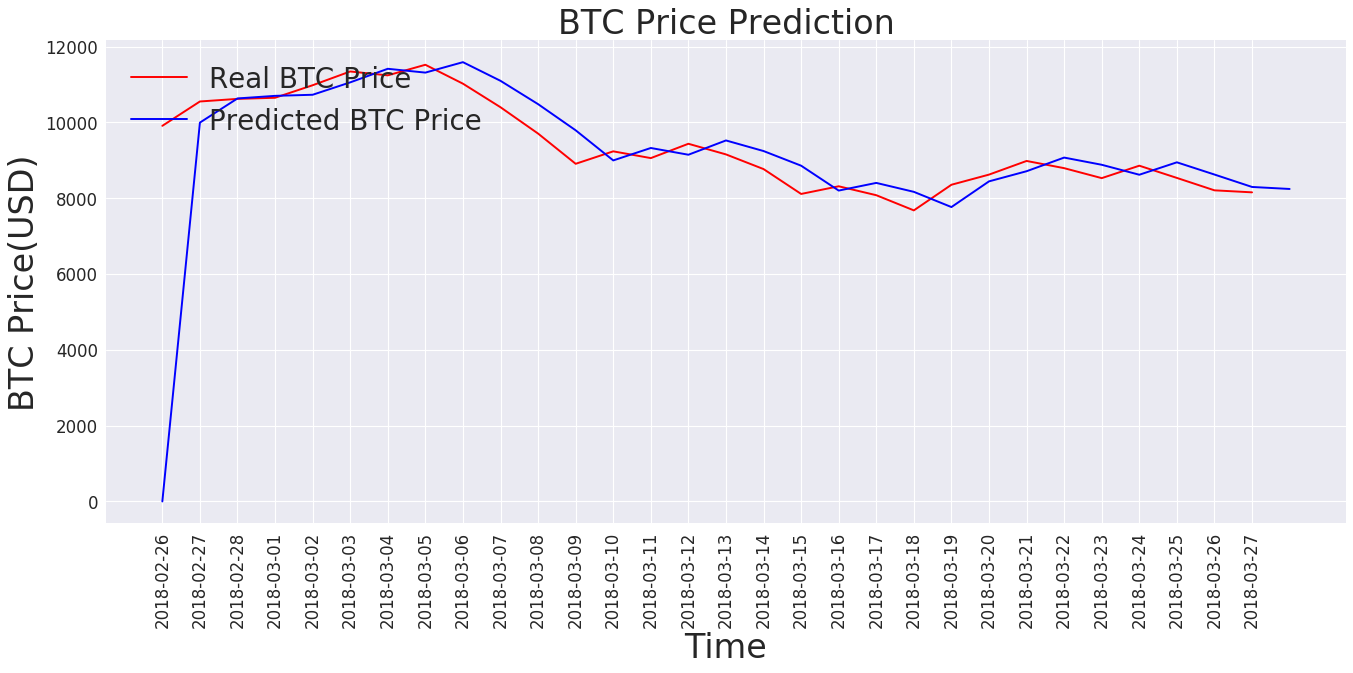

Test Score: 85.08 RMSE


In [223]:
#Remake predictions
df_test= Real_Price[len(Real_Price)-prediction_days:]
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor_v1.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Roll predictions to the right
predicted_BTC_price = np.reshape(predicted_BTC_price, len(predicted_BTC_price))
predicted_BTC_price = np.append(predicted_BTC_price, 0) #Add filler value for roll because otherwise our last prediction will be shifted to index 0. (See np.roll)
predicted_BTC_price = np.roll(predicted_BTC_price, 1) 


#Plot results
# Visualising the results
plt.figure(figsize=(20,8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot()
plt.plot(test_set, color ='red', label= 'Real BTC Price')
plt.plot(predicted_BTC_price, color='blue', label ='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=30)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
plt.xlabel('Time', fontsize=30)
plt.ylabel('BTC Price(USD)', fontsize=30)
plt.legend(loc=2, prop={'size': 25})
plt.show()

testScore = math.sqrt(mean_squared_error(test_set[1:], predicted_BTC_price[2:]))
print('Test Score: %.2f RMSE' % (testScore))

Introducing more complexity into the network does not seem to help.   
My next step is to include a window of x(3) days of input data.  
Based upon: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [174]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]


# Scale input data
df_train = np.reshape(df_train, (len(df_train), 1))
df_test = np.reshape(df_test, (len(df_test), 1))

scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)

# reshape into X=t and Y=t+1
look_back = 3 
trainX, trainY = create_dataset(df_train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# Create model
# Initialising the RNN
regressor_v2 = Sequential()

# Adding the input layer and the LSTM layer
regressor_v2.add(LSTM(units = 4, activation='sigmoid', input_shape=(1, look_back)))

# Adding the output layer
regressor_v2.add(Dense(units = 1))

# Compiling the RNN
regressor_v2.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor_v2.fit(trainX, trainY, batch_size=5, epochs=100)

/home/rick/miniconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Epoch 1/100


   5/2242 [..............................] - ETA: 9:35 - loss: 1.3784

 160/2242 [=>............................] - ETA: 17s - loss: 0.8687 

 315/2242 [===>..........................] - ETA: 8s - loss: 0.8003 

 465/2242 [=====>........................] - ETA: 5s - loss: 0.7709

 615/2242 [=======>......................] - ETA: 3s - loss: 0.7135

 760/2242 [=========>....................] - ETA: 3s - loss: 0.6642

 920/2242 [===========>..................] - ETA: 2s - loss: 0.6132

1080/2242 [=============>................] - ETA: 1s - loss: 0.5681

1240/2242 [===============>..............] - ETA: 1s - loss: 0.5251

1390/2242 [=================>............] - ETA: 1s - loss: 0.4902

1530/2242 [===================>..........] - ETA: 0s - loss: 0.4615

1670/2242 [=====================>........] - ETA: 0s - loss: 0.4360

1810/2242 [=======================>......] - ETA: 0s - loss: 0.4104

1960/2242 [=========================>....] - ETA: 0s - loss: 0.3867

2105/2242 [===========================>..] - ETA: 0s - loss: 0.3673

2242/2242 [==============================] - 2s 912us/step - loss: 0.3492


Epoch 2/100
   5/2242 [..............................] - ETA: 1s - loss: 0.0419

 125/2242 [>.............................] - ETA: 0s - loss: 0.0512

 270/2242 [==>...........................] - ETA: 0s - loss: 0.0567

 415/2242 [====>.........................] - ETA: 0s - loss: 0.0543

 550/2242 [======>.......................] - ETA: 0s - loss: 0.0463

 695/2242 [========>.....................] - ETA: 0s - loss: 0.0461

 840/2242 [==========>...................] - ETA: 0s - loss: 0.0424

 980/2242 [============>.................] - ETA: 0s - loss: 0.0414

1130/2242 [==============>...............] - ETA: 0s - loss: 0.0385

1280/2242 [================>.............] - ETA: 0s - loss: 0.0378

1430/2242 [==================>...........] - ETA: 0s - loss: 0.0360

1565/2242 [===================>..........] - ETA: 0s - loss: 0.0341

1710/2242 [=====================>........] - ETA: 0s - loss: 0.0324

1855/2242 [=======================>......] - ETA: 0s - loss: 0.0314

1990/2242 [=========================>....] - ETA: 0s - loss: 0.0302

2135/2242 [===========================>..] - ETA: 0s - loss: 0.0298

2242/2242 [==============================] - 1s 358us/step - loss: 0.0287


Epoch 3/100
   5/2242 [..............................] - ETA: 1s - loss: 0.0041

 135/2242 [>.............................] - ETA: 0s - loss: 0.0146

 265/2242 [==>...........................] - ETA: 0s - loss: 0.0139

 405/2242 [====>.........................] - ETA: 0s - loss: 0.0120

 550/2242 [======>.......................] - ETA: 0s - loss: 0.0141

 690/2242 [========>.....................] - ETA: 0s - loss: 0.0145

 840/2242 [==========>...................] - ETA: 0s - loss: 0.0132

 985/2242 [============>.................] - ETA: 0s - loss: 0.0132

1135/2242 [==============>...............] - ETA: 0s - loss: 0.0131

1270/2242 [===============>..............] - ETA: 0s - loss: 0.0134

1415/2242 [=================>............] - ETA: 0s - loss: 0.0149

1555/2242 [===================>..........] - ETA: 0s - loss: 0.0148

1705/2242 [=====================>........] - ETA: 0s - loss: 0.0146

1855/2242 [=======================>......] - ETA: 0s - loss: 0.0149

2000/2242 [=========================>....] - ETA: 0s - loss: 0.0150

2145/2242 [===========================>..] - ETA: 0s - loss: 0.0146

2242/2242 [==============================] - 1s 357us/step - loss: 0.0146


Epoch 4/100
   5/2242 [..............................] - ETA: 1s - loss: 0.0138

 125/2242 [>.............................] - ETA: 0s - loss: 0.0096

 255/2242 [==>...........................] - ETA: 0s - loss: 0.0169

 400/2242 [====>.........................] - ETA: 0s - loss: 0.0143

 545/2242 [======>.......................] - ETA: 0s - loss: 0.0129

 685/2242 [========>.....................] - ETA: 0s - loss: 0.0117

 835/2242 [==========>...................] - ETA: 0s - loss: 0.0122

 975/2242 [============>.................] - ETA: 0s - loss: 0.0127

1120/2242 [=============>................] - ETA: 0s - loss: 0.0125

1265/2242 [===============>..............] - ETA: 0s - loss: 0.0133

1410/2242 [=================>............] - ETA: 0s - loss: 0.0137

1555/2242 [===================>..........] - ETA: 0s - loss: 0.0139

1705/2242 [=====================>........] - ETA: 0s - loss: 0.0136

1850/2242 [=======================>......] - ETA: 0s - loss: 0.0130

1995/2242 [=========================>....] - ETA: 0s - loss: 0.0127

2130/2242 [===========================>..] - ETA: 0s - loss: 0.0124

2242/2242 [==============================] - 1s 359us/step - loss: 0.0127


Epoch 5/100
   5/2242 [..............................] - ETA: 0s - loss: 0.0223

 130/2242 [>.............................] - ETA: 0s - loss: 0.0065

 270/2242 [==>...........................] - ETA: 0s - loss: 0.0065

 415/2242 [====>.........................] - ETA: 0s - loss: 0.0073

 565/2242 [======>.......................] - ETA: 0s - loss: 0.0081

 710/2242 [========>.....................] - ETA: 0s - loss: 0.0081

 835/2242 [==========>...................] - ETA: 0s - loss: 0.0080

 980/2242 [============>.................] - ETA: 0s - loss: 0.0089

1125/2242 [==============>...............] - ETA: 0s - loss: 0.0103

1265/2242 [===============>..............] - ETA: 0s - loss: 0.0109

1420/2242 [==================>...........] - ETA: 0s - loss: 0.0107

1570/2242 [====================>.........] - ETA: 0s - loss: 0.0112

1720/2242 [======================>.......] - ETA: 0s - loss: 0.0108

1850/2242 [=======================>......] - ETA: 0s - loss: 0.0106

1995/2242 [=========================>....] - ETA: 0s - loss: 0.0106

2140/2242 [===========================>..] - ETA: 0s - loss: 0.0104

2242/2242 [==============================] - 1s 358us/step - loss: 0.0107


Epoch 6/100
   5/2242 [..............................] - ETA: 0s - loss: 7.4923e-04

 125/2242 [>.............................] - ETA: 0s - loss: 0.0075    

 270/2242 [==>...........................] - ETA: 0s - loss: 0.0089

 415/2242 [====>.........................] - ETA: 0s - loss: 0.0092

 550/2242 [======>.......................] - ETA: 0s - loss: 0.0094

 695/2242 [========>.....................] - ETA: 0s - loss: 0.0084

 840/2242 [==========>...................] - ETA: 0s - loss: 0.0092

 980/2242 [============>.................] - ETA: 0s - loss: 0.0101

1125/2242 [==============>...............] - ETA: 0s - loss: 0.0092

1270/2242 [===============>..............] - ETA: 0s - loss: 0.0098

1410/2242 [=================>............] - ETA: 0s - loss: 0.0096

1540/2242 [===================>..........] - ETA: 0s - loss: 0.0093

1685/2242 [=====================>........] - ETA: 0s - loss: 0.0093

1825/2242 [=======================>......] - ETA: 0s - loss: 0.0094

1980/2242 [=========================>....] - ETA: 0s - loss: 0.0088

2130/2242 [===========================>..] - ETA: 0s - loss: 0.0086

2242/2242 [==============================] - 1s 359us/step - loss: 0.0086


Epoch 7/100
   5/2242 [..............................] - ETA: 0s - loss: 0.0013

 135/2242 [>.............................] - ETA: 0s - loss: 0.0116

 265/2242 [==>...........................] - ETA: 0s - loss: 0.0072

 400/2242 [====>.........................] - ETA: 0s - loss: 0.0068

 540/2242 [======>.......................] - ETA: 0s - loss: 0.0065

 685/2242 [========>.....................] - ETA: 0s - loss: 0.0069

 830/2242 [==========>...................] - ETA: 0s - loss: 0.0069

 970/2242 [===========>..................] - ETA: 0s - loss: 0.0067

1110/2242 [=============>................] - ETA: 0s - loss: 0.0063

1255/2242 [===============>..............] - ETA: 0s - loss: 0.0068

1400/2242 [=================>............] - ETA: 0s - loss: 0.0064

1545/2242 [===================>..........] - ETA: 0s - loss: 0.0061

1690/2242 [=====================>........] - ETA: 0s - loss: 0.0061

1830/2242 [=======================>......] - ETA: 0s - loss: 0.0061

1965/2242 [=========================>....] - ETA: 0s - loss: 0.0062

2110/2242 [===========================>..] - ETA: 0s - loss: 0.0064

2242/2242 [==============================] - 1s 363us/step - loss: 0.0065


Epoch 8/100
   5/2242 [..............................] - ETA: 0s - loss: 0.0282

 130/2242 [>.............................] - ETA: 0s - loss: 0.0094

 265/2242 [==>...........................] - ETA: 0s - loss: 0.0083

 410/2242 [====>.........................] - ETA: 0s - loss: 0.0076

 555/2242 [======>.......................] - ETA: 0s - loss: 0.0072

 700/2242 [========>.....................] - ETA: 0s - loss: 0.0066

 845/2242 [==========>...................] - ETA: 0s - loss: 0.0062

 985/2242 [============>.................] - ETA: 0s - loss: 0.0060

1130/2242 [==============>...............] - ETA: 0s - loss: 0.0057

1275/2242 [================>.............] - ETA: 0s - loss: 0.0054

1415/2242 [=================>............] - ETA: 0s - loss: 0.0051

1560/2242 [===================>..........] - ETA: 0s - loss: 0.0049

1705/2242 [=====================>........] - ETA: 0s - loss: 0.0050

1850/2242 [=======================>......] - ETA: 0s - loss: 0.0050

1995/2242 [=========================>....] - ETA: 0s - loss: 0.0048

2140/2242 [===========================>..] - ETA: 0s - loss: 0.0047

2242/2242 [==============================] - 1s 357us/step - loss: 0.0046


Epoch 9/100
   5/2242 [..............................] - ETA: 1s - loss: 4.3488e-04

 125/2242 [>.............................] - ETA: 0s - loss: 0.0050    

 255/2242 [==>...........................] - ETA: 0s - loss: 0.0036

 385/2242 [====>.........................] - ETA: 0s - loss: 0.0042

 530/2242 [======>.......................] - ETA: 0s - loss: 0.0044

 675/2242 [========>.....................] - ETA: 0s - loss: 0.0042

 810/2242 [=========>....................] - ETA: 0s - loss: 0.0039

 950/2242 [===========>..................] - ETA: 0s - loss: 0.0038

1085/2242 [=============>................] - ETA: 0s - loss: 0.0037

1215/2242 [===============>..............] - ETA: 0s - loss: 0.0038

1360/2242 [=================>............] - ETA: 0s - loss: 0.0037

1505/2242 [===================>..........] - ETA: 0s - loss: 0.0039

1645/2242 [=====================>........] - ETA: 0s - loss: 0.0037

1765/2242 [======================>.......] - ETA: 0s - loss: 0.0036

1905/2242 [========================>.....] - ETA: 0s - loss: 0.0034

2050/2242 [==========================>...] - ETA: 0s - loss: 0.0034

2195/2242 [============================>.] - ETA: 0s - loss: 0.0032

2242/2242 [==============================] - 1s 372us/step - loss: 0.0032


Epoch 10/100
   5/2242 [..............................] - ETA: 0s - loss: 1.0710e-04

 135/2242 [>.............................] - ETA: 0s - loss: 0.0050    

 280/2242 [==>...........................] - ETA: 0s - loss: 0.0038

 420/2242 [====>.........................] - ETA: 0s - loss: 0.0034

 555/2242 [======>.......................] - ETA: 0s - loss: 0.0030

 690/2242 [========>.....................] - ETA: 0s - loss: 0.0032

 830/2242 [==========>...................] - ETA: 0s - loss: 0.0029

 975/2242 [============>.................] - ETA: 0s - loss: 0.0026

1115/2242 [=============>................] - ETA: 0s - loss: 0.0027

1265/2242 [===============>..............] - ETA: 0s - loss: 0.0025

1405/2242 [=================>............] - ETA: 0s - loss: 0.0024

1550/2242 [===================>..........] - ETA: 0s - loss: 0.0023

1690/2242 [=====================>........] - ETA: 0s - loss: 0.0022

1835/2242 [=======================>......] - ETA: 0s - loss: 0.0022

1975/2242 [=========================>....] - ETA: 0s - loss: 0.0021

2125/2242 [===========================>..] - ETA: 0s - loss: 0.0023

2242/2242 [==============================] - 1s 362us/step - loss: 0.0023


Epoch 11/100
   5/2242 [..............................] - ETA: 0s - loss: 1.3621e-04

 120/2242 [>.............................] - ETA: 0s - loss: 0.0019    

 250/2242 [==>...........................] - ETA: 0s - loss: 0.0011

 400/2242 [====>.........................] - ETA: 0s - loss: 0.0016

 545/2242 [======>.......................] - ETA: 0s - loss: 0.0019

 690/2242 [========>.....................] - ETA: 0s - loss: 0.0017

 830/2242 [==========>...................] - ETA: 0s - loss: 0.0021

 980/2242 [============>.................] - ETA: 0s - loss: 0.0020

1125/2242 [==============>...............] - ETA: 0s - loss: 0.0019

1250/2242 [===============>..............] - ETA: 0s - loss: 0.0019

1395/2242 [=================>............] - ETA: 0s - loss: 0.0018

1540/2242 [===================>..........] - ETA: 0s - loss: 0.0018

1685/2242 [=====================>........] - ETA: 0s - loss: 0.0017

1835/2242 [=======================>......] - ETA: 0s - loss: 0.0018

1985/2242 [=========================>....] - ETA: 0s - loss: 0.0017

2125/2242 [===========================>..] - ETA: 0s - loss: 0.0016

2242/2242 [==============================] - 1s 361us/step - loss: 0.0016


Epoch 12/100


   5/2242 [..............................] - ETA: 0s - loss: 1.5050e-05

 125/2242 [>.............................] - ETA: 0s - loss: 0.0013    

 250/2242 [==>...........................] - ETA: 0s - loss: 0.0014

 395/2242 [====>.........................] - ETA: 0s - loss: 0.0018

 540/2242 [======>.......................] - ETA: 0s - loss: 0.0014

 675/2242 [========>.....................] - ETA: 0s - loss: 0.0018

 825/2242 [==========>...................] - ETA: 0s - loss: 0.0015

 960/2242 [===========>..................] - ETA: 0s - loss: 0.0014

1105/2242 [=============>................] - ETA: 0s - loss: 0.0012

1245/2242 [===============>..............] - ETA: 0s - loss: 0.0012

1390/2242 [=================>............] - ETA: 0s - loss: 0.0011

1540/2242 [===================>..........] - ETA: 0s - loss: 0.0011

1680/2242 [=====================>........] - ETA: 0s - loss: 0.0011

1825/2242 [=======================>......] - ETA: 0s - loss: 0.0011

1955/2242 [=========================>....] - ETA: 0s - loss: 0.0011

2095/2242 [===========================>..] - ETA: 0s - loss: 0.0011

2242/2242 [==============================] - 1s 365us/step - loss: 0.0011


Epoch 13/100
   5/2242 [..............................] - ETA: 0s - loss: 1.7165e-05

 115/2242 [>.............................] - ETA: 0s - loss: 2.3317e-04

 250/2242 [==>...........................] - ETA: 0s - loss: 3.4602e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 4.7511e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 4.8947e-04

 665/2242 [=======>......................] - ETA: 0s - loss: 6.0263e-04

 810/2242 [=========>....................] - ETA: 0s - loss: 8.9579e-04

 955/2242 [===========>..................] - ETA: 0s - loss: 8.4850e-04

1100/2242 [=============>................] - ETA: 0s - loss: 7.8529e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 7.9996e-04

1390/2242 [=================>............] - ETA: 0s - loss: 7.2482e-04

1540/2242 [===================>..........] - ETA: 0s - loss: 7.6214e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 7.7192e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 7.3804e-04

1960/2242 [=========================>....] - ETA: 0s - loss: 7.2831e-04

2100/2242 [===========================>..] - ETA: 0s - loss: 7.4303e-04

2235/2242 [============================>.] - ETA: 0s - loss: 7.9761e-04

2242/2242 [==============================] - 1s 365us/step - loss: 7.9513e-04


Epoch 14/100
   5/2242 [..............................] - ETA: 0s - loss: 7.9475e-06

 135/2242 [>.............................] - ETA: 0s - loss: 5.1209e-04

 270/2242 [==>...........................] - ETA: 0s - loss: 3.6198e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 6.6767e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 6.9237e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 8.0758e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 7.9117e-04

 980/2242 [============>.................] - ETA: 0s - loss: 7.7415e-04

1125/2242 [==============>...............] - ETA: 0s - loss: 7.2040e-04

1270/2242 [===============>..............] - ETA: 0s - loss: 7.5698e-04

1400/2242 [=================>............] - ETA: 0s - loss: 7.1278e-04

1545/2242 [===================>..........] - ETA: 0s - loss: 6.8260e-04

1685/2242 [=====================>........] - ETA: 0s - loss: 6.4909e-04

1830/2242 [=======================>......] - ETA: 0s - loss: 6.3189e-04

1980/2242 [=========================>....] - ETA: 0s - loss: 5.9772e-04

2125/2242 [===========================>..] - ETA: 0s - loss: 6.2129e-04

2242/2242 [==============================] - 1s 361us/step - loss: 6.1546e-04


Epoch 15/100
   5/2242 [..............................] - ETA: 0s - loss: 6.2759e-06

 125/2242 [>.............................] - ETA: 0s - loss: 0.0011    

 260/2242 [==>...........................] - ETA: 0s - loss: 5.2913e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 3.7047e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 3.5751e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 4.3437e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 4.4184e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 4.1519e-04

1095/2242 [=============>................] - ETA: 0s - loss: 4.2171e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 4.8755e-04

1380/2242 [=================>............] - ETA: 0s - loss: 5.6173e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 5.5349e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 5.2919e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 4.9874e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 5.3243e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 5.2859e-04

2225/2242 [============================>.] - ETA: 0s - loss: 5.0151e-04

2242/2242 [==============================] - 1s 369us/step - loss: 4.9813e-04


Epoch 16/100
   5/2242 [..............................] - ETA: 0s - loss: 5.3190e-04

 130/2242 [>.............................] - ETA: 0s - loss: 7.1111e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 4.4111e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 3.9655e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 3.2458e-04

 700/2242 [========>.....................] - ETA: 0s - loss: 3.5449e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 4.0770e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 4.1167e-04

1110/2242 [=============>................] - ETA: 0s - loss: 3.8221e-04

1255/2242 [===============>..............] - ETA: 0s - loss: 4.1747e-04

1395/2242 [=================>............] - ETA: 0s - loss: 4.7193e-04

1545/2242 [===================>..........] - ETA: 0s - loss: 4.4113e-04

1685/2242 [=====================>........] - ETA: 0s - loss: 4.8249e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 4.6784e-04

1960/2242 [=========================>....] - ETA: 0s - loss: 4.5260e-04

2100/2242 [===========================>..] - ETA: 0s - loss: 4.2519e-04

2240/2242 [============================>.] - ETA: 0s - loss: 4.0585e-04

2242/2242 [==============================] - 1s 367us/step - loss: 4.0549e-04


Epoch 17/100
   5/2242 [..............................] - ETA: 1s - loss: 0.0042

 145/2242 [>.............................] - ETA: 0s - loss: 6.8998e-04

 275/2242 [==>...........................] - ETA: 0s - loss: 5.8880e-04

 415/2242 [====>.........................] - ETA: 0s - loss: 6.0989e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 5.1425e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 4.2893e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 4.5572e-04

 975/2242 [============>.................] - ETA: 0s - loss: 4.0826e-04

1120/2242 [=============>................] - ETA: 0s - loss: 4.4631e-04

1270/2242 [===============>..............] - ETA: 0s - loss: 3.9878e-04

1405/2242 [=================>............] - ETA: 0s - loss: 3.6797e-04

1535/2242 [===================>..........] - ETA: 0s - loss: 4.0304e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 3.9652e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 3.7003e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 3.5057e-04

2100/2242 [===========================>..] - ETA: 0s - loss: 3.3910e-04

2242/2242 [==============================] - 1s 364us/step - loss: 3.3467e-04


Epoch 18/100
   5/2242 [..............................] - ETA: 1s - loss: 1.1968e-04

 125/2242 [>.............................] - ETA: 0s - loss: 8.7538e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 1.3714e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 2.9750e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 2.9079e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 3.1882e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 3.4408e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 3.0261e-04

1115/2242 [=============>................] - ETA: 0s - loss: 3.1596e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 3.2659e-04

1395/2242 [=================>............] - ETA: 0s - loss: 3.0433e-04

1540/2242 [===================>..........] - ETA: 0s - loss: 2.8502e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 2.9186e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 3.0210e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 2.8456e-04

2095/2242 [===========================>..] - ETA: 0s - loss: 2.8818e-04

2225/2242 [============================>.] - ETA: 0s - loss: 2.7447e-04

2242/2242 [==============================] - 1s 371us/step - loss: 2.8054e-04


Epoch 19/100
   5/2242 [..............................] - ETA: 0s - loss: 2.2419e-06

 130/2242 [>.............................] - ETA: 0s - loss: 1.0384e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 2.7432e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 3.6285e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 4.9723e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 4.2859e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 3.9537e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 3.5581e-04

1105/2242 [=============>................] - ETA: 0s - loss: 3.1772e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 3.1772e-04

1370/2242 [=================>............] - ETA: 0s - loss: 3.1014e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 2.9726e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 2.8413e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 2.6326e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 2.5683e-04

2070/2242 [==========================>...] - ETA: 0s - loss: 2.4550e-04

2210/2242 [============================>.] - ETA: 0s - loss: 2.3363e-04

2242/2242 [==============================] - 1s 371us/step - loss: 2.3819e-04


Epoch 20/100
   5/2242 [..............................] - ETA: 0s - loss: 1.2966e-06

 115/2242 [>.............................] - ETA: 0s - loss: 2.6395e-04

 250/2242 [==>...........................] - ETA: 0s - loss: 1.3349e-04

 360/2242 [===>..........................] - ETA: 0s - loss: 1.2295e-04

 495/2242 [=====>........................] - ETA: 0s - loss: 1.1042e-04

 640/2242 [=======>......................] - ETA: 0s - loss: 1.8603e-04

 780/2242 [=========>....................] - ETA: 0s - loss: 1.5861e-04

 925/2242 [===========>..................] - ETA: 0s - loss: 2.3933e-04

1060/2242 [=============>................] - ETA: 0s - loss: 2.1529e-04

1200/2242 [===============>..............] - ETA: 0s - loss: 2.0243e-04

1340/2242 [================>.............] - ETA: 0s - loss: 2.1696e-04

1485/2242 [==================>...........] - ETA: 0s - loss: 2.2080e-04

1620/2242 [====================>.........] - ETA: 0s - loss: 2.0946e-04

1760/2242 [======================>.......] - ETA: 0s - loss: 2.1241e-04

1895/2242 [========================>.....] - ETA: 0s - loss: 2.1216e-04

2045/2242 [==========================>...] - ETA: 0s - loss: 2.0903e-04

2195/2242 [============================>.] - ETA: 0s - loss: 2.1432e-04

2242/2242 [==============================] - 1s 373us/step - loss: 2.1330e-04


Epoch 21/100
   5/2242 [..............................] - ETA: 1s - loss: 1.9565e-06

 130/2242 [>.............................] - ETA: 0s - loss: 6.8233e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 3.7937e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 2.6223e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 2.3183e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.9031e-04

 800/2242 [=========>....................] - ETA: 0s - loss: 1.9520e-04

 940/2242 [===========>..................] - ETA: 0s - loss: 1.7554e-04

1085/2242 [=============>................] - ETA: 0s - loss: 1.8452e-04

1220/2242 [===============>..............] - ETA: 0s - loss: 1.8291e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.9765e-04

1510/2242 [===================>..........] - ETA: 0s - loss: 1.9912e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.8699e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.9874e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.9293e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.8660e-04

2225/2242 [============================>.] - ETA: 0s - loss: 1.8984e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.8860e-04


Epoch 22/100
   5/2242 [..............................] - ETA: 1s - loss: 2.0343e-06

 125/2242 [>.............................] - ETA: 0s - loss: 8.3212e-05

 245/2242 [==>...........................] - ETA: 0s - loss: 8.4909e-05

 380/2242 [====>.........................] - ETA: 0s - loss: 1.9322e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 1.7856e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.5867e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.4536e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 2.0672e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.9567e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.7713e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.8877e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 2.2216e-04

1675/2242 [=====================>........] - ETA: 0s - loss: 2.0819e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 2.0681e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.9640e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 1.8567e-04

2225/2242 [============================>.] - ETA: 0s - loss: 1.7684e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.7607e-04


Epoch 23/100
   5/2242 [..............................] - ETA: 1s - loss: 1.3027e-05

 135/2242 [>.............................] - ETA: 0s - loss: 1.1317e-04

 275/2242 [==>...........................] - ETA: 0s - loss: 7.9774e-05

 420/2242 [====>.........................] - ETA: 0s - loss: 8.8420e-05

 560/2242 [======>.......................] - ETA: 0s - loss: 1.3281e-04

 695/2242 [========>.....................] - ETA: 0s - loss: 2.0397e-04

 840/2242 [==========>...................] - ETA: 0s - loss: 1.9075e-04

 985/2242 [============>.................] - ETA: 0s - loss: 1.9190e-04

1130/2242 [==============>...............] - ETA: 0s - loss: 1.7481e-04

1280/2242 [================>.............] - ETA: 0s - loss: 1.7305e-04

1415/2242 [=================>............] - ETA: 0s - loss: 1.6669e-04

1545/2242 [===================>..........] - ETA: 0s - loss: 1.5819e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 1.6626e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.5531e-04

1950/2242 [=========================>....] - ETA: 0s - loss: 1.4589e-04

2100/2242 [===========================>..] - ETA: 0s - loss: 1.6296e-04

2242/2242 [==============================] - 1s 364us/step - loss: 1.6576e-04


Epoch 24/100
   5/2242 [..............................] - ETA: 0s - loss: 2.6080e-06

 130/2242 [>.............................] - ETA: 0s - loss: 7.4578e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 8.4285e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 1.0264e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 1.6592e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.7845e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.5724e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.4582e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.3544e-04

1255/2242 [===============>..............] - ETA: 0s - loss: 1.2753e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.6654e-04

1535/2242 [===================>..........] - ETA: 0s - loss: 1.5671e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.6511e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 1.5503e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.5660e-04

2095/2242 [===========================>..] - ETA: 0s - loss: 1.5406e-04

2235/2242 [============================>.] - ETA: 0s - loss: 1.5669e-04

2242/2242 [==============================] - 1s 367us/step - loss: 1.5622e-04


Epoch 25/100
   5/2242 [..............................] - ETA: 1s - loss: 1.3748e-06

 125/2242 [>.............................] - ETA: 0s - loss: 1.4079e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.6079e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 1.2177e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.0051e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.1601e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 9.8512e-05

 965/2242 [===========>..................] - ETA: 0s - loss: 1.2136e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.3676e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.3167e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.3212e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 1.2921e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.4295e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.4523e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.5729e-04

2070/2242 [==========================>...] - ETA: 0s - loss: 1.5219e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.4782e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.5091e-04


Epoch 26/100
   5/2242 [..............................] - ETA: 0s - loss: 1.2213e-05

 120/2242 [>.............................] - ETA: 0s - loss: 1.2001e-04

 250/2242 [==>...........................] - ETA: 0s - loss: 9.4467e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 1.4395e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.5888e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.4285e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.6486e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 1.4874e-04

1090/2242 [=============>................] - ETA: 0s - loss: 1.5141e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.3681e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.2439e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.2056e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 1.1811e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.5512e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.5132e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 1.4716e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.4131e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.4512e-04


Epoch 27/100
   5/2242 [..............................] - ETA: 1s - loss: 8.2048e-07

 145/2242 [>.............................] - ETA: 0s - loss: 7.9024e-05

 280/2242 [==>...........................] - ETA: 0s - loss: 1.5647e-04

 415/2242 [====>.........................] - ETA: 0s - loss: 1.3326e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.4927e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.3788e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.3987e-04

 955/2242 [===========>..................] - ETA: 0s - loss: 1.2527e-04

1090/2242 [=============>................] - ETA: 0s - loss: 1.2952e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.4829e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.3846e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.4829e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.5139e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.4893e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.5674e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.4992e-04

2235/2242 [============================>.] - ETA: 0s - loss: 1.4531e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.4486e-04


Epoch 28/100
   5/2242 [..............................] - ETA: 0s - loss: 4.2074e-05

 130/2242 [>.............................] - ETA: 0s - loss: 3.7574e-05

 255/2242 [==>...........................] - ETA: 0s - loss: 7.6768e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 1.0838e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 9.9804e-05

 685/2242 [========>.....................] - ETA: 0s - loss: 1.0553e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.0965e-04

 975/2242 [============>.................] - ETA: 0s - loss: 1.1788e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.2377e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.1921e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.1856e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.4823e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 1.3993e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.3140e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.3169e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.4478e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.3906e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.3843e-04


Epoch 29/100
   5/2242 [..............................] - ETA: 1s - loss: 6.0812e-06

 130/2242 [>.............................] - ETA: 0s - loss: 2.1305e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 2.4663e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 1.6447e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.6700e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.4603e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.3549e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.2370e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.2521e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.1646e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.2974e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.1880e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.3938e-04

1785/2242 [======================>.......] - ETA: 0s - loss: 1.4860e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 1.5321e-04

2060/2242 [==========================>...] - ETA: 0s - loss: 1.4444e-04

2210/2242 [============================>.] - ETA: 0s - loss: 1.3810e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.3663e-04


Epoch 30/100
   5/2242 [..............................] - ETA: 0s - loss: 0.0021

 135/2242 [>.............................] - ETA: 0s - loss: 1.8706e-04

 275/2242 [==>...........................] - ETA: 0s - loss: 1.7920e-04

 420/2242 [====>.........................] - ETA: 0s - loss: 2.1483e-04

 555/2242 [======>.......................] - ETA: 0s - loss: 1.7943e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 1.7820e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.6886e-04

 970/2242 [===========>..................] - ETA: 0s - loss: 1.5185e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.3706e-04

1255/2242 [===============>..............] - ETA: 0s - loss: 1.3680e-04

1400/2242 [=================>............] - ETA: 0s - loss: 1.3628e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.3039e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 1.4091e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.3421e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.3007e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.3303e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.3146e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.3339e-04


Epoch 31/100
   5/2242 [..............................] - ETA: 0s - loss: 2.9138e-04

 130/2242 [>.............................] - ETA: 0s - loss: 2.1691e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.5473e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 1.5192e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.5294e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 1.3895e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 1.2190e-04

 980/2242 [============>.................] - ETA: 0s - loss: 1.1967e-04

1120/2242 [=============>................] - ETA: 0s - loss: 1.1044e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.1502e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.0715e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.0223e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 9.8808e-05

1815/2242 [=======================>......] - ETA: 0s - loss: 1.1491e-04

1960/2242 [=========================>....] - ETA: 0s - loss: 1.1854e-04

2105/2242 [===========================>..] - ETA: 0s - loss: 1.1834e-04

2240/2242 [============================>.] - ETA: 0s - loss: 1.3536e-04

2242/2242 [==============================] - 1s 365us/step - loss: 1.3524e-04


Epoch 32/100
   5/2242 [..............................] - ETA: 1s - loss: 4.5622e-05

 145/2242 [>.............................] - ETA: 0s - loss: 2.1019e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 1.6596e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 1.7464e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.8632e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.7200e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.7380e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.5461e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.3653e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.5062e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.4302e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.4174e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.3556e-04

1825/2242 [=======================>......] - ETA: 0s - loss: 1.3925e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.3580e-04

2095/2242 [===========================>..] - ETA: 0s - loss: 1.3570e-04

2240/2242 [============================>.] - ETA: 0s - loss: 1.3436e-04

2242/2242 [==============================] - 1s 367us/step - loss: 1.3425e-04


Epoch 33/100
   5/2242 [..............................] - ETA: 1s - loss: 1.9156e-06

 140/2242 [>.............................] - ETA: 0s - loss: 1.8113e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 1.4158e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 1.1006e-04

 555/2242 [======>.......................] - ETA: 0s - loss: 8.5856e-05

 675/2242 [========>.....................] - ETA: 0s - loss: 9.1535e-05

 805/2242 [=========>....................] - ETA: 0s - loss: 8.8939e-05

 950/2242 [===========>..................] - ETA: 0s - loss: 9.4249e-05

1095/2242 [=============>................] - ETA: 0s - loss: 8.9571e-05

1235/2242 [===============>..............] - ETA: 0s - loss: 1.0326e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.0025e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.0478e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.0518e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.0345e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.1421e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.2951e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.3315e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.3187e-04


Epoch 34/100
   5/2242 [..............................] - ETA: 0s - loss: 3.9780e-08

 135/2242 [>.............................] - ETA: 0s - loss: 1.4897e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 8.9759e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 1.0285e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 9.3880e-05

 685/2242 [========>.....................] - ETA: 0s - loss: 1.0471e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 9.2347e-05

 975/2242 [============>.................] - ETA: 0s - loss: 8.8709e-05

1110/2242 [=============>................] - ETA: 0s - loss: 9.2355e-05

1245/2242 [===============>..............] - ETA: 0s - loss: 1.0164e-04

1370/2242 [=================>............] - ETA: 0s - loss: 9.9087e-05

1510/2242 [===================>..........] - ETA: 0s - loss: 1.1231e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.0948e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.1258e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.2174e-04

2095/2242 [===========================>..] - ETA: 0s - loss: 1.3904e-04

2240/2242 [============================>.] - ETA: 0s - loss: 1.3206e-04

2242/2242 [==============================] - 1s 365us/step - loss: 1.3195e-04


Epoch 35/100
   5/2242 [..............................] - ETA: 1s - loss: 2.3880e-06

 135/2242 [>.............................] - ETA: 0s - loss: 4.8763e-05

 260/2242 [==>...........................] - ETA: 0s - loss: 3.6125e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 9.0211e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 8.3402e-05

 695/2242 [========>.....................] - ETA: 0s - loss: 1.3902e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 1.4157e-04

 985/2242 [============>.................] - ETA: 0s - loss: 1.2843e-04

1115/2242 [=============>................] - ETA: 0s - loss: 1.3407e-04

1260/2242 [===============>..............] - ETA: 0s - loss: 1.2320e-04

1400/2242 [=================>............] - ETA: 0s - loss: 1.2225e-04

1540/2242 [===================>..........] - ETA: 0s - loss: 1.2465e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.3086e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.3238e-04

1960/2242 [=========================>....] - ETA: 0s - loss: 1.2875e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.2524e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.3077e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.3008e-04


Epoch 36/100
   5/2242 [..............................] - ETA: 1s - loss: 2.9320e-06

 140/2242 [>.............................] - ETA: 0s - loss: 1.6584e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 1.9983e-04

 405/2242 [====>.........................] - ETA: 0s - loss: 2.0077e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 2.0201e-04

 695/2242 [========>.....................] - ETA: 0s - loss: 1.7010e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.6352e-04

 970/2242 [===========>..................] - ETA: 0s - loss: 1.5505e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.4407e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.3864e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.3102e-04

1535/2242 [===================>..........] - ETA: 0s - loss: 1.3238e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.4230e-04

1810/2242 [=======================>......] - ETA: 0s - loss: 1.3682e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.2992e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.3189e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2945e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.2910e-04


Epoch 37/100
   5/2242 [..............................] - ETA: 0s - loss: 5.5295e-04

 135/2242 [>.............................] - ETA: 0s - loss: 8.2923e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 7.3053e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 6.1629e-05

 545/2242 [======>.......................] - ETA: 0s - loss: 1.2023e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 1.4444e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 1.2902e-04

 980/2242 [============>.................] - ETA: 0s - loss: 1.2243e-04

1125/2242 [==============>...............] - ETA: 0s - loss: 1.2367e-04

1265/2242 [===============>..............] - ETA: 0s - loss: 1.2271e-04

1405/2242 [=================>............] - ETA: 0s - loss: 1.1901e-04

1545/2242 [===================>..........] - ETA: 0s - loss: 1.3100e-04

1685/2242 [=====================>........] - ETA: 0s - loss: 1.2849e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 1.2798e-04

1970/2242 [=========================>....] - ETA: 0s - loss: 1.2285e-04

2110/2242 [===========================>..] - ETA: 0s - loss: 1.2990e-04

2242/2242 [==============================] - 1s 365us/step - loss: 1.2990e-04


Epoch 38/100
   5/2242 [..............................] - ETA: 0s - loss: 4.7882e-06

 130/2242 [>.............................] - ETA: 0s - loss: 6.5677e-05

 260/2242 [==>...........................] - ETA: 0s - loss: 6.9287e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 1.4428e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 1.1902e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.0489e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.1743e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.1460e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.2162e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.1873e-04

1395/2242 [=================>............] - ETA: 0s - loss: 1.1166e-04

1540/2242 [===================>..........] - ETA: 0s - loss: 1.0693e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.0345e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 1.0085e-04

1965/2242 [=========================>....] - ETA: 0s - loss: 1.2821e-04

2110/2242 [===========================>..] - ETA: 0s - loss: 1.2834e-04

2242/2242 [==============================] - 1s 364us/step - loss: 1.2642e-04


Epoch 39/100
   5/2242 [..............................] - ETA: 0s - loss: 1.8127e-05

 120/2242 [>.............................] - ETA: 0s - loss: 4.6668e-05

 255/2242 [==>...........................] - ETA: 0s - loss: 1.2639e-04

 395/2242 [====>.........................] - ETA: 0s - loss: 1.8052e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.5231e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.4302e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.3275e-04

 945/2242 [===========>..................] - ETA: 0s - loss: 1.2260e-04

1085/2242 [=============>................] - ETA: 0s - loss: 1.4334e-04

1230/2242 [===============>..............] - ETA: 0s - loss: 1.3686e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.3549e-04

1500/2242 [===================>..........] - ETA: 0s - loss: 1.2887e-04

1645/2242 [=====================>........] - ETA: 0s - loss: 1.2068e-04

1790/2242 [======================>.......] - ETA: 0s - loss: 1.2703e-04

1920/2242 [========================>.....] - ETA: 0s - loss: 1.2227e-04

2060/2242 [==========================>...] - ETA: 0s - loss: 1.2204e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.2939e-04

2242/2242 [==============================] - 1s 373us/step - loss: 1.2810e-04


Epoch 40/100
   5/2242 [..............................] - ETA: 0s - loss: 2.7961e-06

 120/2242 [>.............................] - ETA: 0s - loss: 1.6685e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 1.4619e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 1.1734e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.4427e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.6996e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.5673e-04

 970/2242 [===========>..................] - ETA: 0s - loss: 1.4546e-04

1115/2242 [=============>................] - ETA: 0s - loss: 1.2983e-04

1260/2242 [===============>..............] - ETA: 0s - loss: 1.2121e-04

1395/2242 [=================>............] - ETA: 0s - loss: 1.1279e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.1589e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.2431e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.1803e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.2472e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.2525e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2808e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.2747e-04


Epoch 41/100
   5/2242 [..............................] - ETA: 0s - loss: 1.8248e-05

 130/2242 [>.............................] - ETA: 0s - loss: 1.3164e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 9.5488e-05

 390/2242 [====>.........................] - ETA: 0s - loss: 1.0216e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 9.5161e-05

 675/2242 [========>.....................] - ETA: 0s - loss: 9.6961e-05

 820/2242 [=========>....................] - ETA: 0s - loss: 9.6537e-05

 960/2242 [===========>..................] - ETA: 0s - loss: 1.0793e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.0901e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.2739e-04

1375/2242 [=================>............] - ETA: 0s - loss: 1.3294e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.2448e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.3520e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.3822e-04

1935/2242 [========================>.....] - ETA: 0s - loss: 1.3693e-04

2070/2242 [==========================>...] - ETA: 0s - loss: 1.2957e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.2566e-04

2242/2242 [==============================] - 1s 374us/step - loss: 1.2571e-04


Epoch 42/100
   5/2242 [..............................] - ETA: 1s - loss: 7.0425e-07

 120/2242 [>.............................] - ETA: 0s - loss: 1.0624e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 8.7071e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 8.3958e-05

 545/2242 [======>.......................] - ETA: 0s - loss: 8.3256e-05

 690/2242 [========>.....................] - ETA: 0s - loss: 1.1224e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.1441e-04

 955/2242 [===========>..................] - ETA: 0s - loss: 1.0257e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.1254e-04

1230/2242 [===============>..............] - ETA: 0s - loss: 1.0813e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.0728e-04

1510/2242 [===================>..........] - ETA: 0s - loss: 1.0619e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.1717e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.2147e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.1613e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.1408e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.1744e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.2567e-04


Epoch 43/100
   5/2242 [..............................] - ETA: 0s - loss: 2.0673e-06

 120/2242 [>.............................] - ETA: 0s - loss: 9.5003e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 8.7339e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 9.9011e-05

 535/2242 [======>.......................] - ETA: 0s - loss: 9.3754e-05

 670/2242 [=======>......................] - ETA: 0s - loss: 1.1999e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.0709e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.2508e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.1765e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.2304e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.2942e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.3026e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.2826e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.2733e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.2222e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.2570e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2816e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.2789e-04


Epoch 44/100
   5/2242 [..............................] - ETA: 0s - loss: 2.6084e-06

 140/2242 [>.............................] - ETA: 0s - loss: 7.5027e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 9.3993e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 1.9034e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 1.6598e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.3920e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.5511e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 1.3987e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.2568e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.2278e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.2082e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.2493e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.2765e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.2023e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.2009e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.2874e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2471e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.2405e-04


Epoch 45/100
   5/2242 [..............................] - ETA: 1s - loss: 2.8335e-07

 130/2242 [>.............................] - ETA: 0s - loss: 5.1382e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 6.2684e-05

 410/2242 [====>.........................] - ETA: 0s - loss: 5.1483e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 9.9001e-05

 695/2242 [========>.....................] - ETA: 0s - loss: 8.7651e-05

 835/2242 [==========>...................] - ETA: 0s - loss: 7.9025e-05

 965/2242 [===========>..................] - ETA: 0s - loss: 7.8589e-05

1090/2242 [=============>................] - ETA: 0s - loss: 7.3400e-05

1235/2242 [===============>..............] - ETA: 0s - loss: 7.2434e-05

1375/2242 [=================>............] - ETA: 0s - loss: 7.8657e-05

1520/2242 [===================>..........] - ETA: 0s - loss: 9.5764e-05

1665/2242 [=====================>........] - ETA: 0s - loss: 1.0772e-04

1810/2242 [=======================>......] - ETA: 0s - loss: 1.2924e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.3329e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.2914e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.2660e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.2523e-04


Epoch 46/100
   5/2242 [..............................] - ETA: 0s - loss: 1.1461e-06

 140/2242 [>.............................] - ETA: 0s - loss: 6.3721e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.0523e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 9.0561e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 8.3596e-05

 690/2242 [========>.....................] - ETA: 0s - loss: 8.3896e-05

 830/2242 [==========>...................] - ETA: 0s - loss: 1.1750e-04

 975/2242 [============>.................] - ETA: 0s - loss: 1.1578e-04

1120/2242 [=============>................] - ETA: 0s - loss: 1.1688e-04

1260/2242 [===============>..............] - ETA: 0s - loss: 1.2781e-04

1400/2242 [=================>............] - ETA: 0s - loss: 1.3083e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.2442e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.2170e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.1827e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 1.2329e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.2889e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.2606e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.2465e-04


Epoch 47/100
   5/2242 [..............................] - ETA: 0s - loss: 6.0446e-05

 125/2242 [>.............................] - ETA: 0s - loss: 6.4444e-05

 260/2242 [==>...........................] - ETA: 0s - loss: 8.4266e-05

 385/2242 [====>.........................] - ETA: 0s - loss: 9.9270e-05

 520/2242 [=====>........................] - ETA: 0s - loss: 1.0026e-04

 660/2242 [=======>......................] - ETA: 0s - loss: 8.8866e-05

 805/2242 [=========>....................] - ETA: 0s - loss: 9.3948e-05

 950/2242 [===========>..................] - ETA: 0s - loss: 8.9861e-05

1095/2242 [=============>................] - ETA: 0s - loss: 9.8866e-05

1240/2242 [===============>..............] - ETA: 0s - loss: 1.0714e-04

1370/2242 [=================>............] - ETA: 0s - loss: 1.0440e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 1.1606e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.1504e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.3002e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 1.2708e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.2998e-04

2210/2242 [============================>.] - ETA: 0s - loss: 1.2525e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.2354e-04


Epoch 48/100
   5/2242 [..............................] - ETA: 0s - loss: 1.1817e-05

 125/2242 [>.............................] - ETA: 0s - loss: 3.3135e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 7.7274e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 1.3589e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 1.2560e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.1951e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.1971e-04

 970/2242 [===========>..................] - ETA: 0s - loss: 1.3180e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.1823e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.0855e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.1947e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.1155e-04

1670/2242 [=====================>........] - ETA: 0s - loss: 1.3207e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.3040e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.3066e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 1.2470e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.2499e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.2448e-04


Epoch 49/100
   5/2242 [..............................] - ETA: 1s - loss: 1.1641e-05

 125/2242 [>.............................] - ETA: 0s - loss: 2.2739e-04

 230/2242 [==>...........................] - ETA: 0s - loss: 1.9480e-04

 370/2242 [===>..........................] - ETA: 0s - loss: 1.8859e-04

 510/2242 [=====>........................] - ETA: 0s - loss: 1.5644e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.4869e-04

 790/2242 [=========>....................] - ETA: 0s - loss: 1.3363e-04

 935/2242 [===========>..................] - ETA: 0s - loss: 1.1455e-04

1075/2242 [=============>................] - ETA: 0s - loss: 1.0730e-04

1220/2242 [===============>..............] - ETA: 0s - loss: 1.0130e-04

1360/2242 [=================>............] - ETA: 0s - loss: 1.1179e-04

1505/2242 [===================>..........] - ETA: 0s - loss: 1.2966e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.2764e-04

1785/2242 [======================>.......] - ETA: 0s - loss: 1.3060e-04

1920/2242 [========================>.....] - ETA: 0s - loss: 1.2500e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.1888e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.2427e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.2250e-04


Epoch 50/100
   5/2242 [..............................] - ETA: 1s - loss: 7.0437e-06

 140/2242 [>.............................] - ETA: 0s - loss: 6.8336e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.1977e-04

 405/2242 [====>.........................] - ETA: 0s - loss: 1.1386e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.6561e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.8242e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.8765e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.7186e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.5711e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.4165e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.3720e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.3178e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.4871e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.4009e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.3361e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.2826e-04

2225/2242 [============================>.] - ETA: 0s - loss: 1.2500e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.2407e-04


Epoch 51/100
   5/2242 [..............................] - ETA: 1s - loss: 1.2601e-06

 115/2242 [>.............................] - ETA: 1s - loss: 4.1094e-05

 240/2242 [==>...........................] - ETA: 0s - loss: 5.5155e-05

 380/2242 [====>.........................] - ETA: 0s - loss: 4.1991e-05

 525/2242 [======>.......................] - ETA: 0s - loss: 5.6724e-05

 660/2242 [=======>......................] - ETA: 0s - loss: 5.3895e-05

 805/2242 [=========>....................] - ETA: 0s - loss: 1.0030e-04

 945/2242 [===========>..................] - ETA: 0s - loss: 8.9220e-05

1070/2242 [=============>................] - ETA: 0s - loss: 8.3094e-05

1210/2242 [===============>..............] - ETA: 0s - loss: 8.5904e-05

1350/2242 [=================>............] - ETA: 0s - loss: 8.3610e-05

1485/2242 [==================>...........] - ETA: 0s - loss: 9.5551e-05

1635/2242 [====================>.........] - ETA: 0s - loss: 9.6825e-05

1780/2242 [======================>.......] - ETA: 0s - loss: 9.9644e-05

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1585e-04

2050/2242 [==========================>...] - ETA: 0s - loss: 1.1470e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.2392e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.2142e-04


Epoch 52/100
   5/2242 [..............................] - ETA: 1s - loss: 8.5869e-05

 115/2242 [>.............................] - ETA: 1s - loss: 5.5480e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 6.3578e-05

 410/2242 [====>.........................] - ETA: 0s - loss: 5.6656e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 7.1084e-05

 695/2242 [========>.....................] - ETA: 0s - loss: 7.4934e-05

 830/2242 [==========>...................] - ETA: 0s - loss: 1.2972e-04

 975/2242 [============>.................] - ETA: 0s - loss: 1.2731e-04

1120/2242 [=============>................] - ETA: 0s - loss: 1.2084e-04

1265/2242 [===============>..............] - ETA: 0s - loss: 1.1769e-04

1405/2242 [=================>............] - ETA: 0s - loss: 1.2249e-04

1540/2242 [===================>..........] - ETA: 0s - loss: 1.1569e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.1689e-04

1815/2242 [=======================>......] - ETA: 0s - loss: 1.1785e-04

1950/2242 [=========================>....] - ETA: 0s - loss: 1.1583e-04

2100/2242 [===========================>..] - ETA: 0s - loss: 1.2469e-04

2240/2242 [============================>.] - ETA: 0s - loss: 1.2130e-04

2242/2242 [==============================] - 1s 366us/step - loss: 1.2120e-04


Epoch 53/100
   5/2242 [..............................] - ETA: 1s - loss: 1.2716e-06

 145/2242 [>.............................] - ETA: 0s - loss: 5.9035e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.1608e-04

 415/2242 [====>.........................] - ETA: 0s - loss: 1.1867e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.0411e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 9.7678e-05

 830/2242 [==========>...................] - ETA: 0s - loss: 9.5710e-05

 955/2242 [===========>..................] - ETA: 0s - loss: 9.6024e-05

1095/2242 [=============>................] - ETA: 0s - loss: 1.2333e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.2023e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.3802e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.3463e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.3001e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.2041e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.3026e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.2623e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2057e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.2054e-04


Epoch 54/100
   5/2242 [..............................] - ETA: 1s - loss: 4.0841e-04

 135/2242 [>.............................] - ETA: 0s - loss: 1.1474e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 6.3301e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 6.3582e-05

 545/2242 [======>.......................] - ETA: 0s - loss: 9.6698e-05

 690/2242 [========>.....................] - ETA: 0s - loss: 1.3754e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 1.4603e-04

 975/2242 [============>.................] - ETA: 0s - loss: 1.3083e-04

1125/2242 [==============>...............] - ETA: 0s - loss: 1.2774e-04

1255/2242 [===============>..............] - ETA: 0s - loss: 1.2129e-04

1395/2242 [=================>............] - ETA: 0s - loss: 1.2646e-04

1535/2242 [===================>..........] - ETA: 0s - loss: 1.1548e-04

1680/2242 [=====================>........] - ETA: 0s - loss: 1.1177e-04

1825/2242 [=======================>......] - ETA: 0s - loss: 1.1028e-04

1970/2242 [=========================>....] - ETA: 0s - loss: 1.2015e-04

2105/2242 [===========================>..] - ETA: 0s - loss: 1.2028e-04

2240/2242 [============================>.] - ETA: 0s - loss: 1.2258e-04

2242/2242 [==============================] - 1s 365us/step - loss: 1.2247e-04


Epoch 55/100
   5/2242 [..............................] - ETA: 1s - loss: 6.0506e-07

 120/2242 [>.............................] - ETA: 0s - loss: 1.3492e-04

 230/2242 [==>...........................] - ETA: 0s - loss: 1.2109e-04

 370/2242 [===>..........................] - ETA: 0s - loss: 8.7595e-05

 515/2242 [=====>........................] - ETA: 0s - loss: 1.2797e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.1976e-04

 805/2242 [=========>....................] - ETA: 0s - loss: 1.4400e-04

 935/2242 [===========>..................] - ETA: 0s - loss: 1.3633e-04

1070/2242 [=============>................] - ETA: 0s - loss: 1.5461e-04

1215/2242 [===============>..............] - ETA: 0s - loss: 1.4152e-04

1355/2242 [=================>............] - ETA: 0s - loss: 1.3866e-04

1495/2242 [===================>..........] - ETA: 0s - loss: 1.3017e-04

1640/2242 [====================>.........] - ETA: 0s - loss: 1.2877e-04

1780/2242 [======================>.......] - ETA: 0s - loss: 1.2647e-04

1910/2242 [========================>.....] - ETA: 0s - loss: 1.2273e-04

2045/2242 [==========================>...] - ETA: 0s - loss: 1.2333e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.2285e-04

2242/2242 [==============================] - 1s 374us/step - loss: 1.2172e-04


Epoch 56/100
   5/2242 [..............................] - ETA: 0s - loss: 1.3040e-04

 130/2242 [>.............................] - ETA: 0s - loss: 7.9957e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.4368e-04

 415/2242 [====>.........................] - ETA: 0s - loss: 1.7252e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.5699e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.6101e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.5660e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.5135e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.7677e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.6456e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.4961e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.4769e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.3694e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.2956e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.2411e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.2258e-04

2225/2242 [============================>.] - ETA: 0s - loss: 1.1976e-04

2242/2242 [==============================] - 1s 367us/step - loss: 1.1888e-04


Epoch 57/100
   5/2242 [..............................] - ETA: 0s - loss: 3.0719e-04

 140/2242 [>.............................] - ETA: 0s - loss: 1.6960e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.2882e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 9.8076e-05

 530/2242 [======>.......................] - ETA: 0s - loss: 1.0010e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 9.3349e-05

 815/2242 [=========>....................] - ETA: 0s - loss: 8.6817e-05

 960/2242 [===========>..................] - ETA: 0s - loss: 8.0918e-05

1085/2242 [=============>................] - ETA: 0s - loss: 8.4620e-05

1215/2242 [===============>..............] - ETA: 0s - loss: 9.8746e-05

1355/2242 [=================>............] - ETA: 0s - loss: 9.2368e-05

1500/2242 [===================>..........] - ETA: 0s - loss: 1.0982e-04

1635/2242 [====================>.........] - ETA: 0s - loss: 1.0407e-04

1785/2242 [======================>.......] - ETA: 0s - loss: 1.0242e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.0152e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.2421e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.1907e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.2075e-04


Epoch 58/100
   5/2242 [..............................] - ETA: 0s - loss: 1.2505e-05

 130/2242 [>.............................] - ETA: 0s - loss: 1.2678e-05

 255/2242 [==>...........................] - ETA: 0s - loss: 2.2788e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 1.5477e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.4408e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.6017e-04

 830/2242 [==========>...................] - ETA: 0s - loss: 1.6796e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.5299e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.4409e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.3029e-04

1390/2242 [=================>............] - ETA: 0s - loss: 1.2676e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.3419e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.3400e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.2835e-04

1935/2242 [========================>.....] - ETA: 0s - loss: 1.2117e-04

2070/2242 [==========================>...] - ETA: 0s - loss: 1.2119e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.2048e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.1940e-04


Epoch 59/100
   5/2242 [..............................] - ETA: 1s - loss: 3.3294e-05

 145/2242 [>.............................] - ETA: 0s - loss: 1.7429e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 1.1893e-04

 405/2242 [====>.........................] - ETA: 0s - loss: 8.7260e-05

 545/2242 [======>.......................] - ETA: 0s - loss: 1.0013e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 8.6765e-05

 805/2242 [=========>....................] - ETA: 0s - loss: 8.8273e-05

 950/2242 [===========>..................] - ETA: 0s - loss: 1.0011e-04

1090/2242 [=============>................] - ETA: 0s - loss: 9.9944e-05

1230/2242 [===============>..............] - ETA: 0s - loss: 9.1129e-05

1380/2242 [=================>............] - ETA: 0s - loss: 9.1746e-05

1520/2242 [===================>..........] - ETA: 0s - loss: 8.5789e-05

1655/2242 [=====================>........] - ETA: 0s - loss: 8.2008e-05

1795/2242 [=======================>......] - ETA: 0s - loss: 9.8145e-05

1935/2242 [========================>.....] - ETA: 0s - loss: 1.0431e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.0557e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.1764e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.1736e-04


Epoch 60/100
   5/2242 [..............................] - ETA: 0s - loss: 1.6556e-05

 135/2242 [>.............................] - ETA: 0s - loss: 2.3947e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 1.4061e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 1.7690e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 1.7107e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.4991e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.4957e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.3683e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.3715e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.2336e-04

1375/2242 [=================>............] - ETA: 0s - loss: 1.1866e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 1.1297e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.1397e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.1126e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.1647e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.1497e-04

2235/2242 [============================>.] - ETA: 0s - loss: 1.1895e-04

2242/2242 [==============================] - 1s 366us/step - loss: 1.1878e-04


Epoch 61/100
   5/2242 [..............................] - ETA: 1s - loss: 9.2673e-06

 130/2242 [>.............................] - ETA: 0s - loss: 2.8472e-04

 240/2242 [==>...........................] - ETA: 0s - loss: 2.0922e-04

 375/2242 [====>.........................] - ETA: 0s - loss: 2.0558e-04

 510/2242 [=====>........................] - ETA: 0s - loss: 1.6685e-04

 650/2242 [=======>......................] - ETA: 0s - loss: 1.5633e-04

 795/2242 [=========>....................] - ETA: 0s - loss: 1.5111e-04

 935/2242 [===========>..................] - ETA: 0s - loss: 1.3774e-04

1065/2242 [=============>................] - ETA: 0s - loss: 1.2334e-04

1205/2242 [===============>..............] - ETA: 0s - loss: 1.1907e-04

1345/2242 [================>.............] - ETA: 0s - loss: 1.1388e-04

1480/2242 [==================>...........] - ETA: 0s - loss: 1.1554e-04

1625/2242 [====================>.........] - ETA: 0s - loss: 1.1905e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.2176e-04

1915/2242 [========================>.....] - ETA: 0s - loss: 1.2053e-04

2045/2242 [==========================>...] - ETA: 0s - loss: 1.2293e-04

2180/2242 [============================>.] - ETA: 0s - loss: 1.1924e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.1611e-04


Epoch 62/100
   5/2242 [..............................] - ETA: 0s - loss: 1.0767e-06

 120/2242 [>.............................] - ETA: 0s - loss: 4.4428e-05

 260/2242 [==>...........................] - ETA: 0s - loss: 5.2267e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 1.1551e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 1.6062e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.4032e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.2296e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.5532e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.3982e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.3231e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.3365e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.2638e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.1740e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.1439e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.1670e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 1.1379e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.1758e-04

2242/2242 [==============================] - 1s 367us/step - loss: 1.1721e-04


Epoch 63/100
   5/2242 [..............................] - ETA: 1s - loss: 1.7626e-05

 140/2242 [>.............................] - ETA: 0s - loss: 5.2778e-05

 245/2242 [==>...........................] - ETA: 0s - loss: 6.7661e-05

 380/2242 [====>.........................] - ETA: 0s - loss: 1.4123e-04

 520/2242 [=====>........................] - ETA: 0s - loss: 1.3945e-04

 660/2242 [=======>......................] - ETA: 0s - loss: 1.6655e-04

 805/2242 [=========>....................] - ETA: 0s - loss: 1.4138e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 1.5081e-04

1085/2242 [=============>................] - ETA: 0s - loss: 1.3642e-04

1215/2242 [===============>..............] - ETA: 0s - loss: 1.2959e-04

1350/2242 [=================>............] - ETA: 0s - loss: 1.3963e-04

1490/2242 [==================>...........] - ETA: 0s - loss: 1.3408e-04

1625/2242 [====================>.........] - ETA: 0s - loss: 1.4206e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.3349e-04

1910/2242 [========================>.....] - ETA: 0s - loss: 1.2875e-04

2055/2242 [==========================>...] - ETA: 0s - loss: 1.2219e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.1814e-04

2242/2242 [==============================] - 1s 373us/step - loss: 1.1978e-04


Epoch 64/100
   5/2242 [..............................] - ETA: 0s - loss: 7.2699e-05

 125/2242 [>.............................] - ETA: 0s - loss: 1.7114e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.3587e-04

 400/2242 [====>.........................] - ETA: 0s - loss: 9.9394e-05

 540/2242 [======>.......................] - ETA: 0s - loss: 7.6015e-05

 680/2242 [========>.....................] - ETA: 0s - loss: 8.2941e-05

 825/2242 [==========>...................] - ETA: 0s - loss: 1.0513e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.2424e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.2638e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.1854e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.3122e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 1.2365e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.2246e-04

1790/2242 [======================>.......] - ETA: 0s - loss: 1.1890e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.1551e-04

2035/2242 [==========================>...] - ETA: 0s - loss: 1.1289e-04

2180/2242 [============================>.] - ETA: 0s - loss: 1.1835e-04

2242/2242 [==============================] - 1s 376us/step - loss: 1.1776e-04


Epoch 65/100
   5/2242 [..............................] - ETA: 1s - loss: 6.4854e-05

 130/2242 [>.............................] - ETA: 0s - loss: 3.7215e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.2328e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 1.6050e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 1.8824e-04

 690/2242 [========>.....................] - ETA: 0s - loss: 1.8214e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.6672e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.4834e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.3502e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.3368e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.3374e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 1.2962e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.2385e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.1785e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.1238e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.0865e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.1611e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.1608e-04


Epoch 66/100
   5/2242 [..............................] - ETA: 1s - loss: 6.4148e-04

 135/2242 [>.............................] - ETA: 0s - loss: 1.2465e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 8.5084e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 8.5711e-05

 540/2242 [======>.......................] - ETA: 0s - loss: 1.1529e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.1548e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.0699e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.1003e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.1493e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 1.1125e-04

1375/2242 [=================>............] - ETA: 0s - loss: 1.1040e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.2751e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.2062e-04

1805/2242 [=======================>......] - ETA: 0s - loss: 1.1846e-04

1950/2242 [=========================>....] - ETA: 0s - loss: 1.1320e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.1968e-04

2230/2242 [============================>.] - ETA: 0s - loss: 1.1730e-04

2242/2242 [==============================] - 1s 369us/step - loss: 1.1679e-04


Epoch 67/100
   5/2242 [..............................] - ETA: 1s - loss: 3.4323e-06

 130/2242 [>.............................] - ETA: 0s - loss: 1.0997e-04

 235/2242 [==>...........................] - ETA: 0s - loss: 1.3323e-04

 375/2242 [====>.........................] - ETA: 0s - loss: 1.5583e-04

 515/2242 [=====>........................] - ETA: 0s - loss: 1.9025e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.5917e-04

 795/2242 [=========>....................] - ETA: 0s - loss: 1.4572e-04

 940/2242 [===========>..................] - ETA: 0s - loss: 1.4125e-04

1070/2242 [=============>................] - ETA: 0s - loss: 1.4107e-04

1210/2242 [===============>..............] - ETA: 0s - loss: 1.3719e-04

1355/2242 [=================>............] - ETA: 0s - loss: 1.3649e-04

1495/2242 [===================>..........] - ETA: 0s - loss: 1.2783e-04

1640/2242 [====================>.........] - ETA: 0s - loss: 1.2865e-04

1785/2242 [======================>.......] - ETA: 0s - loss: 1.3163e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.2606e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.2060e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.1908e-04

2242/2242 [==============================] - 1s 374us/step - loss: 1.1716e-04


Epoch 68/100
   5/2242 [..............................] - ETA: 0s - loss: 6.0207e-06

 140/2242 [>.............................] - ETA: 0s - loss: 8.6022e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 1.6228e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 1.3710e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 1.3352e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.1544e-04

 810/2242 [=========>....................] - ETA: 0s - loss: 1.1064e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 9.8763e-05

1090/2242 [=============>................] - ETA: 0s - loss: 1.0186e-04

1225/2242 [===============>..............] - ETA: 0s - loss: 1.2838e-04

1375/2242 [=================>............] - ETA: 0s - loss: 1.3039e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.2646e-04

1665/2242 [=====================>........] - ETA: 0s - loss: 1.2412e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.1628e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.1635e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.1302e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.1551e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.1514e-04


Epoch 69/100
   5/2242 [..............................] - ETA: 0s - loss: 2.6011e-04

 140/2242 [>.............................] - ETA: 0s - loss: 1.1549e-04

 260/2242 [==>...........................] - ETA: 0s - loss: 9.9832e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 1.2606e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.0914e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 9.4220e-05

 820/2242 [=========>....................] - ETA: 0s - loss: 1.1697e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.1093e-04

1105/2242 [=============>................] - ETA: 0s - loss: 1.1048e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.1817e-04

1370/2242 [=================>............] - ETA: 0s - loss: 1.3308e-04

1490/2242 [==================>...........] - ETA: 0s - loss: 1.2737e-04

1630/2242 [====================>.........] - ETA: 0s - loss: 1.2027e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.1758e-04

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1349e-04

2040/2242 [==========================>...] - ETA: 0s - loss: 1.1782e-04

2185/2242 [============================>.] - ETA: 0s - loss: 1.1565e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.1497e-04


Epoch 70/100
   5/2242 [..............................] - ETA: 0s - loss: 3.9842e-05

 120/2242 [>.............................] - ETA: 0s - loss: 8.8413e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 7.4869e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 6.9528e-05

 535/2242 [======>.......................] - ETA: 0s - loss: 5.9082e-05

 680/2242 [========>.....................] - ETA: 0s - loss: 8.4063e-05

 825/2242 [==========>...................] - ETA: 0s - loss: 9.8576e-05

 965/2242 [===========>..................] - ETA: 0s - loss: 8.7813e-05

1100/2242 [=============>................] - ETA: 0s - loss: 9.4484e-05

1240/2242 [===============>..............] - ETA: 0s - loss: 9.0017e-05

1380/2242 [=================>............] - ETA: 0s - loss: 1.0051e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 9.9475e-05

1640/2242 [====================>.........] - ETA: 0s - loss: 1.1131e-04

1780/2242 [======================>.......] - ETA: 0s - loss: 1.0682e-04

1920/2242 [========================>.....] - ETA: 0s - loss: 1.1719e-04

2050/2242 [==========================>...] - ETA: 0s - loss: 1.1060e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.1136e-04

2242/2242 [==============================] - 1s 373us/step - loss: 1.1356e-04


Epoch 71/100
   5/2242 [..............................] - ETA: 1s - loss: 6.0770e-04

 135/2242 [>.............................] - ETA: 0s - loss: 4.4864e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 5.7870e-05

 415/2242 [====>.........................] - ETA: 0s - loss: 1.0383e-04

 550/2242 [======>.......................] - ETA: 0s - loss: 1.0926e-04

 695/2242 [========>.....................] - ETA: 0s - loss: 1.4526e-04

 825/2242 [==========>...................] - ETA: 0s - loss: 1.2991e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.1717e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.1102e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.1065e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.0483e-04

1530/2242 [===================>..........] - ETA: 0s - loss: 1.0592e-04

1675/2242 [=====================>........] - ETA: 0s - loss: 1.0637e-04

1810/2242 [=======================>......] - ETA: 0s - loss: 1.1583e-04

1945/2242 [=========================>....] - ETA: 0s - loss: 1.2029e-04

2080/2242 [==========================>...] - ETA: 0s - loss: 1.1865e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.1724e-04

2242/2242 [==============================] - 1s 368us/step - loss: 1.1620e-04


Epoch 72/100
   5/2242 [..............................] - ETA: 0s - loss: 1.3124e-05

 125/2242 [>.............................] - ETA: 0s - loss: 1.1498e-04

 250/2242 [==>...........................] - ETA: 0s - loss: 2.1162e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 1.7223e-04

 520/2242 [=====>........................] - ETA: 0s - loss: 1.5621e-04

 660/2242 [=======>......................] - ETA: 0s - loss: 1.4210e-04

 800/2242 [=========>....................] - ETA: 0s - loss: 1.2574e-04

 940/2242 [===========>..................] - ETA: 0s - loss: 1.1580e-04

1075/2242 [=============>................] - ETA: 0s - loss: 1.1350e-04

1225/2242 [===============>..............] - ETA: 0s - loss: 1.2504e-04

1370/2242 [=================>............] - ETA: 0s - loss: 1.4775e-04

1500/2242 [===================>..........] - ETA: 0s - loss: 1.3998e-04

1635/2242 [====================>.........] - ETA: 0s - loss: 1.3476e-04

1785/2242 [======================>.......] - ETA: 0s - loss: 1.2685e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 1.2069e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.1762e-04

2210/2242 [============================>.] - ETA: 0s - loss: 1.1341e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.1445e-04


Epoch 73/100
   5/2242 [..............................] - ETA: 0s - loss: 1.0995e-05

 135/2242 [>.............................] - ETA: 0s - loss: 1.6393e-04

 245/2242 [==>...........................] - ETA: 0s - loss: 9.5373e-05

 380/2242 [====>.........................] - ETA: 0s - loss: 1.4376e-04

 525/2242 [======>.......................] - ETA: 0s - loss: 1.1162e-04

 665/2242 [=======>......................] - ETA: 0s - loss: 1.3252e-04

 800/2242 [=========>....................] - ETA: 0s - loss: 1.2471e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 1.0858e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.0397e-04

1230/2242 [===============>..............] - ETA: 0s - loss: 9.6525e-05

1370/2242 [=================>............] - ETA: 0s - loss: 9.2622e-05

1505/2242 [===================>..........] - ETA: 0s - loss: 9.6584e-05

1650/2242 [=====================>........] - ETA: 0s - loss: 9.6651e-05

1795/2242 [=======================>......] - ETA: 0s - loss: 1.1093e-04

1935/2242 [========================>.....] - ETA: 0s - loss: 1.0881e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.0756e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.1371e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.1210e-04


Epoch 74/100
   5/2242 [..............................] - ETA: 0s - loss: 4.0372e-04

 135/2242 [>.............................] - ETA: 0s - loss: 1.3666e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 9.2867e-05

 410/2242 [====>.........................] - ETA: 0s - loss: 7.7667e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 1.0169e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 9.1823e-05

 810/2242 [=========>....................] - ETA: 0s - loss: 9.7443e-05

 950/2242 [===========>..................] - ETA: 0s - loss: 9.1527e-05

1090/2242 [=============>................] - ETA: 0s - loss: 8.2866e-05

1215/2242 [===============>..............] - ETA: 0s - loss: 8.9919e-05

1365/2242 [=================>............] - ETA: 0s - loss: 1.0914e-04

1510/2242 [===================>..........] - ETA: 0s - loss: 1.1704e-04

1645/2242 [=====================>........] - ETA: 0s - loss: 1.1455e-04

1780/2242 [======================>.......] - ETA: 0s - loss: 1.1735e-04

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1490e-04

2055/2242 [==========================>...] - ETA: 0s - loss: 1.0917e-04

2195/2242 [============================>.] - ETA: 0s - loss: 1.0807e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.1514e-04


Epoch 75/100
   5/2242 [..............................] - ETA: 0s - loss: 2.2268e-06

 130/2242 [>.............................] - ETA: 0s - loss: 6.2176e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 1.0294e-04

 405/2242 [====>.........................] - ETA: 0s - loss: 7.9054e-05

 535/2242 [======>.......................] - ETA: 0s - loss: 6.6226e-05

 675/2242 [========>.....................] - ETA: 0s - loss: 1.0549e-04

 810/2242 [=========>....................] - ETA: 0s - loss: 9.5944e-05

 955/2242 [===========>..................] - ETA: 0s - loss: 8.4968e-05

1095/2242 [=============>................] - ETA: 0s - loss: 9.5770e-05

1225/2242 [===============>..............] - ETA: 0s - loss: 1.0606e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.0209e-04

1495/2242 [===================>..........] - ETA: 0s - loss: 9.6653e-05

1630/2242 [====================>.........] - ETA: 0s - loss: 9.7148e-05

1770/2242 [======================>.......] - ETA: 0s - loss: 9.8304e-05

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1062e-04

2055/2242 [==========================>...] - ETA: 0s - loss: 1.1438e-04

2195/2242 [============================>.] - ETA: 0s - loss: 1.0987e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.1049e-04


Epoch 76/100
   5/2242 [..............................] - ETA: 0s - loss: 4.5498e-06

 130/2242 [>.............................] - ETA: 0s - loss: 2.3185e-04

 245/2242 [==>...........................] - ETA: 0s - loss: 1.6648e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 1.5782e-04

 525/2242 [======>.......................] - ETA: 0s - loss: 1.3564e-04

 670/2242 [=======>......................] - ETA: 0s - loss: 1.5155e-04

 810/2242 [=========>....................] - ETA: 0s - loss: 1.4433e-04

 955/2242 [===========>..................] - ETA: 0s - loss: 1.2933e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.2302e-04

1225/2242 [===============>..............] - ETA: 0s - loss: 1.3882e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.4108e-04

1495/2242 [===================>..........] - ETA: 0s - loss: 1.4110e-04

1625/2242 [====================>.........] - ETA: 0s - loss: 1.3620e-04

1765/2242 [======================>.......] - ETA: 0s - loss: 1.3211e-04

1910/2242 [========================>.....] - ETA: 0s - loss: 1.2908e-04

2055/2242 [==========================>...] - ETA: 0s - loss: 1.2407e-04

2185/2242 [============================>.] - ETA: 0s - loss: 1.1836e-04

2242/2242 [==============================] - 1s 376us/step - loss: 1.1572e-04


Epoch 77/100
   5/2242 [..............................] - ETA: 1s - loss: 1.5452e-06

 135/2242 [>.............................] - ETA: 0s - loss: 2.8641e-05

 270/2242 [==>...........................] - ETA: 0s - loss: 1.1673e-04

 410/2242 [====>.........................] - ETA: 0s - loss: 9.9004e-05

 545/2242 [======>.......................] - ETA: 0s - loss: 1.1966e-04

 685/2242 [========>.....................] - ETA: 0s - loss: 1.0342e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 9.8079e-05

 955/2242 [===========>..................] - ETA: 0s - loss: 9.2834e-05

1095/2242 [=============>................] - ETA: 0s - loss: 1.0938e-04

1215/2242 [===============>..............] - ETA: 0s - loss: 9.9587e-05

1360/2242 [=================>............] - ETA: 0s - loss: 1.2846e-04

1500/2242 [===================>..........] - ETA: 0s - loss: 1.2493e-04

1645/2242 [=====================>........] - ETA: 0s - loss: 1.2145e-04

1780/2242 [======================>.......] - ETA: 0s - loss: 1.2374e-04

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1737e-04

2045/2242 [==========================>...] - ETA: 0s - loss: 1.1371e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.1227e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.1128e-04


Epoch 78/100
   5/2242 [..............................] - ETA: 0s - loss: 7.3361e-05

 125/2242 [>.............................] - ETA: 0s - loss: 4.8070e-05

 255/2242 [==>...........................] - ETA: 0s - loss: 3.4763e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 3.4348e-05

 535/2242 [======>.......................] - ETA: 0s - loss: 7.0294e-05

 675/2242 [========>.....................] - ETA: 0s - loss: 7.2799e-05

 815/2242 [=========>....................] - ETA: 0s - loss: 1.0512e-04

 955/2242 [===========>..................] - ETA: 0s - loss: 1.1499e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.3132e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.4632e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.3267e-04

1520/2242 [===================>..........] - ETA: 0s - loss: 1.2845e-04

1610/2242 [====================>.........] - ETA: 0s - loss: 1.2454e-04

1715/2242 [=====================>........] - ETA: 0s - loss: 1.2427e-04

1820/2242 [=======================>......] - ETA: 0s - loss: 1.1916e-04

1955/2242 [=========================>....] - ETA: 0s - loss: 1.1556e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.1043e-04

2185/2242 [============================>.] - ETA: 0s - loss: 1.1292e-04

2242/2242 [==============================] - 1s 399us/step - loss: 1.1137e-04


Epoch 79/100
   5/2242 [..............................] - ETA: 1s - loss: 0.0016

 110/2242 [>.............................] - ETA: 1s - loss: 1.0903e-04

 240/2242 [==>...........................] - ETA: 0s - loss: 1.2231e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 1.3681e-04

 525/2242 [======>.......................] - ETA: 0s - loss: 1.2768e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.2640e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.1557e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.1046e-04

1095/2242 [=============>................] - ETA: 0s - loss: 1.0408e-04

1240/2242 [===============>..............] - ETA: 0s - loss: 1.0830e-04

1380/2242 [=================>............] - ETA: 0s - loss: 1.0257e-04

1525/2242 [===================>..........] - ETA: 0s - loss: 9.9869e-05

1660/2242 [=====================>........] - ETA: 0s - loss: 9.4972e-05

1805/2242 [=======================>......] - ETA: 0s - loss: 1.0223e-04

1935/2242 [========================>.....] - ETA: 0s - loss: 9.9901e-05

2070/2242 [==========================>...] - ETA: 0s - loss: 9.5162e-05

2215/2242 [============================>.] - ETA: 0s - loss: 1.0931e-04

2242/2242 [==============================] - 1s 371us/step - loss: 1.0803e-04


Epoch 80/100
   5/2242 [..............................] - ETA: 1s - loss: 2.8100e-04

 140/2242 [>.............................] - ETA: 0s - loss: 6.1549e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 7.0088e-05

 395/2242 [====>.........................] - ETA: 0s - loss: 5.6814e-05

 525/2242 [======>.......................] - ETA: 0s - loss: 1.0030e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 8.6644e-05

 780/2242 [=========>....................] - ETA: 0s - loss: 8.4408e-05

 920/2242 [===========>..................] - ETA: 0s - loss: 9.0920e-05

1065/2242 [=============>................] - ETA: 0s - loss: 1.1060e-04

1210/2242 [===============>..............] - ETA: 0s - loss: 1.2150e-04

1355/2242 [=================>............] - ETA: 0s - loss: 1.1284e-04

1500/2242 [===================>..........] - ETA: 0s - loss: 1.1191e-04

1635/2242 [====================>.........] - ETA: 0s - loss: 1.0958e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.0845e-04

1915/2242 [========================>.....] - ETA: 0s - loss: 1.1800e-04

2060/2242 [==========================>...] - ETA: 0s - loss: 1.1891e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.1270e-04

2242/2242 [==============================] - 1s 374us/step - loss: 1.1070e-04


Epoch 81/100
   5/2242 [..............................] - ETA: 1s - loss: 3.3747e-06

 135/2242 [>.............................] - ETA: 0s - loss: 1.5810e-05

 275/2242 [==>...........................] - ETA: 0s - loss: 3.5336e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 6.2938e-05

 550/2242 [======>.......................] - ETA: 0s - loss: 5.6752e-05

 690/2242 [========>.....................] - ETA: 0s - loss: 6.4055e-05

 825/2242 [==========>...................] - ETA: 0s - loss: 6.9762e-05

 960/2242 [===========>..................] - ETA: 0s - loss: 8.6595e-05

1095/2242 [=============>................] - ETA: 0s - loss: 8.0310e-05

1235/2242 [===============>..............] - ETA: 0s - loss: 7.1763e-05

1360/2242 [=================>............] - ETA: 0s - loss: 7.7115e-05

1500/2242 [===================>..........] - ETA: 0s - loss: 8.6084e-05

1640/2242 [====================>.........] - ETA: 0s - loss: 8.8882e-05

1785/2242 [======================>.......] - ETA: 0s - loss: 1.1689e-04

1925/2242 [========================>.....] - ETA: 0s - loss: 1.1332e-04

2065/2242 [==========================>...] - ETA: 0s - loss: 1.0802e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.1186e-04

2242/2242 [==============================] - 1s 374us/step - loss: 1.1026e-04


Epoch 82/100
   5/2242 [..............................] - ETA: 1s - loss: 1.0659e-04

 130/2242 [>.............................] - ETA: 0s - loss: 1.1483e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 7.6277e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 7.2793e-05

 540/2242 [======>.......................] - ETA: 0s - loss: 7.6949e-05

 690/2242 [========>.....................] - ETA: 0s - loss: 1.0240e-04

 835/2242 [==========>...................] - ETA: 0s - loss: 9.9771e-05

 965/2242 [===========>..................] - ETA: 0s - loss: 1.1766e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.0596e-04

1235/2242 [===============>..............] - ETA: 0s - loss: 1.0444e-04

1365/2242 [=================>............] - ETA: 0s - loss: 1.1108e-04

1505/2242 [===================>..........] - ETA: 0s - loss: 1.1227e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.0490e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.0469e-04

1935/2242 [========================>.....] - ETA: 0s - loss: 1.1115e-04

2075/2242 [==========================>...] - ETA: 0s - loss: 1.0836e-04

2215/2242 [============================>.] - ETA: 0s - loss: 1.0683e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.0815e-04


Epoch 83/100
   5/2242 [..............................] - ETA: 1s - loss: 6.3844e-06

 125/2242 [>.............................] - ETA: 0s - loss: 1.0030e-04

 245/2242 [==>...........................] - ETA: 0s - loss: 1.0618e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 8.2308e-05

 530/2242 [======>.......................] - ETA: 0s - loss: 8.0465e-05

 665/2242 [=======>......................] - ETA: 0s - loss: 8.1874e-05

 795/2242 [=========>....................] - ETA: 0s - loss: 8.4016e-05

 935/2242 [===========>..................] - ETA: 0s - loss: 7.4679e-05

1075/2242 [=============>................] - ETA: 0s - loss: 7.3237e-05

1210/2242 [===============>..............] - ETA: 0s - loss: 9.1123e-05

1350/2242 [=================>............] - ETA: 0s - loss: 8.7117e-05

1490/2242 [==================>...........] - ETA: 0s - loss: 9.3191e-05

1625/2242 [====================>.........] - ETA: 0s - loss: 9.5317e-05

1755/2242 [======================>.......] - ETA: 0s - loss: 1.0102e-04

1890/2242 [========================>.....] - ETA: 0s - loss: 1.0208e-04

2035/2242 [==========================>...] - ETA: 0s - loss: 1.0414e-04

2175/2242 [============================>.] - ETA: 0s - loss: 1.1273e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.1102e-04


Epoch 84/100
   5/2242 [..............................] - ETA: 0s - loss: 3.4414e-06

 130/2242 [>.............................] - ETA: 0s - loss: 7.1754e-05

 275/2242 [==>...........................] - ETA: 0s - loss: 4.1341e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 4.2831e-05

 540/2242 [======>.......................] - ETA: 0s - loss: 8.4363e-05

 685/2242 [========>.....................] - ETA: 0s - loss: 1.0135e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.1383e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.3693e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.2501e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.1482e-04

1375/2242 [=================>............] - ETA: 0s - loss: 1.1003e-04

1510/2242 [===================>..........] - ETA: 0s - loss: 1.0389e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.0159e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.1419e-04

1940/2242 [========================>.....] - ETA: 0s - loss: 1.0691e-04

2085/2242 [==========================>...] - ETA: 0s - loss: 1.0579e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.1041e-04

2242/2242 [==============================] - 1s 370us/step - loss: 1.0967e-04


Epoch 85/100
   5/2242 [..............................] - ETA: 1s - loss: 5.7552e-06

 120/2242 [>.............................] - ETA: 0s - loss: 7.2510e-05

 240/2242 [==>...........................] - ETA: 0s - loss: 1.1004e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 1.0734e-04

 525/2242 [======>.......................] - ETA: 0s - loss: 1.0311e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 9.7795e-05

 820/2242 [=========>....................] - ETA: 0s - loss: 1.2315e-04

 960/2242 [===========>..................] - ETA: 0s - loss: 1.1021e-04

1090/2242 [=============>................] - ETA: 0s - loss: 1.0858e-04

1220/2242 [===============>..............] - ETA: 0s - loss: 9.8155e-05

1365/2242 [=================>............] - ETA: 0s - loss: 9.8097e-05

1510/2242 [===================>..........] - ETA: 0s - loss: 1.0222e-04

1650/2242 [=====================>........] - ETA: 0s - loss: 1.1889e-04

1795/2242 [=======================>......] - ETA: 0s - loss: 1.1822e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.1636e-04

2060/2242 [==========================>...] - ETA: 0s - loss: 1.1556e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.1082e-04

2242/2242 [==============================] - 1s 373us/step - loss: 1.0973e-04


Epoch 86/100
   5/2242 [..............................] - ETA: 1s - loss: 1.8314e-06

 135/2242 [>.............................] - ETA: 0s - loss: 6.6101e-05

 265/2242 [==>...........................] - ETA: 0s - loss: 4.6466e-05

 400/2242 [====>.........................] - ETA: 0s - loss: 7.1660e-05

 535/2242 [======>.......................] - ETA: 0s - loss: 6.2920e-05

 655/2242 [=======>......................] - ETA: 0s - loss: 6.9327e-05

 795/2242 [=========>....................] - ETA: 0s - loss: 8.1290e-05

 925/2242 [===========>..................] - ETA: 0s - loss: 7.4298e-05

1070/2242 [=============>................] - ETA: 0s - loss: 7.6116e-05

1215/2242 [===============>..............] - ETA: 0s - loss: 8.2016e-05

1350/2242 [=================>............] - ETA: 0s - loss: 7.7550e-05

1495/2242 [===================>..........] - ETA: 0s - loss: 8.6738e-05

1630/2242 [====================>.........] - ETA: 0s - loss: 8.8840e-05

1775/2242 [======================>.......] - ETA: 0s - loss: 8.4414e-05

1920/2242 [========================>.....] - ETA: 0s - loss: 9.1380e-05

2060/2242 [==========================>...] - ETA: 0s - loss: 1.1088e-04

2200/2242 [============================>.] - ETA: 0s - loss: 1.0923e-04

2242/2242 [==============================] - 1s 373us/step - loss: 1.0922e-04


Epoch 87/100
   5/2242 [..............................] - ETA: 1s - loss: 8.7898e-07

 125/2242 [>.............................] - ETA: 0s - loss: 7.9161e-05

 255/2242 [==>...........................] - ETA: 0s - loss: 1.4641e-04

 375/2242 [====>.........................] - ETA: 0s - loss: 1.0793e-04

 515/2242 [=====>........................] - ETA: 0s - loss: 8.3592e-05

 660/2242 [=======>......................] - ETA: 0s - loss: 1.1333e-04

 795/2242 [=========>....................] - ETA: 0s - loss: 1.0645e-04

 925/2242 [===========>..................] - ETA: 0s - loss: 1.2379e-04

1065/2242 [=============>................] - ETA: 0s - loss: 1.1581e-04

1205/2242 [===============>..............] - ETA: 0s - loss: 1.0690e-04

1335/2242 [================>.............] - ETA: 0s - loss: 1.0489e-04

1475/2242 [==================>...........] - ETA: 0s - loss: 9.8104e-05

1620/2242 [====================>.........] - ETA: 0s - loss: 9.4171e-05

1755/2242 [======================>.......] - ETA: 0s - loss: 8.9715e-05

1890/2242 [========================>.....] - ETA: 0s - loss: 9.6734e-05

2035/2242 [==========================>...] - ETA: 0s - loss: 9.5851e-05

2175/2242 [============================>.] - ETA: 0s - loss: 1.1246e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.1043e-04


Epoch 88/100
   5/2242 [..............................] - ETA: 1s - loss: 5.5330e-06

 125/2242 [>.............................] - ETA: 0s - loss: 5.0679e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 1.2405e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 9.2034e-05

 525/2242 [======>.......................] - ETA: 0s - loss: 9.5263e-05

 665/2242 [=======>......................] - ETA: 0s - loss: 9.8204e-05

 805/2242 [=========>....................] - ETA: 0s - loss: 9.7180e-05

 945/2242 [===========>..................] - ETA: 0s - loss: 9.8755e-05

1065/2242 [=============>................] - ETA: 0s - loss: 9.0537e-05

1200/2242 [===============>..............] - ETA: 0s - loss: 1.0130e-04

1330/2242 [================>.............] - ETA: 0s - loss: 9.5750e-05

1470/2242 [==================>...........] - ETA: 0s - loss: 9.7816e-05

1605/2242 [====================>.........] - ETA: 0s - loss: 9.4189e-05

1745/2242 [======================>.......] - ETA: 0s - loss: 9.5296e-05

1890/2242 [========================>.....] - ETA: 0s - loss: 1.1369e-04

2020/2242 [==========================>...] - ETA: 0s - loss: 1.0847e-04

2155/2242 [===========================>..] - ETA: 0s - loss: 1.1014e-04

2242/2242 [==============================] - 1s 382us/step - loss: 1.0614e-04


Epoch 89/100
   5/2242 [..............................] - ETA: 0s - loss: 0.0030

 125/2242 [>.............................] - ETA: 0s - loss: 1.8696e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.1211e-04

 395/2242 [====>.........................] - ETA: 0s - loss: 1.1968e-04

 540/2242 [======>.......................] - ETA: 0s - loss: 1.5407e-04

 670/2242 [=======>......................] - ETA: 0s - loss: 1.3693e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.3102e-04

 965/2242 [===========>..................] - ETA: 0s - loss: 1.2794e-04

1100/2242 [=============>................] - ETA: 0s - loss: 1.1979e-04

1245/2242 [===============>..............] - ETA: 0s - loss: 1.1170e-04

1385/2242 [=================>............] - ETA: 0s - loss: 1.0942e-04

1535/2242 [===================>..........] - ETA: 0s - loss: 1.0572e-04

1660/2242 [=====================>........] - ETA: 0s - loss: 1.0356e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.0471e-04

1900/2242 [========================>.....] - ETA: 0s - loss: 1.0281e-04

2040/2242 [==========================>...] - ETA: 0s - loss: 1.0207e-04

2180/2242 [============================>.] - ETA: 0s - loss: 1.0878e-04

2242/2242 [==============================] - 1s 376us/step - loss: 1.0707e-04


Epoch 90/100
   5/2242 [..............................] - ETA: 0s - loss: 1.9966e-04

 130/2242 [>.............................] - ETA: 0s - loss: 3.6156e-04

 275/2242 [==>...........................] - ETA: 0s - loss: 2.0634e-04

 415/2242 [====>.........................] - ETA: 0s - loss: 1.7806e-04

 545/2242 [======>.......................] - ETA: 0s - loss: 1.5009e-04

 680/2242 [========>.....................] - ETA: 0s - loss: 1.3483e-04

 820/2242 [=========>....................] - ETA: 0s - loss: 1.1853e-04

 970/2242 [===========>..................] - ETA: 0s - loss: 1.1389e-04

1110/2242 [=============>................] - ETA: 0s - loss: 1.0365e-04

1250/2242 [===============>..............] - ETA: 0s - loss: 9.4347e-05

1385/2242 [=================>............] - ETA: 0s - loss: 9.4906e-05

1525/2242 [===================>..........] - ETA: 0s - loss: 9.3365e-05

1670/2242 [=====================>........] - ETA: 0s - loss: 9.6301e-05

1810/2242 [=======================>......] - ETA: 0s - loss: 9.5543e-05

1955/2242 [=========================>....] - ETA: 0s - loss: 1.0164e-04

2090/2242 [==========================>...] - ETA: 0s - loss: 1.0678e-04

2220/2242 [============================>.] - ETA: 0s - loss: 1.0813e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.0716e-04


Epoch 91/100
   5/2242 [..............................] - ETA: 0s - loss: 3.3574e-06

 125/2242 [>.............................] - ETA: 0s - loss: 9.6583e-05

 245/2242 [==>...........................] - ETA: 0s - loss: 1.7527e-04

 390/2242 [====>.........................] - ETA: 0s - loss: 1.3368e-04

 525/2242 [======>.......................] - ETA: 0s - loss: 1.3766e-04

 670/2242 [=======>......................] - ETA: 0s - loss: 1.1773e-04

 810/2242 [=========>....................] - ETA: 0s - loss: 1.1577e-04

 945/2242 [===========>..................] - ETA: 0s - loss: 1.1672e-04

1080/2242 [=============>................] - ETA: 0s - loss: 1.1656e-04

1225/2242 [===============>..............] - ETA: 0s - loss: 1.1959e-04

1370/2242 [=================>............] - ETA: 0s - loss: 1.2988e-04

1515/2242 [===================>..........] - ETA: 0s - loss: 1.2559e-04

1655/2242 [=====================>........] - ETA: 0s - loss: 1.2046e-04

1800/2242 [=======================>......] - ETA: 0s - loss: 1.2614e-04

1930/2242 [========================>.....] - ETA: 0s - loss: 1.1968e-04

2070/2242 [==========================>...] - ETA: 0s - loss: 1.1357e-04

2205/2242 [============================>.] - ETA: 0s - loss: 1.0949e-04

2242/2242 [==============================] - 1s 372us/step - loss: 1.0936e-04


Epoch 92/100
   5/2242 [..............................] - ETA: 0s - loss: 6.5759e-07

 145/2242 [>.............................] - ETA: 0s - loss: 1.7217e-04

 265/2242 [==>...........................] - ETA: 0s - loss: 1.9099e-04

 395/2242 [====>.........................] - ETA: 0s - loss: 1.6946e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 1.3175e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.3331e-04

 800/2242 [=========>....................] - ETA: 0s - loss: 1.4355e-04

 940/2242 [===========>..................] - ETA: 0s - loss: 1.6308e-04

1080/2242 [=============>................] - ETA: 0s - loss: 1.5601e-04

1225/2242 [===============>..............] - ETA: 0s - loss: 1.4579e-04

1370/2242 [=================>............] - ETA: 0s - loss: 1.3204e-04

1505/2242 [===================>..........] - ETA: 0s - loss: 1.3178e-04

1630/2242 [====================>.........] - ETA: 0s - loss: 1.2877e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 1.1996e-04

1910/2242 [========================>.....] - ETA: 0s - loss: 1.1849e-04

2050/2242 [==========================>...] - ETA: 0s - loss: 1.1250e-04

2185/2242 [============================>.] - ETA: 0s - loss: 1.0880e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.0624e-04


Epoch 93/100
   5/2242 [..............................] - ETA: 1s - loss: 6.2056e-07

 130/2242 [>.............................] - ETA: 0s - loss: 1.7844e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.5644e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 1.2279e-04

 530/2242 [======>.......................] - ETA: 0s - loss: 1.0221e-04

 660/2242 [=======>......................] - ETA: 0s - loss: 1.0444e-04

 785/2242 [=========>....................] - ETA: 0s - loss: 9.0582e-05

 920/2242 [===========>..................] - ETA: 0s - loss: 9.8445e-05

1060/2242 [=============>................] - ETA: 0s - loss: 1.0766e-04

1190/2242 [==============>...............] - ETA: 0s - loss: 1.1988e-04

1320/2242 [================>.............] - ETA: 0s - loss: 1.2792e-04

1460/2242 [==================>...........] - ETA: 0s - loss: 1.2432e-04

1600/2242 [====================>.........] - ETA: 0s - loss: 1.2254e-04

1740/2242 [======================>.......] - ETA: 0s - loss: 1.1653e-04

1885/2242 [========================>.....] - ETA: 0s - loss: 1.1125e-04

2020/2242 [==========================>...] - ETA: 0s - loss: 1.0757e-04

2165/2242 [===========================>..] - ETA: 0s - loss: 1.0721e-04

2242/2242 [==============================] - 1s 379us/step - loss: 1.0736e-04


Epoch 94/100
   5/2242 [..............................] - ETA: 0s - loss: 3.7077e-05

 110/2242 [>.............................] - ETA: 1s - loss: 3.4868e-05

 250/2242 [==>...........................] - ETA: 0s - loss: 1.4173e-04

 395/2242 [====>.........................] - ETA: 0s - loss: 1.7560e-04

 535/2242 [======>.......................] - ETA: 0s - loss: 1.6631e-04

 675/2242 [========>.....................] - ETA: 0s - loss: 1.4112e-04

 815/2242 [=========>....................] - ETA: 0s - loss: 1.3968e-04

 950/2242 [===========>..................] - ETA: 0s - loss: 1.2420e-04

1080/2242 [=============>................] - ETA: 0s - loss: 1.1573e-04

1210/2242 [===============>..............] - ETA: 0s - loss: 1.0982e-04

1350/2242 [=================>............] - ETA: 0s - loss: 1.0719e-04

1490/2242 [==================>...........] - ETA: 0s - loss: 1.0373e-04

1630/2242 [====================>.........] - ETA: 0s - loss: 1.0805e-04

1765/2242 [======================>.......] - ETA: 0s - loss: 1.0627e-04

1890/2242 [========================>.....] - ETA: 0s - loss: 1.0124e-04

2025/2242 [==========================>...] - ETA: 0s - loss: 1.0949e-04

2165/2242 [===========================>..] - ETA: 0s - loss: 1.1161e-04

2242/2242 [==============================] - 1s 377us/step - loss: 1.0832e-04


Epoch 95/100
   5/2242 [..............................] - ETA: 0s - loss: 5.3632e-06

 130/2242 [>.............................] - ETA: 0s - loss: 1.6749e-05

 260/2242 [==>...........................] - ETA: 0s - loss: 3.7317e-05

 405/2242 [====>.........................] - ETA: 0s - loss: 2.5255e-05

 540/2242 [======>.......................] - ETA: 0s - loss: 2.5787e-05

 670/2242 [=======>......................] - ETA: 0s - loss: 4.2037e-05

 810/2242 [=========>....................] - ETA: 0s - loss: 4.1055e-05

 955/2242 [===========>..................] - ETA: 0s - loss: 3.9890e-05

1085/2242 [=============>................] - ETA: 0s - loss: 5.0169e-05

1235/2242 [===============>..............] - ETA: 0s - loss: 6.4848e-05

1380/2242 [=================>............] - ETA: 0s - loss: 6.9631e-05

1515/2242 [===================>..........] - ETA: 0s - loss: 7.1474e-05

1635/2242 [====================>.........] - ETA: 0s - loss: 6.9724e-05

1775/2242 [======================>.......] - ETA: 0s - loss: 8.0962e-05

1865/2242 [=======================>......] - ETA: 0s - loss: 8.7360e-05

1995/2242 [=========================>....] - ETA: 0s - loss: 9.9795e-05

2135/2242 [===========================>..] - ETA: 0s - loss: 1.0091e-04

2242/2242 [==============================] - 1s 383us/step - loss: 1.0545e-04


Epoch 96/100
   5/2242 [..............................] - ETA: 0s - loss: 4.0227e-06

 115/2242 [>.............................] - ETA: 0s - loss: 2.4596e-04

 235/2242 [==>...........................] - ETA: 0s - loss: 1.7670e-04

 375/2242 [====>.........................] - ETA: 0s - loss: 1.8515e-04

 510/2242 [=====>........................] - ETA: 0s - loss: 1.5404e-04

 655/2242 [=======>......................] - ETA: 0s - loss: 1.5059e-04

 795/2242 [=========>....................] - ETA: 0s - loss: 1.6673e-04

 940/2242 [===========>..................] - ETA: 0s - loss: 1.4679e-04

1080/2242 [=============>................] - ETA: 0s - loss: 1.5099e-04

1205/2242 [===============>..............] - ETA: 0s - loss: 1.4200e-04

1330/2242 [================>.............] - ETA: 0s - loss: 1.3019e-04

1470/2242 [==================>...........] - ETA: 0s - loss: 1.2263e-04

1615/2242 [====================>.........] - ETA: 0s - loss: 1.1502e-04

1760/2242 [======================>.......] - ETA: 0s - loss: 1.0804e-04

1870/2242 [========================>.....] - ETA: 0s - loss: 1.1272e-04

2000/2242 [=========================>....] - ETA: 0s - loss: 1.0981e-04

2125/2242 [===========================>..] - ETA: 0s - loss: 1.0430e-04

2242/2242 [==============================] - 1s 384us/step - loss: 1.0748e-04


Epoch 97/100
   5/2242 [..............................] - ETA: 0s - loss: 1.3914e-06

 120/2242 [>.............................] - ETA: 0s - loss: 6.4789e-05

 245/2242 [==>...........................] - ETA: 0s - loss: 7.3333e-05

 390/2242 [====>.........................] - ETA: 0s - loss: 7.2955e-05

 525/2242 [======>.......................] - ETA: 0s - loss: 6.7234e-05

 665/2242 [=======>......................] - ETA: 0s - loss: 9.3570e-05

 795/2242 [=========>....................] - ETA: 0s - loss: 9.5089e-05

 940/2242 [===========>..................] - ETA: 0s - loss: 1.1478e-04

1080/2242 [=============>................] - ETA: 0s - loss: 1.0642e-04

1215/2242 [===============>..............] - ETA: 0s - loss: 1.1355e-04

1355/2242 [=================>............] - ETA: 0s - loss: 1.0701e-04

1495/2242 [===================>..........] - ETA: 0s - loss: 1.1491e-04

1635/2242 [====================>.........] - ETA: 0s - loss: 1.1011e-04

1765/2242 [======================>.......] - ETA: 0s - loss: 1.0713e-04

1910/2242 [========================>.....] - ETA: 0s - loss: 1.0056e-04

2055/2242 [==========================>...] - ETA: 0s - loss: 1.0718e-04

2190/2242 [============================>.] - ETA: 0s - loss: 1.0568e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.0411e-04


Epoch 98/100
   5/2242 [..............................] - ETA: 1s - loss: 2.8991e-06

 125/2242 [>.............................] - ETA: 0s - loss: 2.2483e-04

 250/2242 [==>...........................] - ETA: 0s - loss: 1.6884e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 1.2777e-04

 515/2242 [=====>........................] - ETA: 0s - loss: 1.0659e-04

 645/2242 [=======>......................] - ETA: 0s - loss: 1.1740e-04

 785/2242 [=========>....................] - ETA: 0s - loss: 1.4800e-04

 925/2242 [===========>..................] - ETA: 0s - loss: 1.3641e-04

1070/2242 [=============>................] - ETA: 0s - loss: 1.2843e-04

1215/2242 [===============>..............] - ETA: 0s - loss: 1.2043e-04

1355/2242 [=================>............] - ETA: 0s - loss: 1.1704e-04

1490/2242 [==================>...........] - ETA: 0s - loss: 1.1395e-04

1630/2242 [====================>.........] - ETA: 0s - loss: 1.0506e-04

1770/2242 [======================>.......] - ETA: 0s - loss: 9.7604e-05

1905/2242 [========================>.....] - ETA: 0s - loss: 9.4000e-05

2050/2242 [==========================>...] - ETA: 0s - loss: 1.0066e-04

2180/2242 [============================>.] - ETA: 0s - loss: 1.0153e-04

2242/2242 [==============================] - 1s 375us/step - loss: 1.0064e-04


Epoch 99/100
   5/2242 [..............................] - ETA: 1s - loss: 7.2274e-06

 125/2242 [>.............................] - ETA: 0s - loss: 2.7122e-05

 230/2242 [==>...........................] - ETA: 0s - loss: 2.7538e-05

 365/2242 [===>..........................] - ETA: 0s - loss: 5.3049e-05

 485/2242 [=====>........................] - ETA: 0s - loss: 8.4421e-05

 625/2242 [=======>......................] - ETA: 0s - loss: 8.9812e-05

 765/2242 [=========>....................] - ETA: 0s - loss: 9.4682e-05

 885/2242 [==========>...................] - ETA: 0s - loss: 9.5339e-05

1015/2242 [============>.................] - ETA: 0s - loss: 9.3689e-05

1150/2242 [==============>...............] - ETA: 0s - loss: 1.0818e-04

1285/2242 [================>.............] - ETA: 0s - loss: 1.0987e-04

1425/2242 [==================>...........] - ETA: 0s - loss: 1.0772e-04

1565/2242 [===================>..........] - ETA: 0s - loss: 1.0743e-04

1700/2242 [=====================>........] - ETA: 0s - loss: 1.0912e-04

1840/2242 [=======================>......] - ETA: 0s - loss: 1.0834e-04

1970/2242 [=========================>....] - ETA: 0s - loss: 1.0371e-04

2105/2242 [===========================>..] - ETA: 0s - loss: 1.0287e-04

2240/2242 [============================>.] - ETA: 0s - loss: 9.9444e-05

2242/2242 [==============================] - 1s 388us/step - loss: 9.9358e-05


Epoch 100/100
   5/2242 [..............................] - ETA: 1s - loss: 8.0548e-07

 140/2242 [>.............................] - ETA: 0s - loss: 1.3142e-04

 255/2242 [==>...........................] - ETA: 0s - loss: 1.1781e-04

 385/2242 [====>.........................] - ETA: 0s - loss: 8.7614e-05

 525/2242 [======>.......................] - ETA: 0s - loss: 9.2509e-05

 655/2242 [=======>......................] - ETA: 0s - loss: 1.0982e-04

 775/2242 [=========>....................] - ETA: 0s - loss: 9.3712e-05

 900/2242 [===========>..................] - ETA: 0s - loss: 8.9928e-05

1030/2242 [============>.................] - ETA: 0s - loss: 9.8443e-05

1165/2242 [==============>...............] - ETA: 0s - loss: 9.2067e-05

1305/2242 [================>.............] - ETA: 0s - loss: 8.4129e-05

1440/2242 [==================>...........] - ETA: 0s - loss: 8.0771e-05

1570/2242 [====================>.........] - ETA: 0s - loss: 8.2553e-05

1700/2242 [=====================>........] - ETA: 0s - loss: 9.8825e-05

1840/2242 [=======================>......] - ETA: 0s - loss: 1.0979e-04

1970/2242 [=========================>....] - ETA: 0s - loss: 1.0685e-04

2105/2242 [===========================>..] - ETA: 0s - loss: 1.0758e-04

2242/2242 [==============================] - 1s 385us/step - loss: 1.0328e-04


In [225]:
import math
from sklearn.metrics import mean_squared_error

def test_results(regressor):
    # reset data
    df_test = Real_Price[len(Real_Price)-prediction_days:]
    df_test = np.reshape(df_test, (len(df_test), 1))
    df_test = scaler.fit_transform(df_test)
    
    testX, testY = create_dataset(df_test, look_back)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Predict
    predicted_BTC_price = regressor.predict(testX)
    predicted_BTC_price = scaler.inverse_transform(predicted_BTC_price)
    testY = scaler.inverse_transform(testY)
    # Roll predictions to the right
    predicted_BTC_price = np.reshape(predicted_BTC_price, len(predicted_BTC_price))
    # Add filler value for roll, otherwise our last prediction will be shifted to index 0
    predicted_BTC_price = np.append(predicted_BTC_price, 0) 
    # Roll
    predicted_BTC_price = np.roll(predicted_BTC_price, 1) 
    
    # Plot results
    # Visualising the results
    plt.figure(figsize=(20,8), dpi=80, facecolor='w', edgecolor='k')
    #ax = plt.gca()  
    plt.plot()
    plt.plot(testY, color ='red', label= 'Real BTC Price')
    plt.plot(predicted_BTC_price, color='blue', label ='Predicted BTC Price')
    plt.title('BTC Price Prediction', fontsize=30)
    plt.xlabel('Days', fontsize=30)
    plt.ylabel('BTC Price(USD)', fontsize=30)
    plt.legend(loc=2, prop={'size': 15})
    
    #Include X axis description
    df_data = Real_Price[len(Real_Price)-prediction_days:]
    df_data = df_data.reset_index()
    x=df_data.index
    labels = df_data['date']
    plt.xticks(x, labels, rotation='vertical')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(15)
    
    plt.show()

    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[1:], predicted_BTC_price[2:]))
    print('Test Score: %.2f RMSE' % (testScore))


/home/rick/miniconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


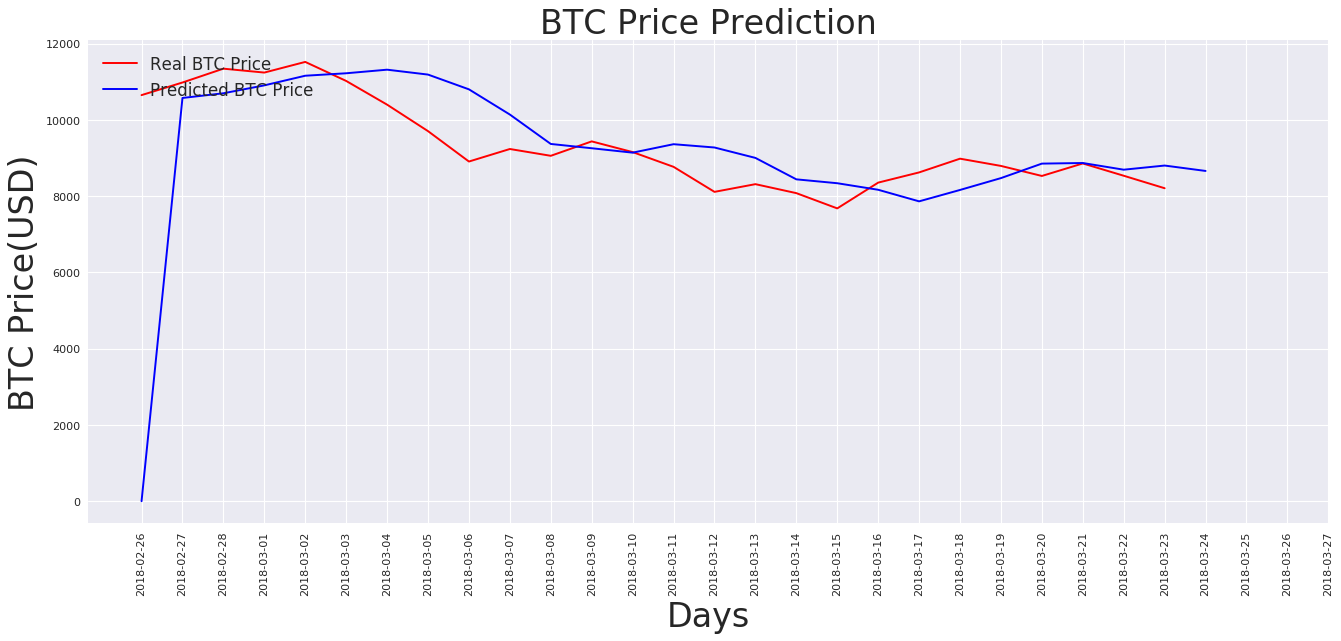

Test Score: 509.56 RMSE


In [226]:
test_results(regressor_v2)

Where the RMSE used to be around 80 it has now drastically increased to 509. Lets try a smaller window.

In [230]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]


# Scale input data
df_train = np.reshape(df_train, (len(df_train), 1))
df_test = np.reshape(df_test, (len(df_test), 1))

scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(df_train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# Create model
# Initialising the RNN
regressor_v3 = Sequential()

# Adding the input layer and the LSTM layer
regressor_v3.add(LSTM(units = 6, activation='sigmoid', input_shape=(1, look_back)))
# Adding the output layer
regressor_v3.add(Dense(units = 1))

# Compiling the RNN
regressor_v3.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor_v3.fit(trainX, trainY, batch_size=2, epochs=100)

/home/rick/miniconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Epoch 1/100


   2/2243 [..............................] - ETA: 30:10 - loss: 0.2851

  60/2243 [..............................] - ETA: 1:00 - loss: 0.1365 

 114/2243 [>.............................] - ETA: 32s - loss: 0.1268 

 174/2243 [=>............................] - ETA: 21s - loss: 0.1138

 234/2243 [==>...........................] - ETA: 15s - loss: 0.0968

 292/2243 [==>...........................] - ETA: 12s - loss: 0.0827

 344/2243 [===>..........................] - ETA: 10s - loss: 0.0727

 400/2243 [====>.........................] - ETA: 9s - loss: 0.0658 

 452/2243 [=====>........................] - ETA: 8s - loss: 0.0616

 508/2243 [=====>........................] - ETA: 7s - loss: 0.0561

 564/2243 [======>.......................] - ETA: 6s - loss: 0.0522

 618/2243 [=======>......................] - ETA: 5s - loss: 0.0496

 676/2243 [========>.....................] - ETA: 5s - loss: 0.0466

 734/2243 [========>.....................] - ETA: 4s - loss: 0.0447

 792/2243 [=========>....................] - ETA: 4s - loss: 0.0426

 846/2243 [==========>...................] - ETA: 3s - loss: 0.0413

 904/2243 [===========>..................] - ETA: 3s - loss: 0.0394

 958/2243 [===========>..................] - ETA: 3s - loss: 0.0378

1012/2243 [============>.................] - ETA: 3s - loss: 0.0373

1064/2243 [=============>................] - ETA: 2s - loss: 0.0368

1122/2243 [==============>...............] - ETA: 2s - loss: 0.0362

1178/2243 [==============>...............] - ETA: 2s - loss: 0.0357

1236/2243 [===============>..............] - ETA: 2s - loss: 0.0346

1290/2243 [================>.............] - ETA: 2s - loss: 0.0341

1344/2243 [================>.............] - ETA: 1s - loss: 0.0333

1402/2243 [=================>............] - ETA: 1s - loss: 0.0325

1458/2243 [==================>...........] - ETA: 1s - loss: 0.0318

1518/2243 [===================>..........] - ETA: 1s - loss: 0.0308

1570/2243 [===================>..........] - ETA: 1s - loss: 0.0300

1628/2243 [====================>.........] - ETA: 1s - loss: 0.0290

1686/2243 [=====================>........] - ETA: 1s - loss: 0.0287

1742/2243 [======================>.......] - ETA: 0s - loss: 0.0287

1794/2243 [======================>.......] - ETA: 0s - loss: 0.0280

1852/2243 [=======================>......] - ETA: 0s - loss: 0.0277

1910/2243 [========================>.....] - ETA: 0s - loss: 0.0269

1966/2243 [=========================>....] - ETA: 0s - loss: 0.0264

2024/2243 [==========================>...] - ETA: 0s - loss: 0.0261

2078/2243 [==========================>...] - ETA: 0s - loss: 0.0262

2132/2243 [===========================>..] - ETA: 0s - loss: 0.0260

2188/2243 [============================>.] - ETA: 0s - loss: 0.0256

2242/2243 [============================>.] - ETA: 0s - loss: 0.0251

2243/2243 [==============================] - 4s 2ms/step - loss: 0.0251


Epoch 2/100
   2/2243 [..............................] - ETA: 2s - loss: 9.0066e-04

  52/2243 [..............................] - ETA: 2s - loss: 0.0032    

 102/2243 [>.............................] - ETA: 2s - loss: 0.0071

 158/2243 [=>............................] - ETA: 2s - loss: 0.0107

 214/2243 [=>............................] - ETA: 1s - loss: 0.0106

 270/2243 [==>...........................] - ETA: 1s - loss: 0.0106

 326/2243 [===>..........................] - ETA: 1s - loss: 0.0106

 384/2243 [====>.........................] - ETA: 1s - loss: 0.0099

 442/2243 [====>.........................] - ETA: 1s - loss: 0.0112

 500/2243 [=====>........................] - ETA: 1s - loss: 0.0108

 554/2243 [======>.......................] - ETA: 1s - loss: 0.0123

 614/2243 [=======>......................] - ETA: 1s - loss: 0.0124

 672/2243 [=======>......................] - ETA: 1s - loss: 0.0126

 726/2243 [========>.....................] - ETA: 1s - loss: 0.0118

 778/2243 [=========>....................] - ETA: 1s - loss: 0.0122

 834/2243 [==========>...................] - ETA: 1s - loss: 0.0122

 892/2243 [==========>...................] - ETA: 1s - loss: 0.0122

 944/2243 [===========>..................] - ETA: 1s - loss: 0.0124

 998/2243 [============>.................] - ETA: 1s - loss: 0.0124

1054/2243 [=============>................] - ETA: 1s - loss: 0.0119

1100/2243 [=============>................] - ETA: 1s - loss: 0.0121

1148/2243 [==============>...............] - ETA: 1s - loss: 0.0118

1206/2243 [===============>..............] - ETA: 0s - loss: 0.0114

1260/2243 [===============>..............] - ETA: 0s - loss: 0.0113

1312/2243 [================>.............] - ETA: 0s - loss: 0.0110

1368/2243 [=================>............] - ETA: 0s - loss: 0.0106

1426/2243 [==================>...........] - ETA: 0s - loss: 0.0109

1478/2243 [==================>...........] - ETA: 0s - loss: 0.0106

1536/2243 [===================>..........] - ETA: 0s - loss: 0.0105

1594/2243 [====================>.........] - ETA: 0s - loss: 0.0105

1652/2243 [=====================>........] - ETA: 0s - loss: 0.0103

1708/2243 [=====================>........] - ETA: 0s - loss: 0.0103

1764/2243 [======================>.......] - ETA: 0s - loss: 0.0101

1822/2243 [=======================>......] - ETA: 0s - loss: 0.0102

1878/2243 [========================>.....] - ETA: 0s - loss: 0.0103

1934/2243 [========================>.....] - ETA: 0s - loss: 0.0102

1988/2243 [=========================>....] - ETA: 0s - loss: 0.0100

2038/2243 [==========================>...] - ETA: 0s - loss: 0.0100

2096/2243 [===========================>..] - ETA: 0s - loss: 0.0101

2154/2243 [===========================>..] - ETA: 0s - loss: 0.0099

2206/2243 [============================>.] - ETA: 0s - loss: 0.0097

2243/2243 [==============================] - 2s 924us/step - loss: 0.0097


Epoch 3/100
   2/2243 [..............................] - ETA: 2s - loss: 7.1079e-04

  50/2243 [..............................] - ETA: 2s - loss: 0.0092    

  88/2243 [>.............................] - ETA: 2s - loss: 0.0058

 138/2243 [>.............................] - ETA: 2s - loss: 0.0073

 188/2243 [=>............................] - ETA: 2s - loss: 0.0056

 248/2243 [==>...........................] - ETA: 2s - loss: 0.0052

 306/2243 [===>..........................] - ETA: 1s - loss: 0.0046

 364/2243 [===>..........................] - ETA: 1s - loss: 0.0048

 418/2243 [====>.........................] - ETA: 1s - loss: 0.0045

 476/2243 [=====>........................] - ETA: 1s - loss: 0.0046

 532/2243 [======>.......................] - ETA: 1s - loss: 0.0051

 590/2243 [======>.......................] - ETA: 1s - loss: 0.0055

 644/2243 [=======>......................] - ETA: 1s - loss: 0.0053

 700/2243 [========>.....................] - ETA: 1s - loss: 0.0053

 756/2243 [=========>....................] - ETA: 1s - loss: 0.0051

 798/2243 [=========>....................] - ETA: 1s - loss: 0.0052

 850/2243 [==========>...................] - ETA: 1s - loss: 0.0050

 900/2243 [===========>..................] - ETA: 1s - loss: 0.0048

 956/2243 [===========>..................] - ETA: 1s - loss: 0.0048

1014/2243 [============>.................] - ETA: 1s - loss: 0.0048

1072/2243 [=============>................] - ETA: 1s - loss: 0.0047

1128/2243 [==============>...............] - ETA: 1s - loss: 0.0047

1184/2243 [==============>...............] - ETA: 1s - loss: 0.0047

1240/2243 [===============>..............] - ETA: 0s - loss: 0.0046

1298/2243 [================>.............] - ETA: 0s - loss: 0.0045

1356/2243 [=================>............] - ETA: 0s - loss: 0.0044

1410/2243 [=================>............] - ETA: 0s - loss: 0.0043

1466/2243 [==================>...........] - ETA: 0s - loss: 0.0043

1524/2243 [===================>..........] - ETA: 0s - loss: 0.0044

1582/2243 [====================>.........] - ETA: 0s - loss: 0.0042

1634/2243 [====================>.........] - ETA: 0s - loss: 0.0041

1692/2243 [=====================>........] - ETA: 0s - loss: 0.0040

1748/2243 [======================>.......] - ETA: 0s - loss: 0.0039

1806/2243 [=======================>......] - ETA: 0s - loss: 0.0039

1862/2243 [=======================>......] - ETA: 0s - loss: 0.0038

1916/2243 [========================>.....] - ETA: 0s - loss: 0.0037

1972/2243 [=========================>....] - ETA: 0s - loss: 0.0037

2030/2243 [==========================>...] - ETA: 0s - loss: 0.0036

2086/2243 [==========================>...] - ETA: 0s - loss: 0.0035

2140/2243 [===========================>..] - ETA: 0s - loss: 0.0034

2198/2243 [============================>.] - ETA: 0s - loss: 0.0034

2243/2243 [==============================] - 2s 929us/step - loss: 0.0033


Epoch 4/100
   2/2243 [..............................] - ETA: 2s - loss: 7.6256e-05

  52/2243 [..............................] - ETA: 2s - loss: 5.2244e-04

 102/2243 [>.............................] - ETA: 2s - loss: 3.6713e-04

 160/2243 [=>............................] - ETA: 2s - loss: 5.8319e-04

 218/2243 [=>............................] - ETA: 1s - loss: 9.4815e-04

 276/2243 [==>...........................] - ETA: 1s - loss: 8.2083e-04

 332/2243 [===>..........................] - ETA: 1s - loss: 7.4093e-04

 388/2243 [====>.........................] - ETA: 1s - loss: 8.7428e-04

 444/2243 [====>.........................] - ETA: 1s - loss: 9.2475e-04

 502/2243 [=====>........................] - ETA: 1s - loss: 9.8310e-04

 560/2243 [======>.......................] - ETA: 1s - loss: 0.0010    

 612/2243 [=======>......................] - ETA: 1s - loss: 9.8947e-04

 666/2243 [=======>......................] - ETA: 1s - loss: 9.7445e-04

 726/2243 [========>.....................] - ETA: 1s - loss: 9.6316e-04

 782/2243 [=========>....................] - ETA: 1s - loss: 9.5157e-04

 834/2243 [==========>...................] - ETA: 1s - loss: 9.1696e-04

 892/2243 [==========>...................] - ETA: 1s - loss: 8.7089e-04

 950/2243 [===========>..................] - ETA: 1s - loss: 8.3218e-04

1008/2243 [============>.................] - ETA: 1s - loss: 7.9642e-04

1064/2243 [=============>................] - ETA: 1s - loss: 7.9130e-04

1118/2243 [=============>................] - ETA: 1s - loss: 7.7549e-04

1174/2243 [==============>...............] - ETA: 0s - loss: 7.4198e-04

1228/2243 [===============>..............] - ETA: 0s - loss: 7.2273e-04

1288/2243 [================>.............] - ETA: 0s - loss: 6.9804e-04

1338/2243 [================>.............] - ETA: 0s - loss: 6.8120e-04

1396/2243 [=================>............] - ETA: 0s - loss: 6.5716e-04

1452/2243 [==================>...........] - ETA: 0s - loss: 6.3441e-04

1508/2243 [===================>..........] - ETA: 0s - loss: 6.2191e-04

1560/2243 [===================>..........] - ETA: 0s - loss: 6.0602e-04

1618/2243 [====================>.........] - ETA: 0s - loss: 5.8589e-04

1674/2243 [=====================>........] - ETA: 0s - loss: 5.7222e-04

1730/2243 [======================>.......] - ETA: 0s - loss: 5.5985e-04

1786/2243 [======================>.......] - ETA: 0s - loss: 5.4373e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 5.3173e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 5.3174e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 5.2009e-04

2008/2243 [=========================>....] - ETA: 0s - loss: 5.0772e-04

2060/2243 [==========================>...] - ETA: 0s - loss: 5.0086e-04

2118/2243 [===========================>..] - ETA: 0s - loss: 4.9303e-04

2176/2243 [============================>.] - ETA: 0s - loss: 4.8220e-04

2234/2243 [============================>.] - ETA: 0s - loss: 4.7020e-04

2243/2243 [==============================] - 2s 914us/step - loss: 4.6841e-04


Epoch 5/100
   2/2243 [..............................] - ETA: 2s - loss: 4.4257e-07

  50/2243 [..............................] - ETA: 2s - loss: 5.9219e-05

 104/2243 [>.............................] - ETA: 2s - loss: 4.6145e-05

 162/2243 [=>............................] - ETA: 2s - loss: 1.0779e-04

 220/2243 [=>............................] - ETA: 1s - loss: 8.6234e-05

 274/2243 [==>...........................] - ETA: 1s - loss: 7.1814e-05

 330/2243 [===>..........................] - ETA: 1s - loss: 1.5510e-04

 388/2243 [====>.........................] - ETA: 1s - loss: 1.4024e-04

 446/2243 [====>.........................] - ETA: 1s - loss: 1.2955e-04

 504/2243 [=====>........................] - ETA: 1s - loss: 1.1880e-04

 556/2243 [======>.......................] - ETA: 1s - loss: 1.1205e-04

 610/2243 [=======>......................] - ETA: 1s - loss: 1.1246e-04

 668/2243 [=======>......................] - ETA: 1s - loss: 1.1003e-04

 722/2243 [========>.....................] - ETA: 1s - loss: 1.1970e-04

 776/2243 [=========>....................] - ETA: 1s - loss: 1.2054e-04

 832/2243 [==========>...................] - ETA: 1s - loss: 1.1575e-04

 890/2243 [==========>...................] - ETA: 1s - loss: 1.1282e-04

 946/2243 [===========>..................] - ETA: 1s - loss: 1.1198e-04

1004/2243 [============>.................] - ETA: 1s - loss: 1.0876e-04

1060/2243 [=============>................] - ETA: 1s - loss: 1.2061e-04

1114/2243 [=============>................] - ETA: 1s - loss: 1.1793e-04

1170/2243 [==============>...............] - ETA: 0s - loss: 1.2824e-04

1230/2243 [===============>..............] - ETA: 0s - loss: 1.2321e-04

1284/2243 [================>.............] - ETA: 0s - loss: 1.1825e-04

1340/2243 [================>.............] - ETA: 0s - loss: 1.1393e-04

1396/2243 [=================>............] - ETA: 0s - loss: 1.0976e-04

1452/2243 [==================>...........] - ETA: 0s - loss: 1.1002e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.0933e-04

1564/2243 [===================>..........] - ETA: 0s - loss: 1.0866e-04

1622/2243 [====================>.........] - ETA: 0s - loss: 1.0778e-04

1678/2243 [=====================>........] - ETA: 0s - loss: 1.0665e-04

1734/2243 [======================>.......] - ETA: 0s - loss: 1.0751e-04

1788/2243 [======================>.......] - ETA: 0s - loss: 1.1531e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 1.1231e-04

1900/2243 [========================>.....] - ETA: 0s - loss: 1.2378e-04

1958/2243 [=========================>....] - ETA: 0s - loss: 1.2340e-04

2012/2243 [=========================>....] - ETA: 0s - loss: 1.2081e-04

2068/2243 [==========================>...] - ETA: 0s - loss: 1.1785e-04

2126/2243 [===========================>..] - ETA: 0s - loss: 1.1499e-04

2184/2243 [============================>.] - ETA: 0s - loss: 1.1256e-04

2240/2243 [============================>.] - ETA: 0s - loss: 1.1236e-04

2243/2243 [==============================] - 2s 913us/step - loss: 1.1221e-04


Epoch 6/100
   2/2243 [..............................] - ETA: 2s - loss: 9.4879e-07

  52/2243 [..............................] - ETA: 2s - loss: 1.9881e-04

 106/2243 [>.............................] - ETA: 2s - loss: 1.0137e-04

 158/2243 [=>............................] - ETA: 2s - loss: 2.2353e-04

 212/2243 [=>............................] - ETA: 1s - loss: 1.7204e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 1.6344e-04

 326/2243 [===>..........................] - ETA: 1s - loss: 1.4805e-04

 382/2243 [====>.........................] - ETA: 1s - loss: 1.5103e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 1.3907e-04

 492/2243 [=====>........................] - ETA: 1s - loss: 1.3189e-04

 546/2243 [======>.......................] - ETA: 1s - loss: 1.1925e-04

 604/2243 [=======>......................] - ETA: 1s - loss: 1.2183e-04

 660/2243 [=======>......................] - ETA: 1s - loss: 1.1217e-04

 712/2243 [========>.....................] - ETA: 1s - loss: 1.0633e-04

 770/2243 [=========>....................] - ETA: 1s - loss: 1.2405e-04

 828/2243 [==========>...................] - ETA: 1s - loss: 1.2242e-04

 882/2243 [==========>...................] - ETA: 1s - loss: 1.2132e-04

 940/2243 [===========>..................] - ETA: 1s - loss: 1.1714e-04

 996/2243 [============>.................] - ETA: 1s - loss: 1.1170e-04

1050/2243 [=============>................] - ETA: 1s - loss: 1.0663e-04

1104/2243 [=============>................] - ETA: 1s - loss: 1.0275e-04

1162/2243 [==============>...............] - ETA: 0s - loss: 1.0121e-04

1214/2243 [===============>..............] - ETA: 0s - loss: 1.0207e-04

1272/2243 [================>.............] - ETA: 0s - loss: 1.1194e-04

1330/2243 [================>.............] - ETA: 0s - loss: 1.0927e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.0483e-04

1442/2243 [==================>...........] - ETA: 0s - loss: 1.0178e-04

1498/2243 [===================>..........] - ETA: 0s - loss: 9.8382e-05

1556/2243 [===================>..........] - ETA: 0s - loss: 1.1062e-04

1612/2243 [====================>.........] - ETA: 0s - loss: 1.0806e-04

1666/2243 [=====================>........] - ETA: 0s - loss: 1.1084e-04

1720/2243 [======================>.......] - ETA: 0s - loss: 1.0786e-04

1772/2243 [======================>.......] - ETA: 0s - loss: 1.0816e-04

1828/2243 [=======================>......] - ETA: 0s - loss: 1.0798e-04

1886/2243 [========================>.....] - ETA: 0s - loss: 1.1304e-04

1938/2243 [========================>.....] - ETA: 0s - loss: 1.1013e-04

1994/2243 [=========================>....] - ETA: 0s - loss: 1.1037e-04

2052/2243 [==========================>...] - ETA: 0s - loss: 1.0755e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0654e-04

2166/2243 [===========================>..] - ETA: 0s - loss: 1.1016e-04

2222/2243 [============================>.] - ETA: 0s - loss: 1.0858e-04

2243/2243 [==============================] - 2s 918us/step - loss: 1.0798e-04


Epoch 7/100
   2/2243 [..............................] - ETA: 2s - loss: 2.1262e-06

  50/2243 [..............................] - ETA: 2s - loss: 3.0917e-05

 106/2243 [>.............................] - ETA: 2s - loss: 2.8578e-05

 160/2243 [=>............................] - ETA: 2s - loss: 1.7923e-04

 218/2243 [=>............................] - ETA: 1s - loss: 1.6716e-04

 274/2243 [==>...........................] - ETA: 1s - loss: 1.3514e-04

 332/2243 [===>..........................] - ETA: 1s - loss: 1.2440e-04

 388/2243 [====>.........................] - ETA: 1s - loss: 1.2159e-04

 440/2243 [====>.........................] - ETA: 1s - loss: 1.1386e-04

 494/2243 [=====>........................] - ETA: 1s - loss: 1.3164e-04

 554/2243 [======>.......................] - ETA: 1s - loss: 1.1814e-04

 608/2243 [=======>......................] - ETA: 1s - loss: 1.0892e-04

 660/2243 [=======>......................] - ETA: 1s - loss: 1.0742e-04

 718/2243 [========>.....................] - ETA: 1s - loss: 1.3309e-04

 776/2243 [=========>....................] - ETA: 1s - loss: 1.2540e-04

 834/2243 [==========>...................] - ETA: 1s - loss: 1.3007e-04

 890/2243 [==========>...................] - ETA: 1s - loss: 1.2956e-04

 946/2243 [===========>..................] - ETA: 1s - loss: 1.2821e-04

1000/2243 [============>.................] - ETA: 1s - loss: 1.2398e-04

1056/2243 [=============>................] - ETA: 1s - loss: 1.3499e-04

1116/2243 [=============>................] - ETA: 1s - loss: 1.3218e-04

1166/2243 [==============>...............] - ETA: 0s - loss: 1.2919e-04

1222/2243 [===============>..............] - ETA: 0s - loss: 1.2731e-04

1280/2243 [================>.............] - ETA: 0s - loss: 1.2592e-04

1338/2243 [================>.............] - ETA: 0s - loss: 1.3486e-04

1390/2243 [=================>............] - ETA: 0s - loss: 1.3224e-04

1448/2243 [==================>...........] - ETA: 0s - loss: 1.2884e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.2478e-04

1562/2243 [===================>..........] - ETA: 0s - loss: 1.2599e-04

1616/2243 [====================>.........] - ETA: 0s - loss: 1.2938e-04

1672/2243 [=====================>........] - ETA: 0s - loss: 1.3157e-04

1724/2243 [======================>.......] - ETA: 0s - loss: 1.3025e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 1.2651e-04

1840/2243 [=======================>......] - ETA: 0s - loss: 1.2282e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.2376e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 1.2036e-04

2008/2243 [=========================>....] - ETA: 0s - loss: 1.2032e-04

2064/2243 [==========================>...] - ETA: 0s - loss: 1.1946e-04

2118/2243 [===========================>..] - ETA: 0s - loss: 1.1659e-04

2174/2243 [============================>.] - ETA: 0s - loss: 1.1387e-04

2232/2243 [============================>.] - ETA: 0s - loss: 1.1261e-04

2243/2243 [==============================] - 2s 913us/step - loss: 1.1212e-04


Epoch 8/100
   2/2243 [..............................] - ETA: 2s - loss: 2.3167e-06

  48/2243 [..............................] - ETA: 2s - loss: 3.7874e-05

  98/2243 [>.............................] - ETA: 2s - loss: 3.8657e-05

 154/2243 [=>............................] - ETA: 2s - loss: 9.2447e-05

 210/2243 [=>............................] - ETA: 1s - loss: 9.0336e-05

 268/2243 [==>...........................] - ETA: 1s - loss: 1.0170e-04

 326/2243 [===>..........................] - ETA: 1s - loss: 1.1158e-04

 378/2243 [====>.........................] - ETA: 1s - loss: 1.2507e-04

 432/2243 [====>.........................] - ETA: 1s - loss: 1.1085e-04

 492/2243 [=====>........................] - ETA: 1s - loss: 1.0310e-04

 546/2243 [======>.......................] - ETA: 1s - loss: 1.0210e-04

 598/2243 [======>.......................] - ETA: 1s - loss: 9.3955e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 9.2427e-05

 712/2243 [========>.....................] - ETA: 1s - loss: 8.6050e-05

 770/2243 [=========>....................] - ETA: 1s - loss: 9.1274e-05

 826/2243 [==========>...................] - ETA: 1s - loss: 8.5278e-05

 882/2243 [==========>...................] - ETA: 1s - loss: 8.4092e-05

 936/2243 [===========>..................] - ETA: 1s - loss: 8.2463e-05

 992/2243 [============>.................] - ETA: 1s - loss: 7.9855e-05

1052/2243 [=============>................] - ETA: 1s - loss: 7.9048e-05

1104/2243 [=============>................] - ETA: 1s - loss: 7.5696e-05

1162/2243 [==============>...............] - ETA: 0s - loss: 7.6311e-05

1220/2243 [===============>..............] - ETA: 0s - loss: 7.4193e-05

1276/2243 [================>.............] - ETA: 0s - loss: 7.6383e-05

1330/2243 [================>.............] - ETA: 0s - loss: 7.6299e-05

1386/2243 [=================>............] - ETA: 0s - loss: 7.3921e-05

1442/2243 [==================>...........] - ETA: 0s - loss: 7.6515e-05

1498/2243 [===================>..........] - ETA: 0s - loss: 8.6201e-05

1550/2243 [===================>..........] - ETA: 0s - loss: 8.9027e-05

1604/2243 [====================>.........] - ETA: 0s - loss: 8.8299e-05

1654/2243 [=====================>........] - ETA: 0s - loss: 8.9023e-05

1712/2243 [=====================>........] - ETA: 0s - loss: 9.2155e-05

1770/2243 [======================>.......] - ETA: 0s - loss: 9.4547e-05

1820/2243 [=======================>......] - ETA: 0s - loss: 1.0692e-04

1878/2243 [========================>.....] - ETA: 0s - loss: 1.0437e-04

1936/2243 [========================>.....] - ETA: 0s - loss: 1.0328e-04

1994/2243 [=========================>....] - ETA: 0s - loss: 1.0180e-04

2046/2243 [==========================>...] - ETA: 0s - loss: 1.1347e-04

2100/2243 [===========================>..] - ETA: 0s - loss: 1.1652e-04

2158/2243 [===========================>..] - ETA: 0s - loss: 1.1527e-04

2214/2243 [============================>.] - ETA: 0s - loss: 1.1512e-04

2243/2243 [==============================] - 2s 920us/step - loss: 1.1430e-04


Epoch 9/100
   2/2243 [..............................] - ETA: 2s - loss: 2.0363e-06

  46/2243 [..............................] - ETA: 2s - loss: 5.1178e-05

 104/2243 [>.............................] - ETA: 2s - loss: 7.6639e-05

 160/2243 [=>............................] - ETA: 2s - loss: 8.2501e-05

 216/2243 [=>............................] - ETA: 1s - loss: 9.0694e-05

 272/2243 [==>...........................] - ETA: 1s - loss: 9.3601e-05

 326/2243 [===>..........................] - ETA: 1s - loss: 8.4592e-05

 380/2243 [====>.........................] - ETA: 1s - loss: 7.4703e-05

 440/2243 [====>.........................] - ETA: 1s - loss: 7.2807e-05

 492/2243 [=====>........................] - ETA: 1s - loss: 9.4011e-05

 546/2243 [======>.......................] - ETA: 1s - loss: 8.7637e-05

 602/2243 [=======>......................] - ETA: 1s - loss: 9.3010e-05

 660/2243 [=======>......................] - ETA: 1s - loss: 1.1423e-04

 718/2243 [========>.....................] - ETA: 1s - loss: 1.0521e-04

 770/2243 [=========>....................] - ETA: 1s - loss: 1.1467e-04

 828/2243 [==========>...................] - ETA: 1s - loss: 1.1518e-04

 882/2243 [==========>...................] - ETA: 1s - loss: 1.0860e-04

 938/2243 [===========>..................] - ETA: 1s - loss: 1.0832e-04

 994/2243 [============>.................] - ETA: 1s - loss: 1.0481e-04

1050/2243 [=============>................] - ETA: 1s - loss: 1.0104e-04

1108/2243 [=============>................] - ETA: 1s - loss: 9.7249e-05

1164/2243 [==============>...............] - ETA: 0s - loss: 1.0493e-04

1222/2243 [===============>..............] - ETA: 0s - loss: 1.0100e-04

1272/2243 [================>.............] - ETA: 0s - loss: 1.0572e-04

1330/2243 [================>.............] - ETA: 0s - loss: 1.2031e-04

1386/2243 [=================>............] - ETA: 0s - loss: 1.1659e-04

1444/2243 [==================>...........] - ETA: 0s - loss: 1.1804e-04

1496/2243 [===================>..........] - ETA: 0s - loss: 1.1780e-04

1556/2243 [===================>..........] - ETA: 0s - loss: 1.2108e-04

1608/2243 [====================>.........] - ETA: 0s - loss: 1.1776e-04

1666/2243 [=====================>........] - ETA: 0s - loss: 1.1392e-04

1720/2243 [======================>.......] - ETA: 0s - loss: 1.1533e-04

1776/2243 [======================>.......] - ETA: 0s - loss: 1.1253e-04

1834/2243 [=======================>......] - ETA: 0s - loss: 1.1322e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.1105e-04

1946/2243 [=========================>....] - ETA: 0s - loss: 1.0825e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0647e-04

2054/2243 [==========================>...] - ETA: 0s - loss: 1.0625e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0445e-04

2168/2243 [===========================>..] - ETA: 0s - loss: 1.0647e-04

2222/2243 [============================>.] - ETA: 0s - loss: 1.1157e-04

2243/2243 [==============================] - 2s 919us/step - loss: 1.1115e-04


Epoch 10/100
   2/2243 [..............................] - ETA: 3s - loss: 6.9479e-06

  54/2243 [..............................] - ETA: 2s - loss: 7.3340e-05

 108/2243 [>.............................] - ETA: 2s - loss: 2.7017e-04

 166/2243 [=>............................] - ETA: 1s - loss: 1.9880e-04

 218/2243 [=>............................] - ETA: 1s - loss: 1.5598e-04

 274/2243 [==>...........................] - ETA: 1s - loss: 1.7110e-04

 330/2243 [===>..........................] - ETA: 1s - loss: 2.0679e-04

 390/2243 [====>.........................] - ETA: 1s - loss: 2.1242e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 2.0167e-04

 494/2243 [=====>........................] - ETA: 1s - loss: 1.8974e-04

 552/2243 [======>.......................] - ETA: 1s - loss: 1.8609e-04

 608/2243 [=======>......................] - ETA: 1s - loss: 1.7031e-04

 660/2243 [=======>......................] - ETA: 1s - loss: 1.6186e-04

 712/2243 [========>.....................] - ETA: 1s - loss: 1.5560e-04

 768/2243 [=========>....................] - ETA: 1s - loss: 1.5066e-04

 824/2243 [==========>...................] - ETA: 1s - loss: 1.4153e-04

 878/2243 [==========>...................] - ETA: 1s - loss: 1.3308e-04

 934/2243 [===========>..................] - ETA: 1s - loss: 1.2523e-04

 990/2243 [============>.................] - ETA: 1s - loss: 1.3356e-04

1048/2243 [=============>................] - ETA: 1s - loss: 1.3837e-04

1104/2243 [=============>................] - ETA: 1s - loss: 1.3498e-04

1160/2243 [==============>...............] - ETA: 1s - loss: 1.3800e-04

1212/2243 [===============>..............] - ETA: 0s - loss: 1.3266e-04

1268/2243 [===============>..............] - ETA: 0s - loss: 1.3251e-04

1324/2243 [================>.............] - ETA: 0s - loss: 1.3048e-04

1382/2243 [=================>............] - ETA: 0s - loss: 1.3917e-04

1432/2243 [==================>...........] - ETA: 0s - loss: 1.3489e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 1.3062e-04

1542/2243 [===================>..........] - ETA: 0s - loss: 1.2726e-04

1600/2243 [====================>.........] - ETA: 0s - loss: 1.2551e-04

1654/2243 [=====================>........] - ETA: 0s - loss: 1.3305e-04

1708/2243 [=====================>........] - ETA: 0s - loss: 1.3123e-04

1766/2243 [======================>.......] - ETA: 0s - loss: 1.2725e-04

1822/2243 [=======================>......] - ETA: 0s - loss: 1.2672e-04

1878/2243 [========================>.....] - ETA: 0s - loss: 1.2578e-04

1932/2243 [========================>.....] - ETA: 0s - loss: 1.2272e-04

1990/2243 [=========================>....] - ETA: 0s - loss: 1.1949e-04

2046/2243 [==========================>...] - ETA: 0s - loss: 1.1725e-04

2104/2243 [===========================>..] - ETA: 0s - loss: 1.2072e-04

2158/2243 [===========================>..] - ETA: 0s - loss: 1.1890e-04

2216/2243 [============================>.] - ETA: 0s - loss: 1.2048e-04

2243/2243 [==============================] - 2s 922us/step - loss: 1.1908e-04


Epoch 11/100
   2/2243 [..............................] - ETA: 2s - loss: 4.7846e-08

  50/2243 [..............................] - ETA: 2s - loss: 3.8186e-05

 108/2243 [>.............................] - ETA: 2s - loss: 9.1377e-05

 160/2243 [=>............................] - ETA: 2s - loss: 1.8675e-04

 218/2243 [=>............................] - ETA: 1s - loss: 1.8824e-04

 276/2243 [==>...........................] - ETA: 1s - loss: 1.5092e-04

 330/2243 [===>..........................] - ETA: 1s - loss: 1.4432e-04

 382/2243 [====>.........................] - ETA: 1s - loss: 1.2801e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 1.1396e-04

 496/2243 [=====>........................] - ETA: 1s - loss: 1.0401e-04

 552/2243 [======>.......................] - ETA: 1s - loss: 1.0611e-04

 608/2243 [=======>......................] - ETA: 1s - loss: 1.0772e-04

 664/2243 [=======>......................] - ETA: 1s - loss: 1.1312e-04

 718/2243 [========>.....................] - ETA: 1s - loss: 1.2054e-04

 774/2243 [=========>....................] - ETA: 1s - loss: 1.3302e-04

 834/2243 [==========>...................] - ETA: 1s - loss: 1.2370e-04

 886/2243 [==========>...................] - ETA: 1s - loss: 1.1700e-04

 944/2243 [===========>..................] - ETA: 1s - loss: 1.1169e-04

1000/2243 [============>.................] - ETA: 1s - loss: 1.1365e-04

1058/2243 [=============>................] - ETA: 1s - loss: 1.1059e-04

1108/2243 [=============>................] - ETA: 1s - loss: 1.0616e-04

1166/2243 [==============>...............] - ETA: 0s - loss: 1.0256e-04

1222/2243 [===============>..............] - ETA: 0s - loss: 1.0650e-04

1278/2243 [================>.............] - ETA: 0s - loss: 1.0324e-04

1330/2243 [================>.............] - ETA: 0s - loss: 1.0434e-04

1386/2243 [=================>............] - ETA: 0s - loss: 1.0039e-04

1440/2243 [==================>...........] - ETA: 0s - loss: 9.6688e-05

1498/2243 [===================>..........] - ETA: 0s - loss: 9.8534e-05

1554/2243 [===================>..........] - ETA: 0s - loss: 9.7791e-05

1606/2243 [====================>.........] - ETA: 0s - loss: 9.7111e-05

1664/2243 [=====================>........] - ETA: 0s - loss: 9.4925e-05

1722/2243 [======================>.......] - ETA: 0s - loss: 9.2029e-05

1778/2243 [======================>.......] - ETA: 0s - loss: 1.0482e-04

1828/2243 [=======================>......] - ETA: 0s - loss: 1.0312e-04

1882/2243 [========================>.....] - ETA: 0s - loss: 1.0125e-04

1942/2243 [========================>.....] - ETA: 0s - loss: 9.9402e-05

1998/2243 [=========================>....] - ETA: 0s - loss: 9.7700e-05

2052/2243 [==========================>...] - ETA: 0s - loss: 1.0903e-04

2106/2243 [===========================>..] - ETA: 0s - loss: 1.1661e-04

2162/2243 [===========================>..] - ETA: 0s - loss: 1.1573e-04

2216/2243 [============================>.] - ETA: 0s - loss: 1.1453e-04

2243/2243 [==============================] - 2s 921us/step - loss: 1.1337e-04


Epoch 12/100
   2/2243 [..............................] - ETA: 3s - loss: 1.7740e-04

  46/2243 [..............................] - ETA: 2s - loss: 4.5698e-05

  98/2243 [>.............................] - ETA: 2s - loss: 2.8932e-05

 152/2243 [=>............................] - ETA: 2s - loss: 1.2981e-04

 200/2243 [=>............................] - ETA: 2s - loss: 1.0001e-04

 250/2243 [==>...........................] - ETA: 2s - loss: 1.0155e-04

 302/2243 [===>..........................] - ETA: 1s - loss: 1.1332e-04

 360/2243 [===>..........................] - ETA: 1s - loss: 1.1185e-04

 408/2243 [====>.........................] - ETA: 1s - loss: 1.1019e-04

 462/2243 [=====>........................] - ETA: 1s - loss: 9.9119e-05

 512/2243 [=====>........................] - ETA: 1s - loss: 8.9793e-05

 566/2243 [======>.......................] - ETA: 1s - loss: 8.9022e-05

 620/2243 [=======>......................] - ETA: 1s - loss: 8.8687e-05

 678/2243 [========>.....................] - ETA: 1s - loss: 1.1467e-04

 732/2243 [========>.....................] - ETA: 1s - loss: 1.0758e-04

 784/2243 [=========>....................] - ETA: 1s - loss: 1.0755e-04

 834/2243 [==========>...................] - ETA: 1s - loss: 1.0385e-04

 888/2243 [==========>...................] - ETA: 1s - loss: 1.0341e-04

 944/2243 [===========>..................] - ETA: 1s - loss: 9.8977e-05

 994/2243 [============>.................] - ETA: 1s - loss: 9.6807e-05

1052/2243 [=============>................] - ETA: 1s - loss: 9.4006e-05

1112/2243 [=============>................] - ETA: 1s - loss: 9.6629e-05

1170/2243 [==============>...............] - ETA: 1s - loss: 9.4536e-05

1220/2243 [===============>..............] - ETA: 0s - loss: 9.1570e-05

1276/2243 [================>.............] - ETA: 0s - loss: 9.0681e-05

1330/2243 [================>.............] - ETA: 0s - loss: 9.5520e-05

1390/2243 [=================>............] - ETA: 0s - loss: 9.6666e-05

1444/2243 [==================>...........] - ETA: 0s - loss: 1.0545e-04

1500/2243 [===================>..........] - ETA: 0s - loss: 1.2253e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.1880e-04

1614/2243 [====================>.........] - ETA: 0s - loss: 1.2118e-04

1672/2243 [=====================>........] - ETA: 0s - loss: 1.2038e-04

1724/2243 [======================>.......] - ETA: 0s - loss: 1.1767e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 1.1437e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 1.1116e-04

1898/2243 [========================>.....] - ETA: 0s - loss: 1.0944e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 1.0893e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.1312e-04

2056/2243 [==========================>...] - ETA: 0s - loss: 1.1437e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.1387e-04

2164/2243 [===========================>..] - ETA: 0s - loss: 1.1119e-04

2202/2243 [============================>.] - ETA: 0s - loss: 1.1239e-04

2243/2243 [==============================] - 2s 950us/step - loss: 1.1464e-04


Epoch 13/100
   2/2243 [..............................] - ETA: 2s - loss: 2.5213e-05

  50/2243 [..............................] - ETA: 2s - loss: 5.3332e-05

 110/2243 [>.............................] - ETA: 2s - loss: 9.6929e-05

 160/2243 [=>............................] - ETA: 2s - loss: 9.0987e-05

 218/2243 [=>............................] - ETA: 1s - loss: 7.6650e-05

 278/2243 [==>...........................] - ETA: 1s - loss: 7.7167e-05

 338/2243 [===>..........................] - ETA: 1s - loss: 6.8403e-05

 392/2243 [====>.........................] - ETA: 1s - loss: 7.4405e-05

 448/2243 [====>.........................] - ETA: 1s - loss: 6.8659e-05

 506/2243 [=====>........................] - ETA: 1s - loss: 9.4147e-05

 566/2243 [======>.......................] - ETA: 1s - loss: 1.0572e-04

 624/2243 [=======>......................] - ETA: 1s - loss: 1.1319e-04

 672/2243 [=======>......................] - ETA: 1s - loss: 1.0805e-04

 726/2243 [========>.....................] - ETA: 1s - loss: 1.0028e-04

 782/2243 [=========>....................] - ETA: 1s - loss: 9.7934e-05

 838/2243 [==========>...................] - ETA: 1s - loss: 1.0823e-04

 890/2243 [==========>...................] - ETA: 1s - loss: 1.0362e-04

 944/2243 [===========>..................] - ETA: 1s - loss: 1.0026e-04

1000/2243 [============>.................] - ETA: 1s - loss: 1.0274e-04

1060/2243 [=============>................] - ETA: 1s - loss: 9.9384e-05

1118/2243 [=============>................] - ETA: 1s - loss: 1.0001e-04

1174/2243 [==============>...............] - ETA: 0s - loss: 9.5895e-05

1230/2243 [===============>..............] - ETA: 0s - loss: 1.0053e-04

1284/2243 [================>.............] - ETA: 0s - loss: 9.8574e-05

1334/2243 [================>.............] - ETA: 0s - loss: 1.0380e-04

1374/2243 [=================>............] - ETA: 0s - loss: 1.0137e-04

1418/2243 [=================>............] - ETA: 0s - loss: 9.9294e-05

1462/2243 [==================>...........] - ETA: 0s - loss: 1.0013e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.1424e-04

1546/2243 [===================>..........] - ETA: 0s - loss: 1.1705e-04

1586/2243 [====================>.........] - ETA: 0s - loss: 1.1438e-04

1628/2243 [====================>.........] - ETA: 0s - loss: 1.1175e-04

1676/2243 [=====================>........] - ETA: 0s - loss: 1.1622e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.1360e-04

1778/2243 [======================>.......] - ETA: 0s - loss: 1.1192e-04

1828/2243 [=======================>......] - ETA: 0s - loss: 1.1427e-04

1868/2243 [=======================>......] - ETA: 0s - loss: 1.2527e-04

1906/2243 [========================>.....] - ETA: 0s - loss: 1.2392e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 1.2125e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.1910e-04

2048/2243 [==========================>...] - ETA: 0s - loss: 1.1645e-04

2098/2243 [===========================>..] - ETA: 0s - loss: 1.1775e-04

2140/2243 [===========================>..] - ETA: 0s - loss: 1.1602e-04

2190/2243 [============================>.] - ETA: 0s - loss: 1.1619e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.1391e-04


Epoch 14/100
   2/2243 [..............................] - ETA: 2s - loss: 2.8770e-05

  48/2243 [..............................] - ETA: 2s - loss: 6.9849e-05

  98/2243 [>.............................] - ETA: 2s - loss: 2.0613e-04

 152/2243 [=>............................] - ETA: 2s - loss: 1.5440e-04

 204/2243 [=>............................] - ETA: 2s - loss: 1.1707e-04

 262/2243 [==>...........................] - ETA: 1s - loss: 1.0871e-04

 318/2243 [===>..........................] - ETA: 1s - loss: 9.5888e-05

 368/2243 [===>..........................] - ETA: 1s - loss: 8.6392e-05

 424/2243 [====>.........................] - ETA: 1s - loss: 7.6487e-05

 480/2243 [=====>........................] - ETA: 1s - loss: 7.0271e-05

 538/2243 [======>.......................] - ETA: 1s - loss: 6.5932e-05

 588/2243 [======>.......................] - ETA: 1s - loss: 7.7502e-05

 642/2243 [=======>......................] - ETA: 1s - loss: 7.8545e-05

 696/2243 [========>.....................] - ETA: 1s - loss: 7.4976e-05

 752/2243 [=========>....................] - ETA: 1s - loss: 8.5677e-05

 806/2243 [=========>....................] - ETA: 1s - loss: 8.1441e-05

 856/2243 [==========>...................] - ETA: 1s - loss: 8.5899e-05

 908/2243 [===========>..................] - ETA: 1s - loss: 8.9527e-05

 962/2243 [===========>..................] - ETA: 1s - loss: 8.5246e-05

1016/2243 [============>.................] - ETA: 1s - loss: 8.6110e-05

1068/2243 [=============>................] - ETA: 1s - loss: 8.2844e-05

1122/2243 [==============>...............] - ETA: 1s - loss: 7.9583e-05

1178/2243 [==============>...............] - ETA: 1s - loss: 8.0594e-05

1232/2243 [===============>..............] - ETA: 0s - loss: 7.9707e-05

1284/2243 [================>.............] - ETA: 0s - loss: 7.7782e-05

1336/2243 [================>.............] - ETA: 0s - loss: 7.6247e-05

1388/2243 [=================>............] - ETA: 0s - loss: 7.7231e-05

1442/2243 [==================>...........] - ETA: 0s - loss: 7.9097e-05

1498/2243 [===================>..........] - ETA: 0s - loss: 8.0276e-05

1550/2243 [===================>..........] - ETA: 0s - loss: 8.1239e-05

1608/2243 [====================>.........] - ETA: 0s - loss: 8.0278e-05

1662/2243 [=====================>........] - ETA: 0s - loss: 8.6524e-05

1720/2243 [======================>.......] - ETA: 0s - loss: 8.8922e-05

1770/2243 [======================>.......] - ETA: 0s - loss: 1.0848e-04

1824/2243 [=======================>......] - ETA: 0s - loss: 1.0787e-04

1876/2243 [========================>.....] - ETA: 0s - loss: 1.0612e-04

1934/2243 [========================>.....] - ETA: 0s - loss: 1.0824e-04

1984/2243 [=========================>....] - ETA: 0s - loss: 1.0923e-04

2038/2243 [==========================>...] - ETA: 0s - loss: 1.0680e-04

2092/2243 [==========================>...] - ETA: 0s - loss: 1.0753e-04

2150/2243 [===========================>..] - ETA: 0s - loss: 1.1316e-04

2204/2243 [============================>.] - ETA: 0s - loss: 1.1384e-04

2243/2243 [==============================] - 2s 950us/step - loss: 1.1516e-04


Epoch 15/100
   2/2243 [..............................] - ETA: 2s - loss: 6.9559e-06

  44/2243 [..............................] - ETA: 2s - loss: 1.4576e-04

  96/2243 [>.............................] - ETA: 2s - loss: 8.7828e-05

 150/2243 [=>............................] - ETA: 2s - loss: 5.7868e-05

 204/2243 [=>............................] - ETA: 2s - loss: 1.0131e-04

 256/2243 [==>...........................] - ETA: 1s - loss: 1.0519e-04

 314/2243 [===>..........................] - ETA: 1s - loss: 1.2073e-04

 370/2243 [===>..........................] - ETA: 1s - loss: 1.0412e-04

 428/2243 [====>.........................] - ETA: 1s - loss: 9.5358e-05

 480/2243 [=====>........................] - ETA: 1s - loss: 9.1344e-05

 536/2243 [======>.......................] - ETA: 1s - loss: 8.1978e-05

 590/2243 [======>.......................] - ETA: 1s - loss: 7.6704e-05

 646/2243 [=======>......................] - ETA: 1s - loss: 8.6397e-05

 694/2243 [========>.....................] - ETA: 1s - loss: 9.3927e-05

 750/2243 [=========>....................] - ETA: 1s - loss: 9.1358e-05

 800/2243 [=========>....................] - ETA: 1s - loss: 1.0056e-04

 856/2243 [==========>...................] - ETA: 1s - loss: 1.0625e-04

 908/2243 [===========>..................] - ETA: 1s - loss: 1.0912e-04

 964/2243 [===========>..................] - ETA: 1s - loss: 1.2301e-04

1018/2243 [============>.................] - ETA: 1s - loss: 1.1704e-04

1076/2243 [=============>................] - ETA: 1s - loss: 1.1484e-04

1128/2243 [==============>...............] - ETA: 1s - loss: 1.1216e-04

1180/2243 [==============>...............] - ETA: 1s - loss: 1.0740e-04

1234/2243 [===============>..............] - ETA: 0s - loss: 1.0655e-04

1292/2243 [================>.............] - ETA: 0s - loss: 1.0676e-04

1346/2243 [=================>............] - ETA: 0s - loss: 1.0329e-04

1400/2243 [=================>............] - ETA: 0s - loss: 1.1745e-04

1456/2243 [==================>...........] - ETA: 0s - loss: 1.2196e-04

1512/2243 [===================>..........] - ETA: 0s - loss: 1.1810e-04

1568/2243 [===================>..........] - ETA: 0s - loss: 1.1535e-04

1620/2243 [====================>.........] - ETA: 0s - loss: 1.1271e-04

1674/2243 [=====================>........] - ETA: 0s - loss: 1.0967e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.1017e-04

1786/2243 [======================>.......] - ETA: 0s - loss: 1.1814e-04

1830/2243 [=======================>......] - ETA: 0s - loss: 1.1537e-04

1874/2243 [========================>.....] - ETA: 0s - loss: 1.1397e-04

1922/2243 [========================>.....] - ETA: 0s - loss: 1.1532e-04

1970/2243 [=========================>....] - ETA: 0s - loss: 1.1297e-04

2022/2243 [==========================>...] - ETA: 0s - loss: 1.1307e-04

2072/2243 [==========================>...] - ETA: 0s - loss: 1.1075e-04

2120/2243 [===========================>..] - ETA: 0s - loss: 1.1119e-04

2170/2243 [============================>.] - ETA: 0s - loss: 1.0963e-04

2220/2243 [============================>.] - ETA: 0s - loss: 1.1118e-04

2243/2243 [==============================] - 2s 969us/step - loss: 1.1122e-04


Epoch 16/100
   2/2243 [..............................] - ETA: 3s - loss: 7.1910e-06

  44/2243 [..............................] - ETA: 2s - loss: 2.9177e-05

  96/2243 [>.............................] - ETA: 2s - loss: 2.4344e-04

 148/2243 [>.............................] - ETA: 2s - loss: 1.9525e-04

 200/2243 [=>............................] - ETA: 2s - loss: 1.8183e-04

 250/2243 [==>...........................] - ETA: 2s - loss: 1.4711e-04

 300/2243 [===>..........................] - ETA: 2s - loss: 1.8504e-04

 350/2243 [===>..........................] - ETA: 1s - loss: 1.7939e-04

 404/2243 [====>.........................] - ETA: 1s - loss: 1.6889e-04

 458/2243 [=====>........................] - ETA: 1s - loss: 1.5030e-04

 506/2243 [=====>........................] - ETA: 1s - loss: 1.4589e-04

 558/2243 [======>.......................] - ETA: 1s - loss: 1.3722e-04

 610/2243 [=======>......................] - ETA: 1s - loss: 1.2906e-04

 662/2243 [=======>......................] - ETA: 1s - loss: 1.2592e-04

 712/2243 [========>.....................] - ETA: 1s - loss: 1.4117e-04

 764/2243 [=========>....................] - ETA: 1s - loss: 1.3638e-04

 816/2243 [=========>....................] - ETA: 1s - loss: 1.2982e-04

 868/2243 [==========>...................] - ETA: 1s - loss: 1.2266e-04

 916/2243 [===========>..................] - ETA: 1s - loss: 1.3327e-04

 968/2243 [===========>..................] - ETA: 1s - loss: 1.2647e-04

1022/2243 [============>.................] - ETA: 1s - loss: 1.2853e-04

1076/2243 [=============>................] - ETA: 1s - loss: 1.2256e-04

1130/2243 [==============>...............] - ETA: 1s - loss: 1.2215e-04

1174/2243 [==============>...............] - ETA: 1s - loss: 1.1821e-04

1224/2243 [===============>..............] - ETA: 1s - loss: 1.1772e-04

1274/2243 [================>.............] - ETA: 0s - loss: 1.1555e-04

1326/2243 [================>.............] - ETA: 0s - loss: 1.1933e-04

1376/2243 [=================>............] - ETA: 0s - loss: 1.1721e-04

1426/2243 [==================>...........] - ETA: 0s - loss: 1.1330e-04

1476/2243 [==================>...........] - ETA: 0s - loss: 1.0973e-04

1528/2243 [===================>..........] - ETA: 0s - loss: 1.0744e-04

1574/2243 [====================>.........] - ETA: 0s - loss: 1.0486e-04

1626/2243 [====================>.........] - ETA: 0s - loss: 1.0348e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.0415e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.0540e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 1.0399e-04

1830/2243 [=======================>......] - ETA: 0s - loss: 1.0764e-04

1884/2243 [========================>.....] - ETA: 0s - loss: 1.1144e-04

1938/2243 [========================>.....] - ETA: 0s - loss: 1.1069e-04

1988/2243 [=========================>....] - ETA: 0s - loss: 1.1358e-04

2036/2243 [==========================>...] - ETA: 0s - loss: 1.1834e-04

2084/2243 [==========================>...] - ETA: 0s - loss: 1.1917e-04

2140/2243 [===========================>..] - ETA: 0s - loss: 1.1852e-04

2194/2243 [============================>.] - ETA: 0s - loss: 1.1594e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.1412e-04


Epoch 17/100
   2/2243 [..............................] - ETA: 2s - loss: 2.8143e-06

  50/2243 [..............................] - ETA: 2s - loss: 2.7440e-04

  98/2243 [>.............................] - ETA: 2s - loss: 1.9395e-04

 148/2243 [>.............................] - ETA: 2s - loss: 1.3307e-04

 196/2243 [=>............................] - ETA: 2s - loss: 1.4138e-04

 240/2243 [==>...........................] - ETA: 2s - loss: 1.4155e-04

 290/2243 [==>...........................] - ETA: 2s - loss: 1.4910e-04

 340/2243 [===>..........................] - ETA: 2s - loss: 1.3046e-04

 392/2243 [====>.........................] - ETA: 1s - loss: 1.7518e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 1.6529e-04

 488/2243 [=====>........................] - ETA: 1s - loss: 1.5390e-04

 540/2243 [======>.......................] - ETA: 1s - loss: 1.8445e-04

 592/2243 [======>.......................] - ETA: 1s - loss: 1.8025e-04

 640/2243 [=======>......................] - ETA: 1s - loss: 1.8704e-04

 690/2243 [========>.....................] - ETA: 1s - loss: 1.7619e-04

 736/2243 [========>.....................] - ETA: 1s - loss: 1.6641e-04

 770/2243 [=========>....................] - ETA: 1s - loss: 1.5990e-04

 820/2243 [=========>....................] - ETA: 1s - loss: 1.5030e-04

 866/2243 [==========>...................] - ETA: 1s - loss: 1.4431e-04

 922/2243 [===========>..................] - ETA: 1s - loss: 1.3820e-04

 968/2243 [===========>..................] - ETA: 1s - loss: 1.3445e-04

1022/2243 [============>.................] - ETA: 1s - loss: 1.2764e-04

1060/2243 [=============>................] - ETA: 1s - loss: 1.2348e-04

1108/2243 [=============>................] - ETA: 1s - loss: 1.1837e-04

1148/2243 [==============>...............] - ETA: 1s - loss: 1.1616e-04

1186/2243 [==============>...............] - ETA: 1s - loss: 1.1773e-04

1220/2243 [===============>..............] - ETA: 1s - loss: 1.1508e-04

1252/2243 [===============>..............] - ETA: 1s - loss: 1.1334e-04

1294/2243 [================>.............] - ETA: 1s - loss: 1.1742e-04

1340/2243 [================>.............] - ETA: 1s - loss: 1.1956e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.1961e-04

1428/2243 [==================>...........] - ETA: 0s - loss: 1.1933e-04

1472/2243 [==================>...........] - ETA: 0s - loss: 1.1759e-04

1510/2243 [===================>..........] - ETA: 0s - loss: 1.1883e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 1.1708e-04

1582/2243 [====================>.........] - ETA: 0s - loss: 1.1473e-04

1630/2243 [====================>.........] - ETA: 0s - loss: 1.1206e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.0970e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.1161e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 1.1022e-04

1812/2243 [=======================>......] - ETA: 0s - loss: 1.0891e-04

1854/2243 [=======================>......] - ETA: 0s - loss: 1.0701e-04

1896/2243 [========================>.....] - ETA: 0s - loss: 1.0498e-04

1934/2243 [========================>.....] - ETA: 0s - loss: 1.0618e-04

1966/2243 [=========================>....] - ETA: 0s - loss: 1.0483e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.0559e-04

2020/2243 [==========================>...] - ETA: 0s - loss: 1.0637e-04

2042/2243 [==========================>...] - ETA: 0s - loss: 1.0653e-04

2062/2243 [==========================>...] - ETA: 0s - loss: 1.1283e-04

2084/2243 [==========================>...] - ETA: 0s - loss: 1.1189e-04

2124/2243 [===========================>..] - ETA: 0s - loss: 1.1087e-04

2168/2243 [===========================>..] - ETA: 0s - loss: 1.1420e-04

2212/2243 [============================>.] - ETA: 0s - loss: 1.1229e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.1175e-04


Epoch 18/100
   2/2243 [..............................] - ETA: 2s - loss: 8.0931e-06

  42/2243 [..............................] - ETA: 2s - loss: 6.5654e-06

  84/2243 [>.............................] - ETA: 2s - loss: 8.7858e-06

 122/2243 [>.............................] - ETA: 2s - loss: 5.3895e-05

 162/2243 [=>............................] - ETA: 2s - loss: 6.4212e-05

 204/2243 [=>............................] - ETA: 2s - loss: 5.2935e-05

 238/2243 [==>...........................] - ETA: 2s - loss: 4.8224e-05

 278/2243 [==>...........................] - ETA: 2s - loss: 4.5445e-05

 314/2243 [===>..........................] - ETA: 2s - loss: 4.9701e-05

 352/2243 [===>..........................] - ETA: 2s - loss: 7.4675e-05

 390/2243 [====>.........................] - ETA: 2s - loss: 9.3341e-05

 432/2243 [====>.........................] - ETA: 2s - loss: 8.6276e-05

 466/2243 [=====>........................] - ETA: 2s - loss: 9.2677e-05

 506/2243 [=====>........................] - ETA: 2s - loss: 9.8341e-05

 548/2243 [======>.......................] - ETA: 2s - loss: 9.6864e-05

 588/2243 [======>.......................] - ETA: 2s - loss: 9.8354e-05

 632/2243 [=======>......................] - ETA: 2s - loss: 9.1885e-05

 682/2243 [========>.....................] - ETA: 2s - loss: 8.6295e-05

 732/2243 [========>.....................] - ETA: 1s - loss: 8.2069e-05

 780/2243 [=========>....................] - ETA: 1s - loss: 8.7168e-05

 834/2243 [==========>...................] - ETA: 1s - loss: 8.3538e-05

 886/2243 [==========>...................] - ETA: 1s - loss: 8.1384e-05

 942/2243 [===========>..................] - ETA: 1s - loss: 7.6766e-05

 994/2243 [============>.................] - ETA: 1s - loss: 7.5381e-05

1046/2243 [============>.................] - ETA: 1s - loss: 7.5475e-05

1094/2243 [=============>................] - ETA: 1s - loss: 7.3307e-05

1148/2243 [==============>...............] - ETA: 1s - loss: 8.5186e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 8.3660e-05

1252/2243 [===============>..............] - ETA: 1s - loss: 8.0679e-05

1302/2243 [================>.............] - ETA: 1s - loss: 8.1421e-05

1356/2243 [=================>............] - ETA: 1s - loss: 9.5092e-05

1406/2243 [=================>............] - ETA: 0s - loss: 1.0126e-04

1460/2243 [==================>...........] - ETA: 0s - loss: 1.0051e-04

1516/2243 [===================>..........] - ETA: 0s - loss: 1.1422e-04

1564/2243 [===================>..........] - ETA: 0s - loss: 1.1102e-04

1618/2243 [====================>.........] - ETA: 0s - loss: 1.0909e-04

1676/2243 [=====================>........] - ETA: 0s - loss: 1.0938e-04

1734/2243 [======================>.......] - ETA: 0s - loss: 1.0770e-04

1786/2243 [======================>.......] - ETA: 0s - loss: 1.0471e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.0316e-04

1894/2243 [========================>.....] - ETA: 0s - loss: 1.0281e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 1.0071e-04

2006/2243 [=========================>....] - ETA: 0s - loss: 1.0989e-04

2060/2243 [==========================>...] - ETA: 0s - loss: 1.1143e-04

2112/2243 [===========================>..] - ETA: 0s - loss: 1.0898e-04

2160/2243 [===========================>..] - ETA: 0s - loss: 1.0758e-04

2214/2243 [============================>.] - ETA: 0s - loss: 1.0901e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.1128e-04


Epoch 19/100
   2/2243 [..............................] - ETA: 2s - loss: 1.2681e-04

  40/2243 [..............................] - ETA: 3s - loss: 1.1121e-05

  92/2243 [>.............................] - ETA: 2s - loss: 1.1119e-04

 146/2243 [>.............................] - ETA: 2s - loss: 7.7871e-05

 194/2243 [=>............................] - ETA: 2s - loss: 6.3540e-05

 236/2243 [==>...........................] - ETA: 2s - loss: 5.3345e-05

 280/2243 [==>...........................] - ETA: 2s - loss: 5.3881e-05

 324/2243 [===>..........................] - ETA: 2s - loss: 5.0546e-05

 366/2243 [===>..........................] - ETA: 2s - loss: 4.8366e-05

 410/2243 [====>.........................] - ETA: 2s - loss: 4.3765e-05

 452/2243 [=====>........................] - ETA: 2s - loss: 4.7204e-05

 498/2243 [=====>........................] - ETA: 1s - loss: 6.2608e-05

 542/2243 [======>.......................] - ETA: 1s - loss: 6.2910e-05

 582/2243 [======>.......................] - ETA: 1s - loss: 5.9883e-05

 626/2243 [=======>......................] - ETA: 1s - loss: 6.1622e-05

 670/2243 [=======>......................] - ETA: 1s - loss: 6.3415e-05

 714/2243 [========>.....................] - ETA: 1s - loss: 6.0403e-05

 754/2243 [=========>....................] - ETA: 1s - loss: 5.7429e-05

 798/2243 [=========>....................] - ETA: 1s - loss: 5.4522e-05

 842/2243 [==========>...................] - ETA: 1s - loss: 7.9361e-05

 882/2243 [==========>...................] - ETA: 1s - loss: 7.6619e-05

 932/2243 [===========>..................] - ETA: 1s - loss: 7.5703e-05

 980/2243 [============>.................] - ETA: 1s - loss: 7.3106e-05

1036/2243 [============>.................] - ETA: 1s - loss: 7.6021e-05

1086/2243 [=============>................] - ETA: 1s - loss: 7.4698e-05

1128/2243 [==============>...............] - ETA: 1s - loss: 7.4037e-05

1168/2243 [==============>...............] - ETA: 1s - loss: 7.1593e-05

1208/2243 [===============>..............] - ETA: 1s - loss: 7.0587e-05

1252/2243 [===============>..............] - ETA: 1s - loss: 7.1853e-05

1294/2243 [================>.............] - ETA: 1s - loss: 7.6430e-05

1336/2243 [================>.............] - ETA: 1s - loss: 8.5313e-05

1378/2243 [=================>............] - ETA: 0s - loss: 8.4318e-05

1424/2243 [==================>...........] - ETA: 0s - loss: 8.7170e-05

1470/2243 [==================>...........] - ETA: 0s - loss: 8.8198e-05

1524/2243 [===================>..........] - ETA: 0s - loss: 8.5742e-05

1576/2243 [====================>.........] - ETA: 0s - loss: 8.8208e-05

1602/2243 [====================>.........] - ETA: 0s - loss: 8.8251e-05

1642/2243 [====================>.........] - ETA: 0s - loss: 8.6576e-05

1694/2243 [=====================>........] - ETA: 0s - loss: 8.8328e-05

1746/2243 [======================>.......] - ETA: 0s - loss: 9.3090e-05

1798/2243 [=======================>......] - ETA: 0s - loss: 9.0584e-05

1848/2243 [=======================>......] - ETA: 0s - loss: 1.0135e-04

1900/2243 [========================>.....] - ETA: 0s - loss: 9.9673e-05

1942/2243 [========================>.....] - ETA: 0s - loss: 1.0203e-04

1984/2243 [=========================>....] - ETA: 0s - loss: 1.0262e-04

2028/2243 [==========================>...] - ETA: 0s - loss: 1.0073e-04

2072/2243 [==========================>...] - ETA: 0s - loss: 9.9788e-05

2116/2243 [===========================>..] - ETA: 0s - loss: 1.0353e-04

2162/2243 [===========================>..] - ETA: 0s - loss: 1.0151e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.0013e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.0894e-04


Epoch 20/100


   2/2243 [..............................] - ETA: 3s - loss: 2.5654e-05

  48/2243 [..............................] - ETA: 2s - loss: 2.1828e-05

  94/2243 [>.............................] - ETA: 2s - loss: 1.5371e-05

 148/2243 [>.............................] - ETA: 2s - loss: 6.6477e-05

 202/2243 [=>............................] - ETA: 2s - loss: 9.7679e-05

 254/2243 [==>...........................] - ETA: 2s - loss: 8.8017e-05

 306/2243 [===>..........................] - ETA: 1s - loss: 7.4602e-05

 356/2243 [===>..........................] - ETA: 1s - loss: 6.6715e-05

 412/2243 [====>.........................] - ETA: 1s - loss: 5.9553e-05

 470/2243 [=====>........................] - ETA: 1s - loss: 1.0185e-04

 522/2243 [=====>........................] - ETA: 1s - loss: 1.0280e-04

 576/2243 [======>.......................] - ETA: 1s - loss: 1.0581e-04

 632/2243 [=======>......................] - ETA: 1s - loss: 1.0224e-04

 686/2243 [========>.....................] - ETA: 1s - loss: 1.0240e-04

 740/2243 [========>.....................] - ETA: 1s - loss: 1.0025e-04

 778/2243 [=========>....................] - ETA: 1s - loss: 9.6200e-05

 816/2243 [=========>....................] - ETA: 1s - loss: 9.2667e-05

 854/2243 [==========>...................] - ETA: 1s - loss: 1.1040e-04

 894/2243 [==========>...................] - ETA: 1s - loss: 1.0639e-04

 932/2243 [===========>..................] - ETA: 1s - loss: 1.0308e-04

 986/2243 [============>.................] - ETA: 1s - loss: 1.0927e-04

1034/2243 [============>.................] - ETA: 1s - loss: 1.0804e-04

1068/2243 [=============>................] - ETA: 1s - loss: 1.0546e-04

1100/2243 [=============>................] - ETA: 1s - loss: 1.1165e-04

1136/2243 [==============>...............] - ETA: 1s - loss: 1.2648e-04

1170/2243 [==============>...............] - ETA: 1s - loss: 1.2399e-04

1216/2243 [===============>..............] - ETA: 1s - loss: 1.1967e-04

1274/2243 [================>.............] - ETA: 1s - loss: 1.2671e-04

1322/2243 [================>.............] - ETA: 0s - loss: 1.2578e-04

1380/2243 [=================>............] - ETA: 0s - loss: 1.2520e-04

1434/2243 [==================>...........] - ETA: 0s - loss: 1.2494e-04

1492/2243 [==================>...........] - ETA: 0s - loss: 1.2015e-04

1542/2243 [===================>..........] - ETA: 0s - loss: 1.1671e-04

1588/2243 [====================>.........] - ETA: 0s - loss: 1.1438e-04

1642/2243 [====================>.........] - ETA: 0s - loss: 1.1286e-04

1698/2243 [=====================>........] - ETA: 0s - loss: 1.1727e-04

1752/2243 [======================>.......] - ETA: 0s - loss: 1.1386e-04

1802/2243 [=======================>......] - ETA: 0s - loss: 1.1301e-04

1856/2243 [=======================>......] - ETA: 0s - loss: 1.1205e-04

1910/2243 [========================>.....] - ETA: 0s - loss: 1.0946e-04

1956/2243 [=========================>....] - ETA: 0s - loss: 1.0710e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.0737e-04

2048/2243 [==========================>...] - ETA: 0s - loss: 1.1052e-04

2104/2243 [===========================>..] - ETA: 0s - loss: 1.1055e-04

2162/2243 [===========================>..] - ETA: 0s - loss: 1.1089e-04

2212/2243 [============================>.] - ETA: 0s - loss: 1.0845e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.1206e-04


Epoch 21/100
   2/2243 [..............................] - ETA: 2s - loss: 2.7011e-05

  52/2243 [..............................] - ETA: 2s - loss: 4.4338e-04

 110/2243 [>.............................] - ETA: 2s - loss: 2.3655e-04

 170/2243 [=>............................] - ETA: 1s - loss: 1.8158e-04

 220/2243 [=>............................] - ETA: 1s - loss: 1.6823e-04

 276/2243 [==>...........................] - ETA: 1s - loss: 1.5733e-04

 322/2243 [===>..........................] - ETA: 1s - loss: 1.4022e-04

 372/2243 [===>..........................] - ETA: 1s - loss: 1.2504e-04

 420/2243 [====>.........................] - ETA: 1s - loss: 1.5692e-04

 478/2243 [=====>........................] - ETA: 1s - loss: 1.4066e-04

 534/2243 [======>.......................] - ETA: 1s - loss: 1.2744e-04

 586/2243 [======>.......................] - ETA: 1s - loss: 1.4053e-04

 642/2243 [=======>......................] - ETA: 1s - loss: 1.3820e-04

 698/2243 [========>.....................] - ETA: 1s - loss: 1.2797e-04

 756/2243 [=========>....................] - ETA: 1s - loss: 1.2243e-04

 814/2243 [=========>....................] - ETA: 1s - loss: 1.1726e-04

 872/2243 [==========>...................] - ETA: 1s - loss: 1.1136e-04

 926/2243 [===========>..................] - ETA: 1s - loss: 1.1133e-04

 984/2243 [============>.................] - ETA: 1s - loss: 1.1136e-04

1042/2243 [============>.................] - ETA: 1s - loss: 1.0531e-04

1100/2243 [=============>................] - ETA: 1s - loss: 1.1781e-04

1152/2243 [==============>...............] - ETA: 1s - loss: 1.1461e-04

1206/2243 [===============>..............] - ETA: 0s - loss: 1.1464e-04

1254/2243 [===============>..............] - ETA: 0s - loss: 1.1657e-04

1310/2243 [================>.............] - ETA: 0s - loss: 1.1458e-04

1366/2243 [=================>............] - ETA: 0s - loss: 1.1037e-04

1414/2243 [=================>............] - ETA: 0s - loss: 1.1076e-04

1470/2243 [==================>...........] - ETA: 0s - loss: 1.0899e-04

1530/2243 [===================>..........] - ETA: 0s - loss: 1.0601e-04

1586/2243 [====================>.........] - ETA: 0s - loss: 1.1108e-04

1640/2243 [====================>.........] - ETA: 0s - loss: 1.1171e-04

1698/2243 [=====================>........] - ETA: 0s - loss: 1.2170e-04

1756/2243 [======================>.......] - ETA: 0s - loss: 1.1854e-04

1814/2243 [=======================>......] - ETA: 0s - loss: 1.1529e-04

1866/2243 [=======================>......] - ETA: 0s - loss: 1.1435e-04

1920/2243 [========================>.....] - ETA: 0s - loss: 1.1173e-04

1980/2243 [=========================>....] - ETA: 0s - loss: 1.1678e-04

2038/2243 [==========================>...] - ETA: 0s - loss: 1.1391e-04

2098/2243 [===========================>..] - ETA: 0s - loss: 1.1587e-04

2148/2243 [===========================>..] - ETA: 0s - loss: 1.1447e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.1178e-04

2243/2243 [==============================] - 2s 928us/step - loss: 1.1283e-04


Epoch 22/100
   2/2243 [..............................] - ETA: 2s - loss: 9.0728e-06

  50/2243 [..............................] - ETA: 2s - loss: 3.5554e-05

 104/2243 [>.............................] - ETA: 2s - loss: 1.8889e-05

 162/2243 [=>............................] - ETA: 1s - loss: 6.8344e-05

 218/2243 [=>............................] - ETA: 1s - loss: 1.1413e-04

 270/2243 [==>...........................] - ETA: 1s - loss: 1.2798e-04

 324/2243 [===>..........................] - ETA: 1s - loss: 1.3319e-04

 372/2243 [===>..........................] - ETA: 1s - loss: 1.2593e-04

 428/2243 [====>.........................] - ETA: 1s - loss: 1.1755e-04

 482/2243 [=====>........................] - ETA: 1s - loss: 1.3557e-04

 530/2243 [======>.......................] - ETA: 1s - loss: 1.2605e-04

 578/2243 [======>.......................] - ETA: 1s - loss: 1.1857e-04

 634/2243 [=======>......................] - ETA: 1s - loss: 1.1075e-04

 688/2243 [========>.....................] - ETA: 1s - loss: 1.0297e-04

 738/2243 [========>.....................] - ETA: 1s - loss: 9.6664e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 1.1353e-04

 836/2243 [==========>...................] - ETA: 1s - loss: 1.0877e-04

 886/2243 [==========>...................] - ETA: 1s - loss: 1.0356e-04

 942/2243 [===========>..................] - ETA: 1s - loss: 1.0206e-04

1002/2243 [============>.................] - ETA: 1s - loss: 9.8991e-05

1050/2243 [=============>................] - ETA: 1s - loss: 9.9198e-05

1100/2243 [=============>................] - ETA: 1s - loss: 9.5837e-05

1142/2243 [==============>...............] - ETA: 1s - loss: 1.0016e-04

1200/2243 [===============>..............] - ETA: 1s - loss: 9.6308e-05

1248/2243 [===============>..............] - ETA: 0s - loss: 9.3378e-05

1298/2243 [================>.............] - ETA: 0s - loss: 9.1255e-05

1338/2243 [================>.............] - ETA: 0s - loss: 8.8807e-05

1396/2243 [=================>............] - ETA: 0s - loss: 8.5356e-05

1442/2243 [==================>...........] - ETA: 0s - loss: 8.2686e-05

1494/2243 [==================>...........] - ETA: 0s - loss: 8.1125e-05

1548/2243 [===================>..........] - ETA: 0s - loss: 8.4826e-05

1600/2243 [====================>.........] - ETA: 0s - loss: 8.2528e-05

1656/2243 [=====================>........] - ETA: 0s - loss: 1.0655e-04

1704/2243 [=====================>........] - ETA: 0s - loss: 1.0419e-04

1750/2243 [======================>.......] - ETA: 0s - loss: 1.0151e-04

1806/2243 [=======================>......] - ETA: 0s - loss: 1.0013e-04

1858/2243 [=======================>......] - ETA: 0s - loss: 1.0069e-04

1912/2243 [========================>.....] - ETA: 0s - loss: 1.1223e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.1413e-04

2006/2243 [=========================>....] - ETA: 0s - loss: 1.1654e-04

2058/2243 [==========================>...] - ETA: 0s - loss: 1.1475e-04

2112/2243 [===========================>..] - ETA: 0s - loss: 1.1352e-04

2166/2243 [===========================>..] - ETA: 0s - loss: 1.1129e-04

2218/2243 [============================>.] - ETA: 0s - loss: 1.0995e-04

2243/2243 [==============================] - 2s 989us/step - loss: 1.1114e-04


Epoch 23/100
   2/2243 [..............................] - ETA: 4s - loss: 1.2701e-05

  46/2243 [..............................] - ETA: 2s - loss: 3.9062e-05

  92/2243 [>.............................] - ETA: 2s - loss: 4.4010e-05

 150/2243 [=>............................] - ETA: 2s - loss: 8.2789e-05

 206/2243 [=>............................] - ETA: 2s - loss: 6.9534e-05

 260/2243 [==>...........................] - ETA: 1s - loss: 9.3484e-05

 316/2243 [===>..........................] - ETA: 1s - loss: 7.9565e-05

 370/2243 [===>..........................] - ETA: 1s - loss: 8.0867e-05

 424/2243 [====>.........................] - ETA: 1s - loss: 9.6860e-05

 472/2243 [=====>........................] - ETA: 1s - loss: 9.2618e-05

 522/2243 [=====>........................] - ETA: 1s - loss: 8.9659e-05

 574/2243 [======>.......................] - ETA: 1s - loss: 8.9036e-05

 632/2243 [=======>......................] - ETA: 1s - loss: 8.4670e-05

 684/2243 [========>.....................] - ETA: 1s - loss: 8.0302e-05

 738/2243 [========>.....................] - ETA: 1s - loss: 7.4569e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 8.4532e-05

 840/2243 [==========>...................] - ETA: 1s - loss: 8.8525e-05

 894/2243 [==========>...................] - ETA: 1s - loss: 9.3594e-05

 944/2243 [===========>..................] - ETA: 1s - loss: 9.0146e-05

 998/2243 [============>.................] - ETA: 1s - loss: 1.0652e-04

1038/2243 [============>.................] - ETA: 1s - loss: 1.0627e-04

1086/2243 [=============>................] - ETA: 1s - loss: 1.0291e-04

1140/2243 [==============>...............] - ETA: 1s - loss: 9.8749e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 1.2595e-04

1242/2243 [===============>..............] - ETA: 0s - loss: 1.2433e-04

1300/2243 [================>.............] - ETA: 0s - loss: 1.3255e-04

1356/2243 [=================>............] - ETA: 0s - loss: 1.3315e-04

1410/2243 [=================>............] - ETA: 0s - loss: 1.2920e-04

1456/2243 [==================>...........] - ETA: 0s - loss: 1.3496e-04

1504/2243 [===================>..........] - ETA: 0s - loss: 1.3891e-04

1556/2243 [===================>..........] - ETA: 0s - loss: 1.3532e-04

1612/2243 [====================>.........] - ETA: 0s - loss: 1.3090e-04

1664/2243 [=====================>........] - ETA: 0s - loss: 1.2963e-04

1714/2243 [=====================>........] - ETA: 0s - loss: 1.2588e-04

1774/2243 [======================>.......] - ETA: 0s - loss: 1.2638e-04

1830/2243 [=======================>......] - ETA: 0s - loss: 1.2535e-04

1886/2243 [========================>.....] - ETA: 0s - loss: 1.2426e-04

1932/2243 [========================>.....] - ETA: 0s - loss: 1.2310e-04

1984/2243 [=========================>....] - ETA: 0s - loss: 1.2109e-04

2036/2243 [==========================>...] - ETA: 0s - loss: 1.1812e-04

2086/2243 [==========================>...] - ETA: 0s - loss: 1.1559e-04

2136/2243 [===========================>..] - ETA: 0s - loss: 1.1514e-04

2186/2243 [============================>.] - ETA: 0s - loss: 1.1289e-04

2242/2243 [============================>.] - ETA: 0s - loss: 1.1023e-04

2243/2243 [==============================] - 2s 982us/step - loss: 1.1018e-04


Epoch 24/100
   2/2243 [..............................] - ETA: 5s - loss: 2.5421e-05

  52/2243 [..............................] - ETA: 2s - loss: 1.4547e-04

  96/2243 [>.............................] - ETA: 2s - loss: 1.3033e-04

 142/2243 [>.............................] - ETA: 2s - loss: 1.2918e-04

 192/2243 [=>............................] - ETA: 2s - loss: 1.1950e-04

 248/2243 [==>...........................] - ETA: 2s - loss: 1.0041e-04

 298/2243 [==>...........................] - ETA: 2s - loss: 9.2886e-05

 350/2243 [===>..........................] - ETA: 1s - loss: 8.0028e-05

 400/2243 [====>.........................] - ETA: 1s - loss: 9.6324e-05

 450/2243 [=====>........................] - ETA: 1s - loss: 9.2969e-05

 504/2243 [=====>........................] - ETA: 1s - loss: 8.3827e-05

 552/2243 [======>.......................] - ETA: 1s - loss: 8.1545e-05

 608/2243 [=======>......................] - ETA: 1s - loss: 8.6088e-05

 666/2243 [=======>......................] - ETA: 1s - loss: 8.2373e-05

 716/2243 [========>.....................] - ETA: 1s - loss: 8.9318e-05

 774/2243 [=========>....................] - ETA: 1s - loss: 8.5368e-05

 818/2243 [=========>....................] - ETA: 1s - loss: 8.3859e-05

 872/2243 [==========>...................] - ETA: 1s - loss: 8.0637e-05

 930/2243 [===========>..................] - ETA: 1s - loss: 9.5658e-05

 980/2243 [============>.................] - ETA: 1s - loss: 9.6804e-05

1028/2243 [============>.................] - ETA: 1s - loss: 9.8674e-05

1080/2243 [=============>................] - ETA: 1s - loss: 9.8063e-05

1130/2243 [==============>...............] - ETA: 1s - loss: 9.9539e-05

1182/2243 [==============>...............] - ETA: 1s - loss: 1.1663e-04

1230/2243 [===============>..............] - ETA: 1s - loss: 1.1294e-04

1278/2243 [================>.............] - ETA: 0s - loss: 1.0907e-04

1336/2243 [================>.............] - ETA: 0s - loss: 1.0778e-04

1392/2243 [=================>............] - ETA: 0s - loss: 1.0499e-04

1444/2243 [==================>...........] - ETA: 0s - loss: 1.0291e-04

1496/2243 [===================>..........] - ETA: 0s - loss: 9.9424e-05

1554/2243 [===================>..........] - ETA: 0s - loss: 9.6935e-05

1612/2243 [====================>.........] - ETA: 0s - loss: 9.7754e-05

1658/2243 [=====================>........] - ETA: 0s - loss: 9.5412e-05

1708/2243 [=====================>........] - ETA: 0s - loss: 9.5060e-05

1762/2243 [======================>.......] - ETA: 0s - loss: 9.6539e-05

1814/2243 [=======================>......] - ETA: 0s - loss: 9.6188e-05

1870/2243 [========================>.....] - ETA: 0s - loss: 9.5671e-05

1922/2243 [========================>.....] - ETA: 0s - loss: 9.3664e-05

1980/2243 [=========================>....] - ETA: 0s - loss: 9.7672e-05

2038/2243 [==========================>...] - ETA: 0s - loss: 9.9302e-05

2084/2243 [==========================>...] - ETA: 0s - loss: 9.9230e-05

2140/2243 [===========================>..] - ETA: 0s - loss: 1.0020e-04

2182/2243 [============================>.] - ETA: 0s - loss: 1.0713e-04

2236/2243 [============================>.] - ETA: 0s - loss: 1.1120e-04

2243/2243 [==============================] - 2s 982us/step - loss: 1.1095e-04


Epoch 25/100
   2/2243 [..............................] - ETA: 2s - loss: 2.3778e-05

  58/2243 [..............................] - ETA: 2s - loss: 1.2774e-04

 104/2243 [>.............................] - ETA: 2s - loss: 1.1931e-04

 154/2243 [=>............................] - ETA: 2s - loss: 8.6812e-05

 204/2243 [=>............................] - ETA: 2s - loss: 1.5426e-04

 264/2243 [==>...........................] - ETA: 1s - loss: 1.8150e-04

 312/2243 [===>..........................] - ETA: 1s - loss: 1.8135e-04

 366/2243 [===>..........................] - ETA: 1s - loss: 1.6783e-04

 414/2243 [====>.........................] - ETA: 1s - loss: 1.6336e-04

 466/2243 [=====>........................] - ETA: 1s - loss: 1.5795e-04

 522/2243 [=====>........................] - ETA: 1s - loss: 1.4994e-04

 582/2243 [======>.......................] - ETA: 1s - loss: 1.4213e-04

 624/2243 [=======>......................] - ETA: 1s - loss: 1.4386e-04

 674/2243 [========>.....................] - ETA: 1s - loss: 1.4057e-04

 730/2243 [========>.....................] - ETA: 1s - loss: 1.4103e-04

 780/2243 [=========>....................] - ETA: 1s - loss: 1.3225e-04

 830/2243 [==========>...................] - ETA: 1s - loss: 1.2654e-04

 878/2243 [==========>...................] - ETA: 1s - loss: 1.2029e-04

 926/2243 [===========>..................] - ETA: 1s - loss: 1.3409e-04

 982/2243 [============>.................] - ETA: 1s - loss: 1.3472e-04

1038/2243 [============>.................] - ETA: 1s - loss: 1.5460e-04

1088/2243 [=============>................] - ETA: 1s - loss: 1.4762e-04

1142/2243 [==============>...............] - ETA: 1s - loss: 1.4279e-04

1198/2243 [===============>..............] - ETA: 1s - loss: 1.4342e-04

1248/2243 [===============>..............] - ETA: 0s - loss: 1.4076e-04

1294/2243 [================>.............] - ETA: 0s - loss: 1.3672e-04

1340/2243 [================>.............] - ETA: 0s - loss: 1.3428e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.3100e-04

1452/2243 [==================>...........] - ETA: 0s - loss: 1.2890e-04

1496/2243 [===================>..........] - ETA: 0s - loss: 1.2583e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 1.2272e-04

1596/2243 [====================>.........] - ETA: 0s - loss: 1.2326e-04

1642/2243 [====================>.........] - ETA: 0s - loss: 1.2094e-04

1686/2243 [=====================>........] - ETA: 0s - loss: 1.1801e-04

1740/2243 [======================>.......] - ETA: 0s - loss: 1.1467e-04

1790/2243 [======================>.......] - ETA: 0s - loss: 1.1493e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 1.1197e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.1103e-04

1938/2243 [========================>.....] - ETA: 0s - loss: 1.0857e-04

1992/2243 [=========================>....] - ETA: 0s - loss: 1.0713e-04

2038/2243 [==========================>...] - ETA: 0s - loss: 1.0631e-04

2084/2243 [==========================>...] - ETA: 0s - loss: 1.0917e-04

2138/2243 [===========================>..] - ETA: 0s - loss: 1.1000e-04

2194/2243 [============================>.] - ETA: 0s - loss: 1.0870e-04

2243/2243 [==============================] - 2s 997us/step - loss: 1.0963e-04


Epoch 26/100
   2/2243 [..............................] - ETA: 2s - loss: 7.6666e-05

  50/2243 [..............................] - ETA: 2s - loss: 6.3256e-04

 100/2243 [>.............................] - ETA: 2s - loss: 3.8510e-04

 150/2243 [=>............................] - ETA: 2s - loss: 2.7563e-04

 198/2243 [=>............................] - ETA: 2s - loss: 2.5067e-04

 254/2243 [==>...........................] - ETA: 2s - loss: 2.1878e-04

 304/2243 [===>..........................] - ETA: 1s - loss: 1.9195e-04

 352/2243 [===>..........................] - ETA: 1s - loss: 1.7681e-04

 408/2243 [====>.........................] - ETA: 1s - loss: 1.5293e-04

 456/2243 [=====>........................] - ETA: 1s - loss: 1.4214e-04

 514/2243 [=====>........................] - ETA: 1s - loss: 1.3993e-04

 564/2243 [======>.......................] - ETA: 1s - loss: 1.6008e-04

 624/2243 [=======>......................] - ETA: 1s - loss: 1.4811e-04

 676/2243 [========>.....................] - ETA: 1s - loss: 1.4362e-04

 734/2243 [========>.....................] - ETA: 1s - loss: 1.3707e-04

 788/2243 [=========>....................] - ETA: 1s - loss: 1.2827e-04

 834/2243 [==========>...................] - ETA: 1s - loss: 1.2633e-04

 892/2243 [==========>...................] - ETA: 1s - loss: 1.2344e-04

 940/2243 [===========>..................] - ETA: 1s - loss: 1.2379e-04

 988/2243 [============>.................] - ETA: 1s - loss: 1.2446e-04

1034/2243 [============>.................] - ETA: 1s - loss: 1.1968e-04

1084/2243 [=============>................] - ETA: 1s - loss: 1.1620e-04

1140/2243 [==============>...............] - ETA: 1s - loss: 1.1478e-04

1186/2243 [==============>...............] - ETA: 1s - loss: 1.1403e-04

1232/2243 [===============>..............] - ETA: 1s - loss: 1.1105e-04

1286/2243 [================>.............] - ETA: 0s - loss: 1.0810e-04

1344/2243 [================>.............] - ETA: 0s - loss: 1.1574e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.1456e-04

1438/2243 [==================>...........] - ETA: 0s - loss: 1.1332e-04

1486/2243 [==================>...........] - ETA: 0s - loss: 1.1096e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 1.0850e-04

1592/2243 [====================>.........] - ETA: 0s - loss: 1.1314e-04

1642/2243 [====================>.........] - ETA: 0s - loss: 1.1021e-04

1694/2243 [=====================>........] - ETA: 0s - loss: 1.0747e-04

1742/2243 [======================>.......] - ETA: 0s - loss: 1.0477e-04

1792/2243 [======================>.......] - ETA: 0s - loss: 1.0347e-04

1840/2243 [=======================>......] - ETA: 0s - loss: 1.0195e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.0224e-04

1946/2243 [=========================>....] - ETA: 0s - loss: 9.9627e-05

2000/2243 [=========================>....] - ETA: 0s - loss: 9.7334e-05

2050/2243 [==========================>...] - ETA: 0s - loss: 9.8476e-05

2102/2243 [===========================>..] - ETA: 0s - loss: 9.6792e-05

2154/2243 [===========================>..] - ETA: 0s - loss: 9.8851e-05

2204/2243 [============================>.] - ETA: 0s - loss: 9.8190e-05

2243/2243 [==============================] - 2s 998us/step - loss: 1.0851e-04


Epoch 27/100
   2/2243 [..............................] - ETA: 3s - loss: 3.5101e-05

  48/2243 [..............................] - ETA: 2s - loss: 1.7597e-04

  98/2243 [>.............................] - ETA: 2s - loss: 1.9483e-04

 142/2243 [>.............................] - ETA: 2s - loss: 2.8024e-04

 190/2243 [=>............................] - ETA: 2s - loss: 2.2914e-04

 242/2243 [==>...........................] - ETA: 2s - loss: 1.9270e-04

 292/2243 [==>...........................] - ETA: 2s - loss: 1.6474e-04

 346/2243 [===>..........................] - ETA: 1s - loss: 1.4552e-04

 396/2243 [====>.........................] - ETA: 1s - loss: 1.6027e-04

 452/2243 [=====>........................] - ETA: 1s - loss: 1.5383e-04

 502/2243 [=====>........................] - ETA: 1s - loss: 1.4333e-04

 550/2243 [======>.......................] - ETA: 1s - loss: 1.4233e-04

 604/2243 [=======>......................] - ETA: 1s - loss: 1.3148e-04

 662/2243 [=======>......................] - ETA: 1s - loss: 1.2670e-04

 708/2243 [========>.....................] - ETA: 1s - loss: 1.1955e-04

 754/2243 [=========>....................] - ETA: 1s - loss: 1.1294e-04

 806/2243 [=========>....................] - ETA: 1s - loss: 1.0904e-04

 864/2243 [==========>...................] - ETA: 1s - loss: 1.0320e-04

 914/2243 [===========>..................] - ETA: 1s - loss: 1.0058e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 9.5692e-05

1018/2243 [============>.................] - ETA: 1s - loss: 1.0243e-04

1078/2243 [=============>................] - ETA: 1s - loss: 9.7361e-05

1128/2243 [==============>...............] - ETA: 1s - loss: 9.4177e-05

1186/2243 [==============>...............] - ETA: 1s - loss: 9.4280e-05

1234/2243 [===============>..............] - ETA: 1s - loss: 9.1048e-05

1288/2243 [================>.............] - ETA: 0s - loss: 9.1168e-05

1336/2243 [================>.............] - ETA: 0s - loss: 9.0364e-05

1394/2243 [=================>............] - ETA: 0s - loss: 9.2912e-05

1440/2243 [==================>...........] - ETA: 0s - loss: 9.7222e-05

1492/2243 [==================>...........] - ETA: 0s - loss: 9.4806e-05

1548/2243 [===================>..........] - ETA: 0s - loss: 9.3623e-05

1606/2243 [====================>.........] - ETA: 0s - loss: 1.1565e-04

1658/2243 [=====================>........] - ETA: 0s - loss: 1.1423e-04

1704/2243 [=====================>........] - ETA: 0s - loss: 1.1277e-04

1758/2243 [======================>.......] - ETA: 0s - loss: 1.0971e-04

1818/2243 [=======================>......] - ETA: 0s - loss: 1.0701e-04

1874/2243 [========================>.....] - ETA: 0s - loss: 1.0571e-04

1920/2243 [========================>.....] - ETA: 0s - loss: 1.0445e-04

1966/2243 [=========================>....] - ETA: 0s - loss: 1.0213e-04

2022/2243 [==========================>...] - ETA: 0s - loss: 1.1162e-04

2078/2243 [==========================>...] - ETA: 0s - loss: 1.1020e-04

2132/2243 [===========================>..] - ETA: 0s - loss: 1.0926e-04

2182/2243 [============================>.] - ETA: 0s - loss: 1.1401e-04

2240/2243 [============================>.] - ETA: 0s - loss: 1.1246e-04

2243/2243 [==============================] - 2s 979us/step - loss: 1.1236e-04


Epoch 28/100
   2/2243 [..............................] - ETA: 3s - loss: 6.4170e-07

  58/2243 [..............................] - ETA: 2s - loss: 5.7452e-05

 110/2243 [>.............................] - ETA: 2s - loss: 9.1085e-05

 164/2243 [=>............................] - ETA: 1s - loss: 7.1674e-05

 218/2243 [=>............................] - ETA: 1s - loss: 5.7558e-05

 264/2243 [==>...........................] - ETA: 1s - loss: 5.3099e-05

 322/2243 [===>..........................] - ETA: 1s - loss: 4.5930e-05

 366/2243 [===>..........................] - ETA: 1s - loss: 4.1451e-05

 418/2243 [====>.........................] - ETA: 1s - loss: 5.6858e-05

 474/2243 [=====>........................] - ETA: 1s - loss: 5.7354e-05

 524/2243 [======>.......................] - ETA: 1s - loss: 5.2123e-05

 578/2243 [======>.......................] - ETA: 1s - loss: 4.7565e-05

 630/2243 [=======>......................] - ETA: 1s - loss: 4.5700e-05

 690/2243 [========>.....................] - ETA: 1s - loss: 4.7089e-05

 746/2243 [========>.....................] - ETA: 1s - loss: 4.8160e-05

 806/2243 [=========>....................] - ETA: 1s - loss: 6.6944e-05

 856/2243 [==========>...................] - ETA: 1s - loss: 6.5832e-05

 910/2243 [===========>..................] - ETA: 1s - loss: 6.6121e-05

 964/2243 [===========>..................] - ETA: 1s - loss: 6.6823e-05

1020/2243 [============>.................] - ETA: 1s - loss: 6.6069e-05

1070/2243 [=============>................] - ETA: 1s - loss: 7.3974e-05

1128/2243 [==============>...............] - ETA: 1s - loss: 7.7269e-05

1180/2243 [==============>...............] - ETA: 1s - loss: 7.4694e-05

1238/2243 [===============>..............] - ETA: 0s - loss: 7.2990e-05

1290/2243 [================>.............] - ETA: 0s - loss: 7.2905e-05

1348/2243 [=================>............] - ETA: 0s - loss: 7.9391e-05

1404/2243 [=================>............] - ETA: 0s - loss: 7.7763e-05

1454/2243 [==================>...........] - ETA: 0s - loss: 8.0608e-05

1510/2243 [===================>..........] - ETA: 0s - loss: 8.0193e-05

1562/2243 [===================>..........] - ETA: 0s - loss: 8.0193e-05

1618/2243 [====================>.........] - ETA: 0s - loss: 9.5641e-05

1676/2243 [=====================>........] - ETA: 0s - loss: 9.2997e-05

1732/2243 [======================>.......] - ETA: 0s - loss: 1.0372e-04

1784/2243 [======================>.......] - ETA: 0s - loss: 1.1196e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.0965e-04

1896/2243 [========================>.....] - ETA: 0s - loss: 1.1273e-04

1952/2243 [=========================>....] - ETA: 0s - loss: 1.1001e-04

1994/2243 [=========================>....] - ETA: 0s - loss: 1.0981e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 1.1058e-04

2080/2243 [==========================>...] - ETA: 0s - loss: 1.0870e-04

2138/2243 [===========================>..] - ETA: 0s - loss: 1.0925e-04

2196/2243 [============================>.] - ETA: 0s - loss: 1.0921e-04

2242/2243 [============================>.] - ETA: 0s - loss: 1.0923e-04

2243/2243 [==============================] - 2s 956us/step - loss: 1.0920e-04


Epoch 29/100
   2/2243 [..............................] - ETA: 3s - loss: 4.2207e-05

  60/2243 [..............................] - ETA: 2s - loss: 3.0128e-05

 112/2243 [>.............................] - ETA: 2s - loss: 1.8678e-05

 160/2243 [=>............................] - ETA: 2s - loss: 2.7461e-05

 208/2243 [=>............................] - ETA: 2s - loss: 5.9917e-05

 264/2243 [==>...........................] - ETA: 1s - loss: 1.3683e-04

 324/2243 [===>..........................] - ETA: 1s - loss: 1.4159e-04

 378/2243 [====>.........................] - ETA: 1s - loss: 1.2421e-04

 434/2243 [====>.........................] - ETA: 1s - loss: 1.1951e-04

 488/2243 [=====>........................] - ETA: 1s - loss: 1.0759e-04

 534/2243 [======>.......................] - ETA: 1s - loss: 9.9110e-05

 592/2243 [======>.......................] - ETA: 1s - loss: 9.2475e-05

 652/2243 [=======>......................] - ETA: 1s - loss: 1.3662e-04

 702/2243 [========>.....................] - ETA: 1s - loss: 1.3551e-04

 762/2243 [=========>....................] - ETA: 1s - loss: 1.3758e-04

 820/2243 [=========>....................] - ETA: 1s - loss: 1.3213e-04

 876/2243 [==========>...................] - ETA: 1s - loss: 1.2673e-04

 928/2243 [===========>..................] - ETA: 1s - loss: 1.1989e-04

 986/2243 [============>.................] - ETA: 1s - loss: 1.1539e-04

1042/2243 [============>.................] - ETA: 1s - loss: 1.1291e-04

1102/2243 [=============>................] - ETA: 1s - loss: 1.0809e-04

1156/2243 [==============>...............] - ETA: 1s - loss: 1.0515e-04

1208/2243 [===============>..............] - ETA: 0s - loss: 1.0440e-04

1266/2243 [===============>..............] - ETA: 0s - loss: 1.0386e-04

1324/2243 [================>.............] - ETA: 0s - loss: 1.0204e-04

1380/2243 [=================>............] - ETA: 0s - loss: 9.8753e-05

1432/2243 [==================>...........] - ETA: 0s - loss: 9.7941e-05

1484/2243 [==================>...........] - ETA: 0s - loss: 9.5883e-05

1532/2243 [===================>..........] - ETA: 0s - loss: 1.0046e-04

1582/2243 [====================>.........] - ETA: 0s - loss: 9.9392e-05

1628/2243 [====================>.........] - ETA: 0s - loss: 1.0246e-04

1684/2243 [=====================>........] - ETA: 0s - loss: 9.9244e-05

1742/2243 [======================>.......] - ETA: 0s - loss: 9.9910e-05

1798/2243 [=======================>......] - ETA: 0s - loss: 1.0455e-04

1850/2243 [=======================>......] - ETA: 0s - loss: 1.0459e-04

1896/2243 [========================>.....] - ETA: 0s - loss: 1.0233e-04

1942/2243 [========================>.....] - ETA: 0s - loss: 1.0939e-04

1992/2243 [=========================>....] - ETA: 0s - loss: 1.1245e-04

2044/2243 [==========================>...] - ETA: 0s - loss: 1.0998e-04

2096/2243 [===========================>..] - ETA: 0s - loss: 1.0988e-04

2154/2243 [===========================>..] - ETA: 0s - loss: 1.1196e-04

2196/2243 [============================>.] - ETA: 0s - loss: 1.1143e-04

2232/2243 [============================>.] - ETA: 0s - loss: 1.1023e-04

2243/2243 [==============================] - 2s 963us/step - loss: 1.0971e-04


Epoch 30/100
   2/2243 [..............................] - ETA: 2s - loss: 3.5820e-06

  34/2243 [..............................] - ETA: 3s - loss: 2.2781e-04

  78/2243 [>.............................] - ETA: 2s - loss: 2.3730e-04

 136/2243 [>.............................] - ETA: 2s - loss: 1.4382e-04

 192/2243 [=>............................] - ETA: 2s - loss: 1.0607e-04

 238/2243 [==>...........................] - ETA: 2s - loss: 8.7883e-05

 286/2243 [==>...........................] - ETA: 2s - loss: 7.4995e-05

 340/2243 [===>..........................] - ETA: 2s - loss: 7.8025e-05

 390/2243 [====>.........................] - ETA: 1s - loss: 7.5709e-05

 438/2243 [====>.........................] - ETA: 1s - loss: 7.1249e-05

 488/2243 [=====>........................] - ETA: 1s - loss: 1.2237e-04

 544/2243 [======>.......................] - ETA: 1s - loss: 1.1546e-04

 592/2243 [======>.......................] - ETA: 1s - loss: 1.1464e-04

 646/2243 [=======>......................] - ETA: 1s - loss: 1.0727e-04

 696/2243 [========>.....................] - ETA: 1s - loss: 1.3092e-04

 754/2243 [=========>....................] - ETA: 1s - loss: 1.3552e-04

 812/2243 [=========>....................] - ETA: 1s - loss: 1.4787e-04

 860/2243 [==========>...................] - ETA: 1s - loss: 1.4056e-04

 910/2243 [===========>..................] - ETA: 1s - loss: 1.3320e-04

 964/2243 [===========>..................] - ETA: 1s - loss: 1.2905e-04

1020/2243 [============>.................] - ETA: 1s - loss: 1.2623e-04

1080/2243 [=============>................] - ETA: 1s - loss: 1.2807e-04

1130/2243 [==============>...............] - ETA: 1s - loss: 1.2505e-04

1178/2243 [==============>...............] - ETA: 1s - loss: 1.2155e-04

1228/2243 [===============>..............] - ETA: 1s - loss: 1.2739e-04

1280/2243 [================>.............] - ETA: 0s - loss: 1.2413e-04

1328/2243 [================>.............] - ETA: 0s - loss: 1.2041e-04

1380/2243 [=================>............] - ETA: 0s - loss: 1.1917e-04

1426/2243 [==================>...........] - ETA: 0s - loss: 1.2160e-04

1478/2243 [==================>...........] - ETA: 0s - loss: 1.1934e-04

1534/2243 [===================>..........] - ETA: 0s - loss: 1.2229e-04

1582/2243 [====================>.........] - ETA: 0s - loss: 1.1892e-04

1630/2243 [====================>.........] - ETA: 0s - loss: 1.1601e-04

1684/2243 [=====================>........] - ETA: 0s - loss: 1.1532e-04

1730/2243 [======================>.......] - ETA: 0s - loss: 1.1532e-04

1788/2243 [======================>.......] - ETA: 0s - loss: 1.1352e-04

1838/2243 [=======================>......] - ETA: 0s - loss: 1.1229e-04

1884/2243 [========================>.....] - ETA: 0s - loss: 1.1433e-04

1928/2243 [========================>.....] - ETA: 0s - loss: 1.1395e-04

1972/2243 [=========================>....] - ETA: 0s - loss: 1.1240e-04

2022/2243 [==========================>...] - ETA: 0s - loss: 1.0981e-04

2074/2243 [==========================>...] - ETA: 0s - loss: 1.0777e-04

2126/2243 [===========================>..] - ETA: 0s - loss: 1.0747e-04

2184/2243 [============================>.] - ETA: 0s - loss: 1.0893e-04

2240/2243 [============================>.] - ETA: 0s - loss: 1.0834e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0822e-04


Epoch 31/100
   2/2243 [..............................] - ETA: 3s - loss: 4.5846e-05

  44/2243 [..............................] - ETA: 2s - loss: 3.3644e-05

  94/2243 [>.............................] - ETA: 2s - loss: 1.2618e-04

 136/2243 [>.............................] - ETA: 2s - loss: 8.9407e-05

 194/2243 [=>............................] - ETA: 2s - loss: 1.0805e-04

 240/2243 [==>...........................] - ETA: 2s - loss: 9.4680e-05

 300/2243 [===>..........................] - ETA: 1s - loss: 8.0957e-05

 356/2243 [===>..........................] - ETA: 1s - loss: 8.3885e-05

 408/2243 [====>.........................] - ETA: 1s - loss: 9.0655e-05

 458/2243 [=====>........................] - ETA: 1s - loss: 8.7084e-05

 514/2243 [=====>........................] - ETA: 1s - loss: 8.1635e-05

 572/2243 [======>.......................] - ETA: 1s - loss: 7.3842e-05

 632/2243 [=======>......................] - ETA: 1s - loss: 6.9590e-05

 682/2243 [========>.....................] - ETA: 1s - loss: 7.6363e-05

 736/2243 [========>.....................] - ETA: 1s - loss: 7.1282e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 6.8107e-05

 836/2243 [==========>...................] - ETA: 1s - loss: 7.0081e-05

 892/2243 [==========>...................] - ETA: 1s - loss: 7.2228e-05

 944/2243 [===========>..................] - ETA: 1s - loss: 8.1320e-05

 988/2243 [============>.................] - ETA: 1s - loss: 9.6592e-05

1046/2243 [============>.................] - ETA: 1s - loss: 1.1002e-04

1098/2243 [=============>................] - ETA: 1s - loss: 1.1513e-04

1150/2243 [==============>...............] - ETA: 1s - loss: 1.1079e-04

1202/2243 [===============>..............] - ETA: 1s - loss: 1.1266e-04

1258/2243 [===============>..............] - ETA: 0s - loss: 1.1137e-04

1314/2243 [================>.............] - ETA: 0s - loss: 1.1288e-04

1372/2243 [=================>............] - ETA: 0s - loss: 1.1996e-04

1416/2243 [=================>............] - ETA: 0s - loss: 1.1946e-04

1466/2243 [==================>...........] - ETA: 0s - loss: 1.1590e-04

1516/2243 [===================>..........] - ETA: 0s - loss: 1.2564e-04

1574/2243 [====================>.........] - ETA: 0s - loss: 1.3358e-04

1622/2243 [====================>.........] - ETA: 0s - loss: 1.3002e-04

1676/2243 [=====================>........] - ETA: 0s - loss: 1.2630e-04

1730/2243 [======================>.......] - ETA: 0s - loss: 1.2258e-04

1786/2243 [======================>.......] - ETA: 0s - loss: 1.2330e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.2291e-04

1888/2243 [========================>.....] - ETA: 0s - loss: 1.1961e-04

1938/2243 [========================>.....] - ETA: 0s - loss: 1.1682e-04

1996/2243 [=========================>....] - ETA: 0s - loss: 1.1466e-04

2046/2243 [==========================>...] - ETA: 0s - loss: 1.1292e-04

2100/2243 [===========================>..] - ETA: 0s - loss: 1.1035e-04

2150/2243 [===========================>..] - ETA: 0s - loss: 1.1052e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.0861e-04

2243/2243 [==============================] - 2s 971us/step - loss: 1.0839e-04


Epoch 32/100
   2/2243 [..............................] - ETA: 3s - loss: 9.6357e-07

  42/2243 [..............................] - ETA: 2s - loss: 9.6112e-05

  90/2243 [>.............................] - ETA: 2s - loss: 6.1178e-05

 146/2243 [>.............................] - ETA: 2s - loss: 1.2475e-04

 192/2243 [=>............................] - ETA: 2s - loss: 1.0227e-04

 248/2243 [==>...........................] - ETA: 2s - loss: 8.0740e-05

 298/2243 [==>...........................] - ETA: 2s - loss: 6.7867e-05

 356/2243 [===>..........................] - ETA: 1s - loss: 9.4337e-05

 414/2243 [====>.........................] - ETA: 1s - loss: 8.9003e-05

 472/2243 [=====>........................] - ETA: 1s - loss: 8.0059e-05

 524/2243 [======>.......................] - ETA: 1s - loss: 9.0216e-05

 576/2243 [======>.......................] - ETA: 1s - loss: 9.0563e-05

 634/2243 [=======>......................] - ETA: 1s - loss: 8.9788e-05

 692/2243 [========>.....................] - ETA: 1s - loss: 8.7179e-05

 748/2243 [=========>....................] - ETA: 1s - loss: 8.6800e-05

 804/2243 [=========>....................] - ETA: 1s - loss: 9.2336e-05

 864/2243 [==========>...................] - ETA: 1s - loss: 8.7670e-05

 920/2243 [===========>..................] - ETA: 1s - loss: 8.8948e-05

 978/2243 [============>.................] - ETA: 1s - loss: 8.6091e-05

1032/2243 [============>.................] - ETA: 1s - loss: 8.2394e-05

1092/2243 [=============>................] - ETA: 1s - loss: 8.6509e-05

1148/2243 [==============>...............] - ETA: 1s - loss: 9.7011e-05

1208/2243 [===============>..............] - ETA: 0s - loss: 9.7539e-05

1254/2243 [===============>..............] - ETA: 0s - loss: 9.6198e-05

1308/2243 [================>.............] - ETA: 0s - loss: 9.3778e-05

1364/2243 [=================>............] - ETA: 0s - loss: 1.0773e-04

1424/2243 [==================>...........] - ETA: 0s - loss: 1.0551e-04

1478/2243 [==================>...........] - ETA: 0s - loss: 1.0287e-04

1536/2243 [===================>..........] - ETA: 0s - loss: 1.1182e-04

1592/2243 [====================>.........] - ETA: 0s - loss: 1.2221e-04

1650/2243 [=====================>........] - ETA: 0s - loss: 1.1911e-04

1706/2243 [=====================>........] - ETA: 0s - loss: 1.1661e-04

1760/2243 [======================>.......] - ETA: 0s - loss: 1.1980e-04

1818/2243 [=======================>......] - ETA: 0s - loss: 1.2324e-04

1868/2243 [=======================>......] - ETA: 0s - loss: 1.2013e-04

1918/2243 [========================>.....] - ETA: 0s - loss: 1.2132e-04

1968/2243 [=========================>....] - ETA: 0s - loss: 1.2051e-04

2020/2243 [==========================>...] - ETA: 0s - loss: 1.1766e-04

2078/2243 [==========================>...] - ETA: 0s - loss: 1.1779e-04

2132/2243 [===========================>..] - ETA: 0s - loss: 1.1624e-04

2188/2243 [============================>.] - ETA: 0s - loss: 1.1399e-04

2242/2243 [============================>.] - ETA: 0s - loss: 1.1146e-04

2243/2243 [==============================] - 2s 935us/step - loss: 1.1141e-04


Epoch 33/100
   2/2243 [..............................] - ETA: 5s - loss: 3.6694e-05

  50/2243 [..............................] - ETA: 2s - loss: 2.8990e-06

 100/2243 [>.............................] - ETA: 2s - loss: 1.2739e-05

 146/2243 [>.............................] - ETA: 2s - loss: 1.5782e-05

 200/2243 [=>............................] - ETA: 2s - loss: 2.6528e-05

 258/2243 [==>...........................] - ETA: 2s - loss: 2.6572e-05

 306/2243 [===>..........................] - ETA: 1s - loss: 2.2757e-05

 356/2243 [===>..........................] - ETA: 1s - loss: 4.0224e-05

 408/2243 [====>.........................] - ETA: 1s - loss: 4.5867e-05

 466/2243 [=====>........................] - ETA: 1s - loss: 6.6539e-05

 524/2243 [======>.......................] - ETA: 1s - loss: 6.6320e-05

 582/2243 [======>.......................] - ETA: 1s - loss: 6.9747e-05

 636/2243 [=======>......................] - ETA: 1s - loss: 6.4491e-05

 692/2243 [========>.....................] - ETA: 1s - loss: 8.3938e-05

 750/2243 [=========>....................] - ETA: 1s - loss: 8.7089e-05

 804/2243 [=========>....................] - ETA: 1s - loss: 9.5152e-05

 852/2243 [==========>...................] - ETA: 1s - loss: 9.0332e-05

 896/2243 [==========>...................] - ETA: 1s - loss: 1.0756e-04

 938/2243 [===========>..................] - ETA: 1s - loss: 1.0592e-04

 986/2243 [============>.................] - ETA: 1s - loss: 1.0449e-04

1046/2243 [============>.................] - ETA: 1s - loss: 9.9808e-05

1096/2243 [=============>................] - ETA: 1s - loss: 9.7622e-05

1148/2243 [==============>...............] - ETA: 1s - loss: 9.5636e-05

1204/2243 [===============>..............] - ETA: 1s - loss: 9.2651e-05

1264/2243 [===============>..............] - ETA: 0s - loss: 9.8575e-05

1318/2243 [================>.............] - ETA: 0s - loss: 9.8741e-05

1376/2243 [=================>............] - ETA: 0s - loss: 1.0119e-04

1430/2243 [==================>...........] - ETA: 0s - loss: 1.0318e-04

1482/2243 [==================>...........] - ETA: 0s - loss: 1.0025e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 9.9163e-05

1590/2243 [====================>.........] - ETA: 0s - loss: 1.0861e-04

1638/2243 [====================>.........] - ETA: 0s - loss: 1.0749e-04

1696/2243 [=====================>........] - ETA: 0s - loss: 1.0457e-04

1754/2243 [======================>.......] - ETA: 0s - loss: 1.0824e-04

1808/2243 [=======================>......] - ETA: 0s - loss: 1.0944e-04

1862/2243 [=======================>......] - ETA: 0s - loss: 1.1673e-04

1922/2243 [========================>.....] - ETA: 0s - loss: 1.1330e-04

1978/2243 [=========================>....] - ETA: 0s - loss: 1.1128e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 1.1190e-04

2088/2243 [==========================>...] - ETA: 0s - loss: 1.0998e-04

2146/2243 [===========================>..] - ETA: 0s - loss: 1.0944e-04

2198/2243 [============================>.] - ETA: 0s - loss: 1.0955e-04

2243/2243 [==============================] - 2s 954us/step - loss: 1.0983e-04


Epoch 34/100
   2/2243 [..............................] - ETA: 2s - loss: 1.0688e-04

  48/2243 [..............................] - ETA: 2s - loss: 1.1704e-04

 102/2243 [>.............................] - ETA: 2s - loss: 7.6751e-05

 158/2243 [=>............................] - ETA: 2s - loss: 1.0139e-04

 218/2243 [=>............................] - ETA: 1s - loss: 1.2562e-04

 270/2243 [==>...........................] - ETA: 1s - loss: 1.0604e-04

 330/2243 [===>..........................] - ETA: 1s - loss: 1.0663e-04

 388/2243 [====>.........................] - ETA: 1s - loss: 1.0802e-04

 448/2243 [====>.........................] - ETA: 1s - loss: 1.0286e-04

 502/2243 [=====>........................] - ETA: 1s - loss: 9.7811e-05

 558/2243 [======>.......................] - ETA: 1s - loss: 1.0442e-04

 612/2243 [=======>......................] - ETA: 1s - loss: 1.2163e-04

 670/2243 [=======>......................] - ETA: 1s - loss: 1.3244e-04

 722/2243 [========>.....................] - ETA: 1s - loss: 1.2363e-04

 772/2243 [=========>....................] - ETA: 1s - loss: 1.2190e-04

 820/2243 [=========>....................] - ETA: 1s - loss: 1.2530e-04

 878/2243 [==========>...................] - ETA: 1s - loss: 1.1916e-04

 936/2243 [===========>..................] - ETA: 1s - loss: 1.1299e-04

 984/2243 [============>.................] - ETA: 1s - loss: 1.2265e-04

1030/2243 [============>.................] - ETA: 1s - loss: 1.2004e-04

1084/2243 [=============>................] - ETA: 1s - loss: 1.2277e-04

1134/2243 [==============>...............] - ETA: 1s - loss: 1.2239e-04

1178/2243 [==============>...............] - ETA: 1s - loss: 1.1887e-04

1232/2243 [===============>..............] - ETA: 0s - loss: 1.1783e-04

1286/2243 [================>.............] - ETA: 0s - loss: 1.1388e-04

1332/2243 [================>.............] - ETA: 0s - loss: 1.1139e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.0961e-04

1436/2243 [==================>...........] - ETA: 0s - loss: 1.0639e-04

1490/2243 [==================>...........] - ETA: 0s - loss: 1.0293e-04

1538/2243 [===================>..........] - ETA: 0s - loss: 1.0110e-04

1592/2243 [====================>.........] - ETA: 0s - loss: 9.8413e-05

1646/2243 [=====================>........] - ETA: 0s - loss: 9.5494e-05

1690/2243 [=====================>........] - ETA: 0s - loss: 9.3459e-05

1748/2243 [======================>.......] - ETA: 0s - loss: 1.0129e-04

1796/2243 [=======================>......] - ETA: 0s - loss: 1.1200e-04

1850/2243 [=======================>......] - ETA: 0s - loss: 1.2074e-04

1898/2243 [========================>.....] - ETA: 0s - loss: 1.1884e-04

1952/2243 [=========================>....] - ETA: 0s - loss: 1.1704e-04

2002/2243 [=========================>....] - ETA: 0s - loss: 1.1548e-04

2054/2243 [==========================>...] - ETA: 0s - loss: 1.1373e-04

2096/2243 [===========================>..] - ETA: 0s - loss: 1.1163e-04

2154/2243 [===========================>..] - ETA: 0s - loss: 1.0995e-04

2200/2243 [============================>.] - ETA: 0s - loss: 1.0956e-04

2243/2243 [==============================] - 2s 976us/step - loss: 1.0755e-04


Epoch 35/100
   2/2243 [..............................] - ETA: 2s - loss: 1.4180e-05

  46/2243 [..............................] - ETA: 2s - loss: 7.4940e-05

  92/2243 [>.............................] - ETA: 2s - loss: 4.5498e-05

 148/2243 [>.............................] - ETA: 2s - loss: 3.8892e-05

 206/2243 [=>............................] - ETA: 2s - loss: 1.7499e-04

 254/2243 [==>...........................] - ETA: 2s - loss: 1.5077e-04

 308/2243 [===>..........................] - ETA: 1s - loss: 1.3207e-04

 358/2243 [===>..........................] - ETA: 1s - loss: 1.2418e-04

 418/2243 [====>.........................] - ETA: 1s - loss: 1.8606e-04

 466/2243 [=====>........................] - ETA: 1s - loss: 1.7129e-04

 514/2243 [=====>........................] - ETA: 1s - loss: 1.8676e-04

 568/2243 [======>.......................] - ETA: 1s - loss: 1.8640e-04

 626/2243 [=======>......................] - ETA: 1s - loss: 1.7122e-04

 674/2243 [========>.....................] - ETA: 1s - loss: 1.8597e-04

 722/2243 [========>.....................] - ETA: 1s - loss: 1.7594e-04

 770/2243 [=========>....................] - ETA: 1s - loss: 1.6671e-04

 826/2243 [==========>...................] - ETA: 1s - loss: 1.5906e-04

 884/2243 [==========>...................] - ETA: 1s - loss: 1.6384e-04

 932/2243 [===========>..................] - ETA: 1s - loss: 1.5875e-04

 984/2243 [============>.................] - ETA: 1s - loss: 1.5166e-04

1042/2243 [============>.................] - ETA: 1s - loss: 1.4971e-04

1090/2243 [=============>................] - ETA: 1s - loss: 1.4399e-04

1148/2243 [==============>...............] - ETA: 1s - loss: 1.4502e-04

1200/2243 [===============>..............] - ETA: 1s - loss: 1.3946e-04

1250/2243 [===============>..............] - ETA: 0s - loss: 1.3409e-04

1308/2243 [================>.............] - ETA: 0s - loss: 1.3244e-04

1358/2243 [=================>............] - ETA: 0s - loss: 1.3681e-04

1408/2243 [=================>............] - ETA: 0s - loss: 1.3521e-04

1460/2243 [==================>...........] - ETA: 0s - loss: 1.3304e-04

1510/2243 [===================>..........] - ETA: 0s - loss: 1.3280e-04

1562/2243 [===================>..........] - ETA: 0s - loss: 1.3093e-04

1620/2243 [====================>.........] - ETA: 0s - loss: 1.2754e-04

1668/2243 [=====================>........] - ETA: 0s - loss: 1.2534e-04

1718/2243 [=====================>........] - ETA: 0s - loss: 1.2203e-04

1766/2243 [======================>.......] - ETA: 0s - loss: 1.1889e-04

1818/2243 [=======================>......] - ETA: 0s - loss: 1.1647e-04

1872/2243 [========================>.....] - ETA: 0s - loss: 1.1376e-04

1928/2243 [========================>.....] - ETA: 0s - loss: 1.1069e-04

1986/2243 [=========================>....] - ETA: 0s - loss: 1.0865e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0930e-04

2092/2243 [==========================>...] - ETA: 0s - loss: 1.0752e-04

2148/2243 [===========================>..] - ETA: 0s - loss: 1.0823e-04

2202/2243 [============================>.] - ETA: 0s - loss: 1.0618e-04

2243/2243 [==============================] - 2s 973us/step - loss: 1.0872e-04


Epoch 36/100
   2/2243 [..............................] - ETA: 2s - loss: 3.3736e-06

  56/2243 [..............................] - ETA: 2s - loss: 7.2279e-05

 106/2243 [>.............................] - ETA: 2s - loss: 4.7087e-05

 162/2243 [=>............................] - ETA: 1s - loss: 1.6915e-04

 210/2243 [=>............................] - ETA: 1s - loss: 1.9896e-04

 264/2243 [==>...........................] - ETA: 1s - loss: 1.7389e-04

 318/2243 [===>..........................] - ETA: 1s - loss: 1.5816e-04

 370/2243 [===>..........................] - ETA: 1s - loss: 1.4018e-04

 426/2243 [====>.........................] - ETA: 1s - loss: 1.4275e-04

 480/2243 [=====>........................] - ETA: 1s - loss: 1.4700e-04

 538/2243 [======>.......................] - ETA: 1s - loss: 1.3941e-04

 588/2243 [======>.......................] - ETA: 1s - loss: 1.3110e-04

 632/2243 [=======>......................] - ETA: 1s - loss: 1.2229e-04

 684/2243 [========>.....................] - ETA: 1s - loss: 1.1348e-04

 740/2243 [========>.....................] - ETA: 1s - loss: 1.3561e-04

 792/2243 [=========>....................] - ETA: 1s - loss: 1.2756e-04

 848/2243 [==========>...................] - ETA: 1s - loss: 1.2783e-04

 900/2243 [===========>..................] - ETA: 1s - loss: 1.2085e-04

 956/2243 [===========>..................] - ETA: 1s - loss: 1.1414e-04

1010/2243 [============>.................] - ETA: 1s - loss: 1.0821e-04

1058/2243 [=============>................] - ETA: 1s - loss: 1.0836e-04

1114/2243 [=============>................] - ETA: 1s - loss: 1.2959e-04

1170/2243 [==============>...............] - ETA: 1s - loss: 1.2602e-04

1224/2243 [===============>..............] - ETA: 0s - loss: 1.2554e-04

1274/2243 [================>.............] - ETA: 0s - loss: 1.2244e-04

1328/2243 [================>.............] - ETA: 0s - loss: 1.2039e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.1887e-04

1440/2243 [==================>...........] - ETA: 0s - loss: 1.1966e-04

1494/2243 [==================>...........] - ETA: 0s - loss: 1.1703e-04

1546/2243 [===================>..........] - ETA: 0s - loss: 1.1318e-04

1602/2243 [====================>.........] - ETA: 0s - loss: 1.1070e-04

1654/2243 [=====================>........] - ETA: 0s - loss: 1.0755e-04

1704/2243 [=====================>........] - ETA: 0s - loss: 1.0457e-04

1752/2243 [======================>.......] - ETA: 0s - loss: 1.0438e-04

1802/2243 [=======================>......] - ETA: 0s - loss: 1.0505e-04

1856/2243 [=======================>......] - ETA: 0s - loss: 1.0522e-04

1914/2243 [========================>.....] - ETA: 0s - loss: 1.0299e-04

1968/2243 [=========================>....] - ETA: 0s - loss: 1.0535e-04

2024/2243 [==========================>...] - ETA: 0s - loss: 1.0256e-04

2082/2243 [==========================>...] - ETA: 0s - loss: 1.0942e-04

2142/2243 [===========================>..] - ETA: 0s - loss: 1.0698e-04

2194/2243 [============================>.] - ETA: 0s - loss: 1.0609e-04

2243/2243 [==============================] - 2s 950us/step - loss: 1.0636e-04


Epoch 37/100


   2/2243 [..............................] - ETA: 2s - loss: 8.6181e-06

  54/2243 [..............................] - ETA: 2s - loss: 3.9027e-05

 106/2243 [>.............................] - ETA: 2s - loss: 4.3553e-05

 160/2243 [=>............................] - ETA: 2s - loss: 3.7869e-05

 212/2243 [=>............................] - ETA: 1s - loss: 3.5790e-05

 270/2243 [==>...........................] - ETA: 1s - loss: 5.8285e-05

 324/2243 [===>..........................] - ETA: 1s - loss: 6.5499e-05

 380/2243 [====>.........................] - ETA: 1s - loss: 5.8607e-05

 434/2243 [====>.........................] - ETA: 1s - loss: 5.2789e-05

 484/2243 [=====>........................] - ETA: 1s - loss: 4.7819e-05

 542/2243 [======>.......................] - ETA: 1s - loss: 4.3979e-05

 600/2243 [=======>......................] - ETA: 1s - loss: 4.1672e-05

 660/2243 [=======>......................] - ETA: 1s - loss: 4.5651e-05

 714/2243 [========>.....................] - ETA: 1s - loss: 6.1757e-05

 766/2243 [=========>....................] - ETA: 1s - loss: 6.0234e-05

 824/2243 [==========>...................] - ETA: 1s - loss: 5.6584e-05

 882/2243 [==========>...................] - ETA: 1s - loss: 5.3739e-05

 936/2243 [===========>..................] - ETA: 1s - loss: 5.9371e-05

 992/2243 [============>.................] - ETA: 1s - loss: 6.0524e-05

1050/2243 [=============>................] - ETA: 1s - loss: 6.3626e-05

1102/2243 [=============>................] - ETA: 1s - loss: 7.6069e-05

1154/2243 [==============>...............] - ETA: 1s - loss: 8.3756e-05

1208/2243 [===============>..............] - ETA: 0s - loss: 8.6147e-05

1262/2243 [===============>..............] - ETA: 0s - loss: 8.9350e-05

1314/2243 [================>.............] - ETA: 0s - loss: 8.9152e-05

1372/2243 [=================>............] - ETA: 0s - loss: 9.1102e-05

1420/2243 [=================>............] - ETA: 0s - loss: 8.8787e-05

1478/2243 [==================>...........] - ETA: 0s - loss: 8.6670e-05

1536/2243 [===================>..........] - ETA: 0s - loss: 8.8122e-05

1588/2243 [====================>.........] - ETA: 0s - loss: 8.7448e-05

1640/2243 [====================>.........] - ETA: 0s - loss: 8.7609e-05

1692/2243 [=====================>........] - ETA: 0s - loss: 8.6791e-05

1744/2243 [======================>.......] - ETA: 0s - loss: 8.4425e-05

1802/2243 [=======================>......] - ETA: 0s - loss: 8.9290e-05

1856/2243 [=======================>......] - ETA: 0s - loss: 8.9873e-05

1910/2243 [========================>.....] - ETA: 0s - loss: 9.7123e-05

1968/2243 [=========================>....] - ETA: 0s - loss: 1.0301e-04

2028/2243 [==========================>...] - ETA: 0s - loss: 1.0161e-04

2074/2243 [==========================>...] - ETA: 0s - loss: 9.9897e-05

2126/2243 [===========================>..] - ETA: 0s - loss: 1.0019e-04

2176/2243 [============================>.] - ETA: 0s - loss: 1.0773e-04

2226/2243 [============================>.] - ETA: 0s - loss: 1.0574e-04

2243/2243 [==============================] - 2s 941us/step - loss: 1.0499e-04


Epoch 38/100
   2/2243 [..............................] - ETA: 2s - loss: 2.1576e-08

  54/2243 [..............................] - ETA: 2s - loss: 3.4527e-05

 102/2243 [>.............................] - ETA: 2s - loss: 4.1071e-05

 154/2243 [=>............................] - ETA: 2s - loss: 3.5253e-05

 204/2243 [=>............................] - ETA: 2s - loss: 4.1372e-05

 256/2243 [==>...........................] - ETA: 1s - loss: 6.8771e-05

 306/2243 [===>..........................] - ETA: 1s - loss: 1.6054e-04

 352/2243 [===>..........................] - ETA: 1s - loss: 1.5214e-04

 404/2243 [====>.........................] - ETA: 1s - loss: 1.4428e-04

 462/2243 [=====>........................] - ETA: 1s - loss: 1.2746e-04

 516/2243 [=====>........................] - ETA: 1s - loss: 1.1540e-04

 572/2243 [======>.......................] - ETA: 1s - loss: 1.1906e-04

 628/2243 [=======>......................] - ETA: 1s - loss: 1.0974e-04

 680/2243 [========>.....................] - ETA: 1s - loss: 1.0658e-04

 730/2243 [========>.....................] - ETA: 1s - loss: 1.1734e-04

 782/2243 [=========>....................] - ETA: 1s - loss: 1.1099e-04

 838/2243 [==========>...................] - ETA: 1s - loss: 1.0938e-04

 898/2243 [===========>..................] - ETA: 1s - loss: 1.0626e-04

 954/2243 [===========>..................] - ETA: 1s - loss: 1.0163e-04

1006/2243 [============>.................] - ETA: 1s - loss: 1.0276e-04

1064/2243 [=============>................] - ETA: 1s - loss: 9.9343e-05

1122/2243 [==============>...............] - ETA: 1s - loss: 9.6132e-05

1178/2243 [==============>...............] - ETA: 1s - loss: 9.3545e-05

1236/2243 [===============>..............] - ETA: 0s - loss: 9.0121e-05

1290/2243 [================>.............] - ETA: 0s - loss: 9.1361e-05

1340/2243 [================>.............] - ETA: 0s - loss: 9.2846e-05

1396/2243 [=================>............] - ETA: 0s - loss: 9.0631e-05

1450/2243 [==================>...........] - ETA: 0s - loss: 9.0889e-05

1496/2243 [===================>..........] - ETA: 0s - loss: 9.3166e-05

1556/2243 [===================>..........] - ETA: 0s - loss: 9.5286e-05

1614/2243 [====================>.........] - ETA: 0s - loss: 1.0383e-04

1664/2243 [=====================>........] - ETA: 0s - loss: 1.0208e-04

1712/2243 [=====================>........] - ETA: 0s - loss: 1.0015e-04

1762/2243 [======================>.......] - ETA: 0s - loss: 9.7521e-05

1814/2243 [=======================>......] - ETA: 0s - loss: 9.5541e-05

1872/2243 [========================>.....] - ETA: 0s - loss: 1.0583e-04

1926/2243 [========================>.....] - ETA: 0s - loss: 1.0718e-04

1974/2243 [=========================>....] - ETA: 0s - loss: 1.0526e-04

2028/2243 [==========================>...] - ETA: 0s - loss: 1.0318e-04

2082/2243 [==========================>...] - ETA: 0s - loss: 1.0480e-04

2130/2243 [===========================>..] - ETA: 0s - loss: 1.0759e-04

2180/2243 [============================>.] - ETA: 0s - loss: 1.0744e-04

2236/2243 [============================>.] - ETA: 0s - loss: 1.0641e-04

2243/2243 [==============================] - 2s 959us/step - loss: 1.0608e-04


Epoch 39/100
   2/2243 [..............................] - ETA: 2s - loss: 0.0011

  56/2243 [..............................] - ETA: 2s - loss: 2.5920e-04

 104/2243 [>.............................] - ETA: 2s - loss: 2.0377e-04

 158/2243 [=>............................] - ETA: 2s - loss: 2.3777e-04

 212/2243 [=>............................] - ETA: 1s - loss: 1.9186e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 1.7335e-04

 326/2243 [===>..........................] - ETA: 1s - loss: 1.4454e-04

 380/2243 [====>.........................] - ETA: 1s - loss: 1.5064e-04

 436/2243 [====>.........................] - ETA: 1s - loss: 1.3444e-04

 494/2243 [=====>........................] - ETA: 1s - loss: 1.2721e-04

 552/2243 [======>.......................] - ETA: 1s - loss: 1.2185e-04

 608/2243 [=======>......................] - ETA: 1s - loss: 1.1208e-04

 662/2243 [=======>......................] - ETA: 1s - loss: 1.1853e-04

 714/2243 [========>.....................] - ETA: 1s - loss: 1.1049e-04

 772/2243 [=========>....................] - ETA: 1s - loss: 1.0912e-04

 830/2243 [==========>...................] - ETA: 1s - loss: 1.0693e-04

 886/2243 [==========>...................] - ETA: 1s - loss: 1.0346e-04

 940/2243 [===========>..................] - ETA: 1s - loss: 1.0078e-04

1000/2243 [============>.................] - ETA: 1s - loss: 1.0391e-04

1056/2243 [=============>................] - ETA: 1s - loss: 1.1914e-04

1112/2243 [=============>................] - ETA: 1s - loss: 1.1588e-04

1160/2243 [==============>...............] - ETA: 0s - loss: 1.1132e-04

1220/2243 [===============>..............] - ETA: 0s - loss: 1.0591e-04

1278/2243 [================>.............] - ETA: 0s - loss: 1.0265e-04

1332/2243 [================>.............] - ETA: 0s - loss: 9.8854e-05

1380/2243 [=================>............] - ETA: 0s - loss: 9.6394e-05

1440/2243 [==================>...........] - ETA: 0s - loss: 9.4971e-05

1496/2243 [===================>..........] - ETA: 0s - loss: 1.0125e-04

1548/2243 [===================>..........] - ETA: 0s - loss: 1.0221e-04

1600/2243 [====================>.........] - ETA: 0s - loss: 1.0116e-04

1658/2243 [=====================>........] - ETA: 0s - loss: 9.9484e-05

1712/2243 [=====================>........] - ETA: 0s - loss: 9.9307e-05

1766/2243 [======================>.......] - ETA: 0s - loss: 1.0051e-04

1820/2243 [=======================>......] - ETA: 0s - loss: 1.0054e-04

1876/2243 [========================>.....] - ETA: 0s - loss: 9.7859e-05

1932/2243 [========================>.....] - ETA: 0s - loss: 9.6585e-05

1990/2243 [=========================>....] - ETA: 0s - loss: 9.4189e-05

2042/2243 [==========================>...] - ETA: 0s - loss: 9.3625e-05

2094/2243 [===========================>..] - ETA: 0s - loss: 9.3713e-05

2150/2243 [===========================>..] - ETA: 0s - loss: 1.0099e-04

2208/2243 [============================>.] - ETA: 0s - loss: 1.0297e-04

2243/2243 [==============================] - 2s 924us/step - loss: 1.0753e-04


Epoch 40/100
   2/2243 [..............................] - ETA: 2s - loss: 5.1151e-05

  48/2243 [..............................] - ETA: 2s - loss: 1.9084e-04

 100/2243 [>.............................] - ETA: 2s - loss: 2.6619e-04

 152/2243 [=>............................] - ETA: 2s - loss: 2.1331e-04

 208/2243 [=>............................] - ETA: 2s - loss: 2.7544e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 2.1771e-04

 320/2243 [===>..........................] - ETA: 1s - loss: 1.8960e-04

 372/2243 [===>..........................] - ETA: 1s - loss: 1.7076e-04

 424/2243 [====>.........................] - ETA: 1s - loss: 1.5501e-04

 476/2243 [=====>........................] - ETA: 1s - loss: 1.4958e-04

 528/2243 [======>.......................] - ETA: 1s - loss: 1.5061e-04

 578/2243 [======>.......................] - ETA: 1s - loss: 1.4901e-04

 630/2243 [=======>......................] - ETA: 1s - loss: 1.3918e-04

 686/2243 [========>.....................] - ETA: 1s - loss: 1.3391e-04

 736/2243 [========>.....................] - ETA: 1s - loss: 1.2569e-04

 782/2243 [=========>....................] - ETA: 1s - loss: 1.1908e-04

 832/2243 [==========>...................] - ETA: 1s - loss: 1.1200e-04

 886/2243 [==========>...................] - ETA: 1s - loss: 1.1375e-04

 942/2243 [===========>..................] - ETA: 1s - loss: 1.1483e-04

 988/2243 [============>.................] - ETA: 1s - loss: 1.1796e-04

1042/2243 [============>.................] - ETA: 1s - loss: 1.1485e-04

1092/2243 [=============>................] - ETA: 1s - loss: 1.1387e-04

1146/2243 [==============>...............] - ETA: 1s - loss: 1.1777e-04

1192/2243 [==============>...............] - ETA: 1s - loss: 1.1432e-04

1246/2243 [===============>..............] - ETA: 0s - loss: 1.1104e-04

1304/2243 [================>.............] - ETA: 0s - loss: 1.1099e-04

1356/2243 [=================>............] - ETA: 0s - loss: 1.1129e-04

1400/2243 [=================>............] - ETA: 0s - loss: 1.1219e-04

1446/2243 [==================>...........] - ETA: 0s - loss: 1.0901e-04

1496/2243 [===================>..........] - ETA: 0s - loss: 1.1835e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.1625e-04

1602/2243 [====================>.........] - ETA: 0s - loss: 1.1331e-04

1656/2243 [=====================>........] - ETA: 0s - loss: 1.1260e-04

1712/2243 [=====================>........] - ETA: 0s - loss: 1.1138e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 1.1315e-04

1828/2243 [=======================>......] - ETA: 0s - loss: 1.1567e-04

1878/2243 [========================>.....] - ETA: 0s - loss: 1.1320e-04

1928/2243 [========================>.....] - ETA: 0s - loss: 1.1138e-04

1982/2243 [=========================>....] - ETA: 0s - loss: 1.1187e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0887e-04

2098/2243 [===========================>..] - ETA: 0s - loss: 1.1281e-04

2150/2243 [===========================>..] - ETA: 0s - loss: 1.1152e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.0996e-04

2243/2243 [==============================] - 2s 969us/step - loss: 1.0826e-04


Epoch 41/100
   2/2243 [..............................] - ETA: 3s - loss: 8.4234e-07

  54/2243 [..............................] - ETA: 2s - loss: 3.8147e-06

 106/2243 [>.............................] - ETA: 2s - loss: 1.3041e-04

 162/2243 [=>............................] - ETA: 2s - loss: 9.4497e-05

 220/2243 [=>............................] - ETA: 1s - loss: 8.5538e-05

 278/2243 [==>...........................] - ETA: 1s - loss: 8.4142e-05

 334/2243 [===>..........................] - ETA: 1s - loss: 8.0449e-05

 384/2243 [====>.........................] - ETA: 1s - loss: 8.0848e-05

 434/2243 [====>.........................] - ETA: 1s - loss: 7.2139e-05

 492/2243 [=====>........................] - ETA: 1s - loss: 7.6479e-05

 542/2243 [======>.......................] - ETA: 1s - loss: 7.3622e-05

 596/2243 [======>.......................] - ETA: 1s - loss: 7.1400e-05

 650/2243 [=======>......................] - ETA: 1s - loss: 6.7453e-05

 700/2243 [========>.....................] - ETA: 1s - loss: 6.3789e-05

 752/2243 [=========>....................] - ETA: 1s - loss: 6.1733e-05

 806/2243 [=========>....................] - ETA: 1s - loss: 5.9104e-05

 858/2243 [==========>...................] - ETA: 1s - loss: 6.4536e-05

 916/2243 [===========>..................] - ETA: 1s - loss: 6.7719e-05

 974/2243 [============>.................] - ETA: 1s - loss: 7.3850e-05

1026/2243 [============>.................] - ETA: 1s - loss: 7.1123e-05

1076/2243 [=============>................] - ETA: 1s - loss: 7.7995e-05

1134/2243 [==============>...............] - ETA: 1s - loss: 9.6276e-05

1190/2243 [==============>...............] - ETA: 0s - loss: 9.4978e-05

1250/2243 [===============>..............] - ETA: 0s - loss: 9.7724e-05

1300/2243 [================>.............] - ETA: 0s - loss: 9.9060e-05

1354/2243 [=================>............] - ETA: 0s - loss: 9.7164e-05

1410/2243 [=================>............] - ETA: 0s - loss: 9.3592e-05

1464/2243 [==================>...........] - ETA: 0s - loss: 9.8826e-05

1520/2243 [===================>..........] - ETA: 0s - loss: 9.7001e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 9.4469e-05

1624/2243 [====================>.........] - ETA: 0s - loss: 9.1800e-05

1682/2243 [=====================>........] - ETA: 0s - loss: 9.2307e-05

1732/2243 [======================>.......] - ETA: 0s - loss: 9.1653e-05

1782/2243 [======================>.......] - ETA: 0s - loss: 9.1725e-05

1816/2243 [=======================>......] - ETA: 0s - loss: 9.2038e-05

1850/2243 [=======================>......] - ETA: 0s - loss: 9.0423e-05

1894/2243 [========================>.....] - ETA: 0s - loss: 8.8379e-05

1944/2243 [=========================>....] - ETA: 0s - loss: 9.0218e-05

1994/2243 [=========================>....] - ETA: 0s - loss: 8.8536e-05

2046/2243 [==========================>...] - ETA: 0s - loss: 8.9587e-05

2102/2243 [===========================>..] - ETA: 0s - loss: 9.6321e-05

2160/2243 [===========================>..] - ETA: 0s - loss: 9.8273e-05

2212/2243 [============================>.] - ETA: 0s - loss: 1.0361e-04

2243/2243 [==============================] - 2s 970us/step - loss: 1.0444e-04


Epoch 42/100
   2/2243 [..............................] - ETA: 3s - loss: 2.0821e-05

  48/2243 [..............................] - ETA: 2s - loss: 2.4127e-04

 106/2243 [>.............................] - ETA: 2s - loss: 1.4243e-04

 162/2243 [=>............................] - ETA: 1s - loss: 1.0942e-04

 220/2243 [=>............................] - ETA: 1s - loss: 2.1496e-04

 270/2243 [==>...........................] - ETA: 1s - loss: 1.8344e-04

 324/2243 [===>..........................] - ETA: 1s - loss: 1.8118e-04

 380/2243 [====>.........................] - ETA: 1s - loss: 1.6058e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 1.5315e-04

 486/2243 [=====>........................] - ETA: 1s - loss: 1.3944e-04

 542/2243 [======>.......................] - ETA: 1s - loss: 1.3070e-04

 596/2243 [======>.......................] - ETA: 1s - loss: 1.2025e-04

 646/2243 [=======>......................] - ETA: 1s - loss: 1.1919e-04

 696/2243 [========>.....................] - ETA: 1s - loss: 1.1778e-04

 752/2243 [=========>....................] - ETA: 1s - loss: 1.2053e-04

 806/2243 [=========>....................] - ETA: 1s - loss: 1.2001e-04

 862/2243 [==========>...................] - ETA: 1s - loss: 1.1438e-04

 912/2243 [===========>..................] - ETA: 1s - loss: 1.2733e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 1.2116e-04

1022/2243 [============>.................] - ETA: 1s - loss: 1.3445e-04

1070/2243 [=============>................] - ETA: 1s - loss: 1.3245e-04

1126/2243 [==============>...............] - ETA: 1s - loss: 1.2649e-04

1182/2243 [==============>...............] - ETA: 1s - loss: 1.2094e-04

1230/2243 [===============>..............] - ETA: 0s - loss: 1.2559e-04

1290/2243 [================>.............] - ETA: 0s - loss: 1.2078e-04

1348/2243 [=================>............] - ETA: 0s - loss: 1.1948e-04

1404/2243 [=================>............] - ETA: 0s - loss: 1.1501e-04

1458/2243 [==================>...........] - ETA: 0s - loss: 1.1131e-04

1516/2243 [===================>..........] - ETA: 0s - loss: 1.0762e-04

1572/2243 [====================>.........] - ETA: 0s - loss: 1.0563e-04

1630/2243 [====================>.........] - ETA: 0s - loss: 1.0345e-04

1684/2243 [=====================>........] - ETA: 0s - loss: 1.0134e-04

1738/2243 [======================>.......] - ETA: 0s - loss: 1.0569e-04

1794/2243 [======================>.......] - ETA: 0s - loss: 1.0388e-04

1852/2243 [=======================>......] - ETA: 0s - loss: 1.0099e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.0001e-04

1940/2243 [========================>.....] - ETA: 0s - loss: 1.0483e-04

1994/2243 [=========================>....] - ETA: 0s - loss: 1.0225e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0924e-04

2094/2243 [===========================>..] - ETA: 0s - loss: 1.0756e-04

2144/2243 [===========================>..] - ETA: 0s - loss: 1.1007e-04

2194/2243 [============================>.] - ETA: 0s - loss: 1.1065e-04

2243/2243 [==============================] - 2s 954us/step - loss: 1.0935e-04


Epoch 43/100
   2/2243 [..............................] - ETA: 3s - loss: 2.8173e-05

  44/2243 [..............................] - ETA: 2s - loss: 2.1083e-05

  64/2243 [..............................] - ETA: 3s - loss: 1.6512e-05

 114/2243 [>.............................] - ETA: 2s - loss: 3.3298e-05

 160/2243 [=>............................] - ETA: 2s - loss: 5.9613e-05

 198/2243 [=>............................] - ETA: 2s - loss: 5.0505e-05

 240/2243 [==>...........................] - ETA: 2s - loss: 4.2433e-05

 292/2243 [==>...........................] - ETA: 2s - loss: 3.7602e-05

 346/2243 [===>..........................] - ETA: 2s - loss: 5.9248e-05

 402/2243 [====>.........................] - ETA: 2s - loss: 7.2183e-05

 450/2243 [=====>........................] - ETA: 2s - loss: 6.6148e-05

 498/2243 [=====>........................] - ETA: 1s - loss: 6.1035e-05

 550/2243 [======>.......................] - ETA: 1s - loss: 5.7562e-05

 600/2243 [=======>......................] - ETA: 1s - loss: 6.0005e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 5.9830e-05

 706/2243 [========>.....................] - ETA: 1s - loss: 6.8492e-05

 760/2243 [=========>....................] - ETA: 1s - loss: 6.6496e-05

 816/2243 [=========>....................] - ETA: 1s - loss: 6.8072e-05

 872/2243 [==========>...................] - ETA: 1s - loss: 7.0286e-05

 924/2243 [===========>..................] - ETA: 1s - loss: 6.6587e-05

 978/2243 [============>.................] - ETA: 1s - loss: 6.7873e-05

1034/2243 [============>.................] - ETA: 1s - loss: 6.8782e-05

1084/2243 [=============>................] - ETA: 1s - loss: 8.4924e-05

1138/2243 [==============>...............] - ETA: 1s - loss: 8.6352e-05

1190/2243 [==============>...............] - ETA: 1s - loss: 8.4165e-05

1246/2243 [===============>..............] - ETA: 1s - loss: 8.1382e-05

1300/2243 [================>.............] - ETA: 0s - loss: 9.0975e-05

1356/2243 [=================>............] - ETA: 0s - loss: 9.8569e-05

1406/2243 [=================>............] - ETA: 0s - loss: 1.0103e-04

1462/2243 [==================>...........] - ETA: 0s - loss: 9.7999e-05

1518/2243 [===================>..........] - ETA: 0s - loss: 1.0054e-04

1576/2243 [====================>.........] - ETA: 0s - loss: 9.7244e-05

1626/2243 [====================>.........] - ETA: 0s - loss: 1.1758e-04

1676/2243 [=====================>........] - ETA: 0s - loss: 1.1488e-04

1730/2243 [======================>.......] - ETA: 0s - loss: 1.1456e-04

1786/2243 [======================>.......] - ETA: 0s - loss: 1.1295e-04

1840/2243 [=======================>......] - ETA: 0s - loss: 1.1626e-04

1894/2243 [========================>.....] - ETA: 0s - loss: 1.1437e-04

1948/2243 [=========================>....] - ETA: 0s - loss: 1.1160e-04

2004/2243 [=========================>....] - ETA: 0s - loss: 1.0960e-04

2060/2243 [==========================>...] - ETA: 0s - loss: 1.0684e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0455e-04

2166/2243 [===========================>..] - ETA: 0s - loss: 1.0352e-04

2222/2243 [============================>.] - ETA: 0s - loss: 1.0252e-04

2243/2243 [==============================] - 2s 990us/step - loss: 1.0256e-04


Epoch 44/100
   2/2243 [..............................] - ETA: 2s - loss: 6.2456e-05

  54/2243 [..............................] - ETA: 2s - loss: 1.6545e-04

 100/2243 [>.............................] - ETA: 2s - loss: 1.1236e-04

 156/2243 [=>............................] - ETA: 2s - loss: 1.1409e-04

 210/2243 [=>............................] - ETA: 1s - loss: 1.0300e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 8.2962e-05

 318/2243 [===>..........................] - ETA: 1s - loss: 1.1485e-04

 374/2243 [====>.........................] - ETA: 1s - loss: 1.5554e-04

 422/2243 [====>.........................] - ETA: 1s - loss: 1.6145e-04

 474/2243 [=====>........................] - ETA: 1s - loss: 1.6501e-04

 524/2243 [======>.......................] - ETA: 1s - loss: 1.6303e-04

 574/2243 [======>.......................] - ETA: 1s - loss: 1.5023e-04

 622/2243 [=======>......................] - ETA: 1s - loss: 1.3935e-04

 676/2243 [========>.....................] - ETA: 1s - loss: 1.3244e-04

 732/2243 [========>.....................] - ETA: 1s - loss: 1.2574e-04

 782/2243 [=========>....................] - ETA: 1s - loss: 1.2384e-04

 836/2243 [==========>...................] - ETA: 1s - loss: 1.1734e-04

 892/2243 [==========>...................] - ETA: 1s - loss: 1.1091e-04

 948/2243 [===========>..................] - ETA: 1s - loss: 1.0553e-04

 998/2243 [============>.................] - ETA: 1s - loss: 1.0413e-04

1052/2243 [=============>................] - ETA: 1s - loss: 1.0453e-04

1108/2243 [=============>................] - ETA: 1s - loss: 1.0724e-04

1164/2243 [==============>...............] - ETA: 1s - loss: 1.0329e-04

1218/2243 [===============>..............] - ETA: 0s - loss: 9.9066e-05

1270/2243 [===============>..............] - ETA: 0s - loss: 1.0047e-04

1326/2243 [================>.............] - ETA: 0s - loss: 1.0271e-04

1384/2243 [=================>............] - ETA: 0s - loss: 9.8813e-05

1438/2243 [==================>...........] - ETA: 0s - loss: 1.0094e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 1.0142e-04

1542/2243 [===================>..........] - ETA: 0s - loss: 1.1329e-04

1600/2243 [====================>.........] - ETA: 0s - loss: 1.1079e-04

1654/2243 [=====================>........] - ETA: 0s - loss: 1.1253e-04

1706/2243 [=====================>........] - ETA: 0s - loss: 1.1003e-04

1762/2243 [======================>.......] - ETA: 0s - loss: 1.0921e-04

1818/2243 [=======================>......] - ETA: 0s - loss: 1.1086e-04

1872/2243 [========================>.....] - ETA: 0s - loss: 1.1366e-04

1928/2243 [========================>.....] - ETA: 0s - loss: 1.1085e-04

1980/2243 [=========================>....] - ETA: 0s - loss: 1.1081e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 1.0834e-04

2088/2243 [==========================>...] - ETA: 0s - loss: 1.0722e-04

2146/2243 [===========================>..] - ETA: 0s - loss: 1.0638e-04

2192/2243 [============================>.] - ETA: 0s - loss: 1.0471e-04

2243/2243 [==============================] - 2s 954us/step - loss: 1.0520e-04


Epoch 45/100


   2/2243 [..............................] - ETA: 2s - loss: 7.3827e-06

  50/2243 [..............................] - ETA: 2s - loss: 4.6623e-05

 100/2243 [>.............................] - ETA: 2s - loss: 8.7400e-05

 148/2243 [>.............................] - ETA: 2s - loss: 2.4918e-04

 206/2243 [=>............................] - ETA: 2s - loss: 2.1016e-04

 260/2243 [==>...........................] - ETA: 1s - loss: 1.9256e-04

 314/2243 [===>..........................] - ETA: 1s - loss: 1.7840e-04

 368/2243 [===>..........................] - ETA: 1s - loss: 1.5605e-04

 420/2243 [====>.........................] - ETA: 1s - loss: 1.3855e-04

 476/2243 [=====>........................] - ETA: 1s - loss: 1.2255e-04

 532/2243 [======>.......................] - ETA: 1s - loss: 1.1636e-04

 584/2243 [======>.......................] - ETA: 1s - loss: 1.0680e-04

 634/2243 [=======>......................] - ETA: 1s - loss: 9.9739e-05

 688/2243 [========>.....................] - ETA: 1s - loss: 1.0063e-04

 744/2243 [========>.....................] - ETA: 1s - loss: 9.4566e-05

 798/2243 [=========>....................] - ETA: 1s - loss: 9.0422e-05

 852/2243 [==========>...................] - ETA: 1s - loss: 8.9567e-05

 904/2243 [===========>..................] - ETA: 1s - loss: 9.8354e-05

 960/2243 [===========>..................] - ETA: 1s - loss: 9.4498e-05

1014/2243 [============>.................] - ETA: 1s - loss: 9.4331e-05

1072/2243 [=============>................] - ETA: 1s - loss: 9.4641e-05

1122/2243 [==============>...............] - ETA: 1s - loss: 9.3620e-05

1178/2243 [==============>...............] - ETA: 1s - loss: 9.5624e-05

1234/2243 [===============>..............] - ETA: 0s - loss: 9.1744e-05

1290/2243 [================>.............] - ETA: 0s - loss: 9.8035e-05

1340/2243 [================>.............] - ETA: 0s - loss: 1.0479e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.0394e-04

1450/2243 [==================>...........] - ETA: 0s - loss: 1.0334e-04

1508/2243 [===================>..........] - ETA: 0s - loss: 9.9790e-05

1562/2243 [===================>..........] - ETA: 0s - loss: 1.0272e-04

1616/2243 [====================>.........] - ETA: 0s - loss: 1.0115e-04

1670/2243 [=====================>........] - ETA: 0s - loss: 1.0014e-04

1726/2243 [======================>.......] - ETA: 0s - loss: 1.0353e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 1.0073e-04

1834/2243 [=======================>......] - ETA: 0s - loss: 9.9388e-05

1890/2243 [========================>.....] - ETA: 0s - loss: 1.0778e-04

1944/2243 [=========================>....] - ETA: 0s - loss: 1.0545e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0374e-04

2044/2243 [==========================>...] - ETA: 0s - loss: 1.0164e-04

2098/2243 [===========================>..] - ETA: 0s - loss: 1.0592e-04

2154/2243 [===========================>..] - ETA: 0s - loss: 1.1056e-04

2210/2243 [============================>.] - ETA: 0s - loss: 1.0830e-04

2243/2243 [==============================] - 2s 943us/step - loss: 1.0677e-04


Epoch 46/100
   2/2243 [..............................] - ETA: 2s - loss: 1.6323e-06

  48/2243 [..............................] - ETA: 2s - loss: 5.6039e-05

 102/2243 [>.............................] - ETA: 2s - loss: 4.4627e-05

 154/2243 [=>............................] - ETA: 2s - loss: 3.4054e-05

 208/2243 [=>............................] - ETA: 2s - loss: 2.7892e-05

 260/2243 [==>...........................] - ETA: 1s - loss: 2.5582e-05

 316/2243 [===>..........................] - ETA: 1s - loss: 3.0066e-05

 372/2243 [===>..........................] - ETA: 1s - loss: 2.9336e-05

 430/2243 [====>.........................] - ETA: 1s - loss: 3.0741e-05

 486/2243 [=====>........................] - ETA: 1s - loss: 2.8347e-05

 538/2243 [======>.......................] - ETA: 1s - loss: 3.7807e-05

 594/2243 [======>.......................] - ETA: 1s - loss: 4.1965e-05

 650/2243 [=======>......................] - ETA: 1s - loss: 6.6144e-05

 706/2243 [========>.....................] - ETA: 1s - loss: 6.5042e-05

 758/2243 [=========>....................] - ETA: 1s - loss: 8.0273e-05

 814/2243 [=========>....................] - ETA: 1s - loss: 8.4360e-05

 870/2243 [==========>...................] - ETA: 1s - loss: 8.4663e-05

 924/2243 [===========>..................] - ETA: 1s - loss: 8.1032e-05

 978/2243 [============>.................] - ETA: 1s - loss: 7.6758e-05

1032/2243 [============>.................] - ETA: 1s - loss: 7.2905e-05

1088/2243 [=============>................] - ETA: 1s - loss: 6.9370e-05

1142/2243 [==============>...............] - ETA: 1s - loss: 7.1195e-05

1198/2243 [===============>..............] - ETA: 0s - loss: 7.1613e-05

1244/2243 [===============>..............] - ETA: 0s - loss: 8.0366e-05

1298/2243 [================>.............] - ETA: 0s - loss: 8.2256e-05

1352/2243 [=================>............] - ETA: 0s - loss: 8.1377e-05

1408/2243 [=================>............] - ETA: 0s - loss: 7.9701e-05

1460/2243 [==================>...........] - ETA: 0s - loss: 8.1068e-05

1514/2243 [===================>..........] - ETA: 0s - loss: 8.9631e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 9.0505e-05

1626/2243 [====================>.........] - ETA: 0s - loss: 9.5040e-05

1684/2243 [=====================>........] - ETA: 0s - loss: 9.2377e-05

1734/2243 [======================>.......] - ETA: 0s - loss: 9.7283e-05

1790/2243 [======================>.......] - ETA: 0s - loss: 9.6699e-05

1844/2243 [=======================>......] - ETA: 0s - loss: 9.4763e-05

1900/2243 [========================>.....] - ETA: 0s - loss: 9.2973e-05

1948/2243 [=========================>....] - ETA: 0s - loss: 1.0378e-04

2006/2243 [=========================>....] - ETA: 0s - loss: 1.0486e-04

2058/2243 [==========================>...] - ETA: 0s - loss: 1.0270e-04

2114/2243 [===========================>..] - ETA: 0s - loss: 1.0180e-04

2166/2243 [===========================>..] - ETA: 0s - loss: 9.9470e-05

2218/2243 [============================>.] - ETA: 0s - loss: 1.0175e-04

2243/2243 [==============================] - 2s 941us/step - loss: 1.0384e-04


Epoch 47/100
   2/2243 [..............................] - ETA: 2s - loss: 5.5280e-05

  46/2243 [..............................] - ETA: 2s - loss: 1.2981e-04

 100/2243 [>.............................] - ETA: 2s - loss: 2.0725e-04

 152/2243 [=>............................] - ETA: 2s - loss: 2.3638e-04

 208/2243 [=>............................] - ETA: 2s - loss: 1.9795e-04

 264/2243 [==>...........................] - ETA: 1s - loss: 1.6681e-04

 320/2243 [===>..........................] - ETA: 1s - loss: 1.3852e-04

 374/2243 [====>.........................] - ETA: 1s - loss: 1.5774e-04

 428/2243 [====>.........................] - ETA: 1s - loss: 1.3844e-04

 484/2243 [=====>........................] - ETA: 1s - loss: 1.3616e-04

 540/2243 [======>.......................] - ETA: 1s - loss: 1.3055e-04

 596/2243 [======>.......................] - ETA: 1s - loss: 1.3397e-04

 646/2243 [=======>......................] - ETA: 1s - loss: 1.2465e-04

 704/2243 [========>.....................] - ETA: 1s - loss: 1.1696e-04

 760/2243 [=========>....................] - ETA: 1s - loss: 1.1141e-04

 814/2243 [=========>....................] - ETA: 1s - loss: 1.0434e-04

 864/2243 [==========>...................] - ETA: 1s - loss: 1.0278e-04

 922/2243 [===========>..................] - ETA: 1s - loss: 9.7368e-05

 978/2243 [============>.................] - ETA: 1s - loss: 9.4063e-05

1034/2243 [============>.................] - ETA: 1s - loss: 9.3031e-05

1088/2243 [=============>................] - ETA: 1s - loss: 9.3073e-05

1138/2243 [==============>...............] - ETA: 1s - loss: 8.9189e-05

1192/2243 [==============>...............] - ETA: 0s - loss: 8.7309e-05

1250/2243 [===============>..............] - ETA: 0s - loss: 8.5754e-05

1304/2243 [================>.............] - ETA: 0s - loss: 8.2791e-05

1356/2243 [=================>............] - ETA: 0s - loss: 9.0914e-05

1410/2243 [=================>............] - ETA: 0s - loss: 9.0574e-05

1466/2243 [==================>...........] - ETA: 0s - loss: 8.7442e-05

1520/2243 [===================>..........] - ETA: 0s - loss: 8.9339e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 9.1151e-05

1626/2243 [====================>.........] - ETA: 0s - loss: 1.0693e-04

1682/2243 [=====================>........] - ETA: 0s - loss: 1.1214e-04

1734/2243 [======================>.......] - ETA: 0s - loss: 1.0962e-04

1788/2243 [======================>.......] - ETA: 0s - loss: 1.0741e-04

1832/2243 [=======================>......] - ETA: 0s - loss: 1.0604e-04

1882/2243 [========================>.....] - ETA: 0s - loss: 1.0804e-04

1934/2243 [========================>.....] - ETA: 0s - loss: 1.0605e-04

1988/2243 [=========================>....] - ETA: 0s - loss: 1.0435e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 1.1244e-04

2086/2243 [==========================>...] - ETA: 0s - loss: 1.1036e-04

2134/2243 [===========================>..] - ETA: 0s - loss: 1.0947e-04

2184/2243 [============================>.] - ETA: 0s - loss: 1.0788e-04

2234/2243 [============================>.] - ETA: 0s - loss: 1.0601e-04

2243/2243 [==============================] - 2s 962us/step - loss: 1.0566e-04


Epoch 48/100
   2/2243 [..............................] - ETA: 3s - loss: 8.8861e-08

  54/2243 [..............................] - ETA: 2s - loss: 1.8295e-04

 102/2243 [>.............................] - ETA: 2s - loss: 1.3730e-04

 154/2243 [=>............................] - ETA: 2s - loss: 1.0189e-04

 204/2243 [=>............................] - ETA: 2s - loss: 1.8404e-04

 256/2243 [==>...........................] - ETA: 2s - loss: 1.7647e-04

 310/2243 [===>..........................] - ETA: 1s - loss: 1.5546e-04

 362/2243 [===>..........................] - ETA: 1s - loss: 1.3873e-04

 416/2243 [====>.........................] - ETA: 1s - loss: 1.4689e-04

 464/2243 [=====>........................] - ETA: 1s - loss: 1.3697e-04

 518/2243 [=====>........................] - ETA: 1s - loss: 1.2475e-04

 570/2243 [======>.......................] - ETA: 1s - loss: 1.1487e-04

 620/2243 [=======>......................] - ETA: 1s - loss: 1.3740e-04

 668/2243 [=======>......................] - ETA: 1s - loss: 1.3978e-04

 722/2243 [========>.....................] - ETA: 1s - loss: 1.3454e-04

 776/2243 [=========>....................] - ETA: 1s - loss: 1.3014e-04

 830/2243 [==========>...................] - ETA: 1s - loss: 1.3265e-04

 874/2243 [==========>...................] - ETA: 1s - loss: 1.2798e-04

 922/2243 [===========>..................] - ETA: 1s - loss: 1.2251e-04

 960/2243 [===========>..................] - ETA: 1s - loss: 1.1793e-04

 984/2243 [============>.................] - ETA: 1s - loss: 1.1623e-04

1008/2243 [============>.................] - ETA: 1s - loss: 1.1472e-04

1038/2243 [============>.................] - ETA: 1s - loss: 1.1187e-04

1074/2243 [=============>................] - ETA: 1s - loss: 1.0902e-04

1102/2243 [=============>................] - ETA: 1s - loss: 1.0746e-04

1132/2243 [==============>...............] - ETA: 1s - loss: 1.0725e-04

1158/2243 [==============>...............] - ETA: 1s - loss: 1.1213e-04

1174/2243 [==============>...............] - ETA: 1s - loss: 1.1203e-04

1190/2243 [==============>...............] - ETA: 1s - loss: 1.1056e-04

1208/2243 [===============>..............] - ETA: 1s - loss: 1.0930e-04

1226/2243 [===============>..............] - ETA: 1s - loss: 1.1478e-04

1242/2243 [===============>..............] - ETA: 1s - loss: 1.1372e-04

1262/2243 [===============>..............] - ETA: 1s - loss: 1.1208e-04

1300/2243 [================>.............] - ETA: 1s - loss: 1.0906e-04

1340/2243 [================>.............] - ETA: 1s - loss: 1.0597e-04

1374/2243 [=================>............] - ETA: 1s - loss: 1.0789e-04

1412/2243 [=================>............] - ETA: 1s - loss: 1.0901e-04

1450/2243 [==================>...........] - ETA: 1s - loss: 1.0787e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 1.0532e-04

1526/2243 [===================>..........] - ETA: 0s - loss: 1.0793e-04

1564/2243 [===================>..........] - ETA: 0s - loss: 1.0541e-04

1606/2243 [====================>.........] - ETA: 0s - loss: 1.0333e-04

1648/2243 [=====================>........] - ETA: 0s - loss: 1.0243e-04

1696/2243 [=====================>........] - ETA: 0s - loss: 1.0603e-04

1744/2243 [======================>.......] - ETA: 0s - loss: 1.0566e-04

1798/2243 [=======================>......] - ETA: 0s - loss: 1.1246e-04

1854/2243 [=======================>......] - ETA: 0s - loss: 1.0958e-04

1910/2243 [========================>.....] - ETA: 0s - loss: 1.0976e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.0835e-04

2018/2243 [=========================>....] - ETA: 0s - loss: 1.0782e-04

2064/2243 [==========================>...] - ETA: 0s - loss: 1.0893e-04

2118/2243 [===========================>..] - ETA: 0s - loss: 1.0918e-04

2164/2243 [===========================>..] - ETA: 0s - loss: 1.0710e-04

2214/2243 [============================>.] - ETA: 0s - loss: 1.0485e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.0376e-04


Epoch 49/100
   2/2243 [..............................] - ETA: 2s - loss: 3.8852e-08

  38/2243 [..............................] - ETA: 3s - loss: 4.5946e-06

  68/2243 [..............................] - ETA: 3s - loss: 2.8408e-06

 108/2243 [>.............................] - ETA: 3s - loss: 2.0366e-04

 146/2243 [>.............................] - ETA: 2s - loss: 1.6858e-04

 196/2243 [=>............................] - ETA: 2s - loss: 1.6238e-04

 244/2243 [==>...........................] - ETA: 2s - loss: 1.3609e-04

 282/2243 [==>...........................] - ETA: 2s - loss: 1.2405e-04

 326/2243 [===>..........................] - ETA: 2s - loss: 1.0827e-04

 370/2243 [===>..........................] - ETA: 2s - loss: 9.5738e-05

 422/2243 [====>.........................] - ETA: 2s - loss: 8.7291e-05

 474/2243 [=====>........................] - ETA: 2s - loss: 8.8484e-05

 528/2243 [======>.......................] - ETA: 1s - loss: 8.1945e-05

 582/2243 [======>.......................] - ETA: 1s - loss: 7.5920e-05

 634/2243 [=======>......................] - ETA: 1s - loss: 7.6249e-05

 686/2243 [========>.....................] - ETA: 1s - loss: 7.1091e-05

 736/2243 [========>.....................] - ETA: 1s - loss: 6.8841e-05

 790/2243 [=========>....................] - ETA: 1s - loss: 8.0841e-05

 842/2243 [==========>...................] - ETA: 1s - loss: 7.9703e-05

 896/2243 [==========>...................] - ETA: 1s - loss: 8.1865e-05

 944/2243 [===========>..................] - ETA: 1s - loss: 8.1528e-05

 994/2243 [============>.................] - ETA: 1s - loss: 8.4418e-05

1042/2243 [============>.................] - ETA: 1s - loss: 8.0838e-05

1094/2243 [=============>................] - ETA: 1s - loss: 9.6296e-05

1142/2243 [==============>...............] - ETA: 1s - loss: 9.2789e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 9.1134e-05

1250/2243 [===============>..............] - ETA: 1s - loss: 9.5562e-05

1302/2243 [================>.............] - ETA: 0s - loss: 9.7599e-05

1352/2243 [=================>............] - ETA: 0s - loss: 9.9071e-05

1406/2243 [=================>............] - ETA: 0s - loss: 9.6024e-05

1462/2243 [==================>...........] - ETA: 0s - loss: 9.3009e-05

1518/2243 [===================>..........] - ETA: 0s - loss: 9.0731e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 8.8552e-05

1622/2243 [====================>.........] - ETA: 0s - loss: 9.4018e-05

1674/2243 [=====================>........] - ETA: 0s - loss: 9.2579e-05

1730/2243 [======================>.......] - ETA: 0s - loss: 9.5282e-05

1786/2243 [======================>.......] - ETA: 0s - loss: 1.0030e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.0101e-04

1892/2243 [========================>.....] - ETA: 0s - loss: 1.0113e-04

1948/2243 [=========================>....] - ETA: 0s - loss: 1.1109e-04

2004/2243 [=========================>....] - ETA: 0s - loss: 1.0876e-04

2060/2243 [==========================>...] - ETA: 0s - loss: 1.0731e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0481e-04

2164/2243 [===========================>..] - ETA: 0s - loss: 1.0433e-04

2222/2243 [============================>.] - ETA: 0s - loss: 1.0569e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0655e-04


Epoch 50/100
   2/2243 [..............................] - ETA: 3s - loss: 1.3247e-05

  52/2243 [..............................] - ETA: 2s - loss: 1.2941e-04

 100/2243 [>.............................] - ETA: 2s - loss: 7.1950e-05

 156/2243 [=>............................] - ETA: 2s - loss: 4.9148e-05

 214/2243 [=>............................] - ETA: 1s - loss: 5.6294e-05

 270/2243 [==>...........................] - ETA: 1s - loss: 1.1414e-04

 320/2243 [===>..........................] - ETA: 1s - loss: 1.0264e-04

 370/2243 [===>..........................] - ETA: 1s - loss: 9.1110e-05

 426/2243 [====>.........................] - ETA: 1s - loss: 7.9697e-05

 480/2243 [=====>........................] - ETA: 1s - loss: 1.2511e-04

 530/2243 [======>.......................] - ETA: 1s - loss: 1.1923e-04

 586/2243 [======>.......................] - ETA: 1s - loss: 1.2484e-04

 640/2243 [=======>......................] - ETA: 1s - loss: 1.2526e-04

 692/2243 [========>.....................] - ETA: 1s - loss: 1.2403e-04

 746/2243 [========>.....................] - ETA: 1s - loss: 1.1892e-04

 796/2243 [=========>....................] - ETA: 1s - loss: 1.3534e-04

 852/2243 [==========>...................] - ETA: 1s - loss: 1.3086e-04

 904/2243 [===========>..................] - ETA: 1s - loss: 1.2827e-04

 958/2243 [===========>..................] - ETA: 1s - loss: 1.2880e-04

1008/2243 [============>.................] - ETA: 1s - loss: 1.2387e-04

1060/2243 [=============>................] - ETA: 1s - loss: 1.1913e-04

1114/2243 [=============>................] - ETA: 1s - loss: 1.1378e-04

1166/2243 [==============>...............] - ETA: 1s - loss: 1.1532e-04

1216/2243 [===============>..............] - ETA: 0s - loss: 1.1638e-04

1268/2243 [===============>..............] - ETA: 0s - loss: 1.1234e-04

1326/2243 [================>.............] - ETA: 0s - loss: 1.0802e-04

1380/2243 [=================>............] - ETA: 0s - loss: 1.0428e-04

1436/2243 [==================>...........] - ETA: 0s - loss: 1.0090e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 1.0066e-04

1534/2243 [===================>..........] - ETA: 0s - loss: 9.9572e-05

1580/2243 [====================>.........] - ETA: 0s - loss: 9.7771e-05

1636/2243 [====================>.........] - ETA: 0s - loss: 9.6611e-05

1684/2243 [=====================>........] - ETA: 0s - loss: 9.4265e-05

1742/2243 [======================>.......] - ETA: 0s - loss: 9.3919e-05

1796/2243 [=======================>......] - ETA: 0s - loss: 9.3761e-05

1848/2243 [=======================>......] - ETA: 0s - loss: 9.5658e-05

1892/2243 [========================>.....] - ETA: 0s - loss: 9.4449e-05

1940/2243 [========================>.....] - ETA: 0s - loss: 9.3896e-05

1994/2243 [=========================>....] - ETA: 0s - loss: 9.3213e-05

2044/2243 [==========================>...] - ETA: 0s - loss: 1.0362e-04

2086/2243 [==========================>...] - ETA: 0s - loss: 1.0322e-04

2130/2243 [===========================>..] - ETA: 0s - loss: 1.0411e-04

2172/2243 [============================>.] - ETA: 0s - loss: 1.0454e-04

2216/2243 [============================>.] - ETA: 0s - loss: 1.0312e-04

2243/2243 [==============================] - 2s 995us/step - loss: 1.0198e-04


Epoch 51/100
   2/2243 [..............................] - ETA: 3s - loss: 3.4191e-07

  40/2243 [..............................] - ETA: 2s - loss: 5.8014e-05

  80/2243 [>.............................] - ETA: 2s - loss: 2.7039e-04

 124/2243 [>.............................] - ETA: 2s - loss: 3.4912e-04

 172/2243 [=>............................] - ETA: 2s - loss: 2.8456e-04

 228/2243 [==>...........................] - ETA: 2s - loss: 2.1863e-04

 276/2243 [==>...........................] - ETA: 2s - loss: 1.9387e-04

 334/2243 [===>..........................] - ETA: 2s - loss: 1.6612e-04

 388/2243 [====>.........................] - ETA: 1s - loss: 1.4375e-04

 446/2243 [====>.........................] - ETA: 1s - loss: 1.2550e-04

 492/2243 [=====>........................] - ETA: 1s - loss: 1.1404e-04

 550/2243 [======>.......................] - ETA: 1s - loss: 1.0420e-04

 606/2243 [=======>......................] - ETA: 1s - loss: 1.0898e-04

 646/2243 [=======>......................] - ETA: 1s - loss: 1.0434e-04

 688/2243 [========>.....................] - ETA: 1s - loss: 1.0553e-04

 726/2243 [========>.....................] - ETA: 1s - loss: 1.0239e-04

 772/2243 [=========>....................] - ETA: 1s - loss: 1.0729e-04

 820/2243 [=========>....................] - ETA: 1s - loss: 1.1226e-04

 860/2243 [==========>...................] - ETA: 1s - loss: 1.0760e-04

 910/2243 [===========>..................] - ETA: 1s - loss: 1.0224e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 1.1018e-04

1024/2243 [============>.................] - ETA: 1s - loss: 1.0414e-04

1080/2243 [=============>................] - ETA: 1s - loss: 1.2221e-04

1134/2243 [==============>...............] - ETA: 1s - loss: 1.2023e-04

1190/2243 [==============>...............] - ETA: 1s - loss: 1.1623e-04

1246/2243 [===============>..............] - ETA: 1s - loss: 1.1126e-04

1294/2243 [================>.............] - ETA: 0s - loss: 1.1009e-04

1330/2243 [================>.............] - ETA: 0s - loss: 1.0759e-04

1372/2243 [=================>............] - ETA: 0s - loss: 1.1280e-04

1418/2243 [=================>............] - ETA: 0s - loss: 1.0969e-04

1458/2243 [==================>...........] - ETA: 0s - loss: 1.0734e-04

1502/2243 [===================>..........] - ETA: 0s - loss: 1.1059e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 1.1471e-04

1580/2243 [====================>.........] - ETA: 0s - loss: 1.1413e-04

1624/2243 [====================>.........] - ETA: 0s - loss: 1.1138e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.1736e-04

1732/2243 [======================>.......] - ETA: 0s - loss: 1.2011e-04

1790/2243 [======================>.......] - ETA: 0s - loss: 1.1685e-04

1848/2243 [=======================>......] - ETA: 0s - loss: 1.1360e-04

1906/2243 [========================>.....] - ETA: 0s - loss: 1.1159e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.1390e-04

2002/2243 [=========================>....] - ETA: 0s - loss: 1.1312e-04

2046/2243 [==========================>...] - ETA: 0s - loss: 1.1083e-04

2090/2243 [==========================>...] - ETA: 0s - loss: 1.0919e-04

2136/2243 [===========================>..] - ETA: 0s - loss: 1.0690e-04

2178/2243 [============================>.] - ETA: 0s - loss: 1.0493e-04

2224/2243 [============================>.] - ETA: 0s - loss: 1.0504e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0658e-04


Epoch 52/100
   2/2243 [..............................] - ETA: 2s - loss: 1.0444e-05

  44/2243 [..............................] - ETA: 2s - loss: 5.7634e-06

  92/2243 [>.............................] - ETA: 2s - loss: 6.5279e-05

 144/2243 [>.............................] - ETA: 2s - loss: 6.2113e-05

 204/2243 [=>............................] - ETA: 2s - loss: 5.4536e-05

 258/2243 [==>...........................] - ETA: 1s - loss: 4.4825e-05

 304/2243 [===>..........................] - ETA: 1s - loss: 4.9580e-05

 356/2243 [===>..........................] - ETA: 1s - loss: 5.6239e-05

 408/2243 [====>.........................] - ETA: 1s - loss: 6.7930e-05

 454/2243 [=====>........................] - ETA: 1s - loss: 7.1232e-05

 506/2243 [=====>........................] - ETA: 1s - loss: 1.0310e-04

 554/2243 [======>.......................] - ETA: 1s - loss: 1.0759e-04

 604/2243 [=======>......................] - ETA: 1s - loss: 9.9898e-05

 646/2243 [=======>......................] - ETA: 1s - loss: 9.4897e-05

 682/2243 [========>.....................] - ETA: 1s - loss: 9.6875e-05

 726/2243 [========>.....................] - ETA: 1s - loss: 9.2739e-05

 768/2243 [=========>....................] - ETA: 1s - loss: 8.8017e-05

 810/2243 [=========>....................] - ETA: 1s - loss: 8.5651e-05

 836/2243 [==========>...................] - ETA: 1s - loss: 8.3575e-05

 876/2243 [==========>...................] - ETA: 1s - loss: 8.3323e-05

 912/2243 [===========>..................] - ETA: 1s - loss: 8.0206e-05

 954/2243 [===========>..................] - ETA: 1s - loss: 7.8743e-05

 998/2243 [============>.................] - ETA: 1s - loss: 8.5850e-05

1044/2243 [============>.................] - ETA: 1s - loss: 8.4755e-05

1084/2243 [=============>................] - ETA: 1s - loss: 9.2067e-05

1122/2243 [==============>...............] - ETA: 1s - loss: 1.0431e-04

1166/2243 [==============>...............] - ETA: 1s - loss: 1.1435e-04

1208/2243 [===============>..............] - ETA: 1s - loss: 1.1096e-04

1246/2243 [===============>..............] - ETA: 1s - loss: 1.0772e-04

1284/2243 [================>.............] - ETA: 1s - loss: 1.0554e-04

1326/2243 [================>.............] - ETA: 1s - loss: 1.1797e-04

1372/2243 [=================>............] - ETA: 1s - loss: 1.1687e-04

1418/2243 [=================>............] - ETA: 0s - loss: 1.1393e-04

1460/2243 [==================>...........] - ETA: 0s - loss: 1.1263e-04

1504/2243 [===================>..........] - ETA: 0s - loss: 1.1279e-04

1548/2243 [===================>..........] - ETA: 0s - loss: 1.1398e-04

1592/2243 [====================>.........] - ETA: 0s - loss: 1.1177e-04

1634/2243 [====================>.........] - ETA: 0s - loss: 1.1138e-04

1668/2243 [=====================>........] - ETA: 0s - loss: 1.1468e-04

1708/2243 [=====================>........] - ETA: 0s - loss: 1.1253e-04

1746/2243 [======================>.......] - ETA: 0s - loss: 1.1099e-04

1790/2243 [======================>.......] - ETA: 0s - loss: 1.1039e-04

1830/2243 [=======================>......] - ETA: 0s - loss: 1.0945e-04

1874/2243 [========================>.....] - ETA: 0s - loss: 1.0712e-04

1918/2243 [========================>.....] - ETA: 0s - loss: 1.0796e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.0638e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.0608e-04

2038/2243 [==========================>...] - ETA: 0s - loss: 1.0728e-04

2068/2243 [==========================>...] - ETA: 0s - loss: 1.0586e-04

2104/2243 [===========================>..] - ETA: 0s - loss: 1.0429e-04

2146/2243 [===========================>..] - ETA: 0s - loss: 1.0322e-04

2180/2243 [============================>.] - ETA: 0s - loss: 1.0721e-04

2208/2243 [============================>.] - ETA: 0s - loss: 1.0710e-04

2230/2243 [============================>.] - ETA: 0s - loss: 1.0661e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.0801e-04


Epoch 53/100
   2/2243 [..............................] - ETA: 9s - loss: 3.1303e-05

  36/2243 [..............................] - ETA: 3s - loss: 2.7361e-04

  70/2243 [..............................] - ETA: 3s - loss: 3.6467e-04

 108/2243 [>.............................] - ETA: 3s - loss: 2.5737e-04

 146/2243 [>.............................] - ETA: 3s - loss: 2.0357e-04

 182/2243 [=>............................] - ETA: 3s - loss: 2.4970e-04

 226/2243 [==>...........................] - ETA: 2s - loss: 2.2131e-04

 250/2243 [==>...........................] - ETA: 2s - loss: 2.0029e-04

 282/2243 [==>...........................] - ETA: 2s - loss: 1.8984e-04

 306/2243 [===>..........................] - ETA: 2s - loss: 1.7513e-04

 342/2243 [===>..........................] - ETA: 2s - loss: 1.5872e-04

 386/2243 [====>.........................] - ETA: 2s - loss: 1.6190e-04

 428/2243 [====>.........................] - ETA: 2s - loss: 1.6444e-04

 478/2243 [=====>........................] - ETA: 2s - loss: 1.8198e-04

 528/2243 [======>.......................] - ETA: 2s - loss: 1.7427e-04

 574/2243 [======>.......................] - ETA: 2s - loss: 1.8115e-04

 618/2243 [=======>......................] - ETA: 2s - loss: 1.6938e-04

 656/2243 [=======>......................] - ETA: 2s - loss: 1.8731e-04

 708/2243 [========>.....................] - ETA: 2s - loss: 1.7530e-04

 762/2243 [=========>....................] - ETA: 1s - loss: 1.7004e-04

 822/2243 [=========>....................] - ETA: 1s - loss: 1.6217e-04

 878/2243 [==========>...................] - ETA: 1s - loss: 1.5705e-04

 924/2243 [===========>..................] - ETA: 1s - loss: 1.5052e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 1.4470e-04

1018/2243 [============>.................] - ETA: 1s - loss: 1.4153e-04

1070/2243 [=============>................] - ETA: 1s - loss: 1.4033e-04

1126/2243 [==============>...............] - ETA: 1s - loss: 1.3357e-04

1178/2243 [==============>...............] - ETA: 1s - loss: 1.3078e-04

1236/2243 [===============>..............] - ETA: 1s - loss: 1.2708e-04

1290/2243 [================>.............] - ETA: 1s - loss: 1.2910e-04

1346/2243 [=================>............] - ETA: 1s - loss: 1.2696e-04

1398/2243 [=================>............] - ETA: 0s - loss: 1.2324e-04

1454/2243 [==================>...........] - ETA: 0s - loss: 1.2063e-04

1510/2243 [===================>..........] - ETA: 0s - loss: 1.1666e-04

1568/2243 [===================>..........] - ETA: 0s - loss: 1.1357e-04

1622/2243 [====================>.........] - ETA: 0s - loss: 1.1092e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.0720e-04

1736/2243 [======================>.......] - ETA: 0s - loss: 1.0719e-04

1794/2243 [======================>.......] - ETA: 0s - loss: 1.0401e-04

1850/2243 [=======================>......] - ETA: 0s - loss: 1.0165e-04

1904/2243 [========================>.....] - ETA: 0s - loss: 1.0065e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.0448e-04

2018/2243 [=========================>....] - ETA: 0s - loss: 1.0286e-04

2074/2243 [==========================>...] - ETA: 0s - loss: 1.0053e-04

2126/2243 [===========================>..] - ETA: 0s - loss: 9.8118e-05

2182/2243 [============================>.] - ETA: 0s - loss: 9.8446e-05

2240/2243 [============================>.] - ETA: 0s - loss: 1.0170e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0157e-04


Epoch 54/100
   2/2243 [..............................] - ETA: 3s - loss: 2.6132e-05

  56/2243 [..............................] - ETA: 2s - loss: 2.8035e-05

 106/2243 [>.............................] - ETA: 2s - loss: 2.0708e-05

 156/2243 [=>............................] - ETA: 2s - loss: 2.0768e-05

 212/2243 [=>............................] - ETA: 1s - loss: 4.1925e-05

 272/2243 [==>...........................] - ETA: 1s - loss: 6.8081e-05

 330/2243 [===>..........................] - ETA: 1s - loss: 7.3200e-05

 384/2243 [====>.........................] - ETA: 1s - loss: 7.3057e-05

 440/2243 [====>.........................] - ETA: 1s - loss: 6.5478e-05

 500/2243 [=====>........................] - ETA: 1s - loss: 7.0680e-05

 556/2243 [======>.......................] - ETA: 1s - loss: 6.7525e-05

 610/2243 [=======>......................] - ETA: 1s - loss: 6.4171e-05

 664/2243 [=======>......................] - ETA: 1s - loss: 6.8062e-05

 722/2243 [========>.....................] - ETA: 1s - loss: 7.7201e-05

 778/2243 [=========>....................] - ETA: 1s - loss: 9.0256e-05

 828/2243 [==========>...................] - ETA: 1s - loss: 8.7033e-05

 882/2243 [==========>...................] - ETA: 1s - loss: 9.2481e-05

 942/2243 [===========>..................] - ETA: 1s - loss: 9.3283e-05

 998/2243 [============>.................] - ETA: 1s - loss: 8.9285e-05

1058/2243 [=============>................] - ETA: 1s - loss: 1.0992e-04

1112/2243 [=============>................] - ETA: 1s - loss: 1.2627e-04

1172/2243 [==============>...............] - ETA: 0s - loss: 1.2074e-04

1226/2243 [===============>..............] - ETA: 0s - loss: 1.2058e-04

1282/2243 [================>.............] - ETA: 0s - loss: 1.2261e-04

1334/2243 [================>.............] - ETA: 0s - loss: 1.2052e-04

1392/2243 [=================>............] - ETA: 0s - loss: 1.1782e-04

1448/2243 [==================>...........] - ETA: 0s - loss: 1.1465e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.1303e-04

1560/2243 [===================>..........] - ETA: 0s - loss: 1.1236e-04

1618/2243 [====================>.........] - ETA: 0s - loss: 1.1309e-04

1676/2243 [=====================>........] - ETA: 0s - loss: 1.1042e-04

1734/2243 [======================>.......] - ETA: 0s - loss: 1.0818e-04

1790/2243 [======================>.......] - ETA: 0s - loss: 1.0513e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 1.0235e-04

1900/2243 [========================>.....] - ETA: 0s - loss: 1.0396e-04

1958/2243 [=========================>....] - ETA: 0s - loss: 1.0194e-04

2014/2243 [=========================>....] - ETA: 0s - loss: 1.0726e-04

2068/2243 [==========================>...] - ETA: 0s - loss: 1.1230e-04

2126/2243 [===========================>..] - ETA: 0s - loss: 1.1029e-04

2180/2243 [============================>.] - ETA: 0s - loss: 1.0788e-04

2238/2243 [============================>.] - ETA: 0s - loss: 1.0536e-04

2243/2243 [==============================] - 2s 912us/step - loss: 1.0513e-04


Epoch 55/100
   2/2243 [..............................] - ETA: 3s - loss: 1.6665e-07

  56/2243 [..............................] - ETA: 2s - loss: 1.5373e-05

 102/2243 [>.............................] - ETA: 2s - loss: 3.3508e-05

 160/2243 [=>............................] - ETA: 2s - loss: 1.3436e-04

 220/2243 [=>............................] - ETA: 1s - loss: 1.4019e-04

 276/2243 [==>...........................] - ETA: 1s - loss: 1.3904e-04

 330/2243 [===>..........................] - ETA: 1s - loss: 1.2606e-04

 384/2243 [====>.........................] - ETA: 1s - loss: 1.0895e-04

 444/2243 [====>.........................] - ETA: 1s - loss: 9.6156e-05

 500/2243 [=====>........................] - ETA: 1s - loss: 9.0467e-05

 554/2243 [======>.......................] - ETA: 1s - loss: 8.3584e-05

 610/2243 [=======>......................] - ETA: 1s - loss: 8.8484e-05

 668/2243 [=======>......................] - ETA: 1s - loss: 1.0087e-04

 724/2243 [========>.....................] - ETA: 1s - loss: 1.1555e-04

 778/2243 [=========>....................] - ETA: 1s - loss: 1.0999e-04

 820/2243 [=========>....................] - ETA: 1s - loss: 1.0975e-04

 862/2243 [==========>...................] - ETA: 1s - loss: 1.1623e-04

 902/2243 [===========>..................] - ETA: 1s - loss: 1.1223e-04

 950/2243 [===========>..................] - ETA: 1s - loss: 1.1200e-04

 998/2243 [============>.................] - ETA: 1s - loss: 1.0733e-04

1046/2243 [============>.................] - ETA: 1s - loss: 1.0330e-04

1086/2243 [=============>................] - ETA: 1s - loss: 1.0817e-04

1138/2243 [==============>...............] - ETA: 1s - loss: 1.0735e-04

1190/2243 [==============>...............] - ETA: 1s - loss: 1.0345e-04

1248/2243 [===============>..............] - ETA: 0s - loss: 1.0433e-04

1300/2243 [================>.............] - ETA: 0s - loss: 1.0468e-04

1352/2243 [=================>............] - ETA: 0s - loss: 1.0141e-04

1400/2243 [=================>............] - ETA: 0s - loss: 1.0030e-04

1454/2243 [==================>...........] - ETA: 0s - loss: 1.0089e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.0263e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.0853e-04

1610/2243 [====================>.........] - ETA: 0s - loss: 1.0595e-04

1662/2243 [=====================>........] - ETA: 0s - loss: 1.0337e-04

1716/2243 [=====================>........] - ETA: 0s - loss: 1.0038e-04

1774/2243 [======================>.......] - ETA: 0s - loss: 9.7424e-05

1828/2243 [=======================>......] - ETA: 0s - loss: 9.4840e-05

1882/2243 [========================>.....] - ETA: 0s - loss: 9.5618e-05

1938/2243 [========================>.....] - ETA: 0s - loss: 9.4498e-05

1996/2243 [=========================>....] - ETA: 0s - loss: 9.4044e-05

2054/2243 [==========================>...] - ETA: 0s - loss: 9.3234e-05

2110/2243 [===========================>..] - ETA: 0s - loss: 9.3338e-05

2156/2243 [===========================>..] - ETA: 0s - loss: 9.6072e-05

2210/2243 [============================>.] - ETA: 0s - loss: 1.0315e-04

2243/2243 [==============================] - 2s 969us/step - loss: 1.0199e-04


Epoch 56/100
   2/2243 [..............................] - ETA: 3s - loss: 3.7775e-06

  56/2243 [..............................] - ETA: 2s - loss: 6.8563e-05

 104/2243 [>.............................] - ETA: 2s - loss: 1.0253e-04

 160/2243 [=>............................] - ETA: 2s - loss: 6.9113e-05

 212/2243 [=>............................] - ETA: 1s - loss: 6.6227e-05

 266/2243 [==>...........................] - ETA: 1s - loss: 6.0352e-05

 320/2243 [===>..........................] - ETA: 1s - loss: 5.6569e-05

 372/2243 [===>..........................] - ETA: 1s - loss: 7.0596e-05

 426/2243 [====>.........................] - ETA: 1s - loss: 7.2798e-05

 470/2243 [=====>........................] - ETA: 1s - loss: 7.0318e-05

 516/2243 [=====>........................] - ETA: 1s - loss: 7.7981e-05

 566/2243 [======>.......................] - ETA: 1s - loss: 7.6031e-05

 620/2243 [=======>......................] - ETA: 1s - loss: 7.4381e-05

 674/2243 [========>.....................] - ETA: 1s - loss: 7.8614e-05

 730/2243 [========>.....................] - ETA: 1s - loss: 7.8182e-05

 778/2243 [=========>....................] - ETA: 1s - loss: 7.9625e-05

 826/2243 [==========>...................] - ETA: 1s - loss: 7.5475e-05

 874/2243 [==========>...................] - ETA: 1s - loss: 8.2384e-05

 920/2243 [===========>..................] - ETA: 1s - loss: 8.9053e-05

 972/2243 [============>.................] - ETA: 1s - loss: 8.6450e-05

1022/2243 [============>.................] - ETA: 1s - loss: 8.4313e-05

1078/2243 [=============>................] - ETA: 1s - loss: 8.0361e-05

1130/2243 [==============>...............] - ETA: 1s - loss: 8.5292e-05

1184/2243 [==============>...............] - ETA: 1s - loss: 8.6639e-05

1234/2243 [===============>..............] - ETA: 0s - loss: 9.3276e-05

1288/2243 [================>.............] - ETA: 0s - loss: 9.1106e-05

1344/2243 [================>.............] - ETA: 0s - loss: 9.1601e-05

1398/2243 [=================>............] - ETA: 0s - loss: 1.0655e-04

1450/2243 [==================>...........] - ETA: 0s - loss: 1.0356e-04

1502/2243 [===================>..........] - ETA: 0s - loss: 1.0070e-04

1558/2243 [===================>..........] - ETA: 0s - loss: 9.9431e-05

1610/2243 [====================>.........] - ETA: 0s - loss: 9.7095e-05

1664/2243 [=====================>........] - ETA: 0s - loss: 1.0180e-04

1714/2243 [=====================>........] - ETA: 0s - loss: 1.0046e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 9.7325e-05

1818/2243 [=======================>......] - ETA: 0s - loss: 9.7460e-05

1876/2243 [========================>.....] - ETA: 0s - loss: 9.5559e-05

1928/2243 [========================>.....] - ETA: 0s - loss: 9.5135e-05

1980/2243 [=========================>....] - ETA: 0s - loss: 9.5445e-05

2036/2243 [==========================>...] - ETA: 0s - loss: 1.0127e-04

2094/2243 [===========================>..] - ETA: 0s - loss: 1.0058e-04

2150/2243 [===========================>..] - ETA: 0s - loss: 1.0196e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.0002e-04

2243/2243 [==============================] - 2s 968us/step - loss: 9.8801e-05


Epoch 57/100
   2/2243 [..............................] - ETA: 2s - loss: 8.7177e-07

  56/2243 [..............................] - ETA: 2s - loss: 8.7754e-06

 108/2243 [>.............................] - ETA: 2s - loss: 3.8038e-05

 162/2243 [=>............................] - ETA: 2s - loss: 8.6265e-05

 218/2243 [=>............................] - ETA: 1s - loss: 8.7169e-05

 272/2243 [==>...........................] - ETA: 1s - loss: 8.0761e-05

 324/2243 [===>..........................] - ETA: 1s - loss: 7.1351e-05

 378/2243 [====>.........................] - ETA: 1s - loss: 6.2855e-05

 428/2243 [====>.........................] - ETA: 1s - loss: 6.2529e-05

 480/2243 [=====>........................] - ETA: 1s - loss: 5.6757e-05

 518/2243 [=====>........................] - ETA: 1s - loss: 7.9591e-05

 560/2243 [======>.......................] - ETA: 1s - loss: 7.6114e-05

 600/2243 [=======>......................] - ETA: 1s - loss: 7.3096e-05

 652/2243 [=======>......................] - ETA: 1s - loss: 7.2968e-05

 696/2243 [========>.....................] - ETA: 1s - loss: 7.0359e-05

 744/2243 [========>.....................] - ETA: 1s - loss: 7.2109e-05

 792/2243 [=========>....................] - ETA: 1s - loss: 7.0940e-05

 842/2243 [==========>...................] - ETA: 1s - loss: 6.7329e-05

 894/2243 [==========>...................] - ETA: 1s - loss: 6.3639e-05

 942/2243 [===========>..................] - ETA: 1s - loss: 6.4490e-05

 990/2243 [============>.................] - ETA: 1s - loss: 8.0087e-05

1040/2243 [============>.................] - ETA: 1s - loss: 8.4528e-05

1090/2243 [=============>................] - ETA: 1s - loss: 8.6051e-05

1130/2243 [==============>...............] - ETA: 1s - loss: 8.5953e-05

1180/2243 [==============>...............] - ETA: 1s - loss: 9.1763e-05

1230/2243 [===============>..............] - ETA: 1s - loss: 9.9276e-05

1280/2243 [================>.............] - ETA: 0s - loss: 1.0877e-04

1324/2243 [================>.............] - ETA: 0s - loss: 1.0660e-04

1364/2243 [=================>............] - ETA: 0s - loss: 1.0487e-04

1416/2243 [=================>............] - ETA: 0s - loss: 1.0884e-04

1468/2243 [==================>...........] - ETA: 0s - loss: 1.0676e-04

1522/2243 [===================>..........] - ETA: 0s - loss: 1.0404e-04

1568/2243 [===================>..........] - ETA: 0s - loss: 1.0882e-04

1626/2243 [====================>.........] - ETA: 0s - loss: 1.0850e-04

1674/2243 [=====================>........] - ETA: 0s - loss: 1.0659e-04

1720/2243 [======================>.......] - ETA: 0s - loss: 1.0507e-04

1752/2243 [======================>.......] - ETA: 0s - loss: 1.0326e-04

1802/2243 [=======================>......] - ETA: 0s - loss: 1.0849e-04

1850/2243 [=======================>......] - ETA: 0s - loss: 1.0619e-04

1902/2243 [========================>.....] - ETA: 0s - loss: 1.0370e-04

1950/2243 [=========================>....] - ETA: 0s - loss: 1.0133e-04

1994/2243 [=========================>....] - ETA: 0s - loss: 1.0864e-04

2036/2243 [==========================>...] - ETA: 0s - loss: 1.0886e-04

2078/2243 [==========================>...] - ETA: 0s - loss: 1.0936e-04

2114/2243 [===========================>..] - ETA: 0s - loss: 1.0788e-04

2164/2243 [===========================>..] - ETA: 0s - loss: 1.0578e-04

2216/2243 [============================>.] - ETA: 0s - loss: 1.0441e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0526e-04


Epoch 58/100
   2/2243 [..............................] - ETA: 3s - loss: 1.9630e-05

  44/2243 [..............................] - ETA: 2s - loss: 7.0219e-06

 100/2243 [>.............................] - ETA: 2s - loss: 3.3118e-05

 158/2243 [=>............................] - ETA: 2s - loss: 3.5665e-05

 208/2243 [=>............................] - ETA: 2s - loss: 3.1885e-05

 266/2243 [==>...........................] - ETA: 1s - loss: 2.9890e-05

 314/2243 [===>..........................] - ETA: 1s - loss: 4.1883e-05

 362/2243 [===>..........................] - ETA: 1s - loss: 4.3500e-05

 412/2243 [====>.........................] - ETA: 1s - loss: 8.8014e-05

 454/2243 [=====>........................] - ETA: 1s - loss: 9.3022e-05

 496/2243 [=====>........................] - ETA: 1s - loss: 8.6151e-05

 536/2243 [======>.......................] - ETA: 1s - loss: 8.7916e-05

 578/2243 [======>.......................] - ETA: 1s - loss: 8.6552e-05

 614/2243 [=======>......................] - ETA: 1s - loss: 8.1974e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 8.1408e-05

 710/2243 [========>.....................] - ETA: 1s - loss: 8.0426e-05

 750/2243 [=========>....................] - ETA: 1s - loss: 7.7578e-05

 792/2243 [=========>....................] - ETA: 1s - loss: 7.3575e-05

 846/2243 [==========>...................] - ETA: 1s - loss: 7.0051e-05

 898/2243 [===========>..................] - ETA: 1s - loss: 6.7097e-05

 926/2243 [===========>..................] - ETA: 1s - loss: 6.5149e-05

 968/2243 [===========>..................] - ETA: 1s - loss: 6.6917e-05

1014/2243 [============>.................] - ETA: 1s - loss: 6.4951e-05

1074/2243 [=============>................] - ETA: 1s - loss: 6.4191e-05

1128/2243 [==============>...............] - ETA: 1s - loss: 6.3848e-05

1184/2243 [==============>...............] - ETA: 1s - loss: 8.7370e-05

1234/2243 [===============>..............] - ETA: 1s - loss: 9.0677e-05

1282/2243 [================>.............] - ETA: 1s - loss: 9.0983e-05

1330/2243 [================>.............] - ETA: 0s - loss: 9.0939e-05

1386/2243 [=================>............] - ETA: 0s - loss: 9.5037e-05

1436/2243 [==================>...........] - ETA: 0s - loss: 9.7054e-05

1488/2243 [==================>...........] - ETA: 0s - loss: 1.0132e-04

1542/2243 [===================>..........] - ETA: 0s - loss: 1.0331e-04

1598/2243 [====================>.........] - ETA: 0s - loss: 1.0126e-04

1652/2243 [=====================>........] - ETA: 0s - loss: 9.9905e-05

1704/2243 [=====================>........] - ETA: 0s - loss: 9.8304e-05

1760/2243 [======================>.......] - ETA: 0s - loss: 9.6277e-05

1818/2243 [=======================>......] - ETA: 0s - loss: 1.0401e-04

1872/2243 [========================>.....] - ETA: 0s - loss: 1.0835e-04

1924/2243 [========================>.....] - ETA: 0s - loss: 1.0955e-04

1980/2243 [=========================>....] - ETA: 0s - loss: 1.0736e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0505e-04

2096/2243 [===========================>..] - ETA: 0s - loss: 1.0250e-04

2152/2243 [===========================>..] - ETA: 0s - loss: 1.0051e-04

2208/2243 [============================>.] - ETA: 0s - loss: 1.0115e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0268e-04


Epoch 59/100
   2/2243 [..............................] - ETA: 2s - loss: 1.4673e-05

  54/2243 [..............................] - ETA: 2s - loss: 2.5452e-05

 100/2243 [>.............................] - ETA: 2s - loss: 1.9476e-05

 152/2243 [=>............................] - ETA: 2s - loss: 4.1598e-05

 212/2243 [=>............................] - ETA: 1s - loss: 4.9396e-05

 268/2243 [==>...........................] - ETA: 1s - loss: 7.3180e-05

 328/2243 [===>..........................] - ETA: 1s - loss: 9.3986e-05

 382/2243 [====>.........................] - ETA: 1s - loss: 9.1120e-05

 438/2243 [====>.........................] - ETA: 1s - loss: 8.3687e-05

 494/2243 [=====>........................] - ETA: 1s - loss: 7.7108e-05

 554/2243 [======>.......................] - ETA: 1s - loss: 9.0492e-05

 612/2243 [=======>......................] - ETA: 1s - loss: 8.3433e-05

 666/2243 [=======>......................] - ETA: 1s - loss: 7.6840e-05

 722/2243 [========>.....................] - ETA: 1s - loss: 7.9514e-05

 782/2243 [=========>....................] - ETA: 1s - loss: 9.5492e-05

 838/2243 [==========>...................] - ETA: 1s - loss: 9.7367e-05

 892/2243 [==========>...................] - ETA: 1s - loss: 9.2690e-05

 948/2243 [===========>..................] - ETA: 1s - loss: 9.4298e-05

1006/2243 [============>.................] - ETA: 1s - loss: 9.0396e-05

1064/2243 [=============>................] - ETA: 1s - loss: 8.9945e-05

1120/2243 [=============>................] - ETA: 1s - loss: 8.6883e-05

1174/2243 [==============>...............] - ETA: 0s - loss: 8.6966e-05

1228/2243 [===============>..............] - ETA: 0s - loss: 8.3651e-05

1284/2243 [================>.............] - ETA: 0s - loss: 8.0453e-05

1330/2243 [================>.............] - ETA: 0s - loss: 7.8317e-05

1372/2243 [=================>............] - ETA: 0s - loss: 7.6526e-05

1426/2243 [==================>...........] - ETA: 0s - loss: 7.3690e-05

1478/2243 [==================>...........] - ETA: 0s - loss: 7.4695e-05

1532/2243 [===================>..........] - ETA: 0s - loss: 7.3124e-05

1582/2243 [====================>.........] - ETA: 0s - loss: 7.3001e-05

1630/2243 [====================>.........] - ETA: 0s - loss: 7.1251e-05

1680/2243 [=====================>........] - ETA: 0s - loss: 7.7719e-05

1732/2243 [======================>.......] - ETA: 0s - loss: 8.0395e-05

1782/2243 [======================>.......] - ETA: 0s - loss: 9.3448e-05

1832/2243 [=======================>......] - ETA: 0s - loss: 9.3562e-05

1886/2243 [========================>.....] - ETA: 0s - loss: 9.1511e-05

1942/2243 [========================>.....] - ETA: 0s - loss: 9.2586e-05

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0102e-04

2052/2243 [==========================>...] - ETA: 0s - loss: 1.0221e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0326e-04

2168/2243 [===========================>..] - ETA: 0s - loss: 1.0402e-04

2224/2243 [============================>.] - ETA: 0s - loss: 1.0281e-04

2243/2243 [==============================] - 2s 941us/step - loss: 1.0249e-04


Epoch 60/100
   2/2243 [..............................] - ETA: 2s - loss: 1.9818e-07

  48/2243 [..............................] - ETA: 2s - loss: 5.5270e-05

 102/2243 [>.............................] - ETA: 2s - loss: 2.5973e-04

 156/2243 [=>............................] - ETA: 2s - loss: 2.9367e-04

 214/2243 [=>............................] - ETA: 1s - loss: 2.3648e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 1.9413e-04

 326/2243 [===>..........................] - ETA: 1s - loss: 1.6035e-04

 382/2243 [====>.........................] - ETA: 1s - loss: 1.5076e-04

 440/2243 [====>.........................] - ETA: 1s - loss: 1.4494e-04

 496/2243 [=====>........................] - ETA: 1s - loss: 1.6333e-04

 552/2243 [======>.......................] - ETA: 1s - loss: 1.4862e-04

 610/2243 [=======>......................] - ETA: 1s - loss: 1.3625e-04

 668/2243 [=======>......................] - ETA: 1s - loss: 1.2683e-04

 724/2243 [========>.....................] - ETA: 1s - loss: 1.2261e-04

 778/2243 [=========>....................] - ETA: 1s - loss: 1.1432e-04

 836/2243 [==========>...................] - ETA: 1s - loss: 1.0667e-04

 894/2243 [==========>...................] - ETA: 1s - loss: 9.9782e-05

 952/2243 [===========>..................] - ETA: 1s - loss: 9.9241e-05

1006/2243 [============>.................] - ETA: 1s - loss: 1.0434e-04

1062/2243 [=============>................] - ETA: 1s - loss: 1.1824e-04

1118/2243 [=============>................] - ETA: 1s - loss: 1.3723e-04

1174/2243 [==============>...............] - ETA: 0s - loss: 1.3491e-04

1228/2243 [===============>..............] - ETA: 0s - loss: 1.3004e-04

1276/2243 [================>.............] - ETA: 0s - loss: 1.2556e-04

1332/2243 [================>.............] - ETA: 0s - loss: 1.2079e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.1876e-04

1446/2243 [==================>...........] - ETA: 0s - loss: 1.1708e-04

1496/2243 [===================>..........] - ETA: 0s - loss: 1.1642e-04

1552/2243 [===================>..........] - ETA: 0s - loss: 1.1316e-04

1610/2243 [====================>.........] - ETA: 0s - loss: 1.0971e-04

1666/2243 [=====================>........] - ETA: 0s - loss: 1.0861e-04

1720/2243 [======================>.......] - ETA: 0s - loss: 1.0638e-04

1774/2243 [======================>.......] - ETA: 0s - loss: 1.0372e-04

1830/2243 [=======================>......] - ETA: 0s - loss: 1.0536e-04

1880/2243 [========================>.....] - ETA: 0s - loss: 1.0432e-04

1938/2243 [========================>.....] - ETA: 0s - loss: 1.0284e-04

1990/2243 [=========================>....] - ETA: 0s - loss: 1.0074e-04

2048/2243 [==========================>...] - ETA: 0s - loss: 1.0288e-04

2104/2243 [===========================>..] - ETA: 0s - loss: 1.0238e-04

2156/2243 [===========================>..] - ETA: 0s - loss: 1.0031e-04

2206/2243 [============================>.] - ETA: 0s - loss: 1.0034e-04

2243/2243 [==============================] - 2s 926us/step - loss: 1.0220e-04


Epoch 61/100
   2/2243 [..............................] - ETA: 2s - loss: 4.1666e-06

  48/2243 [..............................] - ETA: 2s - loss: 4.5177e-06

  96/2243 [>.............................] - ETA: 2s - loss: 2.9149e-05

 136/2243 [>.............................] - ETA: 2s - loss: 2.9190e-05

 184/2243 [=>............................] - ETA: 2s - loss: 2.9498e-05

 232/2243 [==>...........................] - ETA: 2s - loss: 4.2743e-05

 276/2243 [==>...........................] - ETA: 2s - loss: 3.9721e-05

 320/2243 [===>..........................] - ETA: 2s - loss: 6.1984e-05

 372/2243 [===>..........................] - ETA: 2s - loss: 7.5033e-05

 418/2243 [====>.........................] - ETA: 2s - loss: 7.1428e-05

 472/2243 [=====>........................] - ETA: 1s - loss: 8.4221e-05

 518/2243 [=====>........................] - ETA: 1s - loss: 8.3601e-05

 570/2243 [======>.......................] - ETA: 1s - loss: 8.1253e-05

 618/2243 [=======>......................] - ETA: 1s - loss: 8.6707e-05

 668/2243 [=======>......................] - ETA: 1s - loss: 8.1722e-05

 722/2243 [========>.....................] - ETA: 1s - loss: 7.9078e-05

 774/2243 [=========>....................] - ETA: 1s - loss: 8.4385e-05

 822/2243 [=========>....................] - ETA: 1s - loss: 8.3306e-05

 868/2243 [==========>...................] - ETA: 1s - loss: 7.9494e-05

 916/2243 [===========>..................] - ETA: 1s - loss: 7.7258e-05

 972/2243 [============>.................] - ETA: 1s - loss: 7.4346e-05

1024/2243 [============>.................] - ETA: 1s - loss: 7.0750e-05

1080/2243 [=============>................] - ETA: 1s - loss: 7.0260e-05

1136/2243 [==============>...............] - ETA: 1s - loss: 6.9981e-05

1194/2243 [==============>...............] - ETA: 1s - loss: 8.5757e-05

1250/2243 [===============>..............] - ETA: 1s - loss: 8.6810e-05

1304/2243 [================>.............] - ETA: 0s - loss: 8.6643e-05

1360/2243 [=================>............] - ETA: 0s - loss: 8.8858e-05

1418/2243 [=================>............] - ETA: 0s - loss: 9.8001e-05

1474/2243 [==================>...........] - ETA: 0s - loss: 9.5428e-05

1526/2243 [===================>..........] - ETA: 0s - loss: 1.0104e-04

1582/2243 [====================>.........] - ETA: 0s - loss: 1.0902e-04

1640/2243 [====================>.........] - ETA: 0s - loss: 1.0567e-04

1696/2243 [=====================>........] - ETA: 0s - loss: 1.1224e-04

1752/2243 [======================>.......] - ETA: 0s - loss: 1.1353e-04

1808/2243 [=======================>......] - ETA: 0s - loss: 1.1260e-04

1866/2243 [=======================>......] - ETA: 0s - loss: 1.0977e-04

1918/2243 [========================>.....] - ETA: 0s - loss: 1.0908e-04

1974/2243 [=========================>....] - ETA: 0s - loss: 1.0808e-04

2026/2243 [==========================>...] - ETA: 0s - loss: 1.0546e-04

2084/2243 [==========================>...] - ETA: 0s - loss: 1.0257e-04

2142/2243 [===========================>..] - ETA: 0s - loss: 1.0212e-04

2198/2243 [============================>.] - ETA: 0s - loss: 1.0180e-04

2243/2243 [==============================] - 2s 973us/step - loss: 1.0003e-04


Epoch 62/100


   2/2243 [..............................] - ETA: 2s - loss: 8.3037e-07

  56/2243 [..............................] - ETA: 2s - loss: 5.0370e-05

 106/2243 [>.............................] - ETA: 2s - loss: 2.8061e-05

 164/2243 [=>............................] - ETA: 1s - loss: 1.9242e-05

 216/2243 [=>............................] - ETA: 1s - loss: 2.2113e-05

 274/2243 [==>...........................] - ETA: 1s - loss: 2.0049e-05

 330/2243 [===>..........................] - ETA: 1s - loss: 2.0439e-05

 388/2243 [====>.........................] - ETA: 1s - loss: 2.2004e-05

 444/2243 [====>.........................] - ETA: 1s - loss: 2.6169e-05

 496/2243 [=====>........................] - ETA: 1s - loss: 2.8048e-05

 552/2243 [======>.......................] - ETA: 1s - loss: 6.4630e-05

 610/2243 [=======>......................] - ETA: 1s - loss: 7.5751e-05

 668/2243 [=======>......................] - ETA: 1s - loss: 9.1296e-05

 720/2243 [========>.....................] - ETA: 1s - loss: 8.6844e-05

 774/2243 [=========>....................] - ETA: 1s - loss: 8.1253e-05

 830/2243 [==========>...................] - ETA: 1s - loss: 7.7669e-05

 888/2243 [==========>...................] - ETA: 1s - loss: 7.4601e-05

 944/2243 [===========>..................] - ETA: 1s - loss: 7.2735e-05

 998/2243 [============>.................] - ETA: 1s - loss: 7.7385e-05

1054/2243 [=============>................] - ETA: 1s - loss: 7.5488e-05

1112/2243 [=============>................] - ETA: 1s - loss: 7.2572e-05

1168/2243 [==============>...............] - ETA: 0s - loss: 7.1772e-05

1222/2243 [===============>..............] - ETA: 0s - loss: 7.3300e-05

1278/2243 [================>.............] - ETA: 0s - loss: 7.0848e-05

1336/2243 [================>.............] - ETA: 0s - loss: 7.2638e-05

1392/2243 [=================>............] - ETA: 0s - loss: 7.7533e-05

1446/2243 [==================>...........] - ETA: 0s - loss: 8.3345e-05

1502/2243 [===================>..........] - ETA: 0s - loss: 9.0099e-05

1560/2243 [===================>..........] - ETA: 0s - loss: 9.1212e-05

1614/2243 [====================>.........] - ETA: 0s - loss: 8.8881e-05

1672/2243 [=====================>........] - ETA: 0s - loss: 9.6970e-05

1724/2243 [======================>.......] - ETA: 0s - loss: 1.0170e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 1.0862e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.0551e-04

1890/2243 [========================>.....] - ETA: 0s - loss: 1.0606e-04

1940/2243 [========================>.....] - ETA: 0s - loss: 1.0352e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0109e-04

2054/2243 [==========================>...] - ETA: 0s - loss: 1.0027e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0157e-04

2160/2243 [===========================>..] - ETA: 0s - loss: 1.0225e-04

2218/2243 [============================>.] - ETA: 0s - loss: 1.0485e-04

2243/2243 [==============================] - 2s 919us/step - loss: 1.0401e-04


Epoch 63/100
   2/2243 [..............................] - ETA: 2s - loss: 6.3713e-07

  56/2243 [..............................] - ETA: 2s - loss: 3.0094e-05

 110/2243 [>.............................] - ETA: 2s - loss: 2.2964e-05

 164/2243 [=>............................] - ETA: 1s - loss: 4.6376e-05

 222/2243 [=>............................] - ETA: 1s - loss: 8.2907e-05

 280/2243 [==>...........................] - ETA: 1s - loss: 7.1808e-05

 328/2243 [===>..........................] - ETA: 1s - loss: 6.4209e-05

 386/2243 [====>.........................] - ETA: 1s - loss: 6.2818e-05

 440/2243 [====>.........................] - ETA: 1s - loss: 8.9637e-05

 500/2243 [=====>........................] - ETA: 1s - loss: 8.5380e-05

 558/2243 [======>.......................] - ETA: 1s - loss: 7.8604e-05

 612/2243 [=======>......................] - ETA: 1s - loss: 1.3373e-04

 642/2243 [=======>......................] - ETA: 1s - loss: 1.2846e-04

 696/2243 [========>.....................] - ETA: 1s - loss: 1.1903e-04

 752/2243 [=========>....................] - ETA: 1s - loss: 1.2725e-04

 812/2243 [=========>....................] - ETA: 1s - loss: 1.2563e-04

 864/2243 [==========>...................] - ETA: 1s - loss: 1.1977e-04

 922/2243 [===========>..................] - ETA: 1s - loss: 1.1320e-04

 980/2243 [============>.................] - ETA: 1s - loss: 1.1227e-04

1038/2243 [============>.................] - ETA: 1s - loss: 1.0965e-04

1094/2243 [=============>................] - ETA: 1s - loss: 1.0698e-04

1150/2243 [==============>...............] - ETA: 1s - loss: 1.0901e-04

1206/2243 [===============>..............] - ETA: 0s - loss: 1.0826e-04

1266/2243 [===============>..............] - ETA: 0s - loss: 1.0350e-04

1314/2243 [================>.............] - ETA: 0s - loss: 1.0059e-04

1356/2243 [=================>............] - ETA: 0s - loss: 9.7630e-05

1410/2243 [=================>............] - ETA: 0s - loss: 9.5304e-05

1470/2243 [==================>...........] - ETA: 0s - loss: 9.9599e-05

1526/2243 [===================>..........] - ETA: 0s - loss: 9.6635e-05

1578/2243 [====================>.........] - ETA: 0s - loss: 9.4133e-05

1634/2243 [====================>.........] - ETA: 0s - loss: 9.1763e-05

1692/2243 [=====================>........] - ETA: 0s - loss: 8.9998e-05

1748/2243 [======================>.......] - ETA: 0s - loss: 9.2407e-05

1802/2243 [=======================>......] - ETA: 0s - loss: 9.7633e-05

1850/2243 [=======================>......] - ETA: 0s - loss: 9.5458e-05

1900/2243 [========================>.....] - ETA: 0s - loss: 9.3985e-05

1956/2243 [=========================>....] - ETA: 0s - loss: 9.1490e-05

2014/2243 [=========================>....] - ETA: 0s - loss: 9.2106e-05

2066/2243 [==========================>...] - ETA: 0s - loss: 9.4583e-05

2124/2243 [===========================>..] - ETA: 0s - loss: 9.3668e-05

2180/2243 [============================>.] - ETA: 0s - loss: 9.5934e-05

2230/2243 [============================>.] - ETA: 0s - loss: 9.4111e-05

2243/2243 [==============================] - 2s 939us/step - loss: 9.8460e-05


Epoch 64/100
   2/2243 [..............................] - ETA: 3s - loss: 4.0096e-05

  46/2243 [..............................] - ETA: 2s - loss: 2.4702e-04

  90/2243 [>.............................] - ETA: 2s - loss: 1.7654e-04

 138/2243 [>.............................] - ETA: 2s - loss: 1.3498e-04

 186/2243 [=>............................] - ETA: 2s - loss: 1.0686e-04

 236/2243 [==>...........................] - ETA: 2s - loss: 9.4938e-05

 284/2243 [==>...........................] - ETA: 2s - loss: 9.1239e-05

 336/2243 [===>..........................] - ETA: 2s - loss: 8.2095e-05

 384/2243 [====>.........................] - ETA: 2s - loss: 7.9324e-05

 434/2243 [====>.........................] - ETA: 1s - loss: 8.0297e-05

 478/2243 [=====>........................] - ETA: 1s - loss: 8.1188e-05

 524/2243 [======>.......................] - ETA: 1s - loss: 7.5851e-05

 572/2243 [======>.......................] - ETA: 1s - loss: 7.5183e-05

 616/2243 [=======>......................] - ETA: 1s - loss: 7.0288e-05

 642/2243 [=======>......................] - ETA: 1s - loss: 6.8461e-05

 676/2243 [========>.....................] - ETA: 1s - loss: 6.5278e-05

 714/2243 [========>.....................] - ETA: 1s - loss: 6.3342e-05

 756/2243 [=========>....................] - ETA: 1s - loss: 6.0321e-05

 796/2243 [=========>....................] - ETA: 1s - loss: 5.7534e-05

 842/2243 [==========>...................] - ETA: 1s - loss: 5.6687e-05

 882/2243 [==========>...................] - ETA: 1s - loss: 6.2417e-05

 918/2243 [===========>..................] - ETA: 1s - loss: 6.2846e-05

 962/2243 [===========>..................] - ETA: 1s - loss: 6.7265e-05

 998/2243 [============>.................] - ETA: 1s - loss: 6.7157e-05

1032/2243 [============>.................] - ETA: 1s - loss: 6.6213e-05

1062/2243 [=============>................] - ETA: 1s - loss: 6.7230e-05

1094/2243 [=============>................] - ETA: 1s - loss: 7.0791e-05

1130/2243 [==============>...............] - ETA: 1s - loss: 6.8697e-05

1164/2243 [==============>...............] - ETA: 1s - loss: 7.2869e-05

1204/2243 [===============>..............] - ETA: 1s - loss: 8.0281e-05

1240/2243 [===============>..............] - ETA: 1s - loss: 7.8413e-05

1282/2243 [================>.............] - ETA: 1s - loss: 7.6183e-05

1322/2243 [================>.............] - ETA: 1s - loss: 7.4091e-05

1362/2243 [=================>............] - ETA: 1s - loss: 7.6177e-05

1410/2243 [=================>............] - ETA: 1s - loss: 7.4730e-05

1452/2243 [==================>...........] - ETA: 0s - loss: 7.5869e-05

1494/2243 [==================>...........] - ETA: 0s - loss: 7.3953e-05

1534/2243 [===================>..........] - ETA: 0s - loss: 8.8750e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 8.7142e-05

1604/2243 [====================>.........] - ETA: 0s - loss: 8.6701e-05

1638/2243 [====================>.........] - ETA: 0s - loss: 8.7788e-05

1682/2243 [=====================>........] - ETA: 0s - loss: 9.5504e-05

1712/2243 [=====================>........] - ETA: 0s - loss: 9.4299e-05

1728/2243 [======================>.......] - ETA: 0s - loss: 9.7923e-05

1756/2243 [======================>.......] - ETA: 0s - loss: 9.6469e-05

1790/2243 [======================>.......] - ETA: 0s - loss: 9.4756e-05

1828/2243 [=======================>......] - ETA: 0s - loss: 9.3265e-05

1872/2243 [========================>.....] - ETA: 0s - loss: 9.2919e-05

1912/2243 [========================>.....] - ETA: 0s - loss: 9.1408e-05

1944/2243 [=========================>....] - ETA: 0s - loss: 9.0152e-05

1980/2243 [=========================>....] - ETA: 0s - loss: 8.9602e-05

2026/2243 [==========================>...] - ETA: 0s - loss: 8.7739e-05

2070/2243 [==========================>...] - ETA: 0s - loss: 9.2088e-05

2112/2243 [===========================>..] - ETA: 0s - loss: 9.1345e-05

2154/2243 [===========================>..] - ETA: 0s - loss: 9.5548e-05

2192/2243 [============================>.] - ETA: 0s - loss: 9.9885e-05

2222/2243 [============================>.] - ETA: 0s - loss: 9.8782e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.8017e-05


Epoch 65/100
   2/2243 [..............................] - ETA: 4s - loss: 1.3200e-06

  36/2243 [..............................] - ETA: 3s - loss: 1.4681e-04

  64/2243 [..............................] - ETA: 3s - loss: 8.6442e-05

 100/2243 [>.............................] - ETA: 3s - loss: 5.7728e-05

 134/2243 [>.............................] - ETA: 3s - loss: 6.3758e-05

 168/2243 [=>............................] - ETA: 3s - loss: 5.4372e-05

 208/2243 [=>............................] - ETA: 3s - loss: 1.2568e-04

 256/2243 [==>...........................] - ETA: 2s - loss: 1.0341e-04

 300/2243 [===>..........................] - ETA: 2s - loss: 9.2459e-05

 344/2243 [===>..........................] - ETA: 2s - loss: 8.2738e-05

 388/2243 [====>.........................] - ETA: 2s - loss: 7.9374e-05

 426/2243 [====>.........................] - ETA: 2s - loss: 7.5023e-05

 450/2243 [=====>........................] - ETA: 2s - loss: 7.1421e-05

 498/2243 [=====>........................] - ETA: 2s - loss: 8.5272e-05

 554/2243 [======>.......................] - ETA: 2s - loss: 8.2884e-05

 612/2243 [=======>......................] - ETA: 2s - loss: 1.0286e-04

 668/2243 [=======>......................] - ETA: 1s - loss: 9.7462e-05

 714/2243 [========>.....................] - ETA: 1s - loss: 1.0176e-04

 766/2243 [=========>....................] - ETA: 1s - loss: 9.6223e-05

 816/2243 [=========>....................] - ETA: 1s - loss: 9.7840e-05

 868/2243 [==========>...................] - ETA: 1s - loss: 1.0355e-04

 918/2243 [===========>..................] - ETA: 1s - loss: 1.1460e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 1.0946e-04

1022/2243 [============>.................] - ETA: 1s - loss: 1.0890e-04

1080/2243 [=============>................] - ETA: 1s - loss: 1.0650e-04

1136/2243 [==============>...............] - ETA: 1s - loss: 1.0246e-04

1192/2243 [==============>...............] - ETA: 1s - loss: 1.0015e-04

1246/2243 [===============>..............] - ETA: 1s - loss: 9.9417e-05

1306/2243 [================>.............] - ETA: 1s - loss: 9.9632e-05

1362/2243 [=================>............] - ETA: 0s - loss: 9.9809e-05

1420/2243 [=================>............] - ETA: 0s - loss: 9.7248e-05

1470/2243 [==================>...........] - ETA: 0s - loss: 9.7322e-05

1522/2243 [===================>..........] - ETA: 0s - loss: 9.8338e-05

1564/2243 [===================>..........] - ETA: 0s - loss: 1.0033e-04

1610/2243 [====================>.........] - ETA: 0s - loss: 9.7645e-05

1650/2243 [=====================>........] - ETA: 0s - loss: 9.7734e-05

1694/2243 [=====================>........] - ETA: 0s - loss: 9.5899e-05

1736/2243 [======================>.......] - ETA: 0s - loss: 9.3791e-05

1782/2243 [======================>.......] - ETA: 0s - loss: 9.2724e-05

1822/2243 [=======================>......] - ETA: 0s - loss: 9.1351e-05

1864/2243 [=======================>......] - ETA: 0s - loss: 9.3699e-05

1916/2243 [========================>.....] - ETA: 0s - loss: 9.1649e-05

1974/2243 [=========================>....] - ETA: 0s - loss: 9.5414e-05

2028/2243 [==========================>...] - ETA: 0s - loss: 9.7886e-05

2080/2243 [==========================>...] - ETA: 0s - loss: 9.7784e-05

2136/2243 [===========================>..] - ETA: 0s - loss: 1.0351e-04

2192/2243 [============================>.] - ETA: 0s - loss: 1.0295e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0099e-04


Epoch 66/100


   2/2243 [..............................] - ETA: 2s - loss: 1.8976e-04

  50/2243 [..............................] - ETA: 2s - loss: 5.5921e-05

 100/2243 [>.............................] - ETA: 2s - loss: 8.9422e-05

 156/2243 [=>............................] - ETA: 2s - loss: 1.0340e-04

 208/2243 [=>............................] - ETA: 2s - loss: 9.6875e-05

 258/2243 [==>...........................] - ETA: 1s - loss: 8.0167e-05

 314/2243 [===>..........................] - ETA: 1s - loss: 6.8353e-05

 370/2243 [===>..........................] - ETA: 1s - loss: 6.3145e-05

 426/2243 [====>.........................] - ETA: 1s - loss: 6.4399e-05

 482/2243 [=====>........................] - ETA: 1s - loss: 6.8036e-05

 534/2243 [======>.......................] - ETA: 1s - loss: 6.4738e-05

 592/2243 [======>.......................] - ETA: 1s - loss: 5.8657e-05

 650/2243 [=======>......................] - ETA: 1s - loss: 5.4080e-05

 706/2243 [========>.....................] - ETA: 1s - loss: 5.2271e-05

 760/2243 [=========>....................] - ETA: 1s - loss: 5.4940e-05

 816/2243 [=========>....................] - ETA: 1s - loss: 6.0482e-05

 874/2243 [==========>...................] - ETA: 1s - loss: 6.2147e-05

 932/2243 [===========>..................] - ETA: 1s - loss: 6.4449e-05

 988/2243 [============>.................] - ETA: 1s - loss: 6.6837e-05

1042/2243 [============>.................] - ETA: 1s - loss: 9.2748e-05

1100/2243 [=============>................] - ETA: 1s - loss: 8.9696e-05

1156/2243 [==============>...............] - ETA: 1s - loss: 9.4405e-05

1216/2243 [===============>..............] - ETA: 0s - loss: 1.0192e-04

1266/2243 [===============>..............] - ETA: 0s - loss: 9.8145e-05

1322/2243 [================>.............] - ETA: 0s - loss: 1.0361e-04

1378/2243 [=================>............] - ETA: 0s - loss: 1.0061e-04

1436/2243 [==================>...........] - ETA: 0s - loss: 1.0034e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 9.9738e-05

1546/2243 [===================>..........] - ETA: 0s - loss: 9.6574e-05

1602/2243 [====================>.........] - ETA: 0s - loss: 1.0526e-04

1660/2243 [=====================>........] - ETA: 0s - loss: 1.0273e-04

1716/2243 [=====================>........] - ETA: 0s - loss: 1.0029e-04

1774/2243 [======================>.......] - ETA: 0s - loss: 9.7610e-05

1830/2243 [=======================>......] - ETA: 0s - loss: 1.0235e-04

1890/2243 [========================>.....] - ETA: 0s - loss: 1.0269e-04

1944/2243 [=========================>....] - ETA: 0s - loss: 1.0003e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0467e-04

2052/2243 [==========================>...] - ETA: 0s - loss: 1.0247e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0152e-04

2166/2243 [===========================>..] - ETA: 0s - loss: 9.9565e-05

2220/2243 [============================>.] - ETA: 0s - loss: 1.0037e-04

2243/2243 [==============================] - 2s 919us/step - loss: 1.0129e-04


Epoch 67/100
   2/2243 [..............................] - ETA: 3s - loss: 3.9635e-07

  56/2243 [..............................] - ETA: 2s - loss: 3.9419e-05

 106/2243 [>.............................] - ETA: 2s - loss: 2.4084e-05

 162/2243 [=>............................] - ETA: 2s - loss: 2.8373e-05

 214/2243 [=>............................] - ETA: 1s - loss: 2.4850e-05

 272/2243 [==>...........................] - ETA: 1s - loss: 4.6175e-05

 328/2243 [===>..........................] - ETA: 1s - loss: 4.1577e-05

 384/2243 [====>.........................] - ETA: 1s - loss: 7.9085e-05

 438/2243 [====>.........................] - ETA: 1s - loss: 7.9552e-05

 498/2243 [=====>........................] - ETA: 1s - loss: 7.1497e-05

 554/2243 [======>.......................] - ETA: 1s - loss: 6.8347e-05

 614/2243 [=======>......................] - ETA: 1s - loss: 6.3134e-05

 670/2243 [=======>......................] - ETA: 1s - loss: 5.9507e-05

 726/2243 [========>.....................] - ETA: 1s - loss: 5.8319e-05

 782/2243 [=========>....................] - ETA: 1s - loss: 5.5646e-05

 840/2243 [==========>...................] - ETA: 1s - loss: 5.3142e-05

 892/2243 [==========>...................] - ETA: 1s - loss: 5.1788e-05

 934/2243 [===========>..................] - ETA: 1s - loss: 5.2173e-05

 976/2243 [============>.................] - ETA: 1s - loss: 6.0331e-05

1012/2243 [============>.................] - ETA: 1s - loss: 6.0989e-05

1054/2243 [=============>................] - ETA: 1s - loss: 6.1316e-05

1090/2243 [=============>................] - ETA: 1s - loss: 6.0469e-05

1128/2243 [==============>...............] - ETA: 1s - loss: 5.8636e-05

1174/2243 [==============>...............] - ETA: 1s - loss: 5.6801e-05

1228/2243 [===============>..............] - ETA: 1s - loss: 6.0207e-05

1286/2243 [================>.............] - ETA: 0s - loss: 7.0275e-05

1336/2243 [================>.............] - ETA: 0s - loss: 7.4662e-05

1394/2243 [=================>............] - ETA: 0s - loss: 7.4945e-05

1450/2243 [==================>...........] - ETA: 0s - loss: 8.0098e-05

1506/2243 [===================>..........] - ETA: 0s - loss: 7.9622e-05

1552/2243 [===================>..........] - ETA: 0s - loss: 7.9127e-05

1594/2243 [====================>.........] - ETA: 0s - loss: 8.5559e-05

1636/2243 [====================>.........] - ETA: 0s - loss: 8.7537e-05

1678/2243 [=====================>........] - ETA: 0s - loss: 8.9252e-05

1714/2243 [=====================>........] - ETA: 0s - loss: 1.0002e-04

1752/2243 [======================>.......] - ETA: 0s - loss: 9.8185e-05

1794/2243 [======================>.......] - ETA: 0s - loss: 9.7341e-05

1850/2243 [=======================>......] - ETA: 0s - loss: 9.4966e-05

1900/2243 [========================>.....] - ETA: 0s - loss: 9.3371e-05

1934/2243 [========================>.....] - ETA: 0s - loss: 9.5798e-05

1970/2243 [=========================>....] - ETA: 0s - loss: 9.4750e-05

2008/2243 [=========================>....] - ETA: 0s - loss: 9.3134e-05

2042/2243 [==========================>...] - ETA: 0s - loss: 1.0429e-04

2080/2243 [==========================>...] - ETA: 0s - loss: 1.0328e-04

2132/2243 [===========================>..] - ETA: 0s - loss: 1.0315e-04

2186/2243 [============================>.] - ETA: 0s - loss: 1.0134e-04

2238/2243 [============================>.] - ETA: 0s - loss: 9.9793e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.9630e-05


Epoch 68/100
   2/2243 [..............................] - ETA: 4s - loss: 1.7045e-06

  40/2243 [..............................] - ETA: 3s - loss: 1.4160e-04

  72/2243 [..............................] - ETA: 3s - loss: 9.0111e-05

 106/2243 [>.............................] - ETA: 3s - loss: 7.7505e-05

 142/2243 [>.............................] - ETA: 3s - loss: 7.6352e-05

 182/2243 [=>............................] - ETA: 2s - loss: 1.0155e-04

 232/2243 [==>...........................] - ETA: 2s - loss: 1.0851e-04

 288/2243 [==>...........................] - ETA: 2s - loss: 1.1153e-04

 344/2243 [===>..........................] - ETA: 2s - loss: 1.0934e-04

 392/2243 [====>.........................] - ETA: 2s - loss: 1.1100e-04

 424/2243 [====>.........................] - ETA: 2s - loss: 1.0496e-04

 460/2243 [=====>........................] - ETA: 2s - loss: 9.7965e-05

 496/2243 [=====>........................] - ETA: 2s - loss: 9.3913e-05

 536/2243 [======>.......................] - ETA: 2s - loss: 8.7745e-05

 574/2243 [======>.......................] - ETA: 2s - loss: 9.4833e-05

 610/2243 [=======>......................] - ETA: 2s - loss: 1.0969e-04

 644/2243 [=======>......................] - ETA: 2s - loss: 1.2969e-04

 694/2243 [========>.....................] - ETA: 1s - loss: 1.2952e-04

 748/2243 [=========>....................] - ETA: 1s - loss: 1.2387e-04

 796/2243 [=========>....................] - ETA: 1s - loss: 1.1923e-04

 852/2243 [==========>...................] - ETA: 1s - loss: 1.1273e-04

 906/2243 [===========>..................] - ETA: 1s - loss: 1.0701e-04

 958/2243 [===========>..................] - ETA: 1s - loss: 1.1138e-04

1006/2243 [============>.................] - ETA: 1s - loss: 1.0646e-04

1056/2243 [=============>................] - ETA: 1s - loss: 1.1188e-04

1108/2243 [=============>................] - ETA: 1s - loss: 1.0720e-04

1162/2243 [==============>...............] - ETA: 1s - loss: 1.0371e-04

1212/2243 [===============>..............] - ETA: 1s - loss: 1.0618e-04

1262/2243 [===============>..............] - ETA: 1s - loss: 1.0819e-04

1314/2243 [================>.............] - ETA: 1s - loss: 1.0749e-04

1368/2243 [=================>............] - ETA: 0s - loss: 1.1440e-04

1420/2243 [=================>............] - ETA: 0s - loss: 1.1192e-04

1468/2243 [==================>...........] - ETA: 0s - loss: 1.0840e-04

1522/2243 [===================>..........] - ETA: 0s - loss: 1.0465e-04

1576/2243 [====================>.........] - ETA: 0s - loss: 1.0117e-04

1618/2243 [====================>.........] - ETA: 0s - loss: 1.0102e-04

1662/2243 [=====================>........] - ETA: 0s - loss: 9.8767e-05

1716/2243 [=====================>........] - ETA: 0s - loss: 1.0007e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 9.9535e-05

1820/2243 [=======================>......] - ETA: 0s - loss: 1.0326e-04

1868/2243 [=======================>......] - ETA: 0s - loss: 1.0070e-04

1920/2243 [========================>.....] - ETA: 0s - loss: 9.8712e-05

1972/2243 [=========================>....] - ETA: 0s - loss: 1.0821e-04

2028/2243 [==========================>...] - ETA: 0s - loss: 1.0733e-04

2082/2243 [==========================>...] - ETA: 0s - loss: 1.0503e-04

2130/2243 [===========================>..] - ETA: 0s - loss: 1.0520e-04

2180/2243 [============================>.] - ETA: 0s - loss: 1.0380e-04

2216/2243 [============================>.] - ETA: 0s - loss: 1.0222e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0104e-04


Epoch 69/100


   2/2243 [..............................] - ETA: 6s - loss: 1.1027e-06

  24/2243 [..............................] - ETA: 5s - loss: 3.5033e-05

  46/2243 [..............................] - ETA: 5s - loss: 2.1052e-05

  68/2243 [..............................] - ETA: 5s - loss: 2.1639e-05

 104/2243 [>.............................] - ETA: 4s - loss: 2.8298e-05

 156/2243 [=>............................] - ETA: 3s - loss: 2.4250e-05

 210/2243 [=>............................] - ETA: 3s - loss: 4.6093e-05

 264/2243 [==>...........................] - ETA: 2s - loss: 7.3846e-05

 306/2243 [===>..........................] - ETA: 2s - loss: 6.5456e-05

 344/2243 [===>..........................] - ETA: 2s - loss: 5.9527e-05

 374/2243 [====>.........................] - ETA: 2s - loss: 5.6872e-05

 408/2243 [====>.........................] - ETA: 2s - loss: 5.3127e-05

 446/2243 [====>.........................] - ETA: 2s - loss: 5.1069e-05

 486/2243 [=====>........................] - ETA: 2s - loss: 4.8864e-05

 528/2243 [======>.......................] - ETA: 2s - loss: 4.6188e-05

 578/2243 [======>.......................] - ETA: 2s - loss: 5.4347e-05

 632/2243 [=======>......................] - ETA: 2s - loss: 8.4820e-05

 688/2243 [========>.....................] - ETA: 1s - loss: 8.1677e-05

 740/2243 [========>.....................] - ETA: 1s - loss: 7.6713e-05

 794/2243 [=========>....................] - ETA: 1s - loss: 8.1678e-05

 848/2243 [==========>...................] - ETA: 1s - loss: 7.7872e-05

 904/2243 [===========>..................] - ETA: 1s - loss: 7.6565e-05

 956/2243 [===========>..................] - ETA: 1s - loss: 7.6842e-05

1006/2243 [============>.................] - ETA: 1s - loss: 9.0355e-05

1062/2243 [=============>................] - ETA: 1s - loss: 8.7682e-05

1118/2243 [=============>................] - ETA: 1s - loss: 8.3802e-05

1172/2243 [==============>...............] - ETA: 1s - loss: 8.2669e-05

1220/2243 [===============>..............] - ETA: 1s - loss: 8.0584e-05

1274/2243 [================>.............] - ETA: 1s - loss: 8.4419e-05

1330/2243 [================>.............] - ETA: 1s - loss: 9.2954e-05

1386/2243 [=================>............] - ETA: 0s - loss: 8.9955e-05

1438/2243 [==================>...........] - ETA: 0s - loss: 9.1069e-05

1490/2243 [==================>...........] - ETA: 0s - loss: 8.8122e-05

1546/2243 [===================>..........] - ETA: 0s - loss: 8.7847e-05

1602/2243 [====================>.........] - ETA: 0s - loss: 8.9736e-05

1658/2243 [=====================>........] - ETA: 0s - loss: 9.2401e-05

1710/2243 [=====================>........] - ETA: 0s - loss: 9.1337e-05

1766/2243 [======================>.......] - ETA: 0s - loss: 9.2772e-05

1820/2243 [=======================>......] - ETA: 0s - loss: 9.3642e-05

1876/2243 [========================>.....] - ETA: 0s - loss: 9.1888e-05

1928/2243 [========================>.....] - ETA: 0s - loss: 9.5236e-05

1982/2243 [=========================>....] - ETA: 0s - loss: 1.0702e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0974e-04

2094/2243 [===========================>..] - ETA: 0s - loss: 1.0725e-04

2144/2243 [===========================>..] - ETA: 0s - loss: 1.0486e-04

2194/2243 [============================>.] - ETA: 0s - loss: 1.0258e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0056e-04


Epoch 70/100
   2/2243 [..............................] - ETA: 2s - loss: 8.7314e-08

  50/2243 [..............................] - ETA: 2s - loss: 3.9166e-04

 100/2243 [>.............................] - ETA: 2s - loss: 2.6018e-04

 148/2243 [>.............................] - ETA: 2s - loss: 2.4088e-04

 204/2243 [=>............................] - ETA: 2s - loss: 1.9064e-04

 258/2243 [==>...........................] - ETA: 1s - loss: 1.7660e-04

 314/2243 [===>..........................] - ETA: 1s - loss: 1.4899e-04

 364/2243 [===>..........................] - ETA: 1s - loss: 1.6661e-04

 422/2243 [====>.........................] - ETA: 1s - loss: 1.4730e-04

 476/2243 [=====>........................] - ETA: 1s - loss: 1.6496e-04

 532/2243 [======>.......................] - ETA: 1s - loss: 2.1286e-04

 586/2243 [======>.......................] - ETA: 1s - loss: 1.9834e-04

 636/2243 [=======>......................] - ETA: 1s - loss: 1.8301e-04

 690/2243 [========>.....................] - ETA: 1s - loss: 1.7179e-04

 746/2243 [========>.....................] - ETA: 1s - loss: 1.6742e-04

 800/2243 [=========>....................] - ETA: 1s - loss: 1.5797e-04

 852/2243 [==========>...................] - ETA: 1s - loss: 1.5180e-04

 906/2243 [===========>..................] - ETA: 1s - loss: 1.4471e-04

 962/2243 [===========>..................] - ETA: 1s - loss: 1.3698e-04

1016/2243 [============>.................] - ETA: 1s - loss: 1.3454e-04

1066/2243 [=============>................] - ETA: 1s - loss: 1.3244e-04

1118/2243 [=============>................] - ETA: 1s - loss: 1.2707e-04

1176/2243 [==============>...............] - ETA: 1s - loss: 1.2703e-04

1230/2243 [===============>..............] - ETA: 0s - loss: 1.2354e-04

1286/2243 [================>.............] - ETA: 0s - loss: 1.2755e-04

1338/2243 [================>.............] - ETA: 0s - loss: 1.2416e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.1979e-04

1444/2243 [==================>...........] - ETA: 0s - loss: 1.1566e-04

1498/2243 [===================>..........] - ETA: 0s - loss: 1.1278e-04

1550/2243 [===================>..........] - ETA: 0s - loss: 1.1116e-04

1606/2243 [====================>.........] - ETA: 0s - loss: 1.1412e-04

1662/2243 [=====================>........] - ETA: 0s - loss: 1.1254e-04

1718/2243 [=====================>........] - ETA: 0s - loss: 1.1316e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 1.1663e-04

1824/2243 [=======================>......] - ETA: 0s - loss: 1.1447e-04

1878/2243 [========================>.....] - ETA: 0s - loss: 1.1176e-04

1934/2243 [========================>.....] - ETA: 0s - loss: 1.0921e-04

1990/2243 [=========================>....] - ETA: 0s - loss: 1.0635e-04

2040/2243 [==========================>...] - ETA: 0s - loss: 1.0385e-04

2092/2243 [==========================>...] - ETA: 0s - loss: 1.0131e-04

2146/2243 [===========================>..] - ETA: 0s - loss: 1.0241e-04

2202/2243 [============================>.] - ETA: 0s - loss: 1.0008e-04

2243/2243 [==============================] - 2s 952us/step - loss: 9.9313e-05


Epoch 71/100
   2/2243 [..............................] - ETA: 2s - loss: 3.5400e-06

  50/2243 [..............................] - ETA: 2s - loss: 2.1700e-04

 100/2243 [>.............................] - ETA: 2s - loss: 1.9829e-04

 156/2243 [=>............................] - ETA: 2s - loss: 2.0845e-04

 210/2243 [=>............................] - ETA: 1s - loss: 1.6792e-04

 262/2243 [==>...........................] - ETA: 1s - loss: 1.4109e-04

 318/2243 [===>..........................] - ETA: 1s - loss: 1.1774e-04

 374/2243 [====>.........................] - ETA: 1s - loss: 1.0324e-04

 428/2243 [====>.........................] - ETA: 1s - loss: 1.0238e-04

 478/2243 [=====>........................] - ETA: 1s - loss: 9.2391e-05

 532/2243 [======>.......................] - ETA: 1s - loss: 8.3472e-05

 588/2243 [======>.......................] - ETA: 1s - loss: 8.6653e-05

 636/2243 [=======>......................] - ETA: 1s - loss: 8.9279e-05

 684/2243 [========>.....................] - ETA: 1s - loss: 9.4761e-05

 728/2243 [========>.....................] - ETA: 1s - loss: 9.0685e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 9.3383e-05

 838/2243 [==========>...................] - ETA: 1s - loss: 9.4115e-05

 888/2243 [==========>...................] - ETA: 1s - loss: 9.2469e-05

 936/2243 [===========>..................] - ETA: 1s - loss: 8.7880e-05

 988/2243 [============>.................] - ETA: 1s - loss: 8.8139e-05

1042/2243 [============>.................] - ETA: 1s - loss: 8.4550e-05

1098/2243 [=============>................] - ETA: 1s - loss: 9.3098e-05

1148/2243 [==============>...............] - ETA: 1s - loss: 9.0018e-05

1204/2243 [===============>..............] - ETA: 1s - loss: 8.7306e-05

1258/2243 [===============>..............] - ETA: 0s - loss: 8.5463e-05

1314/2243 [================>.............] - ETA: 0s - loss: 8.4300e-05

1368/2243 [=================>............] - ETA: 0s - loss: 8.2858e-05

1422/2243 [==================>...........] - ETA: 0s - loss: 7.9973e-05

1476/2243 [==================>...........] - ETA: 0s - loss: 8.6206e-05

1532/2243 [===================>..........] - ETA: 0s - loss: 8.6241e-05

1586/2243 [====================>.........] - ETA: 0s - loss: 9.2562e-05

1638/2243 [====================>.........] - ETA: 0s - loss: 9.0776e-05

1690/2243 [=====================>........] - ETA: 0s - loss: 9.1431e-05

1744/2243 [======================>.......] - ETA: 0s - loss: 9.3970e-05

1798/2243 [=======================>......] - ETA: 0s - loss: 9.4153e-05

1846/2243 [=======================>......] - ETA: 0s - loss: 9.2972e-05

1898/2243 [========================>.....] - ETA: 0s - loss: 9.0617e-05

1948/2243 [=========================>....] - ETA: 0s - loss: 8.8617e-05

2004/2243 [=========================>....] - ETA: 0s - loss: 8.7284e-05

2062/2243 [==========================>...] - ETA: 0s - loss: 8.7377e-05

2112/2243 [===========================>..] - ETA: 0s - loss: 8.6840e-05

2162/2243 [===========================>..] - ETA: 0s - loss: 8.7725e-05

2210/2243 [============================>.] - ETA: 0s - loss: 1.0313e-04

2243/2243 [==============================] - 2s 968us/step - loss: 1.0273e-04


Epoch 72/100
   2/2243 [..............................] - ETA: 2s - loss: 2.3926e-05

  46/2243 [..............................] - ETA: 2s - loss: 1.8444e-04

  96/2243 [>.............................] - ETA: 2s - loss: 1.0301e-04

 148/2243 [>.............................] - ETA: 2s - loss: 9.0218e-05

 202/2243 [=>............................] - ETA: 2s - loss: 9.6248e-05

 254/2243 [==>...........................] - ETA: 2s - loss: 1.2051e-04

 306/2243 [===>..........................] - ETA: 1s - loss: 1.0470e-04

 360/2243 [===>..........................] - ETA: 1s - loss: 9.2373e-05

 418/2243 [====>.........................] - ETA: 1s - loss: 8.5186e-05

 472/2243 [=====>........................] - ETA: 1s - loss: 9.4986e-05

 524/2243 [======>.......................] - ETA: 1s - loss: 9.3832e-05

 578/2243 [======>.......................] - ETA: 1s - loss: 9.7878e-05

 634/2243 [=======>......................] - ETA: 1s - loss: 1.0690e-04

 690/2243 [========>.....................] - ETA: 1s - loss: 9.9379e-05

 740/2243 [========>.....................] - ETA: 1s - loss: 9.8616e-05

 794/2243 [=========>....................] - ETA: 1s - loss: 9.3418e-05

 850/2243 [==========>...................] - ETA: 1s - loss: 1.1392e-04

 906/2243 [===========>..................] - ETA: 1s - loss: 1.1026e-04

 962/2243 [===========>..................] - ETA: 1s - loss: 1.0504e-04

1014/2243 [============>.................] - ETA: 1s - loss: 1.0277e-04

1070/2243 [=============>................] - ETA: 1s - loss: 9.8322e-05

1124/2243 [==============>...............] - ETA: 1s - loss: 1.1143e-04

1180/2243 [==============>...............] - ETA: 1s - loss: 1.0878e-04

1232/2243 [===============>..............] - ETA: 0s - loss: 1.0448e-04

1284/2243 [================>.............] - ETA: 0s - loss: 1.0482e-04

1332/2243 [================>.............] - ETA: 0s - loss: 1.0310e-04

1384/2243 [=================>............] - ETA: 0s - loss: 1.0835e-04

1434/2243 [==================>...........] - ETA: 0s - loss: 1.0528e-04

1486/2243 [==================>...........] - ETA: 0s - loss: 1.0581e-04

1538/2243 [===================>..........] - ETA: 0s - loss: 1.0536e-04

1590/2243 [====================>.........] - ETA: 0s - loss: 1.0461e-04

1642/2243 [====================>.........] - ETA: 0s - loss: 1.0224e-04

1690/2243 [=====================>........] - ETA: 0s - loss: 1.0092e-04

1742/2243 [======================>.......] - ETA: 0s - loss: 9.8283e-05

1796/2243 [=======================>......] - ETA: 0s - loss: 9.9709e-05

1852/2243 [=======================>......] - ETA: 0s - loss: 1.0254e-04

1902/2243 [========================>.....] - ETA: 0s - loss: 1.0212e-04

1956/2243 [=========================>....] - ETA: 0s - loss: 9.9708e-05

2010/2243 [=========================>....] - ETA: 0s - loss: 9.9712e-05

2064/2243 [==========================>...] - ETA: 0s - loss: 9.7243e-05

2116/2243 [===========================>..] - ETA: 0s - loss: 9.9022e-05

2168/2243 [===========================>..] - ETA: 0s - loss: 9.9494e-05

2220/2243 [============================>.] - ETA: 0s - loss: 9.9121e-05

2243/2243 [==============================] - 2s 966us/step - loss: 9.8913e-05


Epoch 73/100
   2/2243 [..............................] - ETA: 2s - loss: 1.2740e-06

  56/2243 [..............................] - ETA: 2s - loss: 5.9474e-05

 102/2243 [>.............................] - ETA: 2s - loss: 3.6310e-05

 156/2243 [=>............................] - ETA: 2s - loss: 2.4822e-05

 206/2243 [=>............................] - ETA: 2s - loss: 6.2551e-05

 262/2243 [==>...........................] - ETA: 1s - loss: 5.2473e-05

 314/2243 [===>..........................] - ETA: 1s - loss: 5.5007e-05

 366/2243 [===>..........................] - ETA: 1s - loss: 4.9035e-05

 422/2243 [====>.........................] - ETA: 1s - loss: 4.2986e-05

 474/2243 [=====>........................] - ETA: 1s - loss: 5.7163e-05

 526/2243 [======>.......................] - ETA: 1s - loss: 7.0483e-05

 570/2243 [======>.......................] - ETA: 1s - loss: 7.3149e-05

 624/2243 [=======>......................] - ETA: 1s - loss: 7.1689e-05

 678/2243 [========>.....................] - ETA: 1s - loss: 8.1091e-05

 734/2243 [========>.....................] - ETA: 1s - loss: 8.6522e-05

 786/2243 [=========>....................] - ETA: 1s - loss: 1.0950e-04

 840/2243 [==========>...................] - ETA: 1s - loss: 1.0430e-04

 896/2243 [==========>...................] - ETA: 1s - loss: 1.0479e-04

 950/2243 [===========>..................] - ETA: 1s - loss: 9.9715e-05

1004/2243 [============>.................] - ETA: 1s - loss: 9.4670e-05

1056/2243 [=============>................] - ETA: 1s - loss: 9.1538e-05

1110/2243 [=============>................] - ETA: 1s - loss: 8.8989e-05

1166/2243 [==============>...............] - ETA: 1s - loss: 8.8663e-05

1220/2243 [===============>..............] - ETA: 0s - loss: 8.9403e-05

1272/2243 [================>.............] - ETA: 0s - loss: 8.7203e-05

1324/2243 [================>.............] - ETA: 0s - loss: 1.0749e-04

1380/2243 [=================>............] - ETA: 0s - loss: 1.0434e-04

1436/2243 [==================>...........] - ETA: 0s - loss: 1.0457e-04

1488/2243 [==================>...........] - ETA: 0s - loss: 1.0562e-04

1540/2243 [===================>..........] - ETA: 0s - loss: 1.0623e-04

1592/2243 [====================>.........] - ETA: 0s - loss: 1.1228e-04

1642/2243 [====================>.........] - ETA: 0s - loss: 1.1112e-04

1698/2243 [=====================>........] - ETA: 0s - loss: 1.1258e-04

1748/2243 [======================>.......] - ETA: 0s - loss: 1.0997e-04

1804/2243 [=======================>......] - ETA: 0s - loss: 1.0946e-04

1858/2243 [=======================>......] - ETA: 0s - loss: 1.0687e-04

1914/2243 [========================>.....] - ETA: 0s - loss: 1.0417e-04

1948/2243 [=========================>....] - ETA: 0s - loss: 1.0265e-04

1982/2243 [=========================>....] - ETA: 0s - loss: 1.0145e-04

2012/2243 [=========================>....] - ETA: 0s - loss: 1.0006e-04

2052/2243 [==========================>...] - ETA: 0s - loss: 9.8518e-05

2090/2243 [==========================>...] - ETA: 0s - loss: 9.8339e-05

2140/2243 [===========================>..] - ETA: 0s - loss: 9.8098e-05

2190/2243 [============================>.] - ETA: 0s - loss: 9.6838e-05

2234/2243 [============================>.] - ETA: 0s - loss: 9.5939e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.8348e-05


Epoch 74/100
   2/2243 [..............................] - ETA: 7s - loss: 1.2880e-04

  32/2243 [..............................] - ETA: 4s - loss: 4.1745e-05

  62/2243 [..............................] - ETA: 3s - loss: 6.4547e-05

  92/2243 [>.............................] - ETA: 3s - loss: 4.5170e-05

 126/2243 [>.............................] - ETA: 3s - loss: 3.5415e-05

 176/2243 [=>............................] - ETA: 3s - loss: 3.0605e-05

 224/2243 [=>............................] - ETA: 2s - loss: 1.0085e-04

 280/2243 [==>...........................] - ETA: 2s - loss: 1.2698e-04

 330/2243 [===>..........................] - ETA: 2s - loss: 1.2803e-04

 386/2243 [====>.........................] - ETA: 2s - loss: 1.1173e-04

 436/2243 [====>.........................] - ETA: 2s - loss: 9.9782e-05

 480/2243 [=====>........................] - ETA: 2s - loss: 9.2267e-05

 516/2243 [=====>........................] - ETA: 2s - loss: 8.6447e-05

 556/2243 [======>.......................] - ETA: 2s - loss: 8.9202e-05

 594/2243 [======>.......................] - ETA: 2s - loss: 8.5331e-05

 626/2243 [=======>......................] - ETA: 1s - loss: 8.7369e-05

 676/2243 [========>.....................] - ETA: 1s - loss: 8.5067e-05

 732/2243 [========>.....................] - ETA: 1s - loss: 8.1716e-05

 786/2243 [=========>....................] - ETA: 1s - loss: 1.0774e-04

 832/2243 [==========>...................] - ETA: 1s - loss: 1.0899e-04

 886/2243 [==========>...................] - ETA: 1s - loss: 1.0268e-04

 938/2243 [===========>..................] - ETA: 1s - loss: 1.0919e-04

 992/2243 [============>.................] - ETA: 1s - loss: 1.0720e-04

1042/2243 [============>.................] - ETA: 1s - loss: 1.0327e-04

1094/2243 [=============>................] - ETA: 1s - loss: 9.8618e-05

1142/2243 [==============>...............] - ETA: 1s - loss: 9.6788e-05

1194/2243 [==============>...............] - ETA: 1s - loss: 9.6191e-05

1246/2243 [===============>..............] - ETA: 1s - loss: 9.4950e-05

1296/2243 [================>.............] - ETA: 1s - loss: 9.1904e-05

1352/2243 [=================>............] - ETA: 0s - loss: 8.8465e-05

1406/2243 [=================>............] - ETA: 0s - loss: 9.4055e-05

1464/2243 [==================>...........] - ETA: 0s - loss: 9.2587e-05

1514/2243 [===================>..........] - ETA: 0s - loss: 8.9911e-05

1570/2243 [===================>..........] - ETA: 0s - loss: 1.0406e-04

1624/2243 [====================>.........] - ETA: 0s - loss: 1.0175e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 9.8604e-05

1730/2243 [======================>.......] - ETA: 0s - loss: 9.6163e-05

1786/2243 [======================>.......] - ETA: 0s - loss: 9.4032e-05

1838/2243 [=======================>......] - ETA: 0s - loss: 9.7706e-05

1892/2243 [========================>.....] - ETA: 0s - loss: 9.5266e-05

1946/2243 [=========================>....] - ETA: 0s - loss: 1.0216e-04

1996/2243 [=========================>....] - ETA: 0s - loss: 1.0372e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 1.0302e-04

2088/2243 [==========================>...] - ETA: 0s - loss: 1.0596e-04

2144/2243 [===========================>..] - ETA: 0s - loss: 1.0445e-04

2190/2243 [============================>.] - ETA: 0s - loss: 1.0261e-04

2243/2243 [==============================] - 2s 1ms/step - loss: 1.0221e-04


Epoch 75/100
   2/2243 [..............................] - ETA: 2s - loss: 5.9799e-05

  54/2243 [..............................] - ETA: 2s - loss: 2.4060e-04

 106/2243 [>.............................] - ETA: 2s - loss: 1.3579e-04

 154/2243 [=>............................] - ETA: 2s - loss: 1.7181e-04

 210/2243 [=>............................] - ETA: 1s - loss: 1.3290e-04

 264/2243 [==>...........................] - ETA: 1s - loss: 1.0869e-04

 320/2243 [===>..........................] - ETA: 1s - loss: 1.1380e-04

 374/2243 [====>.........................] - ETA: 1s - loss: 1.0988e-04

 426/2243 [====>.........................] - ETA: 1s - loss: 1.0142e-04

 482/2243 [=====>........................] - ETA: 1s - loss: 1.2411e-04

 538/2243 [======>.......................] - ETA: 1s - loss: 1.1237e-04

 592/2243 [======>.......................] - ETA: 1s - loss: 1.2214e-04

 644/2243 [=======>......................] - ETA: 1s - loss: 1.5882e-04

 698/2243 [========>.....................] - ETA: 1s - loss: 1.7545e-04

 754/2243 [=========>....................] - ETA: 1s - loss: 1.6915e-04

 808/2243 [=========>....................] - ETA: 1s - loss: 1.6550e-04

 862/2243 [==========>...................] - ETA: 1s - loss: 1.6313e-04

 914/2243 [===========>..................] - ETA: 1s - loss: 1.5484e-04

 968/2243 [===========>..................] - ETA: 1s - loss: 1.4958e-04

1022/2243 [============>.................] - ETA: 1s - loss: 1.4783e-04

1078/2243 [=============>................] - ETA: 1s - loss: 1.4672e-04

1126/2243 [==============>...............] - ETA: 1s - loss: 1.4192e-04

1182/2243 [==============>...............] - ETA: 1s - loss: 1.3541e-04

1236/2243 [===============>..............] - ETA: 0s - loss: 1.3055e-04

1292/2243 [================>.............] - ETA: 0s - loss: 1.2502e-04

1342/2243 [================>.............] - ETA: 0s - loss: 1.2229e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.2009e-04

1446/2243 [==================>...........] - ETA: 0s - loss: 1.1821e-04

1502/2243 [===================>..........] - ETA: 0s - loss: 1.2572e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.2327e-04

1606/2243 [====================>.........] - ETA: 0s - loss: 1.2067e-04

1660/2243 [=====================>........] - ETA: 0s - loss: 1.1822e-04

1716/2243 [=====================>........] - ETA: 0s - loss: 1.1798e-04

1770/2243 [======================>.......] - ETA: 0s - loss: 1.1650e-04

1822/2243 [=======================>......] - ETA: 0s - loss: 1.1341e-04

1876/2243 [========================>.....] - ETA: 0s - loss: 1.1137e-04

1908/2243 [========================>.....] - ETA: 0s - loss: 1.1035e-04

1942/2243 [========================>.....] - ETA: 0s - loss: 1.0863e-04

1990/2243 [=========================>....] - ETA: 0s - loss: 1.0619e-04

2042/2243 [==========================>...] - ETA: 0s - loss: 1.0361e-04

2100/2243 [===========================>..] - ETA: 0s - loss: 1.0311e-04

2154/2243 [===========================>..] - ETA: 0s - loss: 1.0325e-04

2208/2243 [============================>.] - ETA: 0s - loss: 1.0109e-04

2243/2243 [==============================] - 2s 970us/step - loss: 9.9598e-05


Epoch 76/100
   2/2243 [..............................] - ETA: 2s - loss: 2.7997e-05

  54/2243 [..............................] - ETA: 2s - loss: 3.3341e-04

 104/2243 [>.............................] - ETA: 2s - loss: 1.7703e-04

 162/2243 [=>............................] - ETA: 1s - loss: 1.4388e-04

 212/2243 [=>............................] - ETA: 1s - loss: 1.1653e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 1.1939e-04

 322/2243 [===>..........................] - ETA: 1s - loss: 1.0128e-04

 378/2243 [====>.........................] - ETA: 1s - loss: 1.0899e-04

 430/2243 [====>.........................] - ETA: 1s - loss: 1.1091e-04

 482/2243 [=====>........................] - ETA: 1s - loss: 1.1216e-04

 536/2243 [======>.......................] - ETA: 1s - loss: 1.0355e-04

 594/2243 [======>.......................] - ETA: 1s - loss: 1.0065e-04

 650/2243 [=======>......................] - ETA: 1s - loss: 9.4606e-05

 702/2243 [========>.....................] - ETA: 1s - loss: 9.3534e-05

 758/2243 [=========>....................] - ETA: 1s - loss: 8.7841e-05

 808/2243 [=========>....................] - ETA: 1s - loss: 9.8468e-05

 864/2243 [==========>...................] - ETA: 1s - loss: 1.1018e-04

 914/2243 [===========>..................] - ETA: 1s - loss: 1.0812e-04

 966/2243 [===========>..................] - ETA: 1s - loss: 1.0259e-04

1022/2243 [============>.................] - ETA: 1s - loss: 9.7220e-05

1078/2243 [=============>................] - ETA: 1s - loss: 9.3890e-05

1132/2243 [==============>...............] - ETA: 1s - loss: 9.7319e-05

1184/2243 [==============>...............] - ETA: 1s - loss: 9.6689e-05

1240/2243 [===============>..............] - ETA: 0s - loss: 9.2855e-05

1296/2243 [================>.............] - ETA: 0s - loss: 9.1316e-05

1350/2243 [=================>............] - ETA: 0s - loss: 9.0441e-05

1400/2243 [=================>............] - ETA: 0s - loss: 9.6108e-05

1454/2243 [==================>...........] - ETA: 0s - loss: 1.1213e-04

1510/2243 [===================>..........] - ETA: 0s - loss: 1.1554e-04

1564/2243 [===================>..........] - ETA: 0s - loss: 1.1214e-04

1616/2243 [====================>.........] - ETA: 0s - loss: 1.0926e-04

1672/2243 [=====================>........] - ETA: 0s - loss: 1.0653e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.0321e-04

1784/2243 [======================>.......] - ETA: 0s - loss: 1.0198e-04

1836/2243 [=======================>......] - ETA: 0s - loss: 1.0119e-04

1884/2243 [========================>.....] - ETA: 0s - loss: 9.9584e-05

1936/2243 [========================>.....] - ETA: 0s - loss: 9.7181e-05

1992/2243 [=========================>....] - ETA: 0s - loss: 9.4847e-05

2048/2243 [==========================>...] - ETA: 0s - loss: 9.8200e-05

2098/2243 [===========================>..] - ETA: 0s - loss: 9.6999e-05

2154/2243 [===========================>..] - ETA: 0s - loss: 9.7628e-05

2202/2243 [============================>.] - ETA: 0s - loss: 9.9629e-05

2243/2243 [==============================] - 2s 950us/step - loss: 9.8106e-05


Epoch 77/100
   2/2243 [..............................] - ETA: 2s - loss: 3.0310e-07

  52/2243 [..............................] - ETA: 2s - loss: 6.7378e-06

 102/2243 [>.............................] - ETA: 2s - loss: 2.5012e-05

 150/2243 [=>............................] - ETA: 2s - loss: 4.6188e-05

 186/2243 [=>............................] - ETA: 2s - loss: 5.7516e-05

 224/2243 [=>............................] - ETA: 2s - loss: 9.2458e-05

 264/2243 [==>...........................] - ETA: 2s - loss: 9.3188e-05

 306/2243 [===>..........................] - ETA: 2s - loss: 1.4589e-04

 358/2243 [===>..........................] - ETA: 2s - loss: 1.3800e-04

 408/2243 [====>.........................] - ETA: 2s - loss: 1.2179e-04

 462/2243 [=====>........................] - ETA: 1s - loss: 1.1228e-04

 514/2243 [=====>........................] - ETA: 1s - loss: 1.0190e-04

 568/2243 [======>.......................] - ETA: 1s - loss: 9.6500e-05

 620/2243 [=======>......................] - ETA: 1s - loss: 9.0047e-05

 676/2243 [========>.....................] - ETA: 1s - loss: 9.1626e-05

 726/2243 [========>.....................] - ETA: 1s - loss: 8.6179e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 8.9479e-05

 838/2243 [==========>...................] - ETA: 1s - loss: 8.7753e-05

 892/2243 [==========>...................] - ETA: 1s - loss: 8.4584e-05

 940/2243 [===========>..................] - ETA: 1s - loss: 8.2426e-05

 988/2243 [============>.................] - ETA: 1s - loss: 8.4504e-05

1038/2243 [============>.................] - ETA: 1s - loss: 8.1498e-05

1092/2243 [=============>................] - ETA: 1s - loss: 8.9138e-05

1140/2243 [==============>...............] - ETA: 1s - loss: 1.0018e-04

1180/2243 [==============>...............] - ETA: 1s - loss: 9.8175e-05

1232/2243 [===============>..............] - ETA: 1s - loss: 9.5734e-05

1282/2243 [================>.............] - ETA: 0s - loss: 9.2522e-05

1330/2243 [================>.............] - ETA: 0s - loss: 9.6248e-05

1380/2243 [=================>............] - ETA: 0s - loss: 9.4311e-05

1432/2243 [==================>...........] - ETA: 0s - loss: 9.2506e-05

1486/2243 [==================>...........] - ETA: 0s - loss: 9.0076e-05

1538/2243 [===================>..........] - ETA: 0s - loss: 9.7280e-05

1584/2243 [====================>.........] - ETA: 0s - loss: 9.5204e-05

1638/2243 [====================>.........] - ETA: 0s - loss: 9.2484e-05

1692/2243 [=====================>........] - ETA: 0s - loss: 8.9691e-05

1734/2243 [======================>.......] - ETA: 0s - loss: 9.0094e-05

1774/2243 [======================>.......] - ETA: 0s - loss: 8.8970e-05

1816/2243 [=======================>......] - ETA: 0s - loss: 8.8773e-05

1856/2243 [=======================>......] - ETA: 0s - loss: 8.8439e-05

1892/2243 [========================>.....] - ETA: 0s - loss: 8.6851e-05

1936/2243 [========================>.....] - ETA: 0s - loss: 8.7821e-05

1974/2243 [=========================>....] - ETA: 0s - loss: 8.8431e-05

2016/2243 [=========================>....] - ETA: 0s - loss: 8.9243e-05

2060/2243 [==========================>...] - ETA: 0s - loss: 9.4623e-05

2100/2243 [===========================>..] - ETA: 0s - loss: 9.4052e-05

2150/2243 [===========================>..] - ETA: 0s - loss: 9.7086e-05

2196/2243 [============================>.] - ETA: 0s - loss: 9.7884e-05

2240/2243 [============================>.] - ETA: 0s - loss: 9.9581e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.9477e-05


Epoch 78/100
   2/2243 [..............................] - ETA: 4s - loss: 1.8662e-05

  44/2243 [..............................] - ETA: 2s - loss: 7.3034e-05

  78/2243 [>.............................] - ETA: 2s - loss: 5.7935e-05

 118/2243 [>.............................] - ETA: 2s - loss: 4.0555e-05

 158/2243 [=>............................] - ETA: 2s - loss: 3.3429e-05

 198/2243 [=>............................] - ETA: 2s - loss: 4.6454e-05

 236/2243 [==>...........................] - ETA: 2s - loss: 5.2988e-05

 274/2243 [==>...........................] - ETA: 2s - loss: 4.7473e-05

 318/2243 [===>..........................] - ETA: 2s - loss: 5.1085e-05

 358/2243 [===>..........................] - ETA: 2s - loss: 7.0599e-05

 400/2243 [====>.........................] - ETA: 2s - loss: 6.5121e-05

 438/2243 [====>.........................] - ETA: 2s - loss: 6.3971e-05

 482/2243 [=====>........................] - ETA: 2s - loss: 6.3301e-05

 526/2243 [======>.......................] - ETA: 2s - loss: 5.8983e-05

 576/2243 [======>.......................] - ETA: 2s - loss: 5.7388e-05

 624/2243 [=======>......................] - ETA: 2s - loss: 8.8460e-05

 674/2243 [========>.....................] - ETA: 1s - loss: 9.1132e-05

 726/2243 [========>.....................] - ETA: 1s - loss: 1.0300e-04

 778/2243 [=========>....................] - ETA: 1s - loss: 9.9451e-05

 824/2243 [==========>...................] - ETA: 1s - loss: 9.5829e-05

 876/2243 [==========>...................] - ETA: 1s - loss: 9.8259e-05

 930/2243 [===========>..................] - ETA: 1s - loss: 1.0515e-04

 980/2243 [============>.................] - ETA: 1s - loss: 1.0182e-04

1030/2243 [============>.................] - ETA: 1s - loss: 9.8813e-05

1078/2243 [=============>................] - ETA: 1s - loss: 1.0193e-04

1132/2243 [==============>...............] - ETA: 1s - loss: 9.8891e-05

1176/2243 [==============>...............] - ETA: 1s - loss: 1.0426e-04

1218/2243 [===============>..............] - ETA: 1s - loss: 1.0111e-04

1254/2243 [===============>..............] - ETA: 1s - loss: 9.8340e-05

1274/2243 [================>.............] - ETA: 1s - loss: 9.6851e-05

1300/2243 [================>.............] - ETA: 1s - loss: 9.7154e-05

1326/2243 [================>.............] - ETA: 1s - loss: 9.5371e-05

1360/2243 [=================>............] - ETA: 1s - loss: 9.3365e-05

1398/2243 [=================>............] - ETA: 1s - loss: 9.4854e-05

1434/2243 [==================>...........] - ETA: 0s - loss: 9.4275e-05

1482/2243 [==================>...........] - ETA: 0s - loss: 9.4750e-05

1536/2243 [===================>..........] - ETA: 0s - loss: 9.4426e-05

1588/2243 [====================>.........] - ETA: 0s - loss: 9.4730e-05

1644/2243 [====================>.........] - ETA: 0s - loss: 9.2323e-05

1704/2243 [=====================>........] - ETA: 0s - loss: 9.5460e-05

1758/2243 [======================>.......] - ETA: 0s - loss: 9.3355e-05

1796/2243 [=======================>......] - ETA: 0s - loss: 1.0635e-04

1834/2243 [=======================>......] - ETA: 0s - loss: 1.0488e-04

1876/2243 [========================>.....] - ETA: 0s - loss: 1.0297e-04

1908/2243 [========================>.....] - ETA: 0s - loss: 1.0695e-04

1940/2243 [========================>.....] - ETA: 0s - loss: 1.0667e-04

1966/2243 [=========================>....] - ETA: 0s - loss: 1.0564e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0405e-04

2024/2243 [==========================>...] - ETA: 0s - loss: 1.0274e-04

2056/2243 [==========================>...] - ETA: 0s - loss: 1.0404e-04

2086/2243 [==========================>...] - ETA: 0s - loss: 1.0288e-04

2128/2243 [===========================>..] - ETA: 0s - loss: 1.0411e-04

2178/2243 [============================>.] - ETA: 0s - loss: 1.0304e-04

2228/2243 [============================>.] - ETA: 0s - loss: 1.0136e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.0172e-04


Epoch 79/100
   2/2243 [..............................] - ETA: 4s - loss: 1.3263e-05

  44/2243 [..............................] - ETA: 2s - loss: 5.0368e-06

  68/2243 [..............................] - ETA: 3s - loss: 6.6690e-05

 114/2243 [>.............................] - ETA: 2s - loss: 6.3950e-05

 166/2243 [=>............................] - ETA: 2s - loss: 4.5307e-05

 216/2243 [=>............................] - ETA: 2s - loss: 3.8480e-05

 268/2243 [==>...........................] - ETA: 2s - loss: 5.7799e-05

 322/2243 [===>..........................] - ETA: 2s - loss: 6.6207e-05

 374/2243 [====>.........................] - ETA: 2s - loss: 7.0362e-05

 422/2243 [====>.........................] - ETA: 2s - loss: 7.9382e-05

 464/2243 [=====>........................] - ETA: 1s - loss: 7.5764e-05

 504/2243 [=====>........................] - ETA: 1s - loss: 7.9585e-05

 554/2243 [======>.......................] - ETA: 1s - loss: 7.8045e-05

 608/2243 [=======>......................] - ETA: 1s - loss: 7.2852e-05

 652/2243 [=======>......................] - ETA: 1s - loss: 8.1831e-05

 688/2243 [========>.....................] - ETA: 1s - loss: 1.1043e-04

 718/2243 [========>.....................] - ETA: 1s - loss: 1.0754e-04

 750/2243 [=========>....................] - ETA: 1s - loss: 1.0347e-04

 780/2243 [=========>....................] - ETA: 1s - loss: 1.0041e-04

 810/2243 [=========>....................] - ETA: 1s - loss: 9.9353e-05

 844/2243 [==========>...................] - ETA: 1s - loss: 9.5846e-05

 878/2243 [==========>...................] - ETA: 1s - loss: 9.5047e-05

 912/2243 [===========>..................] - ETA: 1s - loss: 9.4407e-05

 942/2243 [===========>..................] - ETA: 1s - loss: 9.1944e-05

 996/2243 [============>.................] - ETA: 1s - loss: 9.2113e-05

1052/2243 [=============>................] - ETA: 1s - loss: 8.9840e-05

1106/2243 [=============>................] - ETA: 1s - loss: 9.3783e-05

1156/2243 [==============>...............] - ETA: 1s - loss: 9.4067e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 9.1519e-05

1228/2243 [===============>..............] - ETA: 1s - loss: 9.1003e-05

1262/2243 [===============>..............] - ETA: 1s - loss: 9.7745e-05

1286/2243 [================>.............] - ETA: 1s - loss: 9.8893e-05

1316/2243 [================>.............] - ETA: 1s - loss: 9.9796e-05

1356/2243 [=================>............] - ETA: 1s - loss: 9.7754e-05

1398/2243 [=================>............] - ETA: 1s - loss: 9.5053e-05

1438/2243 [==================>...........] - ETA: 1s - loss: 9.5952e-05

1478/2243 [==================>...........] - ETA: 0s - loss: 9.6585e-05

1520/2243 [===================>..........] - ETA: 0s - loss: 9.4131e-05

1562/2243 [===================>..........] - ETA: 0s - loss: 1.0533e-04

1604/2243 [====================>.........] - ETA: 0s - loss: 1.0313e-04

1644/2243 [====================>.........] - ETA: 0s - loss: 1.0275e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.0172e-04

1722/2243 [======================>.......] - ETA: 0s - loss: 1.1079e-04

1762/2243 [======================>.......] - ETA: 0s - loss: 1.1108e-04

1802/2243 [=======================>......] - ETA: 0s - loss: 1.1062e-04

1842/2243 [=======================>......] - ETA: 0s - loss: 1.0963e-04

1882/2243 [========================>.....] - ETA: 0s - loss: 1.0756e-04

1922/2243 [========================>.....] - ETA: 0s - loss: 1.0734e-04

1960/2243 [=========================>....] - ETA: 0s - loss: 1.0634e-04

2000/2243 [=========================>....] - ETA: 0s - loss: 1.0444e-04

2042/2243 [==========================>...] - ETA: 0s - loss: 1.0302e-04

2082/2243 [==========================>...] - ETA: 0s - loss: 1.0177e-04

2128/2243 [===========================>..] - ETA: 0s - loss: 1.0116e-04

2176/2243 [============================>.] - ETA: 0s - loss: 1.0151e-04

2230/2243 [============================>.] - ETA: 0s - loss: 9.9757e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.9213e-05


Epoch 80/100
   2/2243 [..............................] - ETA: 4s - loss: 2.8187e-06

  50/2243 [..............................] - ETA: 2s - loss: 9.4372e-05

 100/2243 [>.............................] - ETA: 2s - loss: 5.5533e-05

 150/2243 [=>............................] - ETA: 2s - loss: 1.6047e-04

 194/2243 [=>............................] - ETA: 2s - loss: 1.2719e-04

 246/2243 [==>...........................] - ETA: 2s - loss: 1.2194e-04

 300/2243 [===>..........................] - ETA: 2s - loss: 1.0284e-04

 348/2243 [===>..........................] - ETA: 1s - loss: 1.1734e-04

 402/2243 [====>.........................] - ETA: 1s - loss: 1.0327e-04

 456/2243 [=====>........................] - ETA: 1s - loss: 9.8437e-05

 504/2243 [=====>........................] - ETA: 1s - loss: 1.0361e-04

 550/2243 [======>.......................] - ETA: 1s - loss: 1.0207e-04

 596/2243 [======>.......................] - ETA: 1s - loss: 9.6679e-05

 634/2243 [=======>......................] - ETA: 1s - loss: 9.1027e-05

 676/2243 [========>.....................] - ETA: 1s - loss: 9.1924e-05

 722/2243 [========>.....................] - ETA: 1s - loss: 9.0777e-05

 768/2243 [=========>....................] - ETA: 1s - loss: 8.6012e-05

 822/2243 [=========>....................] - ETA: 1s - loss: 8.1663e-05

 870/2243 [==========>...................] - ETA: 1s - loss: 7.8694e-05

 926/2243 [===========>..................] - ETA: 1s - loss: 9.8108e-05

 974/2243 [============>.................] - ETA: 1s - loss: 9.6165e-05

1030/2243 [============>.................] - ETA: 1s - loss: 9.3277e-05

1080/2243 [=============>................] - ETA: 1s - loss: 1.0489e-04

1136/2243 [==============>...............] - ETA: 1s - loss: 1.0375e-04

1186/2243 [==============>...............] - ETA: 1s - loss: 1.1930e-04

1240/2243 [===============>..............] - ETA: 1s - loss: 1.1503e-04

1288/2243 [================>.............] - ETA: 0s - loss: 1.1232e-04

1346/2243 [=================>............] - ETA: 0s - loss: 1.1001e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.0712e-04

1448/2243 [==================>...........] - ETA: 0s - loss: 1.0344e-04

1500/2243 [===================>..........] - ETA: 0s - loss: 1.0477e-04

1558/2243 [===================>..........] - ETA: 0s - loss: 1.0470e-04

1610/2243 [====================>.........] - ETA: 0s - loss: 1.0359e-04

1658/2243 [=====================>........] - ETA: 0s - loss: 1.0107e-04

1712/2243 [=====================>........] - ETA: 0s - loss: 1.0397e-04

1766/2243 [======================>.......] - ETA: 0s - loss: 1.1122e-04

1820/2243 [=======================>......] - ETA: 0s - loss: 1.0902e-04

1870/2243 [========================>.....] - ETA: 0s - loss: 1.0786e-04

1922/2243 [========================>.....] - ETA: 0s - loss: 1.0577e-04

1976/2243 [=========================>....] - ETA: 0s - loss: 1.0327e-04

2028/2243 [==========================>...] - ETA: 0s - loss: 1.0342e-04

2082/2243 [==========================>...] - ETA: 0s - loss: 1.0217e-04

2126/2243 [===========================>..] - ETA: 0s - loss: 1.0144e-04

2180/2243 [============================>.] - ETA: 0s - loss: 9.9796e-05

2228/2243 [============================>.] - ETA: 0s - loss: 9.7983e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.8509e-05


Epoch 81/100
   2/2243 [..............................] - ETA: 4s - loss: 1.3580e-05

  52/2243 [..............................] - ETA: 2s - loss: 8.1667e-05

  98/2243 [>.............................] - ETA: 2s - loss: 1.6439e-04

 148/2243 [>.............................] - ETA: 2s - loss: 2.6656e-04

 204/2243 [=>............................] - ETA: 2s - loss: 2.1535e-04

 256/2243 [==>...........................] - ETA: 2s - loss: 1.7421e-04

 308/2243 [===>..........................] - ETA: 1s - loss: 1.4780e-04

 358/2243 [===>..........................] - ETA: 1s - loss: 1.3177e-04

 410/2243 [====>.........................] - ETA: 1s - loss: 1.1556e-04

 458/2243 [=====>........................] - ETA: 1s - loss: 1.0397e-04

 512/2243 [=====>........................] - ETA: 1s - loss: 9.3258e-05

 560/2243 [======>.......................] - ETA: 1s - loss: 9.3194e-05

 616/2243 [=======>......................] - ETA: 1s - loss: 8.6715e-05

 666/2243 [=======>......................] - ETA: 1s - loss: 8.5244e-05

 722/2243 [========>.....................] - ETA: 1s - loss: 1.0638e-04

 768/2243 [=========>....................] - ETA: 1s - loss: 1.0512e-04

 824/2243 [==========>...................] - ETA: 1s - loss: 9.8485e-05

 876/2243 [==========>...................] - ETA: 1s - loss: 9.5704e-05

 932/2243 [===========>..................] - ETA: 1s - loss: 1.0760e-04

 980/2243 [============>.................] - ETA: 1s - loss: 1.0425e-04

1036/2243 [============>.................] - ETA: 1s - loss: 9.9629e-05

1086/2243 [=============>................] - ETA: 1s - loss: 9.8528e-05

1136/2243 [==============>...............] - ETA: 1s - loss: 1.0212e-04

1186/2243 [==============>...............] - ETA: 1s - loss: 1.0154e-04

1238/2243 [===============>..............] - ETA: 0s - loss: 9.7694e-05

1292/2243 [================>.............] - ETA: 0s - loss: 1.0909e-04

1342/2243 [================>.............] - ETA: 0s - loss: 1.0784e-04

1394/2243 [=================>............] - ETA: 0s - loss: 1.0458e-04

1440/2243 [==================>...........] - ETA: 0s - loss: 1.0160e-04

1494/2243 [==================>...........] - ETA: 0s - loss: 1.0331e-04

1546/2243 [===================>..........] - ETA: 0s - loss: 1.0244e-04

1598/2243 [====================>.........] - ETA: 0s - loss: 1.0020e-04

1648/2243 [=====================>........] - ETA: 0s - loss: 1.0085e-04

1702/2243 [=====================>........] - ETA: 0s - loss: 1.0563e-04

1756/2243 [======================>.......] - ETA: 0s - loss: 1.0266e-04

1810/2243 [=======================>......] - ETA: 0s - loss: 1.0257e-04

1862/2243 [=======================>......] - ETA: 0s - loss: 9.9993e-05

1910/2243 [========================>.....] - ETA: 0s - loss: 9.8746e-05

1964/2243 [=========================>....] - ETA: 0s - loss: 1.0066e-04

2018/2243 [=========================>....] - ETA: 0s - loss: 1.0372e-04

2068/2243 [==========================>...] - ETA: 0s - loss: 1.0237e-04

2116/2243 [===========================>..] - ETA: 0s - loss: 1.0007e-04

2170/2243 [============================>.] - ETA: 0s - loss: 9.9966e-05

2224/2243 [============================>.] - ETA: 0s - loss: 9.8749e-05

2243/2243 [==============================] - 2s 984us/step - loss: 9.8032e-05


Epoch 82/100
   2/2243 [..............................] - ETA: 2s - loss: 3.2625e-05

  50/2243 [..............................] - ETA: 2s - loss: 1.1684e-05

  92/2243 [>.............................] - ETA: 2s - loss: 6.9342e-06

 144/2243 [>.............................] - ETA: 2s - loss: 4.3625e-05

 196/2243 [=>............................] - ETA: 2s - loss: 1.0990e-04

 248/2243 [==>...........................] - ETA: 2s - loss: 8.9816e-05

 300/2243 [===>..........................] - ETA: 2s - loss: 1.5815e-04

 352/2243 [===>..........................] - ETA: 1s - loss: 1.6154e-04

 408/2243 [====>.........................] - ETA: 1s - loss: 1.4573e-04

 460/2243 [=====>........................] - ETA: 1s - loss: 1.2974e-04

 514/2243 [=====>........................] - ETA: 1s - loss: 1.1753e-04

 562/2243 [======>.......................] - ETA: 1s - loss: 1.1098e-04

 620/2243 [=======>......................] - ETA: 1s - loss: 1.0556e-04

 672/2243 [=======>......................] - ETA: 1s - loss: 1.0081e-04

 730/2243 [========>.....................] - ETA: 1s - loss: 9.4084e-05

 780/2243 [=========>....................] - ETA: 1s - loss: 9.3292e-05

 834/2243 [==========>...................] - ETA: 1s - loss: 8.8762e-05

 886/2243 [==========>...................] - ETA: 1s - loss: 8.4274e-05

 940/2243 [===========>..................] - ETA: 1s - loss: 8.2741e-05

 990/2243 [============>.................] - ETA: 1s - loss: 7.9608e-05

1044/2243 [============>.................] - ETA: 1s - loss: 7.6241e-05

1098/2243 [=============>................] - ETA: 1s - loss: 7.6588e-05

1150/2243 [==============>...............] - ETA: 1s - loss: 8.1006e-05

1202/2243 [===============>..............] - ETA: 1s - loss: 8.5883e-05

1250/2243 [===============>..............] - ETA: 0s - loss: 8.3225e-05

1302/2243 [================>.............] - ETA: 0s - loss: 9.6594e-05

1356/2243 [=================>............] - ETA: 0s - loss: 9.2988e-05

1406/2243 [=================>............] - ETA: 0s - loss: 9.0423e-05

1456/2243 [==================>...........] - ETA: 0s - loss: 9.0769e-05

1510/2243 [===================>..........] - ETA: 0s - loss: 8.8638e-05

1558/2243 [===================>..........] - ETA: 0s - loss: 8.6905e-05

1610/2243 [====================>.........] - ETA: 0s - loss: 8.4371e-05

1658/2243 [=====================>........] - ETA: 0s - loss: 9.1602e-05

1706/2243 [=====================>........] - ETA: 0s - loss: 9.1449e-05

1758/2243 [======================>.......] - ETA: 0s - loss: 9.1566e-05

1808/2243 [=======================>......] - ETA: 0s - loss: 9.3058e-05

1858/2243 [=======================>......] - ETA: 0s - loss: 9.2991e-05

1908/2243 [========================>.....] - ETA: 0s - loss: 9.1128e-05

1960/2243 [=========================>....] - ETA: 0s - loss: 9.0909e-05

2014/2243 [=========================>....] - ETA: 0s - loss: 8.9316e-05

2068/2243 [==========================>...] - ETA: 0s - loss: 9.6476e-05

2116/2243 [===========================>..] - ETA: 0s - loss: 9.8411e-05

2166/2243 [===========================>..] - ETA: 0s - loss: 9.6626e-05

2216/2243 [============================>.] - ETA: 0s - loss: 9.6945e-05

2243/2243 [==============================] - 2s 991us/step - loss: 9.8227e-05


Epoch 83/100
   2/2243 [..............................] - ETA: 3s - loss: 1.2307e-05

  46/2243 [..............................] - ETA: 2s - loss: 7.3707e-06

  90/2243 [>.............................] - ETA: 2s - loss: 2.4334e-04

 140/2243 [>.............................] - ETA: 2s - loss: 1.6612e-04

 190/2243 [=>............................] - ETA: 2s - loss: 1.2850e-04

 242/2243 [==>...........................] - ETA: 2s - loss: 1.1344e-04

 288/2243 [==>...........................] - ETA: 2s - loss: 9.7656e-05

 330/2243 [===>..........................] - ETA: 2s - loss: 9.1753e-05

 380/2243 [====>.........................] - ETA: 2s - loss: 8.2285e-05

 434/2243 [====>.........................] - ETA: 1s - loss: 7.2500e-05

 484/2243 [=====>........................] - ETA: 1s - loss: 6.5738e-05

 538/2243 [======>.......................] - ETA: 1s - loss: 7.5728e-05

 588/2243 [======>.......................] - ETA: 1s - loss: 7.2116e-05

 644/2243 [=======>......................] - ETA: 1s - loss: 8.3405e-05

 692/2243 [========>.....................] - ETA: 1s - loss: 7.9426e-05

 738/2243 [========>.....................] - ETA: 1s - loss: 7.9689e-05

 784/2243 [=========>....................] - ETA: 1s - loss: 7.5413e-05

 834/2243 [==========>...................] - ETA: 1s - loss: 7.3650e-05

 884/2243 [==========>...................] - ETA: 1s - loss: 8.0263e-05

 926/2243 [===========>..................] - ETA: 1s - loss: 8.0634e-05

 976/2243 [============>.................] - ETA: 1s - loss: 9.5709e-05

1030/2243 [============>.................] - ETA: 1s - loss: 9.5522e-05

1074/2243 [=============>................] - ETA: 1s - loss: 9.3247e-05

1122/2243 [==============>...............] - ETA: 1s - loss: 9.0258e-05

1168/2243 [==============>...............] - ETA: 1s - loss: 8.9731e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 8.7050e-05

1266/2243 [===============>..............] - ETA: 1s - loss: 8.5016e-05

1316/2243 [================>.............] - ETA: 0s - loss: 9.7269e-05

1346/2243 [=================>............] - ETA: 0s - loss: 9.5496e-05

1394/2243 [=================>............] - ETA: 0s - loss: 9.5354e-05

1442/2243 [==================>...........] - ETA: 0s - loss: 9.3423e-05

1490/2243 [==================>...........] - ETA: 0s - loss: 9.2037e-05

1532/2243 [===================>..........] - ETA: 0s - loss: 9.6452e-05

1574/2243 [====================>.........] - ETA: 0s - loss: 1.0314e-04

1618/2243 [====================>.........] - ETA: 0s - loss: 1.0645e-04

1652/2243 [=====================>........] - ETA: 0s - loss: 1.0610e-04

1690/2243 [=====================>........] - ETA: 0s - loss: 1.0416e-04

1728/2243 [======================>.......] - ETA: 0s - loss: 1.0240e-04

1778/2243 [======================>.......] - ETA: 0s - loss: 1.0300e-04

1802/2243 [=======================>......] - ETA: 0s - loss: 1.0183e-04

1846/2243 [=======================>......] - ETA: 0s - loss: 9.9502e-05

1886/2243 [========================>.....] - ETA: 0s - loss: 1.0018e-04

1924/2243 [========================>.....] - ETA: 0s - loss: 1.0108e-04

1968/2243 [=========================>....] - ETA: 0s - loss: 1.0135e-04

1998/2243 [=========================>....] - ETA: 0s - loss: 1.0175e-04

2024/2243 [==========================>...] - ETA: 0s - loss: 1.0052e-04

2060/2243 [==========================>...] - ETA: 0s - loss: 9.8791e-05

2078/2243 [==========================>...] - ETA: 0s - loss: 9.7948e-05

2100/2243 [===========================>..] - ETA: 0s - loss: 9.7728e-05

2132/2243 [===========================>..] - ETA: 0s - loss: 9.8574e-05

2162/2243 [===========================>..] - ETA: 0s - loss: 9.7770e-05

2194/2243 [============================>.] - ETA: 0s - loss: 9.6521e-05

2220/2243 [============================>.] - ETA: 0s - loss: 9.5525e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.8743e-05


Epoch 84/100
   2/2243 [..............................] - ETA: 3s - loss: 5.4238e-06

  38/2243 [..............................] - ETA: 3s - loss: 1.6906e-05

  68/2243 [..............................] - ETA: 3s - loss: 1.5038e-05

 108/2243 [>.............................] - ETA: 3s - loss: 1.2844e-05

 148/2243 [>.............................] - ETA: 2s - loss: 1.5772e-04

 188/2243 [=>............................] - ETA: 2s - loss: 1.8695e-04

 228/2243 [==>...........................] - ETA: 2s - loss: 1.6375e-04

 266/2243 [==>...........................] - ETA: 2s - loss: 2.0912e-04

 300/2243 [===>..........................] - ETA: 2s - loss: 2.0325e-04

 328/2243 [===>..........................] - ETA: 2s - loss: 1.9372e-04

 348/2243 [===>..........................] - ETA: 2s - loss: 2.1665e-04

 384/2243 [====>.........................] - ETA: 2s - loss: 1.9981e-04

 426/2243 [====>.........................] - ETA: 2s - loss: 1.8958e-04

 478/2243 [=====>........................] - ETA: 2s - loss: 1.7780e-04

 526/2243 [======>.......................] - ETA: 2s - loss: 1.6395e-04

 576/2243 [======>.......................] - ETA: 2s - loss: 1.6522e-04

 620/2243 [=======>......................] - ETA: 2s - loss: 1.5512e-04

 676/2243 [========>.....................] - ETA: 2s - loss: 1.4637e-04

 722/2243 [========>.....................] - ETA: 1s - loss: 1.4017e-04

 758/2243 [=========>....................] - ETA: 1s - loss: 1.3623e-04

 798/2243 [=========>....................] - ETA: 1s - loss: 1.3432e-04

 842/2243 [==========>...................] - ETA: 1s - loss: 1.4730e-04

 880/2243 [==========>...................] - ETA: 1s - loss: 1.4798e-04

 912/2243 [===========>..................] - ETA: 1s - loss: 1.4381e-04

 936/2243 [===========>..................] - ETA: 1s - loss: 1.4029e-04

 960/2243 [===========>..................] - ETA: 1s - loss: 1.4556e-04

 992/2243 [============>.................] - ETA: 1s - loss: 1.4568e-04

1028/2243 [============>.................] - ETA: 1s - loss: 1.4185e-04

1074/2243 [=============>................] - ETA: 1s - loss: 1.3684e-04

1100/2243 [=============>................] - ETA: 1s - loss: 1.3373e-04

1142/2243 [==============>...............] - ETA: 1s - loss: 1.2895e-04

1182/2243 [==============>...............] - ETA: 1s - loss: 1.2831e-04

1230/2243 [===============>..............] - ETA: 1s - loss: 1.2487e-04

1286/2243 [================>.............] - ETA: 1s - loss: 1.2245e-04

1344/2243 [================>.............] - ETA: 1s - loss: 1.1760e-04

1396/2243 [=================>............] - ETA: 1s - loss: 1.1447e-04

1442/2243 [==================>...........] - ETA: 1s - loss: 1.1266e-04

1476/2243 [==================>...........] - ETA: 0s - loss: 1.1408e-04

1510/2243 [===================>..........] - ETA: 0s - loss: 1.1175e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.2269e-04

1596/2243 [====================>.........] - ETA: 0s - loss: 1.1986e-04

1640/2243 [====================>.........] - ETA: 0s - loss: 1.1679e-04

1684/2243 [=====================>........] - ETA: 0s - loss: 1.1441e-04

1736/2243 [======================>.......] - ETA: 0s - loss: 1.1158e-04

1780/2243 [======================>.......] - ETA: 0s - loss: 1.1690e-04

1828/2243 [=======================>......] - ETA: 0s - loss: 1.1453e-04

1876/2243 [========================>.....] - ETA: 0s - loss: 1.1228e-04

1930/2243 [========================>.....] - ETA: 0s - loss: 1.1062e-04

1982/2243 [=========================>....] - ETA: 0s - loss: 1.0826e-04

2030/2243 [==========================>...] - ETA: 0s - loss: 1.0633e-04

2084/2243 [==========================>...] - ETA: 0s - loss: 1.0393e-04

2136/2243 [===========================>..] - ETA: 0s - loss: 1.0282e-04

2188/2243 [============================>.] - ETA: 0s - loss: 1.0072e-04

2240/2243 [============================>.] - ETA: 0s - loss: 9.9859e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.9776e-05


Epoch 85/100
   2/2243 [..............................] - ETA: 2s - loss: 6.1979e-06

  56/2243 [..............................] - ETA: 2s - loss: 7.3999e-05

 104/2243 [>.............................] - ETA: 2s - loss: 9.0374e-05

 158/2243 [=>............................] - ETA: 2s - loss: 7.0818e-05

 208/2243 [=>............................] - ETA: 2s - loss: 7.7288e-05

 264/2243 [==>...........................] - ETA: 1s - loss: 6.7670e-05

 318/2243 [===>..........................] - ETA: 1s - loss: 6.6973e-05

 370/2243 [===>..........................] - ETA: 1s - loss: 6.1023e-05

 422/2243 [====>.........................] - ETA: 1s - loss: 5.5232e-05

 470/2243 [=====>........................] - ETA: 1s - loss: 5.3596e-05

 506/2243 [=====>........................] - ETA: 1s - loss: 5.4214e-05

 548/2243 [======>.......................] - ETA: 1s - loss: 6.1985e-05

 590/2243 [======>.......................] - ETA: 1s - loss: 5.8138e-05

 634/2243 [=======>......................] - ETA: 1s - loss: 8.9546e-05

 682/2243 [========>.....................] - ETA: 1s - loss: 1.2499e-04

 734/2243 [========>.....................] - ETA: 1s - loss: 1.1935e-04

 786/2243 [=========>....................] - ETA: 1s - loss: 1.2224e-04

 828/2243 [==========>...................] - ETA: 1s - loss: 1.1724e-04

 880/2243 [==========>...................] - ETA: 1s - loss: 1.1240e-04

 934/2243 [===========>..................] - ETA: 1s - loss: 1.0739e-04

 986/2243 [============>.................] - ETA: 1s - loss: 1.2581e-04

1020/2243 [============>.................] - ETA: 1s - loss: 1.2182e-04

1066/2243 [=============>................] - ETA: 1s - loss: 1.2480e-04

1116/2243 [=============>................] - ETA: 1s - loss: 1.2526e-04

1166/2243 [==============>...............] - ETA: 1s - loss: 1.2161e-04

1206/2243 [===============>..............] - ETA: 1s - loss: 1.1832e-04

1238/2243 [===============>..............] - ETA: 1s - loss: 1.1608e-04

1274/2243 [================>.............] - ETA: 1s - loss: 1.1311e-04

1320/2243 [================>.............] - ETA: 0s - loss: 1.1009e-04

1358/2243 [=================>............] - ETA: 0s - loss: 1.0737e-04

1382/2243 [=================>............] - ETA: 0s - loss: 1.0719e-04

1434/2243 [==================>...........] - ETA: 0s - loss: 1.0537e-04

1464/2243 [==================>...........] - ETA: 0s - loss: 1.0394e-04

1490/2243 [==================>...........] - ETA: 0s - loss: 1.0511e-04

1520/2243 [===================>..........] - ETA: 0s - loss: 1.0999e-04

1544/2243 [===================>..........] - ETA: 0s - loss: 1.0850e-04

1572/2243 [====================>.........] - ETA: 0s - loss: 1.0736e-04

1594/2243 [====================>.........] - ETA: 0s - loss: 1.0594e-04

1622/2243 [====================>.........] - ETA: 0s - loss: 1.0443e-04

1658/2243 [=====================>........] - ETA: 0s - loss: 1.0278e-04

1686/2243 [=====================>........] - ETA: 0s - loss: 1.0156e-04

1712/2243 [=====================>........] - ETA: 0s - loss: 1.0546e-04

1744/2243 [======================>.......] - ETA: 0s - loss: 1.0915e-04

1768/2243 [======================>.......] - ETA: 0s - loss: 1.0907e-04

1796/2243 [=======================>......] - ETA: 0s - loss: 1.1039e-04

1826/2243 [=======================>......] - ETA: 0s - loss: 1.0914e-04

1850/2243 [=======================>......] - ETA: 0s - loss: 1.1009e-04

1870/2243 [========================>.....] - ETA: 0s - loss: 1.0921e-04

1890/2243 [========================>.....] - ETA: 0s - loss: 1.0848e-04

1922/2243 [========================>.....] - ETA: 0s - loss: 1.0756e-04

1954/2243 [=========================>....] - ETA: 0s - loss: 1.0620e-04

1980/2243 [=========================>....] - ETA: 0s - loss: 1.0497e-04

2030/2243 [==========================>...] - ETA: 0s - loss: 1.0287e-04

2074/2243 [==========================>...] - ETA: 0s - loss: 1.0099e-04

2112/2243 [===========================>..] - ETA: 0s - loss: 9.9446e-05

2152/2243 [===========================>..] - ETA: 0s - loss: 1.0231e-04

2180/2243 [============================>.] - ETA: 0s - loss: 1.0339e-04

2218/2243 [============================>.] - ETA: 0s - loss: 1.0203e-04

2243/2243 [==============================] - 3s 1ms/step - loss: 1.0153e-04


Epoch 86/100
   2/2243 [..............................] - ETA: 3s - loss: 7.6017e-07

  42/2243 [..............................] - ETA: 2s - loss: 3.2213e-06

  80/2243 [>.............................] - ETA: 2s - loss: 8.4382e-05

 118/2243 [>.............................] - ETA: 2s - loss: 7.1964e-05

 156/2243 [=>............................] - ETA: 2s - loss: 5.5065e-05

 192/2243 [=>............................] - ETA: 2s - loss: 7.5352e-05

 232/2243 [==>...........................] - ETA: 2s - loss: 7.3110e-05

 270/2243 [==>...........................] - ETA: 2s - loss: 8.0411e-05

 300/2243 [===>..........................] - ETA: 2s - loss: 7.3740e-05

 340/2243 [===>..........................] - ETA: 2s - loss: 6.5860e-05

 380/2243 [====>.........................] - ETA: 2s - loss: 6.3108e-05

 408/2243 [====>.........................] - ETA: 2s - loss: 6.0155e-05

 446/2243 [====>.........................] - ETA: 2s - loss: 5.6431e-05

 484/2243 [=====>........................] - ETA: 2s - loss: 5.8296e-05

 524/2243 [======>.......................] - ETA: 2s - loss: 5.5525e-05

 556/2243 [======>.......................] - ETA: 2s - loss: 5.2936e-05

 594/2243 [======>.......................] - ETA: 2s - loss: 6.7439e-05

 634/2243 [=======>......................] - ETA: 2s - loss: 6.3425e-05

 678/2243 [========>.....................] - ETA: 2s - loss: 5.9629e-05

 706/2243 [========>.....................] - ETA: 2s - loss: 6.1362e-05

 750/2243 [=========>....................] - ETA: 2s - loss: 8.8952e-05

 790/2243 [=========>....................] - ETA: 2s - loss: 8.5506e-05

 838/2243 [==========>...................] - ETA: 1s - loss: 9.5619e-05

 884/2243 [==========>...................] - ETA: 1s - loss: 9.1090e-05

 924/2243 [===========>..................] - ETA: 1s - loss: 8.7766e-05

 968/2243 [===========>..................] - ETA: 1s - loss: 8.4317e-05

1014/2243 [============>.................] - ETA: 1s - loss: 8.4584e-05

1058/2243 [=============>................] - ETA: 1s - loss: 8.1187e-05

1098/2243 [=============>................] - ETA: 1s - loss: 8.4106e-05

1136/2243 [==============>...............] - ETA: 1s - loss: 8.2088e-05

1178/2243 [==============>...............] - ETA: 1s - loss: 7.9409e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 8.2812e-05

1260/2243 [===============>..............] - ETA: 1s - loss: 8.2003e-05

1282/2243 [================>.............] - ETA: 1s - loss: 8.2284e-05

1324/2243 [================>.............] - ETA: 1s - loss: 8.2467e-05

1368/2243 [=================>............] - ETA: 1s - loss: 8.3879e-05

1410/2243 [=================>............] - ETA: 1s - loss: 8.2343e-05

1452/2243 [==================>...........] - ETA: 1s - loss: 8.4981e-05

1494/2243 [==================>...........] - ETA: 0s - loss: 8.3298e-05

1536/2243 [===================>..........] - ETA: 0s - loss: 8.1134e-05

1578/2243 [====================>.........] - ETA: 0s - loss: 8.0522e-05

1614/2243 [====================>.........] - ETA: 0s - loss: 8.4480e-05

1650/2243 [=====================>........] - ETA: 0s - loss: 8.5418e-05

1684/2243 [=====================>........] - ETA: 0s - loss: 8.4149e-05

1718/2243 [=====================>........] - ETA: 0s - loss: 8.7032e-05

1746/2243 [======================>.......] - ETA: 0s - loss: 1.0055e-04

1782/2243 [======================>.......] - ETA: 0s - loss: 9.9728e-05

1832/2243 [=======================>......] - ETA: 0s - loss: 9.7283e-05

1872/2243 [========================>.....] - ETA: 0s - loss: 9.8995e-05

1908/2243 [========================>.....] - ETA: 0s - loss: 1.0115e-04

1936/2243 [========================>.....] - ETA: 0s - loss: 1.0378e-04

1972/2243 [=========================>....] - ETA: 0s - loss: 1.0214e-04

2014/2243 [=========================>....] - ETA: 0s - loss: 1.0194e-04

2062/2243 [==========================>...] - ETA: 0s - loss: 9.9804e-05

2112/2243 [===========================>..] - ETA: 0s - loss: 9.7776e-05

2154/2243 [===========================>..] - ETA: 0s - loss: 9.7093e-05

2186/2243 [============================>.] - ETA: 0s - loss: 9.6957e-05

2218/2243 [============================>.] - ETA: 0s - loss: 9.6501e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.5667e-05


Epoch 87/100


   2/2243 [..............................] - ETA: 8s - loss: 2.5962e-05

  34/2243 [..............................] - ETA: 3s - loss: 2.6873e-06

  70/2243 [..............................] - ETA: 3s - loss: 1.4672e-05

 114/2243 [>.............................] - ETA: 2s - loss: 3.0241e-05

 150/2243 [=>............................] - ETA: 2s - loss: 2.4413e-05

 184/2243 [=>............................] - ETA: 2s - loss: 2.3904e-05

 218/2243 [=>............................] - ETA: 2s - loss: 2.3138e-05

 248/2243 [==>...........................] - ETA: 2s - loss: 3.0739e-05

 298/2243 [==>...........................] - ETA: 2s - loss: 3.7505e-05

 346/2243 [===>..........................] - ETA: 2s - loss: 3.8674e-05

 400/2243 [====>.........................] - ETA: 2s - loss: 4.1386e-05

 452/2243 [=====>........................] - ETA: 2s - loss: 3.7107e-05

 502/2243 [=====>........................] - ETA: 2s - loss: 8.9759e-05

 552/2243 [======>.......................] - ETA: 2s - loss: 8.8065e-05

 604/2243 [=======>......................] - ETA: 1s - loss: 8.7329e-05

 658/2243 [=======>......................] - ETA: 1s - loss: 9.1628e-05

 704/2243 [========>.....................] - ETA: 1s - loss: 8.6067e-05

 756/2243 [=========>....................] - ETA: 1s - loss: 8.5484e-05

 804/2243 [=========>....................] - ETA: 1s - loss: 8.2958e-05

 858/2243 [==========>...................] - ETA: 1s - loss: 9.4438e-05

 908/2243 [===========>..................] - ETA: 1s - loss: 9.5351e-05

 962/2243 [===========>..................] - ETA: 1s - loss: 9.4753e-05

1010/2243 [============>.................] - ETA: 1s - loss: 9.3298e-05

1064/2243 [=============>................] - ETA: 1s - loss: 9.1429e-05

1118/2243 [=============>................] - ETA: 1s - loss: 8.8305e-05

1170/2243 [==============>...............] - ETA: 1s - loss: 8.5438e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 8.3668e-05

1268/2243 [===============>..............] - ETA: 1s - loss: 8.4992e-05

1324/2243 [================>.............] - ETA: 0s - loss: 8.3092e-05

1378/2243 [=================>............] - ETA: 0s - loss: 8.5366e-05

1432/2243 [==================>...........] - ETA: 0s - loss: 8.7461e-05

1480/2243 [==================>...........] - ETA: 0s - loss: 8.9822e-05

1526/2243 [===================>..........] - ETA: 0s - loss: 8.7905e-05

1560/2243 [===================>..........] - ETA: 0s - loss: 8.6488e-05

1592/2243 [====================>.........] - ETA: 0s - loss: 8.7503e-05

1618/2243 [====================>.........] - ETA: 0s - loss: 8.6179e-05

1654/2243 [=====================>........] - ETA: 0s - loss: 8.4465e-05

1686/2243 [=====================>........] - ETA: 0s - loss: 8.3608e-05

1718/2243 [=====================>........] - ETA: 0s - loss: 8.8030e-05

1752/2243 [======================>.......] - ETA: 0s - loss: 9.4982e-05

1780/2243 [======================>.......] - ETA: 0s - loss: 9.5117e-05

1810/2243 [=======================>......] - ETA: 0s - loss: 9.4821e-05

1840/2243 [=======================>......] - ETA: 0s - loss: 9.3756e-05

1864/2243 [=======================>......] - ETA: 0s - loss: 9.3165e-05

1892/2243 [========================>.....] - ETA: 0s - loss: 9.6634e-05

1924/2243 [========================>.....] - ETA: 0s - loss: 9.6254e-05

1958/2243 [=========================>....] - ETA: 0s - loss: 9.4903e-05

2008/2243 [=========================>....] - ETA: 0s - loss: 9.4100e-05

2054/2243 [==========================>...] - ETA: 0s - loss: 9.2654e-05

2110/2243 [===========================>..] - ETA: 0s - loss: 9.1200e-05

2168/2243 [===========================>..] - ETA: 0s - loss: 9.0831e-05

2222/2243 [============================>.] - ETA: 0s - loss: 9.6198e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.6062e-05


Epoch 88/100
   2/2243 [..............................] - ETA: 2s - loss: 7.4472e-06

  52/2243 [..............................] - ETA: 2s - loss: 1.1905e-05

 106/2243 [>.............................] - ETA: 2s - loss: 1.3656e-04

 160/2243 [=>............................] - ETA: 2s - loss: 1.0555e-04

 214/2243 [=>............................] - ETA: 1s - loss: 9.2376e-05

 264/2243 [==>...........................] - ETA: 1s - loss: 8.0563e-05

 316/2243 [===>..........................] - ETA: 1s - loss: 7.8828e-05

 364/2243 [===>..........................] - ETA: 1s - loss: 1.2192e-04

 410/2243 [====>.........................] - ETA: 1s - loss: 1.1520e-04

 460/2243 [=====>........................] - ETA: 1s - loss: 1.2501e-04

 510/2243 [=====>........................] - ETA: 1s - loss: 1.2042e-04

 566/2243 [======>.......................] - ETA: 1s - loss: 1.2791e-04

 622/2243 [=======>......................] - ETA: 1s - loss: 1.1759e-04

 674/2243 [========>.....................] - ETA: 1s - loss: 1.2033e-04

 706/2243 [========>.....................] - ETA: 1s - loss: 1.1544e-04

 726/2243 [========>.....................] - ETA: 1s - loss: 1.1361e-04

 752/2243 [=========>....................] - ETA: 1s - loss: 1.1039e-04

 780/2243 [=========>....................] - ETA: 1s - loss: 1.0794e-04

 818/2243 [=========>....................] - ETA: 1s - loss: 1.0485e-04

 856/2243 [==========>...................] - ETA: 1s - loss: 1.0347e-04

 914/2243 [===========>..................] - ETA: 1s - loss: 1.0376e-04

 972/2243 [============>.................] - ETA: 1s - loss: 1.0268e-04

1026/2243 [============>.................] - ETA: 1s - loss: 9.7884e-05

1080/2243 [=============>................] - ETA: 1s - loss: 9.4929e-05

1138/2243 [==============>...............] - ETA: 1s - loss: 9.8286e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 9.7025e-05

1254/2243 [===============>..............] - ETA: 1s - loss: 9.7725e-05

1302/2243 [================>.............] - ETA: 1s - loss: 9.4697e-05

1360/2243 [=================>............] - ETA: 0s - loss: 9.3059e-05

1416/2243 [=================>............] - ETA: 0s - loss: 8.9500e-05

1472/2243 [==================>...........] - ETA: 0s - loss: 9.4644e-05

1512/2243 [===================>..........] - ETA: 0s - loss: 9.2577e-05

1562/2243 [===================>..........] - ETA: 0s - loss: 9.0426e-05

1618/2243 [====================>.........] - ETA: 0s - loss: 9.1836e-05

1672/2243 [=====================>........] - ETA: 0s - loss: 9.0402e-05

1730/2243 [======================>.......] - ETA: 0s - loss: 8.9954e-05

1782/2243 [======================>.......] - ETA: 0s - loss: 9.5961e-05

1840/2243 [=======================>......] - ETA: 0s - loss: 9.6823e-05

1886/2243 [========================>.....] - ETA: 0s - loss: 9.4790e-05

1920/2243 [========================>.....] - ETA: 0s - loss: 9.7303e-05

1950/2243 [=========================>....] - ETA: 0s - loss: 9.5945e-05

1984/2243 [=========================>....] - ETA: 0s - loss: 9.4569e-05

2024/2243 [==========================>...] - ETA: 0s - loss: 9.4547e-05

2070/2243 [==========================>...] - ETA: 0s - loss: 9.2503e-05

2124/2243 [===========================>..] - ETA: 0s - loss: 9.5326e-05

2182/2243 [============================>.] - ETA: 0s - loss: 9.3448e-05

2240/2243 [============================>.] - ETA: 0s - loss: 9.3325e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.3200e-05


Epoch 89/100
   2/2243 [..............................] - ETA: 3s - loss: 1.5029e-06

  60/2243 [..............................] - ETA: 1s - loss: 5.9075e-05

 112/2243 [>.............................] - ETA: 1s - loss: 5.7307e-05

 166/2243 [=>............................] - ETA: 1s - loss: 5.9814e-05

 224/2243 [=>............................] - ETA: 1s - loss: 8.3530e-05

 264/2243 [==>...........................] - ETA: 1s - loss: 8.6428e-05

 302/2243 [===>..........................] - ETA: 1s - loss: 7.6026e-05

 334/2243 [===>..........................] - ETA: 2s - loss: 7.5022e-05

 374/2243 [====>.........................] - ETA: 2s - loss: 8.8695e-05

 428/2243 [====>.........................] - ETA: 1s - loss: 7.8476e-05

 480/2243 [=====>........................] - ETA: 1s - loss: 7.8204e-05

 532/2243 [======>.......................] - ETA: 1s - loss: 8.7729e-05

 582/2243 [======>.......................] - ETA: 1s - loss: 8.1422e-05

 638/2243 [=======>......................] - ETA: 1s - loss: 1.0106e-04

 694/2243 [========>.....................] - ETA: 1s - loss: 9.8168e-05

 748/2243 [=========>....................] - ETA: 1s - loss: 9.1531e-05

 800/2243 [=========>....................] - ETA: 1s - loss: 1.0044e-04

 856/2243 [==========>...................] - ETA: 1s - loss: 9.5011e-05

 912/2243 [===========>..................] - ETA: 1s - loss: 9.7354e-05

 968/2243 [===========>..................] - ETA: 1s - loss: 9.2212e-05

1018/2243 [============>.................] - ETA: 1s - loss: 9.2562e-05

1074/2243 [=============>................] - ETA: 1s - loss: 8.7874e-05

1130/2243 [==============>...............] - ETA: 1s - loss: 8.7817e-05

1176/2243 [==============>...............] - ETA: 1s - loss: 9.6252e-05

1212/2243 [===============>..............] - ETA: 1s - loss: 9.6052e-05

1242/2243 [===============>..............] - ETA: 1s - loss: 9.5867e-05

1282/2243 [================>.............] - ETA: 0s - loss: 1.0246e-04

1330/2243 [================>.............] - ETA: 0s - loss: 9.8973e-05

1384/2243 [=================>............] - ETA: 0s - loss: 9.5393e-05

1434/2243 [==================>...........] - ETA: 0s - loss: 9.3526e-05

1490/2243 [==================>...........] - ETA: 0s - loss: 9.5517e-05

1544/2243 [===================>..........] - ETA: 0s - loss: 9.6248e-05

1592/2243 [====================>.........] - ETA: 0s - loss: 9.6818e-05

1644/2243 [====================>.........] - ETA: 0s - loss: 9.4992e-05

1698/2243 [=====================>........] - ETA: 0s - loss: 9.6810e-05

1754/2243 [======================>.......] - ETA: 0s - loss: 9.7264e-05

1812/2243 [=======================>......] - ETA: 0s - loss: 9.5334e-05

1866/2243 [=======================>......] - ETA: 0s - loss: 9.9364e-05

1922/2243 [========================>.....] - ETA: 0s - loss: 1.0175e-04

1978/2243 [=========================>....] - ETA: 0s - loss: 9.9451e-05

2036/2243 [==========================>...] - ETA: 0s - loss: 9.6887e-05

2092/2243 [==========================>...] - ETA: 0s - loss: 1.0232e-04

2134/2243 [===========================>..] - ETA: 0s - loss: 1.0233e-04

2170/2243 [============================>.] - ETA: 0s - loss: 1.0076e-04

2198/2243 [============================>.] - ETA: 0s - loss: 9.9561e-05

2232/2243 [============================>.] - ETA: 0s - loss: 9.8445e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.7986e-05


Epoch 90/100
   2/2243 [..............................] - ETA: 3s - loss: 2.9891e-07

  52/2243 [..............................] - ETA: 2s - loss: 1.1679e-04

 108/2243 [>.............................] - ETA: 2s - loss: 6.1907e-05

 158/2243 [=>............................] - ETA: 2s - loss: 1.4841e-04

 192/2243 [=>............................] - ETA: 2s - loss: 1.4224e-04

 228/2243 [==>...........................] - ETA: 2s - loss: 1.2696e-04

 266/2243 [==>...........................] - ETA: 2s - loss: 1.2112e-04

 318/2243 [===>..........................] - ETA: 2s - loss: 1.0489e-04

 374/2243 [====>.........................] - ETA: 2s - loss: 1.0787e-04

 430/2243 [====>.........................] - ETA: 1s - loss: 9.4658e-05

 474/2243 [=====>........................] - ETA: 1s - loss: 8.5998e-05

 514/2243 [=====>........................] - ETA: 1s - loss: 8.3462e-05

 554/2243 [======>.......................] - ETA: 1s - loss: 7.7564e-05

 596/2243 [======>.......................] - ETA: 1s - loss: 7.9921e-05

 646/2243 [=======>......................] - ETA: 1s - loss: 7.5665e-05

 704/2243 [========>.....................] - ETA: 1s - loss: 7.9130e-05

 760/2243 [=========>....................] - ETA: 1s - loss: 9.4853e-05

 818/2243 [=========>....................] - ETA: 1s - loss: 9.6285e-05

 870/2243 [==========>...................] - ETA: 1s - loss: 9.2465e-05

 928/2243 [===========>..................] - ETA: 1s - loss: 8.7628e-05

 980/2243 [============>.................] - ETA: 1s - loss: 8.4389e-05

1022/2243 [============>.................] - ETA: 1s - loss: 8.2209e-05

1064/2243 [=============>................] - ETA: 1s - loss: 7.9097e-05

1102/2243 [=============>................] - ETA: 1s - loss: 8.3932e-05

1142/2243 [==============>...............] - ETA: 1s - loss: 8.5969e-05

1178/2243 [==============>...............] - ETA: 1s - loss: 9.1214e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 9.1307e-05

1258/2243 [===============>..............] - ETA: 1s - loss: 9.2016e-05

1316/2243 [================>.............] - ETA: 1s - loss: 9.0554e-05

1374/2243 [=================>............] - ETA: 0s - loss: 8.7427e-05

1432/2243 [==================>...........] - ETA: 0s - loss: 9.7802e-05

1482/2243 [==================>...........] - ETA: 0s - loss: 9.6665e-05

1538/2243 [===================>..........] - ETA: 0s - loss: 9.3342e-05

1594/2243 [====================>.........] - ETA: 0s - loss: 9.1623e-05

1654/2243 [=====================>........] - ETA: 0s - loss: 8.8925e-05

1708/2243 [=====================>........] - ETA: 0s - loss: 8.7589e-05

1764/2243 [======================>.......] - ETA: 0s - loss: 8.7025e-05

1822/2243 [=======================>......] - ETA: 0s - loss: 8.9082e-05

1880/2243 [========================>.....] - ETA: 0s - loss: 8.7267e-05

1928/2243 [========================>.....] - ETA: 0s - loss: 9.1680e-05

1964/2243 [=========================>....] - ETA: 0s - loss: 9.0202e-05

2002/2243 [=========================>....] - ETA: 0s - loss: 8.9744e-05

2042/2243 [==========================>...] - ETA: 0s - loss: 9.0743e-05

2084/2243 [==========================>...] - ETA: 0s - loss: 9.2442e-05

2136/2243 [===========================>..] - ETA: 0s - loss: 9.0534e-05

2184/2243 [============================>.] - ETA: 0s - loss: 8.9193e-05

2242/2243 [============================>.] - ETA: 0s - loss: 9.5333e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.5315e-05


Epoch 91/100
   2/2243 [..............................] - ETA: 3s - loss: 2.4670e-05

  60/2243 [..............................] - ETA: 1s - loss: 2.6134e-05

 112/2243 [>.............................] - ETA: 2s - loss: 6.5651e-05

 168/2243 [=>............................] - ETA: 1s - loss: 4.8248e-05

 226/2243 [==>...........................] - ETA: 1s - loss: 4.1828e-05

 258/2243 [==>...........................] - ETA: 2s - loss: 3.6956e-05

 290/2243 [==>...........................] - ETA: 2s - loss: 3.9691e-05

 320/2243 [===>..........................] - ETA: 2s - loss: 3.6607e-05

 372/2243 [===>..........................] - ETA: 2s - loss: 3.2396e-05

 428/2243 [====>.........................] - ETA: 1s - loss: 2.8391e-05

 484/2243 [=====>........................] - ETA: 1s - loss: 3.7478e-05

 536/2243 [======>.......................] - ETA: 1s - loss: 3.5930e-05

 592/2243 [======>.......................] - ETA: 1s - loss: 4.0038e-05

 646/2243 [=======>......................] - ETA: 1s - loss: 5.6798e-05

 700/2243 [========>.....................] - ETA: 1s - loss: 5.4025e-05

 754/2243 [=========>....................] - ETA: 1s - loss: 6.1622e-05

 806/2243 [=========>....................] - ETA: 1s - loss: 6.3984e-05

 862/2243 [==========>...................] - ETA: 1s - loss: 7.5604e-05

 916/2243 [===========>..................] - ETA: 1s - loss: 7.5504e-05

 968/2243 [===========>..................] - ETA: 1s - loss: 7.2297e-05

1018/2243 [============>.................] - ETA: 1s - loss: 7.0625e-05

1068/2243 [=============>................] - ETA: 1s - loss: 8.3263e-05

1124/2243 [==============>...............] - ETA: 1s - loss: 8.1241e-05

1180/2243 [==============>...............] - ETA: 1s - loss: 8.8944e-05

1234/2243 [===============>..............] - ETA: 1s - loss: 8.5508e-05

1286/2243 [================>.............] - ETA: 0s - loss: 1.1449e-04

1340/2243 [================>.............] - ETA: 0s - loss: 1.1591e-04

1388/2243 [=================>............] - ETA: 0s - loss: 1.1461e-04

1444/2243 [==================>...........] - ETA: 0s - loss: 1.1070e-04

1494/2243 [==================>...........] - ETA: 0s - loss: 1.0726e-04

1550/2243 [===================>..........] - ETA: 0s - loss: 1.0639e-04

1606/2243 [====================>.........] - ETA: 0s - loss: 1.0804e-04

1662/2243 [=====================>........] - ETA: 0s - loss: 1.0855e-04

1710/2243 [=====================>........] - ETA: 0s - loss: 1.0579e-04

1762/2243 [======================>.......] - ETA: 0s - loss: 1.0620e-04

1814/2243 [=======================>......] - ETA: 0s - loss: 1.0379e-04

1866/2243 [=======================>......] - ETA: 0s - loss: 1.0253e-04

1918/2243 [========================>.....] - ETA: 0s - loss: 1.0196e-04

1966/2243 [=========================>....] - ETA: 0s - loss: 1.0392e-04

2016/2243 [=========================>....] - ETA: 0s - loss: 1.0505e-04

2050/2243 [==========================>...] - ETA: 0s - loss: 1.0340e-04

2088/2243 [==========================>...] - ETA: 0s - loss: 1.0175e-04

2122/2243 [===========================>..] - ETA: 0s - loss: 1.0103e-04

2154/2243 [===========================>..] - ETA: 0s - loss: 9.9603e-05

2190/2243 [============================>.] - ETA: 0s - loss: 9.8248e-05

2236/2243 [============================>.] - ETA: 0s - loss: 9.6308e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.6492e-05


Epoch 92/100
   2/2243 [..............................] - ETA: 4s - loss: 3.3329e-06

  46/2243 [..............................] - ETA: 2s - loss: 4.0639e-05

  80/2243 [>.............................] - ETA: 2s - loss: 2.5050e-05

 114/2243 [>.............................] - ETA: 2s - loss: 6.0057e-05

 146/2243 [>.............................] - ETA: 3s - loss: 1.3200e-04

 178/2243 [=>............................] - ETA: 3s - loss: 1.2593e-04

 210/2243 [=>............................] - ETA: 3s - loss: 1.3435e-04

 252/2243 [==>...........................] - ETA: 2s - loss: 1.5083e-04

 306/2243 [===>..........................] - ETA: 2s - loss: 1.3634e-04

 358/2243 [===>..........................] - ETA: 2s - loss: 1.2997e-04

 410/2243 [====>.........................] - ETA: 2s - loss: 1.1999e-04

 466/2243 [=====>........................] - ETA: 2s - loss: 1.1214e-04

 520/2243 [=====>........................] - ETA: 2s - loss: 1.0804e-04

 572/2243 [======>.......................] - ETA: 1s - loss: 9.9913e-05

 622/2243 [=======>......................] - ETA: 1s - loss: 9.8086e-05

 678/2243 [========>.....................] - ETA: 1s - loss: 9.7887e-05

 734/2243 [========>.....................] - ETA: 1s - loss: 9.1554e-05

 790/2243 [=========>....................] - ETA: 1s - loss: 9.1508e-05

 842/2243 [==========>...................] - ETA: 1s - loss: 8.7063e-05

 898/2243 [===========>..................] - ETA: 1s - loss: 8.6055e-05

 954/2243 [===========>..................] - ETA: 1s - loss: 8.1762e-05

1012/2243 [============>.................] - ETA: 1s - loss: 7.8105e-05

1066/2243 [=============>................] - ETA: 1s - loss: 8.5051e-05

1116/2243 [=============>................] - ETA: 1s - loss: 8.5777e-05

1160/2243 [==============>...............] - ETA: 1s - loss: 8.2907e-05

1196/2243 [==============>...............] - ETA: 1s - loss: 9.6412e-05

1230/2243 [===============>..............] - ETA: 1s - loss: 9.7644e-05

1262/2243 [===============>..............] - ETA: 1s - loss: 9.5718e-05

1300/2243 [================>.............] - ETA: 1s - loss: 9.3703e-05

1346/2243 [=================>............] - ETA: 0s - loss: 9.1035e-05

1402/2243 [=================>............] - ETA: 0s - loss: 8.7747e-05

1454/2243 [==================>...........] - ETA: 0s - loss: 8.5135e-05

1506/2243 [===================>..........] - ETA: 0s - loss: 8.6693e-05

1562/2243 [===================>..........] - ETA: 0s - loss: 8.4984e-05

1620/2243 [====================>.........] - ETA: 0s - loss: 8.2138e-05

1674/2243 [=====================>........] - ETA: 0s - loss: 8.2683e-05

1728/2243 [======================>.......] - ETA: 0s - loss: 8.0557e-05

1786/2243 [======================>.......] - ETA: 0s - loss: 9.0643e-05

1842/2243 [=======================>......] - ETA: 0s - loss: 9.7966e-05

1900/2243 [========================>.....] - ETA: 0s - loss: 9.8836e-05

1946/2243 [=========================>....] - ETA: 0s - loss: 9.7282e-05

1980/2243 [=========================>....] - ETA: 0s - loss: 9.5978e-05

2018/2243 [=========================>....] - ETA: 0s - loss: 9.8345e-05

2054/2243 [==========================>...] - ETA: 0s - loss: 9.6931e-05

2086/2243 [==========================>...] - ETA: 0s - loss: 9.5784e-05

2128/2243 [===========================>..] - ETA: 0s - loss: 9.4818e-05

2184/2243 [============================>.] - ETA: 0s - loss: 9.4419e-05

2240/2243 [============================>.] - ETA: 0s - loss: 9.5079e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.5085e-05


Epoch 93/100
   2/2243 [..............................] - ETA: 2s - loss: 1.1017e-05

  52/2243 [..............................] - ETA: 2s - loss: 6.3908e-06

  90/2243 [>.............................] - ETA: 2s - loss: 7.6578e-05

 130/2243 [>.............................] - ETA: 2s - loss: 5.9970e-05

 166/2243 [=>............................] - ETA: 2s - loss: 5.2754e-05

 200/2243 [=>............................] - ETA: 2s - loss: 5.3943e-05

 240/2243 [==>...........................] - ETA: 2s - loss: 6.7927e-05

 296/2243 [==>...........................] - ETA: 2s - loss: 5.6365e-05

 350/2243 [===>..........................] - ETA: 2s - loss: 6.2605e-05

 406/2243 [====>.........................] - ETA: 2s - loss: 9.1198e-05

 448/2243 [====>.........................] - ETA: 2s - loss: 8.9500e-05

 486/2243 [=====>........................] - ETA: 2s - loss: 8.4145e-05

 524/2243 [======>.......................] - ETA: 2s - loss: 8.7553e-05

 560/2243 [======>.......................] - ETA: 2s - loss: 8.2721e-05

 602/2243 [=======>......................] - ETA: 1s - loss: 8.0148e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 7.4035e-05

 706/2243 [========>.....................] - ETA: 1s - loss: 7.9167e-05

 762/2243 [=========>....................] - ETA: 1s - loss: 9.1274e-05

 802/2243 [=========>....................] - ETA: 1s - loss: 8.7579e-05

 836/2243 [==========>...................] - ETA: 1s - loss: 8.4162e-05

 868/2243 [==========>...................] - ETA: 1s - loss: 8.3487e-05

 900/2243 [===========>..................] - ETA: 1s - loss: 8.1346e-05

 934/2243 [===========>..................] - ETA: 1s - loss: 7.9171e-05

 984/2243 [============>.................] - ETA: 1s - loss: 8.1770e-05

1034/2243 [============>.................] - ETA: 1s - loss: 8.3272e-05

1084/2243 [=============>................] - ETA: 1s - loss: 8.2360e-05

1120/2243 [=============>................] - ETA: 1s - loss: 8.6159e-05

1150/2243 [==============>...............] - ETA: 1s - loss: 8.8276e-05

1184/2243 [==============>...............] - ETA: 1s - loss: 9.1685e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 9.0634e-05

1254/2243 [===============>..............] - ETA: 1s - loss: 8.8107e-05

1298/2243 [================>.............] - ETA: 1s - loss: 8.8015e-05

1332/2243 [================>.............] - ETA: 1s - loss: 8.6544e-05

1366/2243 [=================>............] - ETA: 1s - loss: 9.1224e-05

1418/2243 [=================>............] - ETA: 1s - loss: 9.0149e-05

1474/2243 [==================>...........] - ETA: 0s - loss: 9.0390e-05

1522/2243 [===================>..........] - ETA: 0s - loss: 9.0373e-05

1572/2243 [====================>.........] - ETA: 0s - loss: 1.0342e-04

1626/2243 [====================>.........] - ETA: 0s - loss: 1.0394e-04

1680/2243 [=====================>........] - ETA: 0s - loss: 1.0084e-04

1720/2243 [======================>.......] - ETA: 0s - loss: 9.8599e-05

1754/2243 [======================>.......] - ETA: 0s - loss: 9.7386e-05

1792/2243 [======================>.......] - ETA: 0s - loss: 9.5587e-05

1828/2243 [=======================>......] - ETA: 0s - loss: 9.3844e-05

1864/2243 [=======================>......] - ETA: 0s - loss: 9.6220e-05

1914/2243 [========================>.....] - ETA: 0s - loss: 9.4482e-05

1968/2243 [=========================>....] - ETA: 0s - loss: 9.2231e-05

2024/2243 [==========================>...] - ETA: 0s - loss: 9.0968e-05

2076/2243 [==========================>...] - ETA: 0s - loss: 1.0015e-04

2110/2243 [===========================>..] - ETA: 0s - loss: 1.0118e-04

2146/2243 [===========================>..] - ETA: 0s - loss: 9.9810e-05

2180/2243 [============================>.] - ETA: 0s - loss: 9.8422e-05

2218/2243 [============================>.] - ETA: 0s - loss: 9.7031e-05

2243/2243 [==============================] - 3s 1ms/step - loss: 9.7533e-05


Epoch 94/100
   2/2243 [..............................] - ETA: 4s - loss: 1.5606e-06

  48/2243 [..............................] - ETA: 2s - loss: 3.1728e-05

 104/2243 [>.............................] - ETA: 2s - loss: 3.7382e-05

 158/2243 [=>............................] - ETA: 2s - loss: 4.9935e-05

 212/2243 [=>............................] - ETA: 2s - loss: 1.1111e-04

 260/2243 [==>...........................] - ETA: 1s - loss: 1.5067e-04

 310/2243 [===>..........................] - ETA: 1s - loss: 1.3867e-04

 366/2243 [===>..........................] - ETA: 1s - loss: 1.2022e-04

 420/2243 [====>.........................] - ETA: 1s - loss: 1.0900e-04

 472/2243 [=====>........................] - ETA: 1s - loss: 1.0779e-04

 520/2243 [=====>........................] - ETA: 1s - loss: 1.0153e-04

 574/2243 [======>.......................] - ETA: 1s - loss: 1.0367e-04

 626/2243 [=======>......................] - ETA: 1s - loss: 9.5849e-05

 684/2243 [========>.....................] - ETA: 1s - loss: 8.9349e-05

 730/2243 [========>.....................] - ETA: 1s - loss: 1.0670e-04

 788/2243 [=========>....................] - ETA: 1s - loss: 1.0312e-04

 846/2243 [==========>...................] - ETA: 1s - loss: 9.7955e-05

 902/2243 [===========>..................] - ETA: 1s - loss: 1.0056e-04

 954/2243 [===========>..................] - ETA: 1s - loss: 9.6983e-05

1012/2243 [============>.................] - ETA: 1s - loss: 9.7513e-05

1064/2243 [=============>................] - ETA: 1s - loss: 9.3022e-05

1120/2243 [=============>................] - ETA: 1s - loss: 9.1674e-05

1170/2243 [==============>...............] - ETA: 1s - loss: 9.3200e-05

1222/2243 [===============>..............] - ETA: 0s - loss: 9.0711e-05

1254/2243 [===============>..............] - ETA: 0s - loss: 9.9992e-05

1290/2243 [================>.............] - ETA: 0s - loss: 9.7513e-05

1328/2243 [================>.............] - ETA: 0s - loss: 9.4922e-05

1368/2243 [=================>............] - ETA: 0s - loss: 1.0862e-04

1412/2243 [=================>............] - ETA: 0s - loss: 1.0577e-04

1458/2243 [==================>...........] - ETA: 0s - loss: 1.1061e-04

1506/2243 [===================>..........] - ETA: 0s - loss: 1.0720e-04

1554/2243 [===================>..........] - ETA: 0s - loss: 1.0639e-04

1608/2243 [====================>.........] - ETA: 0s - loss: 1.0320e-04

1658/2243 [=====================>........] - ETA: 0s - loss: 1.0310e-04

1710/2243 [=====================>........] - ETA: 0s - loss: 1.0094e-04

1760/2243 [======================>.......] - ETA: 0s - loss: 1.0206e-04

1810/2243 [=======================>......] - ETA: 0s - loss: 1.0051e-04

1860/2243 [=======================>......] - ETA: 0s - loss: 9.8494e-05

1914/2243 [========================>.....] - ETA: 0s - loss: 9.9135e-05

1970/2243 [=========================>....] - ETA: 0s - loss: 9.6461e-05

2018/2243 [=========================>....] - ETA: 0s - loss: 9.6649e-05

2074/2243 [==========================>...] - ETA: 0s - loss: 9.5568e-05

2130/2243 [===========================>..] - ETA: 0s - loss: 9.3609e-05

2186/2243 [============================>.] - ETA: 0s - loss: 9.2556e-05

2238/2243 [============================>.] - ETA: 0s - loss: 9.3872e-05

2243/2243 [==============================] - 2s 1ms/step - loss: 9.3756e-05


Epoch 95/100
   2/2243 [..............................] - ETA: 5s - loss: 1.4027e-06

  54/2243 [..............................] - ETA: 2s - loss: 1.8699e-04

 106/2243 [>.............................] - ETA: 2s - loss: 1.2748e-04

 162/2243 [=>............................] - ETA: 2s - loss: 1.1658e-04

 218/2243 [=>............................] - ETA: 1s - loss: 1.1154e-04

 268/2243 [==>...........................] - ETA: 1s - loss: 9.8230e-05

 324/2243 [===>..........................] - ETA: 1s - loss: 8.2847e-05

 380/2243 [====>.........................] - ETA: 1s - loss: 9.3861e-05

 436/2243 [====>.........................] - ETA: 1s - loss: 9.1648e-05

 482/2243 [=====>........................] - ETA: 1s - loss: 8.5210e-05

 538/2243 [======>.......................] - ETA: 1s - loss: 7.9630e-05

 594/2243 [======>.......................] - ETA: 1s - loss: 7.8040e-05

 652/2243 [=======>......................] - ETA: 1s - loss: 8.4838e-05

 704/2243 [========>.....................] - ETA: 1s - loss: 8.5213e-05

 762/2243 [=========>....................] - ETA: 1s - loss: 8.7013e-05

 816/2243 [=========>....................] - ETA: 1s - loss: 1.0025e-04

 874/2243 [==========>...................] - ETA: 1s - loss: 1.0085e-04

 924/2243 [===========>..................] - ETA: 1s - loss: 9.8615e-05

 980/2243 [============>.................] - ETA: 1s - loss: 9.4609e-05

1036/2243 [============>.................] - ETA: 1s - loss: 9.0129e-05

1090/2243 [=============>................] - ETA: 1s - loss: 9.4640e-05

1146/2243 [==============>...............] - ETA: 1s - loss: 9.1183e-05

1196/2243 [==============>...............] - ETA: 0s - loss: 9.1251e-05

1252/2243 [===============>..............] - ETA: 0s - loss: 9.0062e-05

1308/2243 [================>.............] - ETA: 0s - loss: 9.0430e-05

1360/2243 [=================>............] - ETA: 0s - loss: 8.9007e-05

1412/2243 [=================>............] - ETA: 0s - loss: 8.9810e-05

1468/2243 [==================>...........] - ETA: 0s - loss: 9.2250e-05

1524/2243 [===================>..........] - ETA: 0s - loss: 1.0166e-04

1580/2243 [====================>.........] - ETA: 0s - loss: 1.0017e-04

1634/2243 [====================>.........] - ETA: 0s - loss: 9.9027e-05

1684/2243 [=====================>........] - ETA: 0s - loss: 9.7333e-05

1738/2243 [======================>.......] - ETA: 0s - loss: 9.4627e-05

1794/2243 [======================>.......] - ETA: 0s - loss: 9.1707e-05

1850/2243 [=======================>......] - ETA: 0s - loss: 9.0250e-05

1902/2243 [========================>.....] - ETA: 0s - loss: 9.1011e-05

1958/2243 [=========================>....] - ETA: 0s - loss: 8.9147e-05

2016/2243 [=========================>....] - ETA: 0s - loss: 9.7951e-05

2072/2243 [==========================>...] - ETA: 0s - loss: 9.7335e-05

2124/2243 [===========================>..] - ETA: 0s - loss: 9.5550e-05

2178/2243 [============================>.] - ETA: 0s - loss: 9.3997e-05

2234/2243 [============================>.] - ETA: 0s - loss: 9.9486e-05

2243/2243 [==============================] - 2s 935us/step - loss: 9.9580e-05


Epoch 96/100
   2/2243 [..............................] - ETA: 2s - loss: 1.5655e-05

  56/2243 [..............................] - ETA: 2s - loss: 8.3252e-06

 106/2243 [>.............................] - ETA: 2s - loss: 4.0451e-05

 160/2243 [=>............................] - ETA: 2s - loss: 2.9697e-05

 214/2243 [=>............................] - ETA: 1s - loss: 6.8283e-05

 270/2243 [==>...........................] - ETA: 1s - loss: 5.7425e-05

 328/2243 [===>..........................] - ETA: 1s - loss: 7.7277e-05

 380/2243 [====>.........................] - ETA: 1s - loss: 7.1177e-05

 434/2243 [====>.........................] - ETA: 1s - loss: 6.8673e-05

 486/2243 [=====>........................] - ETA: 1s - loss: 6.4097e-05

 544/2243 [======>.......................] - ETA: 1s - loss: 6.4098e-05

 596/2243 [======>.......................] - ETA: 1s - loss: 5.9424e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 5.4667e-05

 708/2243 [========>.....................] - ETA: 1s - loss: 5.6517e-05

 766/2243 [=========>....................] - ETA: 1s - loss: 6.3108e-05

 820/2243 [=========>....................] - ETA: 1s - loss: 6.2242e-05

 874/2243 [==========>...................] - ETA: 1s - loss: 6.1196e-05

 928/2243 [===========>..................] - ETA: 1s - loss: 5.8324e-05

 984/2243 [============>.................] - ETA: 1s - loss: 6.0453e-05

1040/2243 [============>.................] - ETA: 1s - loss: 6.2811e-05

1092/2243 [=============>................] - ETA: 1s - loss: 6.0264e-05

1146/2243 [==============>...............] - ETA: 1s - loss: 6.3351e-05

1204/2243 [===============>..............] - ETA: 0s - loss: 8.7596e-05

1256/2243 [===============>..............] - ETA: 0s - loss: 9.9564e-05

1306/2243 [================>.............] - ETA: 0s - loss: 9.7704e-05

1360/2243 [=================>............] - ETA: 0s - loss: 9.9044e-05

1414/2243 [=================>............] - ETA: 0s - loss: 9.9522e-05

1470/2243 [==================>...........] - ETA: 0s - loss: 1.0101e-04

1524/2243 [===================>..........] - ETA: 0s - loss: 9.8208e-05

1578/2243 [====================>.........] - ETA: 0s - loss: 1.1332e-04

1634/2243 [====================>.........] - ETA: 0s - loss: 1.0992e-04

1688/2243 [=====================>........] - ETA: 0s - loss: 1.0701e-04

1744/2243 [======================>.......] - ETA: 0s - loss: 1.0463e-04

1796/2243 [=======================>......] - ETA: 0s - loss: 1.0275e-04

1852/2243 [=======================>......] - ETA: 0s - loss: 1.0006e-04

1902/2243 [========================>.....] - ETA: 0s - loss: 1.0168e-04

1958/2243 [=========================>....] - ETA: 0s - loss: 9.9302e-05

2012/2243 [=========================>....] - ETA: 0s - loss: 9.7057e-05

2066/2243 [==========================>...] - ETA: 0s - loss: 9.8778e-05

2122/2243 [===========================>..] - ETA: 0s - loss: 9.6326e-05

2178/2243 [============================>.] - ETA: 0s - loss: 9.5662e-05

2234/2243 [============================>.] - ETA: 0s - loss: 9.4957e-05

2243/2243 [==============================] - 2s 939us/step - loss: 9.4587e-05


Epoch 97/100
   2/2243 [..............................] - ETA: 2s - loss: 1.6799e-06

  52/2243 [..............................] - ETA: 2s - loss: 1.2287e-04

 104/2243 [>.............................] - ETA: 2s - loss: 1.0270e-04

 158/2243 [=>............................] - ETA: 2s - loss: 7.3594e-05

 216/2243 [=>............................] - ETA: 1s - loss: 6.0706e-05

 268/2243 [==>...........................] - ETA: 1s - loss: 8.9102e-05

 324/2243 [===>..........................] - ETA: 1s - loss: 8.6690e-05

 380/2243 [====>.........................] - ETA: 1s - loss: 1.0079e-04

 438/2243 [====>.........................] - ETA: 1s - loss: 9.4612e-05

 484/2243 [=====>........................] - ETA: 1s - loss: 8.7118e-05

 542/2243 [======>.......................] - ETA: 1s - loss: 8.2201e-05

 596/2243 [======>.......................] - ETA: 1s - loss: 8.1648e-05

 654/2243 [=======>......................] - ETA: 1s - loss: 8.2637e-05

 706/2243 [========>.....................] - ETA: 1s - loss: 8.2423e-05

 758/2243 [=========>....................] - ETA: 1s - loss: 9.5779e-05

 812/2243 [=========>....................] - ETA: 1s - loss: 9.1497e-05

 868/2243 [==========>...................] - ETA: 1s - loss: 9.3267e-05

 918/2243 [===========>..................] - ETA: 1s - loss: 9.1972e-05

 972/2243 [============>.................] - ETA: 1s - loss: 8.7824e-05

1028/2243 [============>.................] - ETA: 1s - loss: 8.7331e-05

1086/2243 [=============>................] - ETA: 1s - loss: 8.2899e-05

1138/2243 [==============>...............] - ETA: 1s - loss: 8.6354e-05

1190/2243 [==============>...............] - ETA: 0s - loss: 8.6952e-05

1246/2243 [===============>..............] - ETA: 0s - loss: 9.4671e-05

1302/2243 [================>.............] - ETA: 0s - loss: 9.7984e-05

1358/2243 [=================>............] - ETA: 0s - loss: 9.4555e-05

1414/2243 [=================>............] - ETA: 0s - loss: 9.1671e-05

1468/2243 [==================>...........] - ETA: 0s - loss: 8.9722e-05

1522/2243 [===================>..........] - ETA: 0s - loss: 9.7680e-05

1576/2243 [====================>.........] - ETA: 0s - loss: 9.4953e-05

1626/2243 [====================>.........] - ETA: 0s - loss: 9.6209e-05

1678/2243 [=====================>........] - ETA: 0s - loss: 9.7228e-05

1736/2243 [======================>.......] - ETA: 0s - loss: 9.5740e-05

1792/2243 [======================>.......] - ETA: 0s - loss: 9.4140e-05

1844/2243 [=======================>......] - ETA: 0s - loss: 9.1519e-05

1892/2243 [========================>.....] - ETA: 0s - loss: 8.9488e-05

1944/2243 [=========================>....] - ETA: 0s - loss: 8.8890e-05

1998/2243 [=========================>....] - ETA: 0s - loss: 9.4246e-05

2056/2243 [==========================>...] - ETA: 0s - loss: 9.3313e-05

2114/2243 [===========================>..] - ETA: 0s - loss: 9.2382e-05

2168/2243 [===========================>..] - ETA: 0s - loss: 9.1686e-05

2218/2243 [============================>.] - ETA: 0s - loss: 9.2142e-05

2243/2243 [==============================] - 2s 941us/step - loss: 9.1486e-05


Epoch 98/100
   2/2243 [..............................] - ETA: 2s - loss: 1.7701e-06

  54/2243 [..............................] - ETA: 2s - loss: 1.2095e-04

 106/2243 [>.............................] - ETA: 2s - loss: 6.7349e-05

 160/2243 [=>............................] - ETA: 2s - loss: 7.2231e-05

 216/2243 [=>............................] - ETA: 1s - loss: 7.3431e-05

 272/2243 [==>...........................] - ETA: 1s - loss: 9.6185e-05

 330/2243 [===>..........................] - ETA: 1s - loss: 8.0257e-05

 384/2243 [====>.........................] - ETA: 1s - loss: 8.0944e-05

 436/2243 [====>.........................] - ETA: 1s - loss: 1.0208e-04

 492/2243 [=====>........................] - ETA: 1s - loss: 9.6824e-05

 548/2243 [======>.......................] - ETA: 1s - loss: 1.0339e-04

 600/2243 [=======>......................] - ETA: 1s - loss: 9.5226e-05

 656/2243 [=======>......................] - ETA: 1s - loss: 9.2057e-05

 708/2243 [========>.....................] - ETA: 1s - loss: 8.7621e-05

 766/2243 [=========>....................] - ETA: 1s - loss: 8.2004e-05

 818/2243 [=========>....................] - ETA: 1s - loss: 7.7672e-05

 874/2243 [==========>...................] - ETA: 1s - loss: 7.3563e-05

 928/2243 [===========>..................] - ETA: 1s - loss: 8.2182e-05

 982/2243 [============>.................] - ETA: 1s - loss: 9.0889e-05

1030/2243 [============>.................] - ETA: 1s - loss: 9.2126e-05

1082/2243 [=============>................] - ETA: 1s - loss: 8.9412e-05

1134/2243 [==============>...............] - ETA: 1s - loss: 8.6318e-05

1188/2243 [==============>...............] - ETA: 0s - loss: 8.6071e-05

1242/2243 [===============>..............] - ETA: 0s - loss: 8.2828e-05

1292/2243 [================>.............] - ETA: 0s - loss: 7.9727e-05

1346/2243 [=================>............] - ETA: 0s - loss: 7.7359e-05

1400/2243 [=================>............] - ETA: 0s - loss: 7.8871e-05

1456/2243 [==================>...........] - ETA: 0s - loss: 8.2264e-05

1504/2243 [===================>..........] - ETA: 0s - loss: 8.0170e-05

1550/2243 [===================>..........] - ETA: 0s - loss: 9.0558e-05

1606/2243 [====================>.........] - ETA: 0s - loss: 8.9079e-05

1660/2243 [=====================>........] - ETA: 0s - loss: 8.7476e-05

1712/2243 [=====================>........] - ETA: 0s - loss: 9.3410e-05

1758/2243 [======================>.......] - ETA: 0s - loss: 9.4446e-05

1814/2243 [=======================>......] - ETA: 0s - loss: 1.0199e-04

1872/2243 [========================>.....] - ETA: 0s - loss: 1.0463e-04

1928/2243 [========================>.....] - ETA: 0s - loss: 1.0246e-04

1984/2243 [=========================>....] - ETA: 0s - loss: 1.0004e-04

2034/2243 [==========================>...] - ETA: 0s - loss: 9.8056e-05

2088/2243 [==========================>...] - ETA: 0s - loss: 9.7686e-05

2138/2243 [===========================>..] - ETA: 0s - loss: 9.5588e-05

2178/2243 [============================>.] - ETA: 0s - loss: 9.4342e-05

2204/2243 [============================>.] - ETA: 0s - loss: 9.3272e-05

2243/2243 [==============================] - 2s 975us/step - loss: 9.1995e-05


Epoch 99/100


   2/2243 [..............................] - ETA: 3s - loss: 1.1726e-07

  42/2243 [..............................] - ETA: 2s - loss: 1.4291e-05

  84/2243 [>.............................] - ETA: 2s - loss: 2.9416e-05

 128/2243 [>.............................] - ETA: 2s - loss: 3.3315e-05

 174/2243 [=>............................] - ETA: 2s - loss: 3.4544e-05

 226/2243 [==>...........................] - ETA: 2s - loss: 4.7184e-05

 280/2243 [==>...........................] - ETA: 2s - loss: 5.5689e-05

 332/2243 [===>..........................] - ETA: 2s - loss: 6.4937e-05

 382/2243 [====>.........................] - ETA: 1s - loss: 7.5087e-05

 436/2243 [====>.........................] - ETA: 1s - loss: 8.3828e-05

 486/2243 [=====>........................] - ETA: 1s - loss: 8.0829e-05

 542/2243 [======>.......................] - ETA: 1s - loss: 7.5714e-05

 592/2243 [======>.......................] - ETA: 1s - loss: 7.8007e-05

 646/2243 [=======>......................] - ETA: 1s - loss: 9.5602e-05

 704/2243 [========>.....................] - ETA: 1s - loss: 1.1654e-04

 754/2243 [=========>....................] - ETA: 1s - loss: 1.0963e-04

 804/2243 [=========>....................] - ETA: 1s - loss: 1.0319e-04

 856/2243 [==========>...................] - ETA: 1s - loss: 1.0241e-04

 908/2243 [===========>..................] - ETA: 1s - loss: 9.8330e-05

 960/2243 [===========>..................] - ETA: 1s - loss: 9.4211e-05

1010/2243 [============>.................] - ETA: 1s - loss: 9.1243e-05

1056/2243 [=============>................] - ETA: 1s - loss: 8.7662e-05

1110/2243 [=============>................] - ETA: 1s - loss: 8.3768e-05

1164/2243 [==============>...............] - ETA: 1s - loss: 9.5384e-05

1218/2243 [===============>..............] - ETA: 1s - loss: 1.0518e-04

1264/2243 [===============>..............] - ETA: 0s - loss: 1.0228e-04

1320/2243 [================>.............] - ETA: 0s - loss: 9.8713e-05

1376/2243 [=================>............] - ETA: 0s - loss: 9.8407e-05

1432/2243 [==================>...........] - ETA: 0s - loss: 9.8138e-05

1480/2243 [==================>...........] - ETA: 0s - loss: 9.6481e-05

1530/2243 [===================>..........] - ETA: 0s - loss: 9.3873e-05

1584/2243 [====================>.........] - ETA: 0s - loss: 9.3674e-05

1638/2243 [====================>.........] - ETA: 0s - loss: 9.0954e-05

1694/2243 [=====================>........] - ETA: 0s - loss: 9.2880e-05

1746/2243 [======================>.......] - ETA: 0s - loss: 9.0933e-05

1796/2243 [=======================>......] - ETA: 0s - loss: 9.2775e-05

1850/2243 [=======================>......] - ETA: 0s - loss: 9.4635e-05

1904/2243 [========================>.....] - ETA: 0s - loss: 9.3600e-05

1956/2243 [=========================>....] - ETA: 0s - loss: 9.3025e-05

2010/2243 [=========================>....] - ETA: 0s - loss: 9.1764e-05

2064/2243 [==========================>...] - ETA: 0s - loss: 9.7027e-05

2118/2243 [===========================>..] - ETA: 0s - loss: 9.6111e-05

2172/2243 [============================>.] - ETA: 0s - loss: 9.7510e-05

2228/2243 [============================>.] - ETA: 0s - loss: 9.5569e-05

2243/2243 [==============================] - 2s 985us/step - loss: 9.4972e-05


Epoch 100/100
   2/2243 [..............................] - ETA: 2s - loss: 7.1372e-07

  54/2243 [..............................] - ETA: 2s - loss: 9.0748e-05

 104/2243 [>.............................] - ETA: 2s - loss: 1.6259e-04

 154/2243 [=>............................] - ETA: 2s - loss: 1.4242e-04

 210/2243 [=>............................] - ETA: 2s - loss: 1.0528e-04

 264/2243 [==>...........................] - ETA: 1s - loss: 1.0804e-04

 320/2243 [===>..........................] - ETA: 1s - loss: 9.0142e-05

 374/2243 [====>.........................] - ETA: 1s - loss: 9.1978e-05

 428/2243 [====>.........................] - ETA: 1s - loss: 8.7657e-05

 484/2243 [=====>........................] - ETA: 1s - loss: 8.1492e-05

 538/2243 [======>.......................] - ETA: 1s - loss: 8.0152e-05

 588/2243 [======>.......................] - ETA: 1s - loss: 7.8147e-05

 638/2243 [=======>......................] - ETA: 1s - loss: 8.5130e-05

 694/2243 [========>.....................] - ETA: 1s - loss: 7.9487e-05

 746/2243 [========>.....................] - ETA: 1s - loss: 7.6120e-05

 798/2243 [=========>....................] - ETA: 1s - loss: 7.2277e-05

 850/2243 [==========>...................] - ETA: 1s - loss: 6.9232e-05

 906/2243 [===========>..................] - ETA: 1s - loss: 8.4208e-05

 962/2243 [===========>..................] - ETA: 1s - loss: 8.4591e-05

1018/2243 [============>.................] - ETA: 1s - loss: 8.1537e-05

1072/2243 [=============>................] - ETA: 1s - loss: 8.0126e-05

1120/2243 [=============>................] - ETA: 1s - loss: 7.6847e-05

1172/2243 [==============>...............] - ETA: 1s - loss: 8.2263e-05

1222/2243 [===============>..............] - ETA: 0s - loss: 8.8479e-05

1276/2243 [================>.............] - ETA: 0s - loss: 8.5034e-05

1324/2243 [================>.............] - ETA: 0s - loss: 8.7648e-05

1376/2243 [=================>............] - ETA: 0s - loss: 9.0448e-05

1430/2243 [==================>...........] - ETA: 0s - loss: 8.8317e-05

1484/2243 [==================>...........] - ETA: 0s - loss: 9.8201e-05

1534/2243 [===================>..........] - ETA: 0s - loss: 9.6041e-05

1586/2243 [====================>.........] - ETA: 0s - loss: 9.3477e-05

1636/2243 [====================>.........] - ETA: 0s - loss: 9.1058e-05

1690/2243 [=====================>........] - ETA: 0s - loss: 9.1624e-05

1740/2243 [======================>.......] - ETA: 0s - loss: 9.2651e-05

1788/2243 [======================>.......] - ETA: 0s - loss: 9.1393e-05

1840/2243 [=======================>......] - ETA: 0s - loss: 9.1587e-05

1894/2243 [========================>.....] - ETA: 0s - loss: 8.9642e-05

1948/2243 [=========================>....] - ETA: 0s - loss: 8.7655e-05

1998/2243 [=========================>....] - ETA: 0s - loss: 9.4692e-05

2052/2243 [==========================>...] - ETA: 0s - loss: 9.4382e-05

2106/2243 [===========================>..] - ETA: 0s - loss: 9.3530e-05

2154/2243 [===========================>..] - ETA: 0s - loss: 9.5584e-05

2206/2243 [============================>.] - ETA: 0s - loss: 9.3930e-05

2243/2243 [==============================] - 2s 973us/step - loss: 9.3236e-05


/home/rick/miniconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


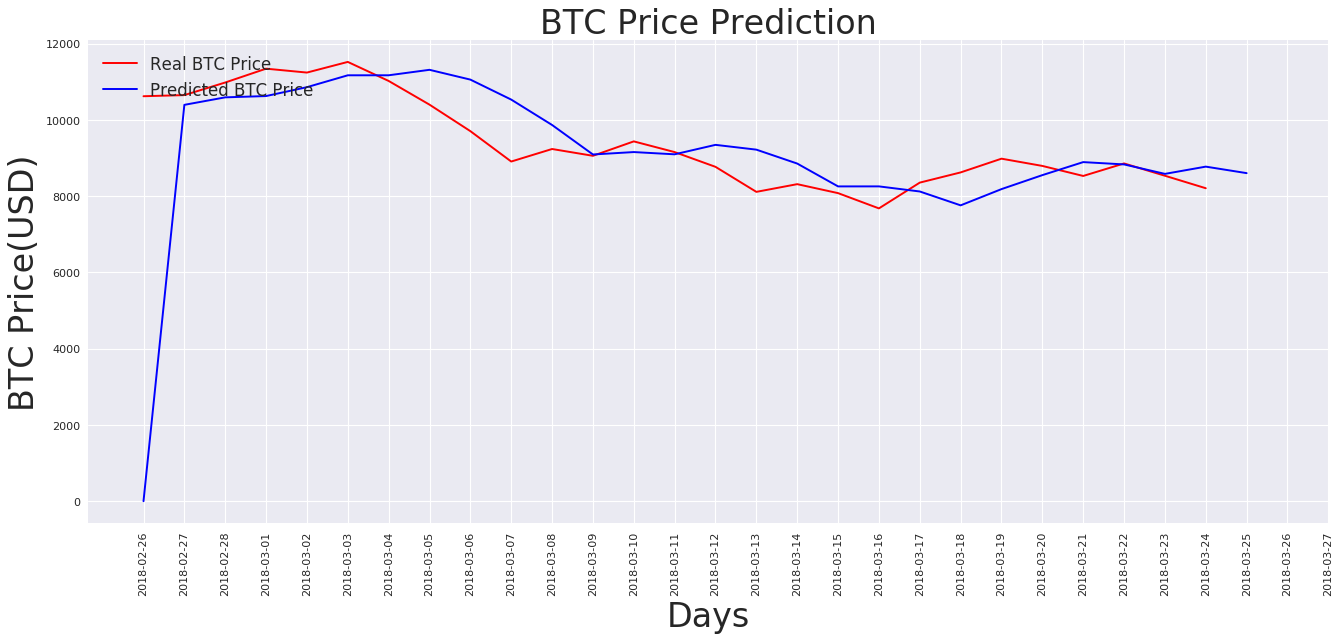

Test Score: 434.35 RMSE


In [232]:
test_results(regressor_v2)

The results seem to have gotten slightly better but not really any more useful.  
I suspect the current dataset needs some transforming and that more supporting data is required.  
User myonin has done a nice transformation that could perhaps be of use.  
https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima
